# Финальный проект

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

__Описание услуг__

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

Описание полей данных:

__contract__
* BeginDate – дата начала пользования услугами,
* EndDate – дата окончания пользования услугами,
* Type – тип договора: ежемесячный, годовой и т.д,
* PaperlessBilling – факт выставления счёта на электронную почту,
* PaymentMethod – способ оплаты,
* MonthlyCharges – ежемесячные траты на услуги,
* TotalCharges – всего потрачено денег на услуги,

__personal__
* Dependents – наличие иждивенцев,
* Senior Citizen – наличие пенсионного статуса по возрасту,
* Partner – наличие супруга(и),
* MultipleLines – наличие возможности ведения параллельных линий во время звонка.

__Швейцарские часы.__


1. Подготовить данные.
* Для начала надо посмотреть что за 4 таблицы. Проверить нужна ли предобработка данных .

2. Провести исследовательский анализ данных.
* Посмотреть (попробовать объединить их в один большой датафрейм). То есть посмотреть как их правильно объединить (в описании написано что все они связаны через customerID), но чую что всё не так просто. 100% при тупом joinе будут задвоения, плюс заполним пропуски

* Объединять их в один большой датафрейм мы будем потому что это будет таблица признаков (за вычетом таргета)
* Посмотреть на распределение признака например(какой пол чаще уходит и т.п.)

3 Построить и обучить модель.
* Делим выборку на обучающую и тестовую в соотношении 75/25
* Если есть категориальные признаки(а они есть) возможно имеет смысл примерить технику  One-hot-encoding
* Далее посмотреть по матрцие корреляции что влияет на наш признак выше всего, таким образом избавимся от ненужных признаков. Также посмотреть есть ли мультколиниарные признаки
* Посмотрим на дисбаланс в данных, возможно имеет смысмл попробовать __оверсемплирование при помощи smote__ [0](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)
* Далее стандартизирую числовые признаки
* Для проверки точности возможно стоит использовать ROC / AUC . Реальные данные имеют тенденцию иметь дисбаланс между положительными значениями. Этот дисбаланс сильно влияет на PR, но не на ROC / AUC. (залез в интернет с вопросом что лучше использовать и большинство говорит от случая к случаю, но лучше для задач классификации использовать ROC / AUC 
[1](https://neptune.ai/blog/f1-score-accuracy-roc-auc-pr-auc)
[2](https://stats.stackexchange.com/questions/210700/how-to-choose-between-roc-auc-and-f1-score)) 
* собственно приступлю к подбору модели с лучшими показателями. Тестировать буду( DecisionTreeClassifier,RandomForestClassifier, LogisticRegression, Support Vector Machine,K-Nearest Neighbour, Naive Bayes)
* Также т.к. использую линейны модели, проверю обучающую выборку на мультиколинеарность. Если такая присутствует(предположим у двух признаков один я удалю, чтобы избежать проблемы утечки.)
* Напоследок посмотрю модели на адекватность при помощи DummyClassifier
[3](https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501)
* Далее подберу гиперпараметры при помощи GridSearchCV__ с scoring roc-auc, сравниваю best_score и выбираю максимальный по показателю roc-auc, также для спокойствия можно сравнить по f1, но предпочтение отдам именно roc-auc
* проверив модели, выберу лучшую и на лучшей уже протестирую тестовый выборку.

In [64]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [65]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [68]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [69]:
pip install joypy

Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [71]:
pip install sklearn

In [73]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import phik
from matplotlib import pyplot as plt
from scipy import stats as st
import joypy
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold,cross_val_score
from sklearn.metrics import roc_auc_score, f1_score,make_scorer, r2_score,mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier, Pool
from imblearn.over_sampling import SMOTE

<b>Откроем наши файлы с данными<b/>

## Подготовить данные.

In [4]:
try:
    contract = pd.read_csv('/datasets/final_provider/contract.csv', parse_dates=[1])
except:
    contract = pd.read_csv('contract.csv', parse_dates=[1])
    
try:
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
except:
    internet = pd.read_csv('internet.csv')  
    
try:
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
except:
    personal = pd.read_csv('personal.csv')     
    
try:
    phone = pd.read_csv('/datasets/final_provider/phone.csv')
except:
    phone = pd.read_csv('phone.csv')      

<b>Изучим их<b/>

In [5]:
#Данная функция даёт нам заголовок датафрейма, понадобится далее
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [6]:
dfs = [contract, internet, personal,phone]
for df in dfs:
    print('Название датафрейма: ',get_df_name(df))
    display(df.info())
    display(df.head(5))
    display('Количество явных дубликтов:', df.duplicated().sum())
    print('-' * 100)

Название датафрейма:  contract
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


None

customerID  BeginDate              EndDate            Type  \
0  7590-VHVEG 2020-01-01                   No  Month-to-month   
1  5575-GNVDE 2017-04-01                   No        One year   
2  3668-QPYBK 2019-10-01  2019-12-01 00:00:00  Month-to-month   
3  7795-CFOCW 2016-05-01                   No        One year   
4  9237-HQITU 2019-09-01  2019-11-01 00:00:00  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  
0              Yes           Electronic check           29.85        29.85  
1               No               Mailed check           56.95       1889.5  
2              Yes               Mailed check           53.85       108.15  
3               No  Bank transfer (automatic)           42.30      1840.75  
4              Yes           Electronic check           70.70       151.65

'Количество явных дубликтов:'

0

----------------------------------------------------------------------------------------------------
Название датафрейма:  internet
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No

'Количество явных дубликтов:'

0

----------------------------------------------------------------------------------------------------
Название датафрейма:  personal
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No

'Количество явных дубликтов:'

0

----------------------------------------------------------------------------------------------------
Название датафрейма:  phone
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes

'Количество явных дубликтов:'

0

----------------------------------------------------------------------------------------------------


Что радует - пустых значений нет, дубликатов нет. Предобратка данных таблиц пока не требуется.

## Провести исследовательский анализ данных.

In [7]:
contract_internet = contract.join(internet, lsuffix='customerID', rsuffix='customerID')
contract_internet_personal = contract_internet.join(personal, lsuffix='customerID', rsuffix='customerID')
df = contract_internet_personal.join(phone, lsuffix='customerID', rsuffix='customerID')
contract_internet.info()
contract_internet_personal.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customerIDcustomerID  7043 non-null   object        
 1   BeginDate             7043 non-null   datetime64[ns]
 2   EndDate               7043 non-null   object        
 3   Type                  7043 non-null   object        
 4   PaperlessBilling      7043 non-null   object        
 5   PaymentMethod         7043 non-null   object        
 6   MonthlyCharges        7043 non-null   float64       
 7   TotalCharges          7043 non-null   object        
 8   customerIDcustomerID  5517 non-null   object        
 9   InternetService       5517 non-null   object        
 10  OnlineSecurity        5517 non-null   object        
 11  OnlineBackup          5517 non-null   object        
 12  DeviceProtection      5517 non-null   object        
 13  TechSupport       

C:\Users\Name\AppData\Local\Temp\ipykernel_12404\919205934.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'customerIDcustomerID'} in the result is deprecated and will raise a MergeError in a future version.
  df = contract_internet_personal.join(phone, lsuffix='customerID', rsuffix='customerID')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customerIDcustomerID  7043 non-null   object        
 1   BeginDate             7043 non-null   datetime64[ns]
 2   EndDate               7043 non-null   object        
 3   Type                  7043 non-null   object        
 4   PaperlessBilling      7043 non-null   object        
 5   PaymentMethod         7043 non-null   object        
 6   MonthlyCharges        7043 non-null   float64       
 7   TotalCharges          7043 non-null   object        
 8   customerIDcustomerID  5517 non-null   object        
 9   InternetService       5517 non-null   object        
 10  OnlineSecurity        5517 non-null   object        
 11  OnlineBackup          5517 non-null   object        
 12  DeviceProtection      5517 non-null   object        
 13  TechSupport       

In [9]:
df['target']= df['EndDate']
df.loc[(df['target']=='No') ,'target']='0'
df.loc[(df['target']!= '0') ,'target']='1'
df['target'] = df['target'].astype('int')

In [10]:
df.loc[(df['EndDate']=='No') ,'EndDate']='2000-01-01 00:00:00'
df['EndDate']= pd.to_datetime(df['EndDate'])
df['days'] = df['EndDate'] - df['BeginDate']
df['days'] = df['days'].astype('str')
df['days']= df['days'].str.replace('days','')
df['days'] = df['days'].astype('int')
df.loc[(df['days']< 0) ,'days']= 0

In [11]:
df = df[df['TotalCharges'] != ' ']
df['TotalCharges'] = df['TotalCharges'].astype('float')
#drop(df['TotalCharges'].loc[(df['TotalCharges'] == ' ')])

C:\Users\Name\AppData\Local\Temp\ipykernel_12404\1596402250.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype('float')


В одном общем дф по многим полям есть пустые поля, что вполне объяснимо т.к. не все пользователи что есть используюь интернет, также, не все пользователи что есть испоьзуют возможность ведения параллельных линий во время звонка.

Первоначальным этапом будет избавления от ненужных столбцов, вторым заполнения пустых значений соответсвующим. Также изменение данных на более подходящие. Так, напрмиер, данные в столбце  "EndDatе" являются нашим исследуемым признаком. Т.е. дата окончания контракта, если она есть, то пользователь прервал контракт в компанией. Наличие его в виде даты или текста не имеет какого-либо смысла.

Также хочу отметить что считаю правильным запонить эти пустые значения нулями, т.к. если пользователь не использует мультилинии то он их не использует, и заполнять средним или медианным будет некорректно.

Первым шагом избавимся от дублирующихся колонок

In [12]:
df = df.loc[:,~df.columns.duplicated()]

По полям что указаны ниже значения либо да либо нет, соответственно будет предельно корректным заменить их на 'No'

In [13]:
columns_no = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','MultipleLines']
for i in columns_no:
    df[i].fillna('No', inplace=True)

C:\Users\Name\AppData\Local\Temp\ipykernel_12404\4256450069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].fillna('No', inplace=True)


Последнее поле означет тип линии интернет кабеля(насколько я понял), у пустых значений будет корректным их заменить на 'None' что будет означать никакой кабель.

In [14]:
df['InternetService'].fillna('None', inplace=True)

C:\Users\Name\AppData\Local\Temp\ipykernel_12404\3895590397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InternetService'].fillna('None', inplace=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customerIDcustomerID  7032 non-null   object        
 1   BeginDate             7032 non-null   datetime64[ns]
 2   EndDate               7032 non-null   datetime64[ns]
 3   Type                  7032 non-null   object        
 4   PaperlessBilling      7032 non-null   object        
 5   PaymentMethod         7032 non-null   object        
 6   MonthlyCharges        7032 non-null   float64       
 7   TotalCharges          7032 non-null   float64       
 8   InternetService       7032 non-null   object        
 9   OnlineSecurity        7032 non-null   object        
 10  OnlineBackup          7032 non-null   object        
 11  DeviceProtection      7032 non-null   object        
 12  TechSupport           7032 non-null   object        
 13  StreamingTV       

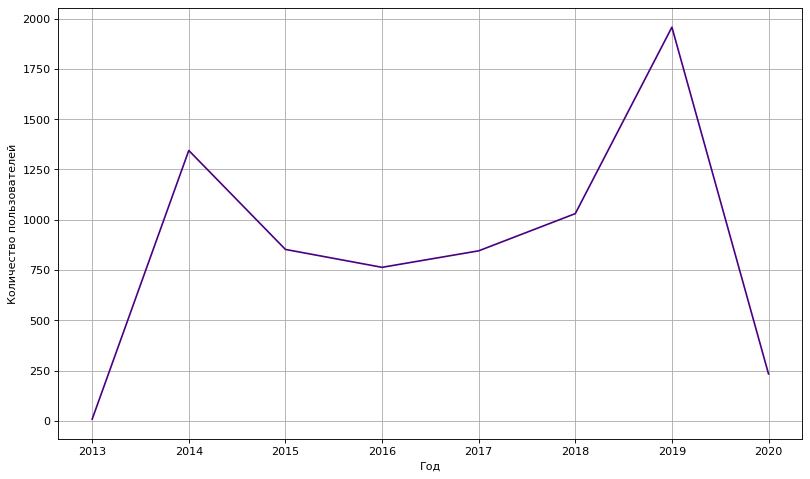

In [16]:
plt.figure(figsize=(12,7), dpi= 80)
plt.plot(df.pivot_table(index=df['BeginDate'].dt.year,
                        values='customerIDcustomerID', 
                        aggfunc='count'), 
         color='indigo')
plt.xlabel('Год')
plt.ylabel('Количество пользователей')
plt.grid()

Вышеуказанный график можно интерпретировать как несколько этапов или же сегментов:
- рост (период сначала и до 2014 года)
- спад (с 2014 по 2016)
- устойчивый рост (период с  2016 по 2018)
- бум (когла количество пользоваетелей резко выросло с 2018 и по н.в.) за 2020 данные не полные на них не акцентируем внимание.

In [17]:
df['Type'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

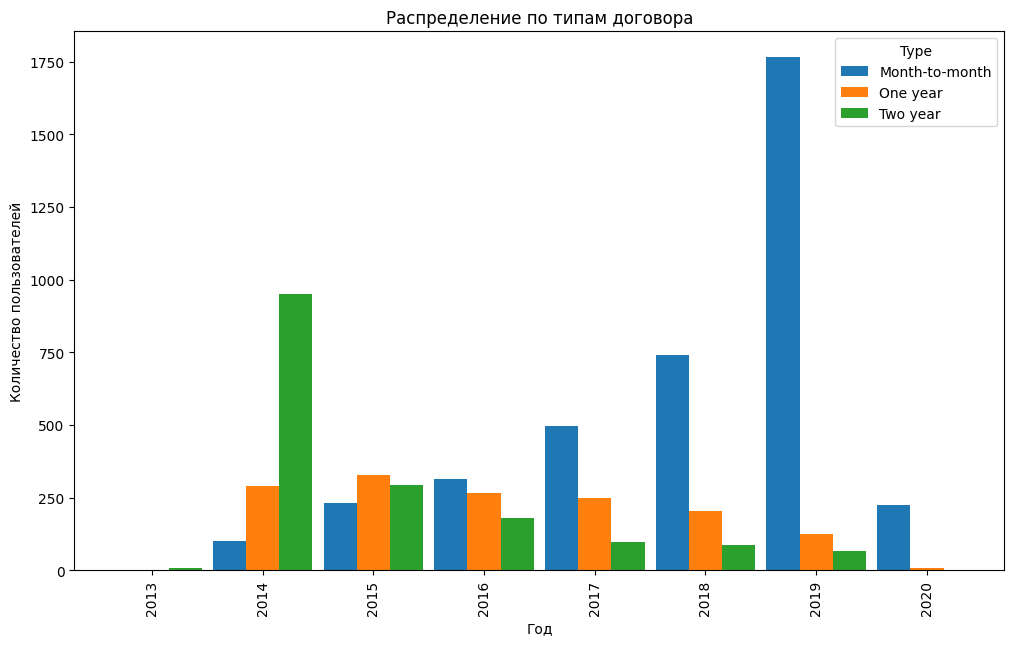

In [18]:
df.pivot_table(
    index= df['BeginDate'].dt.year, 
    values='customerIDcustomerID',
    columns='Type',
    aggfunc='count').plot(title='Распределение по типам договора',
                        xlabel='Год',
                        ylabel='Количество пользователей',
                        kind='bar',
                        figsize=(12,7),
                         width=0.9);

Как мы видим из приведенной гистаграммы:
* рост с конца 2018 и 2019 года во-многом обусловнен увеличением количества пользователей с месячной подпискок;
* причём диаметрально противоложная динамика у 2-годичных подписок;
* 1-годичные также падают по количеству не но с такой резной динамикой как у 2-годичных.

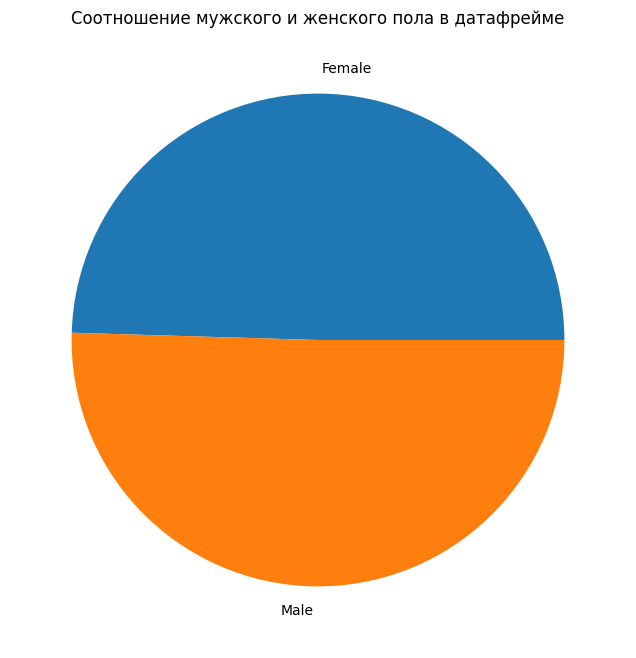

In [19]:
# Prepare Data
df1 = df.groupby('gender').size()

# Make the plot with pandas
df1.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Соотношение мужского и женского пола в датафрейме")
plt.ylabel("")
plt.show()

Как видно из круговой диаграммы выше, соотошение мужского и женского пола примерно одинаковое.

## Доработка (исследовательский анализ)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customerIDcustomerID  7032 non-null   object        
 1   BeginDate             7032 non-null   datetime64[ns]
 2   EndDate               7032 non-null   datetime64[ns]
 3   Type                  7032 non-null   object        
 4   PaperlessBilling      7032 non-null   object        
 5   PaymentMethod         7032 non-null   object        
 6   MonthlyCharges        7032 non-null   float64       
 7   TotalCharges          7032 non-null   float64       
 8   InternetService       7032 non-null   object        
 9   OnlineSecurity        7032 non-null   object        
 10  OnlineBackup          7032 non-null   object        
 11  DeviceProtection      7032 non-null   object        
 12  TechSupport           7032 non-null   object        
 13  StreamingTV       

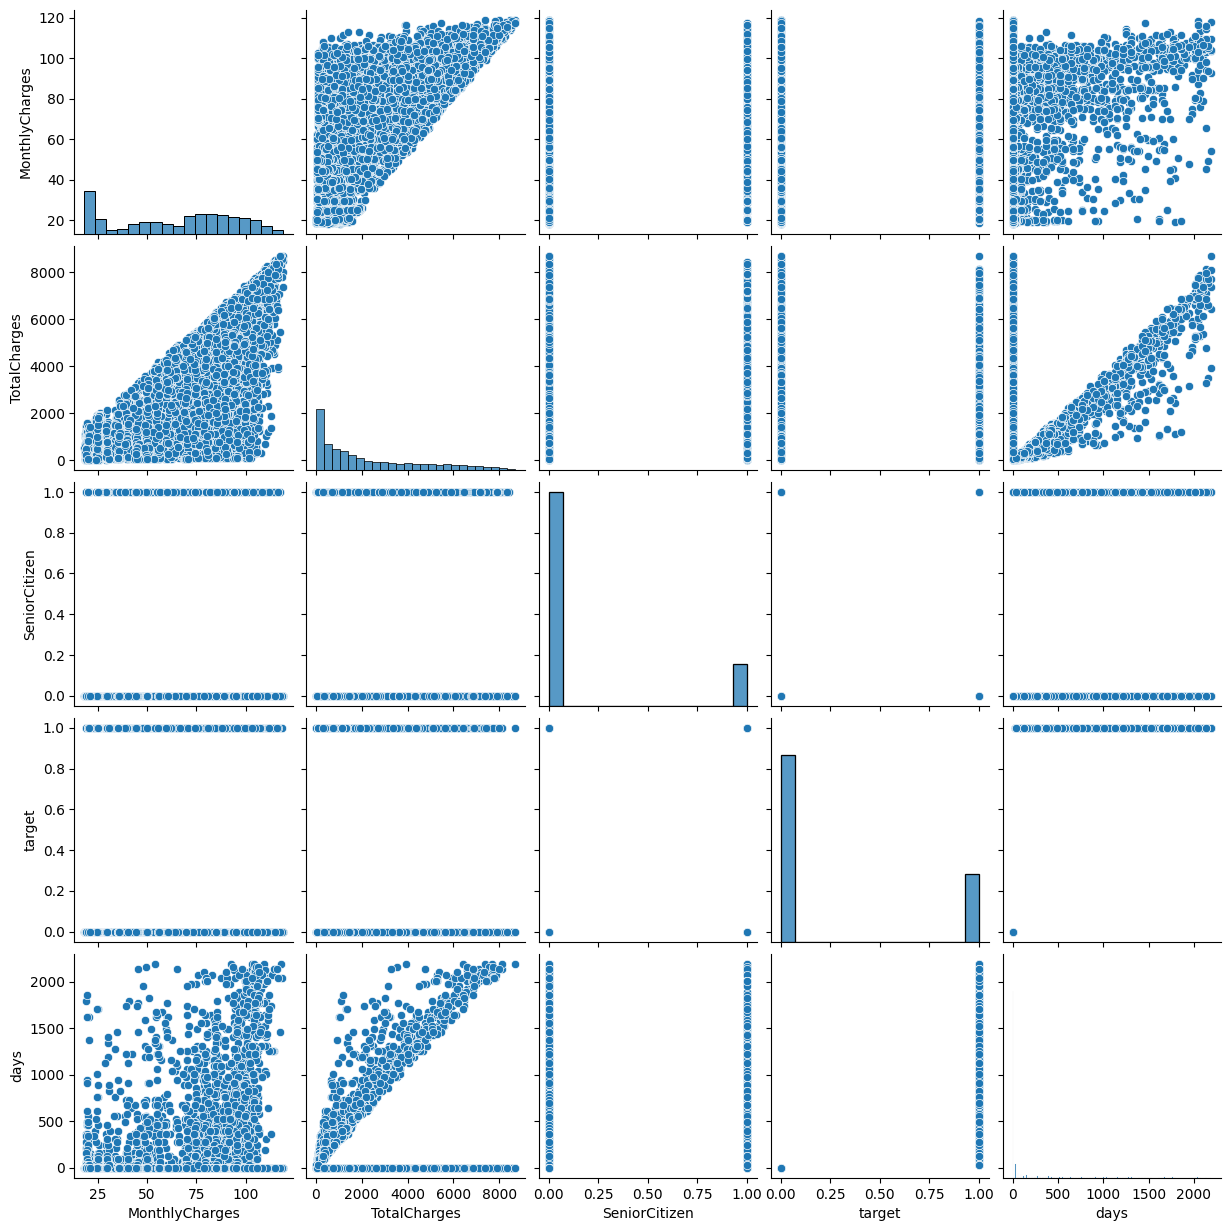

In [21]:
sns.pairplot(df)

Как мы видим MonthlyCharges и TotalCharges коррелируют очень сильно, также можно заметить на интересную взаимосзять между днями и итоговой суммой заплаченной пользователем.

<a id='section_id2'></a>
### Проверим числовые признакми на нормальность.

[Text(0.5, 1.0, 'Распределение месячкой оплыт'),
 Text(0.5, 0, 'Пользователи'),
 Text(0, 0.5, 'Сумма месячная')]

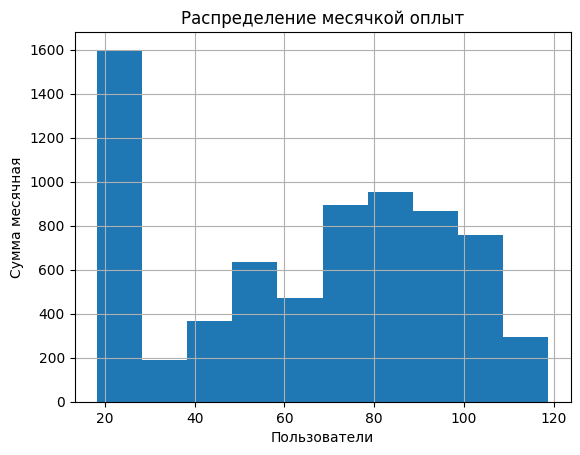

In [22]:
df['MonthlyCharges'].hist().set(title='Распределение месячкой оплыт',
                                    xlabel='Пользователи', 
                                    ylabel='Сумма месячная')

[Text(0.5, 1.0, 'Распределение итоговой оплаты'),
 Text(0.5, 0, 'Пользователи'),
 Text(0, 0.5, 'Сумма итоговая')]

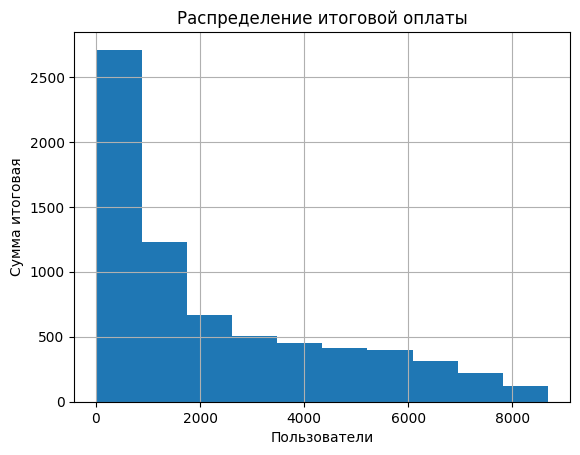

In [23]:
df['TotalCharges'].hist().set(title='Распределение итоговой оплаты',
                                    xlabel='Пользователи', 
                                    ylabel='Сумма итоговая')

Как мы видим месячная сумма в отличие от итоговой (если не считать пика в начале) на нормально распределение похожа больше, в следствие чего __именно на неё (MonthlyCharges)__ ориентироваться (между ими) двуями стоит выбирать месячную

[Text(0.5, 1.0, 'Распределение по дням использования'),
 Text(0.5, 0, 'Пользователи'),
 Text(0, 0.5, 'Дни использования')]

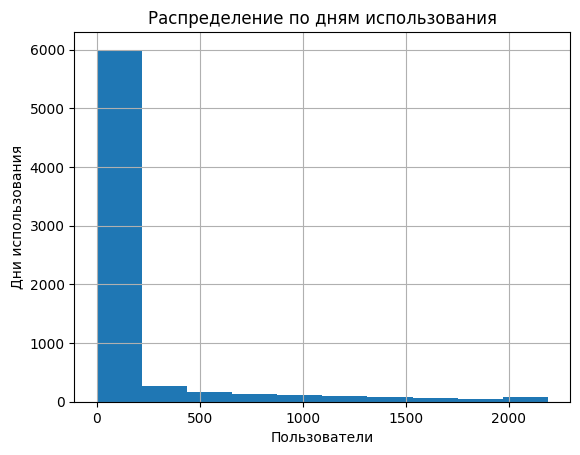

In [24]:
df['days'].hist().set(title='Распределение по дням использования',
                                    xlabel='Пользователи', 
                                    ylabel='Дни использования')

In [25]:
df_1 = df[df['target']==1]
df_0 = df[df['target']==0]

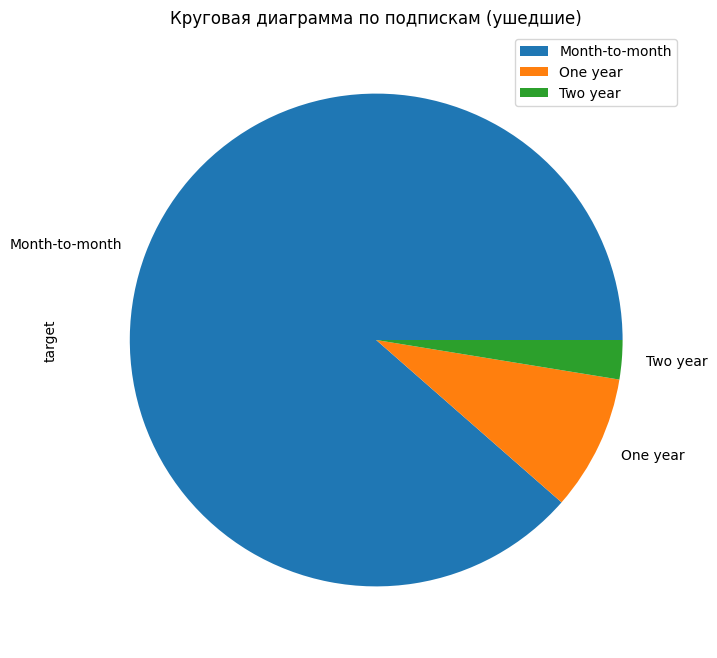

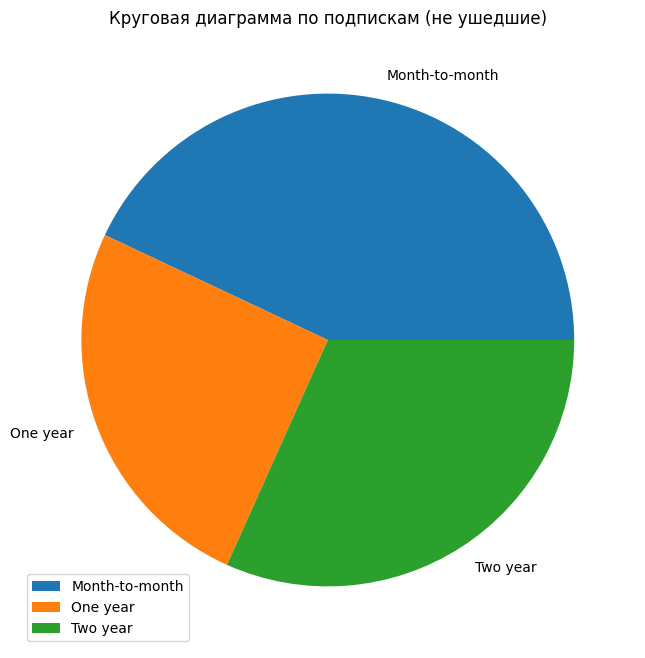

In [26]:
# Prepare Data
df_11 =  df_1.groupby('Type')[['target']].count()
df_00 =  df_0.groupby('Type')[['target']].count()

# Make the plot with pandas
df_11.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Круговая диаграмма по подпискам (ушедшие)")
df_00.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Круговая диаграмма по подпискам (не ушедшие)")
plt.ylabel("")
plt.show()

Как видно из круговой диаграммы большая часть ушедших пользователей предпочитают именно месячкую подписку. Среди действующих сильного перекоса в какуб-либо одну сторону нет.
Видимо много людей берут подписку - пробуют - видят что это не их и отказываются от дальнейшего сотрудничества.

''

''

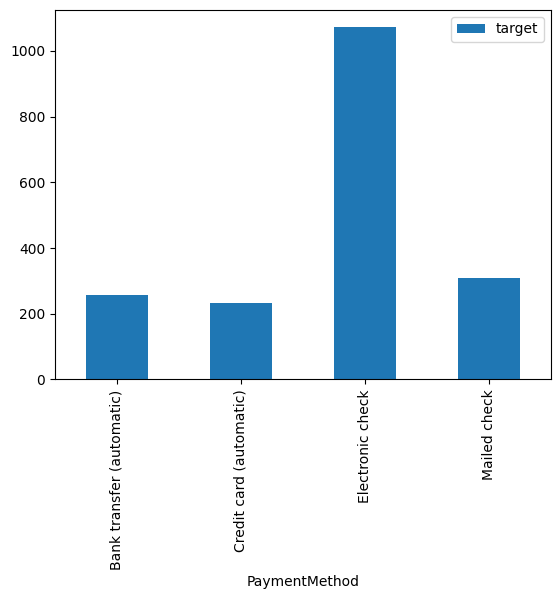

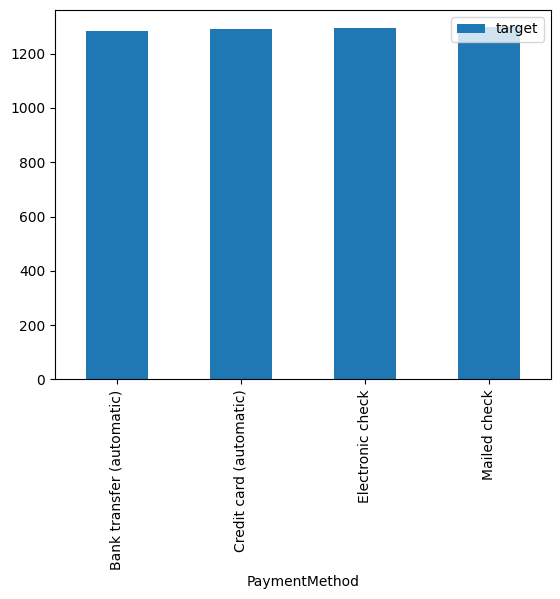

In [27]:
df_1.groupby('PaymentMethod')[['target']].count().plot(kind='bar')
display('')
df_0.groupby('PaymentMethod')[['target']].count().plot(kind='bar')
display('')

Опять же видно можно увидеть взаимосвязь между электронными чеками и  уходом. Действующие пользователи распределены +- одинаково.

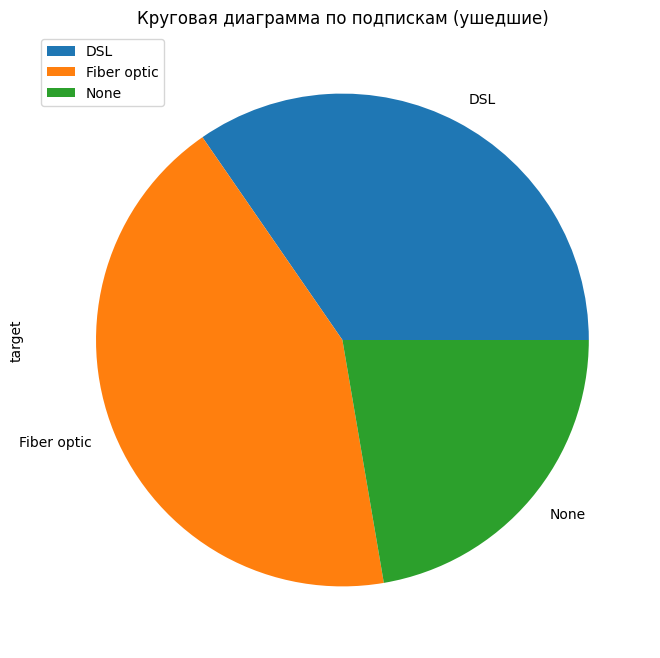

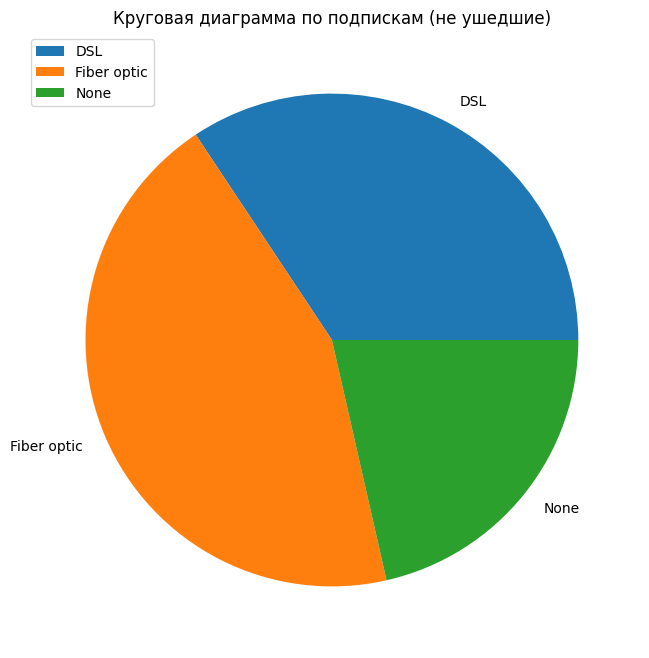

In [28]:
# Prepare Data
df_111 =  df_1.groupby('InternetService')[['target']].count()
df_000 =  df_0.groupby('InternetService')[['target']].count()

# Make the plot with pandas
df_111.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Круговая диаграмма по подпискам (ушедшие)")
df_000.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Круговая диаграмма по подпискам (не ушедшие)")
plt.ylabel("")
plt.show()

Распределение +- и у ушедших и у оставшихся примерно одинковое. Большая часть предпочитает Fiber optic, далее DSL и замыкает те у кого интернета нет вообще.

<a id='section_id5'></a>

<Figure size 1280x800 with 0 Axes>

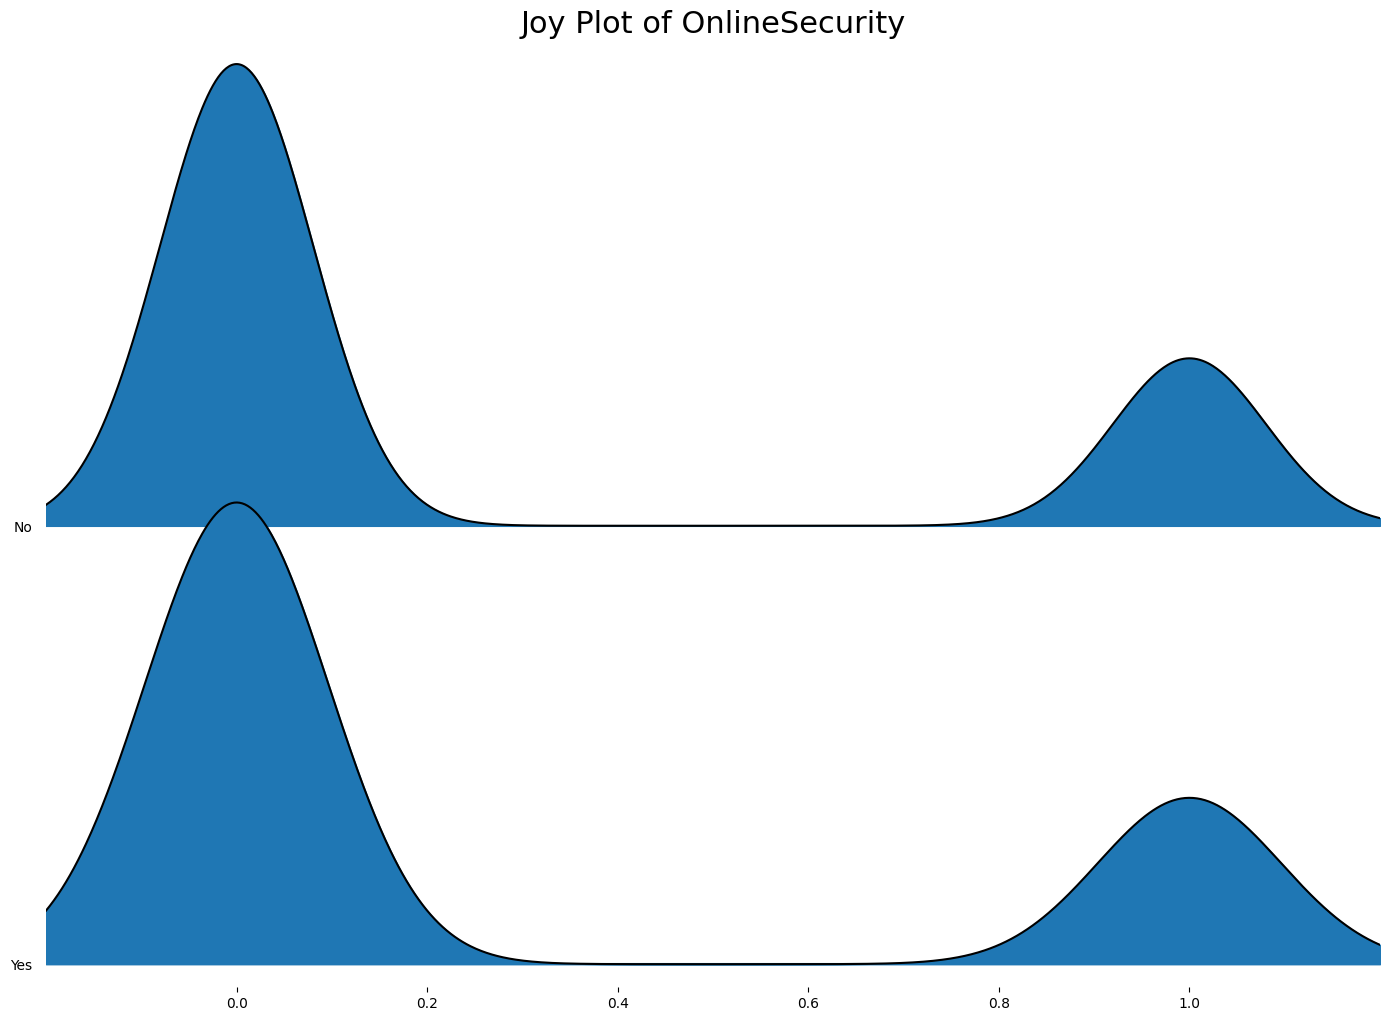

In [29]:
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(df, column=['target'], by="OnlineSecurity", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of OnlineSecurity', fontsize=22)
plt.show()

И ушедшие и оставшиеся предпочитают не использовать OnlineSecurity

<Figure size 40x32 with 0 Axes>

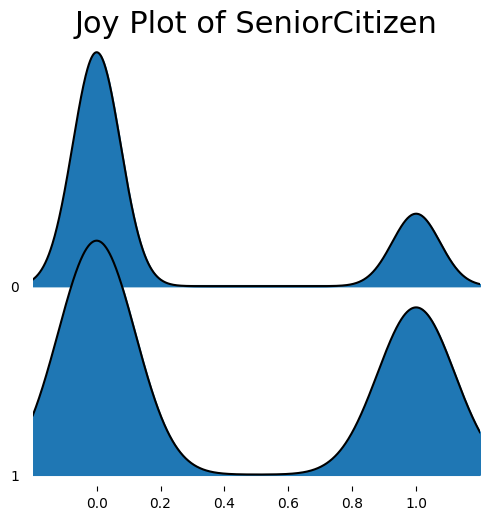

<Figure size 40x32 with 0 Axes>

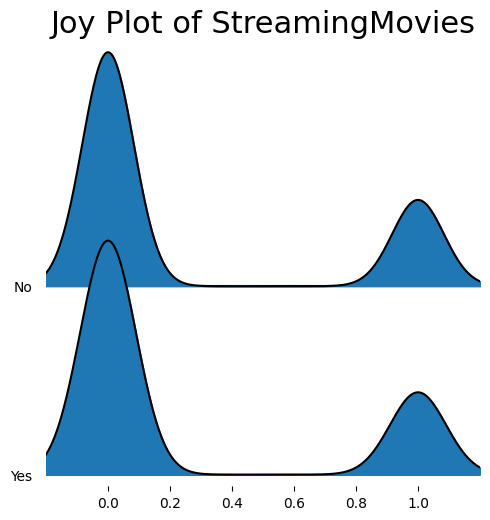

<Figure size 40x32 with 0 Axes>

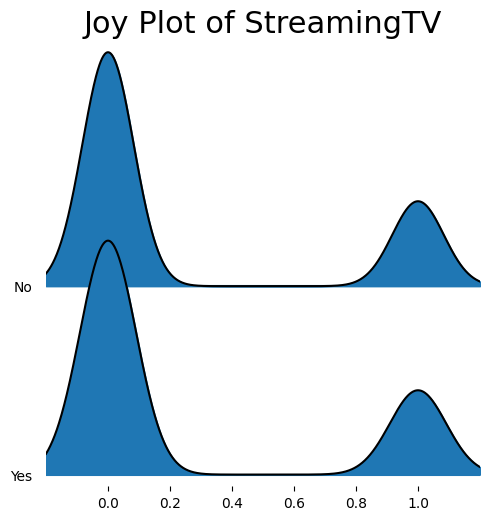

<Figure size 40x32 with 0 Axes>

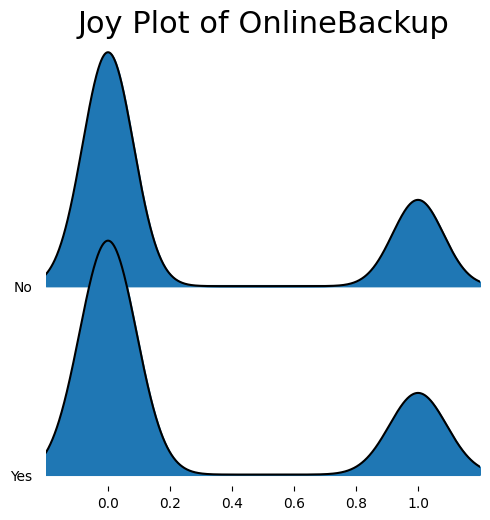

<Figure size 40x32 with 0 Axes>

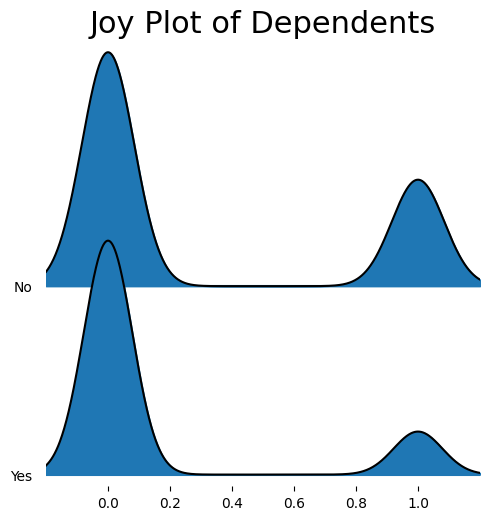

<Figure size 40x32 with 0 Axes>

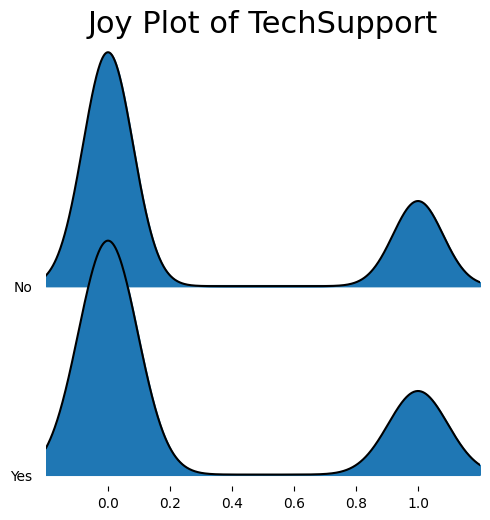

<Figure size 40x32 with 0 Axes>

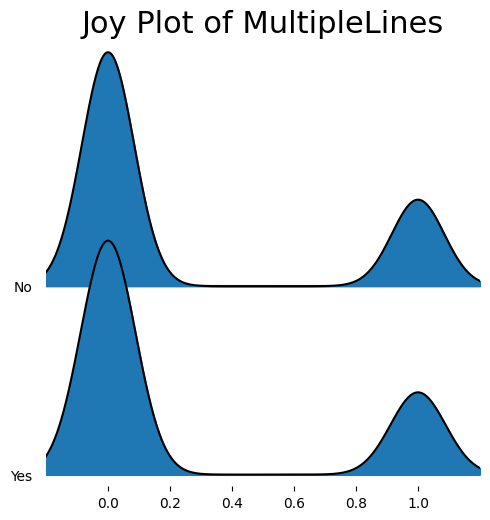

In [30]:
plt.figure(figsize=(5,4), dpi= 8)
fig, axes = joypy.joyplot(df, column=['target'], by="SeniorCitizen", ylim='own', figsize=(5,5))

# Decoration
plt.title('Joy Plot of SeniorCitizen', fontsize=22)
plt.show()

plt.figure(figsize=(5,4), dpi= 8)
fig, axes = joypy.joyplot(df, column=['target'], by="StreamingMovies", ylim='own', figsize=(5,5))

# Decoration
plt.title('Joy Plot of StreamingMovies', fontsize=22)
plt.show()

plt.figure(figsize=(5,4), dpi= 8)
fig, axes = joypy.joyplot(df, column=['target'], by="StreamingTV", ylim='own', figsize=(5,5))

# Decoration
plt.title('Joy Plot of StreamingTV', fontsize=22)
plt.show()

plt.figure(figsize=(5,4), dpi= 8)
fig, axes = joypy.joyplot(df, column=['target'], by="OnlineBackup", ylim='own', figsize=(5,5))

# Decoration
plt.title('Joy Plot of OnlineBackup', fontsize=22)
plt.show()

plt.figure(figsize=(5,4), dpi= 8)
fig, axes = joypy.joyplot(df, column=['target'], by="Dependents", ylim='own', figsize=(5,5))

# Decoration
plt.title('Joy Plot of Dependents', fontsize=22)
plt.show()


plt.figure(figsize=(5,4), dpi= 8)
fig, axes = joypy.joyplot(df, column=['target'], by="TechSupport", ylim='own', figsize=(5,5))

# Decoration
plt.title('Joy Plot of TechSupport', fontsize=22)
plt.show()

plt.figure(figsize=(5,4), dpi= 8)
fig, axes = joypy.joyplot(df, column=['target'], by="MultipleLines", ylim='own', figsize=(5,5))

# Decoration
plt.title('Joy Plot of MultipleLines', fontsize=22)
plt.show()

По большому колчичеству признаков наличие или отсуствие какого-либо функционала не сильно  влияет на отказ или продолжение пользование услугами компании.

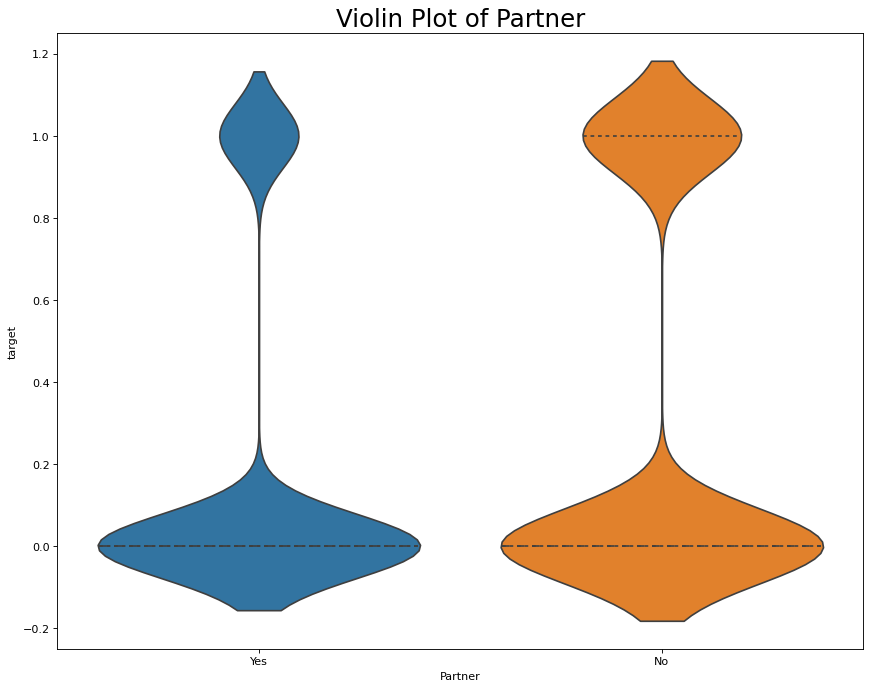

In [31]:
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='Partner', y='target', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Partner', fontsize=22)
plt.show()

Люди с партнером и без тоже чаще всего остаются действующими пользователями. Высокую корреляцию с нашим таргетом мы не наблюдаем. Тем не менее люди без партнера отказываются от компании чаще нежели те что с партнером.

## Построить и обучить модель.

In [32]:
df.columns

Index(['customerIDcustomerID', 'BeginDate', 'EndDate', 'Type',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'target',
       'days'],
      dtype='object')

'EndDate' и 'target' это одно и то же поэтому от них избавляемся. ID заказчика бесмыссленен и лишь грузит систему, с 'BeginDate' та же ситуация.

In [33]:
target = df['target'].astype('int')
features = df.drop(['EndDate','target','customerIDcustomerID','BeginDate'], axis=1)

In [34]:
target.shape

(7032,)

In [35]:
features.shape

(7032, 18)

In [36]:
features.columns

Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'days'],
      dtype='object')

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'days']


<AxesSubplot: >

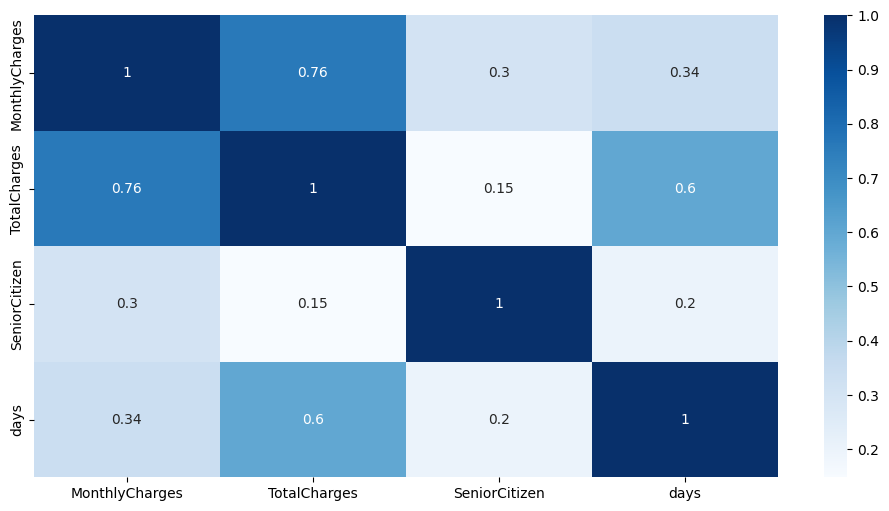

In [37]:
features_numeric = features[['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'days']]
plt.figure (figsize=(12,6))
sns.heatmap (features_numeric.phik_matrix(), annot=True, cmap='Blues')

Как видно TotalCharges и MonthlyCharges сильно коррелируют друг с другом, но TotalCharges также сильно коррелирует с days. Т.к. распределение по признакам не нормально, то уберем из выборки TotalCharges и вновб посмотрим на phik-матрицу

interval columns not set, guessing: ['MonthlyCharges', 'SeniorCitizen', 'days']


<AxesSubplot: >

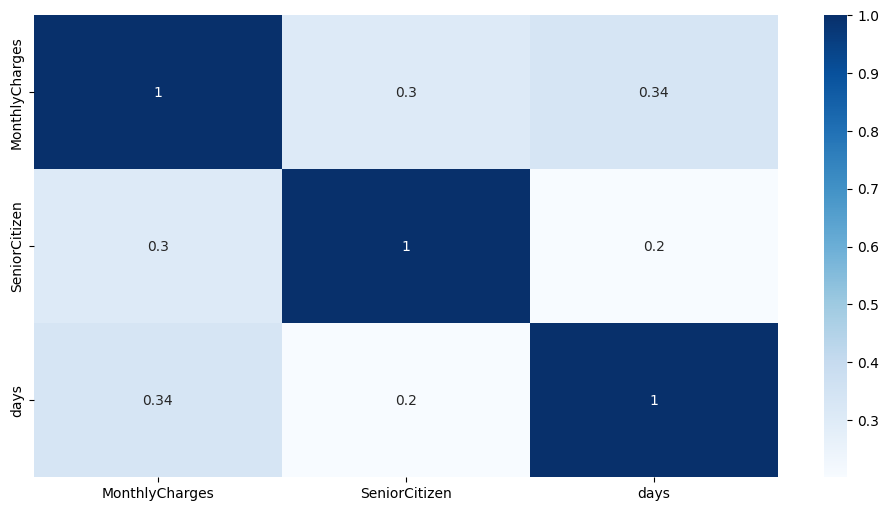

In [38]:
features_numeric = features[['MonthlyCharges', 'SeniorCitizen', 'days']]
plt.figure (figsize=(12,6))
sns.heatmap (features_numeric.phik_matrix(), annot=True, cmap='Blues')

Судя по результатам мы всё сделали правильно


    
[Тест на нормальность](#section_id2)
    

    

In [39]:
features = features.drop(['TotalCharges'], axis=1)

<AxesSubplot: >

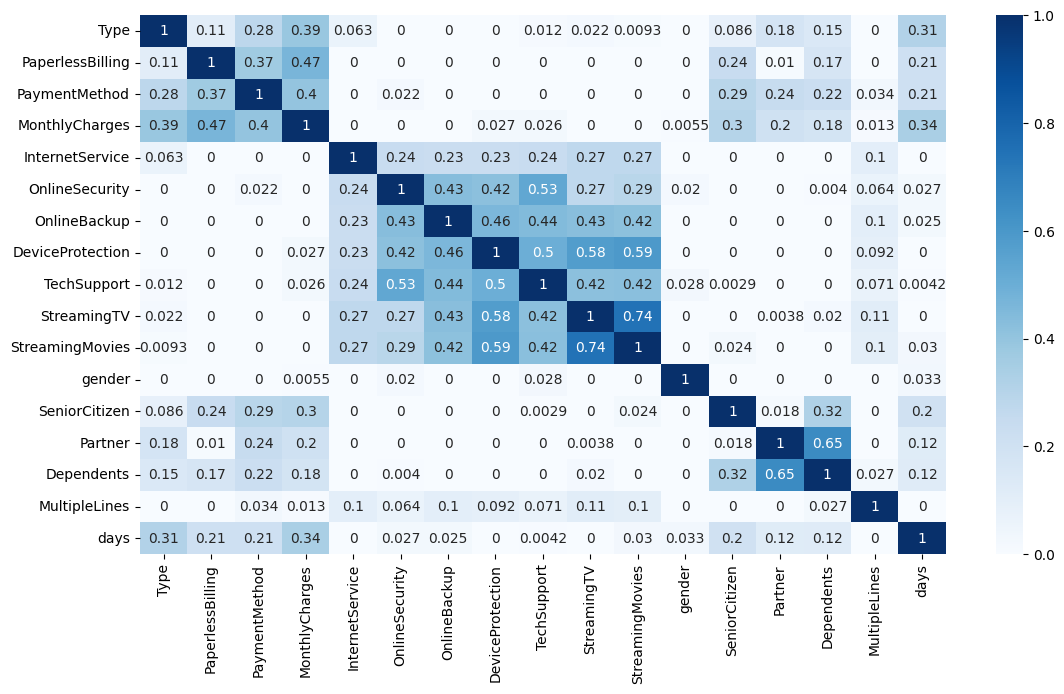

In [40]:
interval_cols = ['MonthlyCharges', 'SeniorCitizen', 'days']
plt.figure (figsize=(13,7))
sns.heatmap (features.phik_matrix(interval_cols=interval_cols), annot=True, cmap='Blues')

Уберем признаки с высокой корреляцией.

In [41]:
features.columns

Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'days'],
      dtype='object')

In [42]:
features = features.drop(columns = ['StreamingTV','Partner','days','gender','MultipleLines'], axis=1)

<AxesSubplot: >

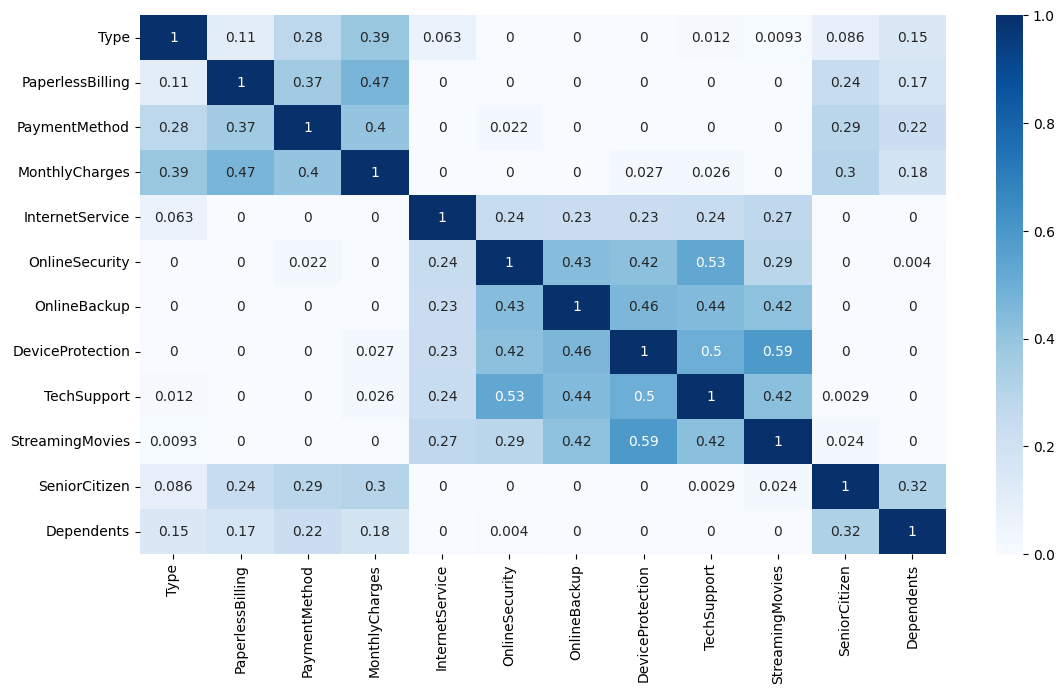

In [43]:
interval_cols = ['MonthlyCharges', 'SeniorCitizen', 'days']
plt.figure (figsize=(13,7))
sns.heatmap (features.phik_matrix(interval_cols=interval_cols), annot=True, cmap='Blues')

Всё что выше 0.6 убрали будем считать что мультиколинеарность избежим.

In [44]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=190922)

Стандартизируем численные признаки при помощи StandardScaler

In [45]:
numeric = ['MonthlyCharges']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

pd.options.mode.chained_assignment = None

In [46]:
target_train.shape

(5274,)

In [47]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5274 entries, 2630 to 3579
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              5274 non-null   object 
 1   PaperlessBilling  5274 non-null   object 
 2   PaymentMethod     5274 non-null   object 
 3   MonthlyCharges    5274 non-null   float64
 4   InternetService   5274 non-null   object 
 5   OnlineSecurity    5274 non-null   object 
 6   OnlineBackup      5274 non-null   object 
 7   DeviceProtection  5274 non-null   object 
 8   TechSupport       5274 non-null   object 
 9   StreamingMovies   5274 non-null   object 
 10  SeniorCitizen     5274 non-null   int64  
 11  Dependents        5274 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 535.6+ KB


In [48]:
from sklearn.compose import make_column_transformer
# затем кодирование
cat_cols = ['Type', 'PaperlessBilling','PaymentMethod', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport','StreamingMovies','Dependents']

transformer = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='error',sparse=False),
     cat_cols),
    remainder='passthrough')

transformed  = transformer.fit_transform(features_train)
transformed_train  = transformer.transform(features_train)
transformed_test  = transformer.transform(features_test)

features_train_ohe = pd.DataFrame(
    transformed_train, 
    columns=transformer.get_feature_names_out()
)

features_test_ohe = pd.DataFrame(
    transformed_test, 
    columns=transformer.get_feature_names_out()
)

pd.options.mode.chained_assignment = None

In [49]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=190922)
x, y = oversample.fit_resample(features_train_ohe, target_train)

<AxesSubplot: >

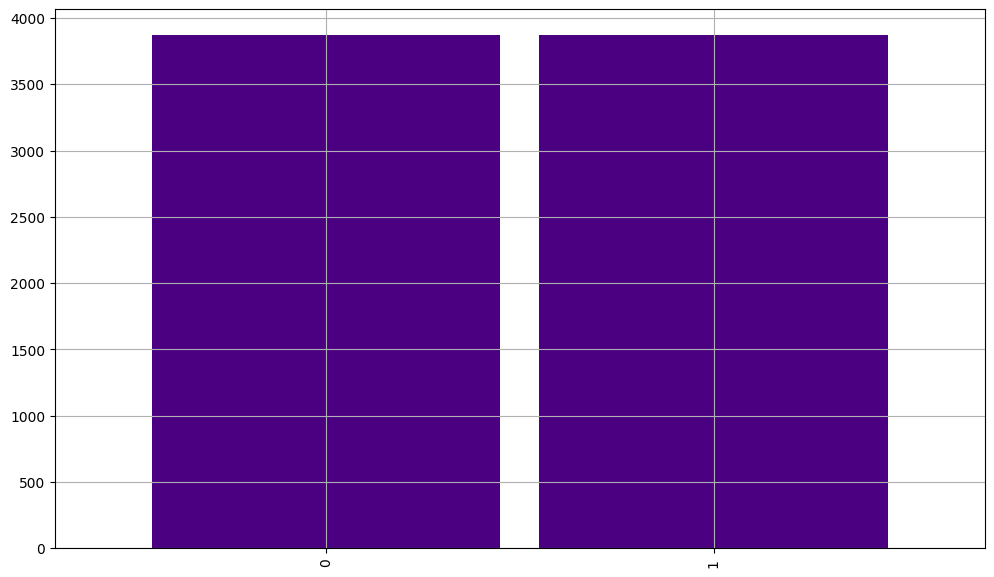

In [50]:
y.value_counts().plot(
    kind='bar',
    stacked=True,
    grid=True,
    color='indigo',
    width=0.9,
    figsize=(12,7)
    )

### Выбор модели
DecisionTreeClassifier,RandomForestClassifier, LogisticRegression, Support Vector Machine,K-Nearest Neighbour, Naive Bayes

RandomForestClassifier

In [51]:
%%time
state = 190922
model = RandomForestClassifier(random_state=state)
    

param_dict = {'max_depth': range(1, 8),
             'n_estimators' : [5, 10, 20, 50],
              'min_samples_leaf' : range (1,6),
              'max_features' : range(1,7)}

grid = GridSearchCV(model, param_dict, cv = 5, scoring='roc_auc', n_jobs = -1)

grid.fit(x, y)
grid.best_score_

CPU times: total: 7.16 s
Wall time: 2min 15s


0.8615420478720024

In [52]:
print(grid.best_estimator_)
print()
print(grid.best_params_)
print()
print(grid.best_score_)

RandomForestClassifier(max_depth=7, max_features=2, n_estimators=50,
                       random_state=190922)

{'max_depth': 7, 'max_features': 2, 'min_samples_leaf': 1, 'n_estimators': 50}

0.8615420478720024


DecisionTreeClassifier

In [53]:
%%time
cv = 10
model = DecisionTreeClassifier(random_state=190922)
    

param_dict = {'max_depth': range(1, 8),
              'min_samples_leaf' : range (1,6),
              'max_features' : range(1,7)}

griddtr = GridSearchCV(model, param_dict, cv = cv, scoring='roc_auc', n_jobs = -1)

griddtr.fit(x, y)
griddtr.best_score_

CPU times: total: 1.7 s
Wall time: 7.82 s


0.8410615844964819

In [54]:
print(griddtr.best_estimator_)
print()
print(griddtr.best_params_)
print()
print(griddtr.best_score_)

DecisionTreeClassifier(max_depth=7, max_features=6, min_samples_leaf=4,
                       random_state=190922)

{'max_depth': 7, 'max_features': 6, 'min_samples_leaf': 4}

0.8410615844964819


LogisticRegression

In [55]:
%%time

cv = 5
model = LogisticRegression(random_state=190922, max_iter=10000)
    

param_dict =[{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]

griddlr = GridSearchCV(model, param_dict, cv = 10, scoring='roc_auc', n_jobs = -1)
griddlr.fit(x, y)
griddlr.best_score_

CPU times: total: 297 ms
Wall time: 1.73 s


0.822554818613104

In [56]:
%%time
print(griddlr.best_estimator_)
print()
print(griddlr.best_params_)
print()
print(griddlr.best_score_)

LogisticRegression(C=0.1, max_iter=10000, random_state=190922)

{'C': 0.1}

0.822554818613104
CPU times: total: 15.6 ms
Wall time: 997 µs


SVM

In [57]:
%%time

model =  svm.SVC(random_state=190922)
    

param_dict =[{'C': [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid']}]

gridsvm = GridSearchCV(model,
                       param_dict,
                       refit=True,
                       verbose=2, 
                       scoring='roc_auc')
gridsvm.fit(x,y)

gridsvm.best_score_

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   2.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   3.1s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.4s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.7s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.9s
[CV] END .......................C=0.1, gamma=0.

0.8923323645295476

In [58]:
%%time
print(gridsvm.best_estimator_)
print()
print(gridsvm.best_params_)
print()
print(gridsvm.best_score_)

SVC(C=10, gamma=1, random_state=190922)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

0.8923323645295476
CPU times: total: 0 ns
Wall time: 998 µs


K-Nearest Neighbour

In [59]:
%%time

model = KNeighborsClassifier()
    

param_dict =[{'leaf_size': range(1,50),
              'n_neighbors': range(1,30),
              'p': [1,2]}]

gridkn = GridSearchCV(model, param_dict, cv=10, scoring='roc_auc')
gridkn.fit(x,y)

gridkn.best_score_

CPU times: total: 1h 14min 32s
Wall time: 19min 3s


0.8583880094589654

In [60]:
%%time
print(gridkn.best_estimator_)
print()
print(gridkn.best_params_)
print()
print(gridkn.best_score_)

KNeighborsClassifier(leaf_size=1, p=1)

{'leaf_size': 1, 'n_neighbors': 5, 'p': 1}

0.8583880094589654
CPU times: total: 0 ns
Wall time: 0 ns


Catboost

In [61]:
%%time

model = CatBoostClassifier(random_state=190922)
    

param_dict =[{'max_depth': [3,4,5],
              'n_estimators':[100, 200, 300],
              'learning_rate': [0.01,0.05,0.1],
              'border_count': [128]}]

gridcb = GridSearchCV(model, param_dict, cv=10, scoring='roc_auc')
gridcb.fit(x,y)

gridcb.best_score_

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6898719	total: 177ms	remaining: 17.6s
1:	learn: 0.6868281	total: 181ms	remaining: 8.88s
2:	learn: 0.6836818	total: 184ms	remaining: 5.96s
3:	learn: 0.6806134	total: 187ms	remaining: 4.5s
4:	learn: 0.6776326	total: 191ms	remaining: 3.62s
5:	learn: 0.6748253	total: 193ms	remaining: 3.03s
6:	learn: 0.6721612	total: 196ms	remaining: 2.6s
7:	learn: 0.6694992	total: 198ms	remaining: 2.27s
8:	learn: 0.6669263	total: 200ms	remaining: 2.02s
9:	learn: 0.6642440	total: 201ms	remaining: 1.81s
10:	learn: 0.6615161	total: 203ms	remaining: 1.64s
11:	learn: 0.6587925	total: 205ms	remaining: 1.5s
12:	learn: 0.6561581	total: 206ms	remaining: 1.38s
13:	learn: 0.6535506	total: 208ms	remaining: 1.27s
14:	learn: 0.6510668	total: 209ms	remaining: 1.18s
15:	learn: 0.6485892	total: 210ms	remaining: 1.1s
16:	learn: 0.6461500	total: 212ms	remaining: 1.03s
17:	learn: 0.6437368	total: 213ms	remaining: 970ms
18:	learn: 0.6414675	total: 214ms	remaining: 913ms
19:	learn: 0.6392453	total: 215ms	remaining: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

11:	learn: 0.6590012	total: 15.7ms	remaining: 115ms
12:	learn: 0.6564213	total: 17.3ms	remaining: 116ms
13:	learn: 0.6538346	total: 19ms	remaining: 116ms
14:	learn: 0.6513588	total: 20.5ms	remaining: 116ms
15:	learn: 0.6488588	total: 22.1ms	remaining: 116ms
16:	learn: 0.6464379	total: 23.7ms	remaining: 116ms
17:	learn: 0.6440452	total: 25.2ms	remaining: 115ms
18:	learn: 0.6416462	total: 26.7ms	remaining: 114ms
19:	learn: 0.6394740	total: 28ms	remaining: 112ms
20:	learn: 0.6372755	total: 29.3ms	remaining: 110ms
21:	learn: 0.6350669	total: 30.7ms	remaining: 109ms
22:	learn: 0.6328372	total: 32ms	remaining: 107ms
23:	learn: 0.6307770	total: 33.2ms	remaining: 105ms
24:	learn: 0.6287616	total: 34.5ms	remaining: 104ms
25:	learn: 0.6266794	total: 35.9ms	remaining: 102ms
26:	learn: 0.6247126	total: 37.2ms	remaining: 101ms
27:	learn: 0.6228532	total: 38.5ms	remaining: 99ms
28:	learn: 0.6207852	total: 39.8ms	remaining: 97.5ms
29:	learn: 0.6188887	total: 41.1ms	remaining: 95.9ms
30:	learn: 0.6172

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

59:	learn: 0.5766713	total: 78.1ms	remaining: 52ms
60:	learn: 0.5754805	total: 80ms	remaining: 51.2ms
61:	learn: 0.5742781	total: 81.6ms	remaining: 50ms
62:	learn: 0.5730944	total: 82.9ms	remaining: 48.7ms
63:	learn: 0.5719096	total: 84.2ms	remaining: 47.4ms
64:	learn: 0.5708161	total: 85.5ms	remaining: 46ms
65:	learn: 0.5697679	total: 86.8ms	remaining: 44.7ms
66:	learn: 0.5688213	total: 88.1ms	remaining: 43.4ms
67:	learn: 0.5678714	total: 89.4ms	remaining: 42.1ms
68:	learn: 0.5669544	total: 90.7ms	remaining: 40.8ms
69:	learn: 0.5658690	total: 92.1ms	remaining: 39.5ms
70:	learn: 0.5647663	total: 93.5ms	remaining: 38.2ms
71:	learn: 0.5637922	total: 94.8ms	remaining: 36.9ms
72:	learn: 0.5629265	total: 96.2ms	remaining: 35.6ms
73:	learn: 0.5619634	total: 97.5ms	remaining: 34.3ms
74:	learn: 0.5611242	total: 98.9ms	remaining: 33ms
75:	learn: 0.5601470	total: 101ms	remaining: 31.7ms
76:	learn: 0.5594461	total: 102ms	remaining: 30.4ms
77:	learn: 0.5585126	total: 103ms	remaining: 29.1ms
78:	le

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

0:	learn: 0.6901017	total: 1.47ms	remaining: 146ms
1:	learn: 0.6871327	total: 3.25ms	remaining: 159ms
2:	learn: 0.6841328	total: 4.77ms	remaining: 154ms
3:	learn: 0.6811682	total: 6.07ms	remaining: 146ms
4:	learn: 0.6783657	total: 7.33ms	remaining: 139ms
5:	learn: 0.6756331	total: 8.61ms	remaining: 135ms
6:	learn: 0.6730387	total: 9.87ms	remaining: 131ms
7:	learn: 0.6702908	total: 11.2ms	remaining: 128ms
8:	learn: 0.6678430	total: 12.4ms	remaining: 126ms
9:	learn: 0.6652270	total: 13.7ms	remaining: 123ms
10:	learn: 0.6626268	total: 14.9ms	remaining: 121ms
11:	learn: 0.6601712	total: 16.2ms	remaining: 118ms
12:	learn: 0.6576514	total: 17.4ms	remaining: 117ms
13:	learn: 0.6552373	total: 18.7ms	remaining: 115ms
14:	learn: 0.6529406	total: 19.9ms	remaining: 113ms
15:	learn: 0.6506035	total: 21.2ms	remaining: 111ms
16:	learn: 0.6483320	total: 22.4ms	remaining: 109ms
17:	learn: 0.6459953	total: 23.7ms	remaining: 108ms
18:	learn: 0.6437006	total: 24.9ms	remaining: 106ms
19:	learn: 0.6414599	t

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

27:	learn: 0.6241268	total: 36.4ms	remaining: 93.7ms
28:	learn: 0.6221904	total: 38.1ms	remaining: 93.4ms
29:	learn: 0.6202995	total: 39.6ms	remaining: 92.5ms
30:	learn: 0.6186160	total: 41ms	remaining: 91.2ms
31:	learn: 0.6167610	total: 42.3ms	remaining: 89.8ms
32:	learn: 0.6151379	total: 43.6ms	remaining: 88.5ms
33:	learn: 0.6132821	total: 44.9ms	remaining: 87.2ms
34:	learn: 0.6115391	total: 46.3ms	remaining: 85.9ms
35:	learn: 0.6098518	total: 47.6ms	remaining: 84.6ms
36:	learn: 0.6081425	total: 48.9ms	remaining: 83.2ms
37:	learn: 0.6065151	total: 50.2ms	remaining: 81.9ms
38:	learn: 0.6050369	total: 51.6ms	remaining: 80.6ms
39:	learn: 0.6034764	total: 52.9ms	remaining: 79.3ms
40:	learn: 0.6020593	total: 54.2ms	remaining: 78ms
41:	learn: 0.6006846	total: 55.5ms	remaining: 76.7ms
42:	learn: 0.5992286	total: 56.9ms	remaining: 75.4ms
43:	learn: 0.5979113	total: 58.2ms	remaining: 74.1ms
44:	learn: 0.5964922	total: 59.6ms	remaining: 72.8ms
45:	learn: 0.5950159	total: 61ms	remaining: 71.6ms

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

75:	learn: 0.5617605	total: 99.6ms	remaining: 31.4ms
76:	learn: 0.5609748	total: 101ms	remaining: 30.3ms
77:	learn: 0.5600703	total: 103ms	remaining: 29ms
78:	learn: 0.5591937	total: 104ms	remaining: 27.7ms
79:	learn: 0.5584637	total: 106ms	remaining: 26.4ms
80:	learn: 0.5575260	total: 107ms	remaining: 25.1ms
81:	learn: 0.5565774	total: 108ms	remaining: 23.8ms
82:	learn: 0.5559329	total: 110ms	remaining: 22.5ms
83:	learn: 0.5550781	total: 111ms	remaining: 21.2ms
84:	learn: 0.5543439	total: 112ms	remaining: 19.9ms
85:	learn: 0.5534496	total: 114ms	remaining: 18.6ms
86:	learn: 0.5525520	total: 116ms	remaining: 17.4ms
87:	learn: 0.5517513	total: 119ms	remaining: 16.2ms
88:	learn: 0.5511886	total: 121ms	remaining: 15ms
89:	learn: 0.5503371	total: 123ms	remaining: 13.7ms
90:	learn: 0.5496541	total: 126ms	remaining: 12.4ms
91:	learn: 0.5488938	total: 128ms	remaining: 11.1ms
92:	learn: 0.5482718	total: 130ms	remaining: 9.79ms
93:	learn: 0.5475337	total: 132ms	remaining: 8.43ms
94:	learn: 0.54

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6881790	total: 2.21ms	remaining: 440ms
1:	learn: 0.6834158	total: 4.34ms	remaining: 429ms
2:	learn: 0.6791291	total: 6.37ms	remaining: 418ms
3:	learn: 0.6745390	total: 8.41ms	remaining: 412ms
4:	learn: 0.6708634	total: 10.6ms	remaining: 412ms
5:	learn: 0.6665878	total: 12.9ms	remaining: 417ms
6:	learn: 0.6626964	total: 15.2ms	remaining: 418ms
7:	learn: 0.6589550	total: 17.3ms	remaining: 415ms
8:	learn: 0.6551601	total: 19.5ms	remaining: 414ms
9:	learn: 0.6516989	total: 21.6ms	remaining: 410ms
10:	learn: 0.6479798	total: 23.8ms	remaining: 409ms
11:	learn: 0.6443421	total: 25.9ms	remaining: 405ms
12:	learn: 0.6404409	total: 28.1ms	remaining: 405ms
13:	learn: 0.6367072	total: 30.3ms	remaining: 403ms
14:	learn: 0.6330530	total: 32.6ms	remaining: 402ms
15:	learn: 0.6299304	total: 34.8ms	remaining: 400ms
16:	learn: 0.6271809	total: 37.2ms	remaining: 400ms
17:	learn: 0.6242468	total: 39.4ms	remaining: 399ms
18:	learn: 0.6209410	total: 41.6ms	remaining: 396ms
19:	learn: 0.6177354	t

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


36:	learn: 0.5819940	total: 83.5ms	remaining: 368ms
37:	learn: 0.5801548	total: 85.9ms	remaining: 366ms
38:	learn: 0.5779236	total: 88.2ms	remaining: 364ms
39:	learn: 0.5763527	total: 90.4ms	remaining: 362ms
40:	learn: 0.5746840	total: 92.8ms	remaining: 360ms
41:	learn: 0.5729910	total: 94.9ms	remaining: 357ms
42:	learn: 0.5712639	total: 97.3ms	remaining: 355ms
43:	learn: 0.5703357	total: 99.3ms	remaining: 352ms
44:	learn: 0.5688313	total: 102ms	remaining: 350ms
45:	learn: 0.5670871	total: 104ms	remaining: 348ms
46:	learn: 0.5661695	total: 106ms	remaining: 345ms
47:	learn: 0.5647130	total: 108ms	remaining: 342ms
48:	learn: 0.5633151	total: 111ms	remaining: 341ms
49:	learn: 0.5623637	total: 113ms	remaining: 338ms
50:	learn: 0.5608867	total: 115ms	remaining: 336ms
51:	learn: 0.5594828	total: 117ms	remaining: 333ms
52:	learn: 0.5584410	total: 119ms	remaining: 331ms
53:	learn: 0.5575125	total: 121ms	remaining: 328ms
54:	learn: 0.5563209	total: 123ms	remaining: 325ms
55:	learn: 0.5548469	to

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


75:	learn: 0.5344917	total: 173ms	remaining: 283ms
76:	learn: 0.5336328	total: 176ms	remaining: 282ms
77:	learn: 0.5328574	total: 179ms	remaining: 280ms
78:	learn: 0.5320020	total: 181ms	remaining: 278ms
79:	learn: 0.5313937	total: 183ms	remaining: 275ms
80:	learn: 0.5307449	total: 186ms	remaining: 273ms
81:	learn: 0.5300243	total: 188ms	remaining: 271ms
82:	learn: 0.5291736	total: 191ms	remaining: 269ms
83:	learn: 0.5285375	total: 193ms	remaining: 267ms
84:	learn: 0.5275928	total: 195ms	remaining: 264ms
85:	learn: 0.5266926	total: 198ms	remaining: 262ms
86:	learn: 0.5261758	total: 200ms	remaining: 260ms
87:	learn: 0.5254484	total: 202ms	remaining: 257ms
88:	learn: 0.5247927	total: 204ms	remaining: 255ms
89:	learn: 0.5240625	total: 206ms	remaining: 252ms
90:	learn: 0.5235768	total: 209ms	remaining: 250ms
91:	learn: 0.5228243	total: 211ms	remaining: 248ms
92:	learn: 0.5222924	total: 213ms	remaining: 245ms
93:	learn: 0.5216331	total: 215ms	remaining: 243ms
94:	learn: 0.5208578	total: 218

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


32:	learn: 0.5918626	total: 73.5ms	remaining: 372ms
33:	learn: 0.5899643	total: 76.1ms	remaining: 372ms
34:	learn: 0.5881243	total: 78.2ms	remaining: 369ms
35:	learn: 0.5863080	total: 80.4ms	remaining: 366ms
36:	learn: 0.5847023	total: 82.7ms	remaining: 365ms
37:	learn: 0.5825664	total: 85ms	remaining: 362ms
38:	learn: 0.5807900	total: 87.2ms	remaining: 360ms
39:	learn: 0.5791146	total: 89.4ms	remaining: 358ms
40:	learn: 0.5774925	total: 91.7ms	remaining: 356ms
41:	learn: 0.5760696	total: 94.1ms	remaining: 354ms
42:	learn: 0.5750741	total: 96.2ms	remaining: 351ms
43:	learn: 0.5734423	total: 98.4ms	remaining: 349ms
44:	learn: 0.5718861	total: 101ms	remaining: 347ms
45:	learn: 0.5704778	total: 103ms	remaining: 344ms
46:	learn: 0.5691100	total: 105ms	remaining: 341ms
47:	learn: 0.5680593	total: 107ms	remaining: 339ms
48:	learn: 0.5671739	total: 109ms	remaining: 337ms
49:	learn: 0.5658472	total: 112ms	remaining: 335ms
50:	learn: 0.5647640	total: 114ms	remaining: 333ms
51:	learn: 0.5638163	

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


68:	learn: 0.5446361	total: 156ms	remaining: 296ms
69:	learn: 0.5437700	total: 159ms	remaining: 295ms
70:	learn: 0.5429774	total: 162ms	remaining: 294ms
71:	learn: 0.5418490	total: 164ms	remaining: 291ms
72:	learn: 0.5413190	total: 166ms	remaining: 289ms
73:	learn: 0.5404035	total: 168ms	remaining: 287ms
74:	learn: 0.5394988	total: 171ms	remaining: 284ms
75:	learn: 0.5388938	total: 173ms	remaining: 282ms
76:	learn: 0.5383885	total: 175ms	remaining: 280ms
77:	learn: 0.5373585	total: 178ms	remaining: 278ms
78:	learn: 0.5364026	total: 180ms	remaining: 276ms
79:	learn: 0.5354386	total: 182ms	remaining: 273ms
80:	learn: 0.5347310	total: 185ms	remaining: 271ms
81:	learn: 0.5341005	total: 187ms	remaining: 269ms
82:	learn: 0.5332086	total: 189ms	remaining: 267ms
83:	learn: 0.5326527	total: 191ms	remaining: 264ms
84:	learn: 0.5317345	total: 194ms	remaining: 262ms
85:	learn: 0.5312838	total: 196ms	remaining: 260ms
86:	learn: 0.5304962	total: 198ms	remaining: 257ms
87:	learn: 0.5299606	total: 201

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


16:	learn: 0.6311636	total: 38.1ms	remaining: 410ms
17:	learn: 0.6281863	total: 40.5ms	remaining: 410ms
18:	learn: 0.6254720	total: 42.8ms	remaining: 408ms
19:	learn: 0.6225121	total: 45.1ms	remaining: 406ms
20:	learn: 0.6201627	total: 47.4ms	remaining: 404ms
21:	learn: 0.6173054	total: 49.7ms	remaining: 402ms
22:	learn: 0.6147237	total: 51.9ms	remaining: 399ms
23:	learn: 0.6123575	total: 54ms	remaining: 396ms
24:	learn: 0.6099237	total: 56.3ms	remaining: 394ms
25:	learn: 0.6073756	total: 58.6ms	remaining: 392ms
26:	learn: 0.6050949	total: 60.8ms	remaining: 389ms
27:	learn: 0.6026737	total: 63.1ms	remaining: 388ms
28:	learn: 0.6002013	total: 65.5ms	remaining: 386ms
29:	learn: 0.5981253	total: 67.7ms	remaining: 383ms
30:	learn: 0.5959240	total: 69.9ms	remaining: 381ms
31:	learn: 0.5938214	total: 72.1ms	remaining: 379ms
32:	learn: 0.5919667	total: 74.3ms	remaining: 376ms
33:	learn: 0.5900785	total: 76.4ms	remaining: 373ms
34:	learn: 0.5881906	total: 78.7ms	remaining: 371ms
35:	learn: 0.5

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


53:	learn: 0.5598822	total: 125ms	remaining: 339ms
54:	learn: 0.5590961	total: 128ms	remaining: 338ms
55:	learn: 0.5581759	total: 131ms	remaining: 336ms
56:	learn: 0.5568896	total: 133ms	remaining: 334ms
57:	learn: 0.5560181	total: 135ms	remaining: 331ms
58:	learn: 0.5545780	total: 138ms	remaining: 329ms
59:	learn: 0.5533734	total: 140ms	remaining: 326ms
60:	learn: 0.5526202	total: 142ms	remaining: 324ms
61:	learn: 0.5518800	total: 144ms	remaining: 321ms
62:	learn: 0.5507835	total: 147ms	remaining: 319ms
63:	learn: 0.5496949	total: 149ms	remaining: 316ms
64:	learn: 0.5488605	total: 151ms	remaining: 314ms
65:	learn: 0.5477194	total: 153ms	remaining: 312ms
66:	learn: 0.5466887	total: 156ms	remaining: 309ms
67:	learn: 0.5456541	total: 158ms	remaining: 306ms
68:	learn: 0.5449731	total: 160ms	remaining: 304ms
69:	learn: 0.5440508	total: 162ms	remaining: 301ms
70:	learn: 0.5434310	total: 164ms	remaining: 299ms
71:	learn: 0.5425337	total: 167ms	remaining: 296ms
72:	learn: 0.5416458	total: 169

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


8:	learn: 0.6558875	total: 20.7ms	remaining: 440ms
9:	learn: 0.6524203	total: 23.7ms	remaining: 450ms
10:	learn: 0.6487559	total: 26ms	remaining: 447ms
11:	learn: 0.6453947	total: 28.2ms	remaining: 441ms
12:	learn: 0.6421749	total: 30.4ms	remaining: 437ms
13:	learn: 0.6390288	total: 32.5ms	remaining: 432ms
14:	learn: 0.6358225	total: 34.8ms	remaining: 430ms
15:	learn: 0.6331351	total: 37.2ms	remaining: 427ms
16:	learn: 0.6302951	total: 39.3ms	remaining: 424ms
17:	learn: 0.6269828	total: 41.5ms	remaining: 420ms
18:	learn: 0.6241730	total: 43.8ms	remaining: 417ms
19:	learn: 0.6213980	total: 46ms	remaining: 414ms
20:	learn: 0.6186645	total: 48.3ms	remaining: 412ms
21:	learn: 0.6159548	total: 50.5ms	remaining: 408ms
22:	learn: 0.6134155	total: 52.7ms	remaining: 406ms
23:	learn: 0.6110239	total: 54.9ms	remaining: 402ms
24:	learn: 0.6085366	total: 57.1ms	remaining: 400ms
25:	learn: 0.6058882	total: 59.5ms	remaining: 398ms
26:	learn: 0.6034400	total: 61.7ms	remaining: 395ms
27:	learn: 0.60089

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


49:	learn: 0.5653553	total: 110ms	remaining: 331ms
50:	learn: 0.5641073	total: 113ms	remaining: 331ms
51:	learn: 0.5630570	total: 116ms	remaining: 329ms
52:	learn: 0.5615883	total: 118ms	remaining: 327ms
53:	learn: 0.5605132	total: 120ms	remaining: 325ms
54:	learn: 0.5596510	total: 122ms	remaining: 323ms
55:	learn: 0.5583816	total: 125ms	remaining: 320ms
56:	learn: 0.5570735	total: 127ms	remaining: 318ms
57:	learn: 0.5563588	total: 129ms	remaining: 315ms
58:	learn: 0.5552499	total: 131ms	remaining: 314ms
59:	learn: 0.5540792	total: 133ms	remaining: 311ms
60:	learn: 0.5526813	total: 136ms	remaining: 309ms
61:	learn: 0.5515987	total: 138ms	remaining: 307ms
62:	learn: 0.5508290	total: 140ms	remaining: 304ms
63:	learn: 0.5494072	total: 142ms	remaining: 302ms
64:	learn: 0.5482576	total: 144ms	remaining: 300ms
65:	learn: 0.5473493	total: 147ms	remaining: 298ms
66:	learn: 0.5465529	total: 149ms	remaining: 296ms
67:	learn: 0.5454926	total: 151ms	remaining: 294ms
68:	learn: 0.5444775	total: 154

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6878372	total: 2.56ms	remaining: 764ms
1:	learn: 0.6832218	total: 5.41ms	remaining: 806ms
2:	learn: 0.6787228	total: 7.77ms	remaining: 770ms
3:	learn: 0.6741006	total: 10ms	remaining: 742ms
4:	learn: 0.6701753	total: 12.3ms	remaining: 726ms
5:	learn: 0.6661367	total: 14.5ms	remaining: 712ms
6:	learn: 0.6620370	total: 16.8ms	remaining: 704ms
7:	learn: 0.6577141	total: 19.1ms	remaining: 698ms
8:	learn: 0.6542423	total: 21.4ms	remaining: 691ms
9:	learn: 0.6506043	total: 23.6ms	remaining: 685ms
10:	learn: 0.6467964	total: 25.7ms	remaining: 676ms
11:	learn: 0.6431736	total: 27.9ms	remaining: 670ms
12:	learn: 0.6392534	total: 30.3ms	remaining: 670ms
13:	learn: 0.6353802	total: 32.6ms	remaining: 665ms
14:	learn: 0.6320643	total: 34.6ms	remaining: 658ms
15:	learn: 0.6286539	total: 36.8ms	remaining: 654ms
16:	learn: 0.6254117	total: 39ms	remaining: 649ms
17:	learn: 0.6219423	total: 41.1ms	remaining: 644ms
18:	learn: 0.6184044	total: 43.4ms	remaining: 641ms
19:	learn: 0.6155996	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


19:	learn: 0.6177354	total: 45.1ms	remaining: 632ms
20:	learn: 0.6147715	total: 47.7ms	remaining: 634ms
21:	learn: 0.6119085	total: 50.1ms	remaining: 633ms
22:	learn: 0.6093065	total: 52.4ms	remaining: 631ms
23:	learn: 0.6065661	total: 54.6ms	remaining: 628ms
24:	learn: 0.6039977	total: 56.6ms	remaining: 623ms
25:	learn: 0.6015370	total: 59ms	remaining: 621ms
26:	learn: 0.5990725	total: 61.5ms	remaining: 621ms
27:	learn: 0.5967757	total: 63.7ms	remaining: 619ms
28:	learn: 0.5945320	total: 66.1ms	remaining: 618ms
29:	learn: 0.5924059	total: 68.3ms	remaining: 615ms
30:	learn: 0.5902108	total: 70.7ms	remaining: 614ms
31:	learn: 0.5880168	total: 72.8ms	remaining: 610ms
32:	learn: 0.5859294	total: 74.8ms	remaining: 606ms
33:	learn: 0.5839336	total: 76.9ms	remaining: 601ms
34:	learn: 0.5819978	total: 79ms	remaining: 598ms
35:	learn: 0.5802765	total: 81.2ms	remaining: 596ms
36:	learn: 0.5783035	total: 83.5ms	remaining: 593ms
37:	learn: 0.5762849	total: 85.8ms	remaining: 592ms
38:	learn: 0.574

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


42:	learn: 0.5712639	total: 96.2ms	remaining: 575ms
43:	learn: 0.5703357	total: 98.8ms	remaining: 575ms
44:	learn: 0.5688313	total: 101ms	remaining: 573ms
45:	learn: 0.5670871	total: 103ms	remaining: 571ms
46:	learn: 0.5661695	total: 105ms	remaining: 568ms
47:	learn: 0.5647130	total: 108ms	remaining: 565ms
48:	learn: 0.5633151	total: 110ms	remaining: 563ms
49:	learn: 0.5623637	total: 113ms	remaining: 563ms
50:	learn: 0.5608867	total: 116ms	remaining: 565ms
51:	learn: 0.5594828	total: 118ms	remaining: 565ms
52:	learn: 0.5584410	total: 121ms	remaining: 562ms
53:	learn: 0.5575125	total: 123ms	remaining: 559ms
54:	learn: 0.5563209	total: 125ms	remaining: 556ms
55:	learn: 0.5548469	total: 127ms	remaining: 555ms
56:	learn: 0.5541141	total: 129ms	remaining: 552ms
57:	learn: 0.5528155	total: 132ms	remaining: 549ms
58:	learn: 0.5517727	total: 134ms	remaining: 548ms
59:	learn: 0.5503138	total: 137ms	remaining: 546ms
60:	learn: 0.5488646	total: 139ms	remaining: 544ms
61:	learn: 0.5477949	total: 1

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


52:	learn: 0.5580120	total: 126ms	remaining: 585ms
53:	learn: 0.5570624	total: 129ms	remaining: 588ms
54:	learn: 0.5558096	total: 132ms	remaining: 589ms
55:	learn: 0.5551515	total: 135ms	remaining: 588ms
56:	learn: 0.5537836	total: 138ms	remaining: 587ms
57:	learn: 0.5525087	total: 140ms	remaining: 586ms
58:	learn: 0.5514382	total: 143ms	remaining: 584ms
59:	learn: 0.5504867	total: 146ms	remaining: 584ms
60:	learn: 0.5490902	total: 149ms	remaining: 582ms
61:	learn: 0.5483473	total: 151ms	remaining: 579ms
62:	learn: 0.5473578	total: 153ms	remaining: 577ms
63:	learn: 0.5465000	total: 156ms	remaining: 576ms
64:	learn: 0.5455302	total: 159ms	remaining: 575ms
65:	learn: 0.5443255	total: 162ms	remaining: 574ms
66:	learn: 0.5436122	total: 164ms	remaining: 571ms
67:	learn: 0.5427863	total: 167ms	remaining: 568ms
68:	learn: 0.5418528	total: 169ms	remaining: 566ms
69:	learn: 0.5407880	total: 172ms	remaining: 566ms
70:	learn: 0.5395276	total: 175ms	remaining: 564ms
71:	learn: 0.5384335	total: 177

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


76:	learn: 0.5382197	total: 172ms	remaining: 499ms
77:	learn: 0.5374696	total: 176ms	remaining: 500ms
78:	learn: 0.5368188	total: 178ms	remaining: 498ms
79:	learn: 0.5360946	total: 181ms	remaining: 497ms
80:	learn: 0.5352807	total: 183ms	remaining: 494ms
81:	learn: 0.5345805	total: 185ms	remaining: 493ms
82:	learn: 0.5337594	total: 188ms	remaining: 490ms
83:	learn: 0.5331235	total: 190ms	remaining: 488ms
84:	learn: 0.5324473	total: 192ms	remaining: 486ms
85:	learn: 0.5319212	total: 195ms	remaining: 484ms
86:	learn: 0.5314733	total: 197ms	remaining: 482ms
87:	learn: 0.5307507	total: 199ms	remaining: 480ms
88:	learn: 0.5301056	total: 201ms	remaining: 477ms
89:	learn: 0.5296425	total: 203ms	remaining: 475ms
90:	learn: 0.5286916	total: 206ms	remaining: 472ms
91:	learn: 0.5279631	total: 208ms	remaining: 470ms
92:	learn: 0.5274994	total: 210ms	remaining: 468ms
93:	learn: 0.5267974	total: 212ms	remaining: 465ms
94:	learn: 0.5259682	total: 215ms	remaining: 463ms
95:	learn: 0.5254500	total: 217

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


6:	learn: 0.6646101	total: 16.4ms	remaining: 687ms
7:	learn: 0.6609377	total: 19.2ms	remaining: 699ms
8:	learn: 0.6574811	total: 21.5ms	remaining: 694ms
9:	learn: 0.6540956	total: 23.8ms	remaining: 690ms
10:	learn: 0.6509790	total: 26.1ms	remaining: 685ms
11:	learn: 0.6473659	total: 28.3ms	remaining: 678ms
12:	learn: 0.6439557	total: 30.3ms	remaining: 670ms
13:	learn: 0.6403514	total: 32.5ms	remaining: 664ms
14:	learn: 0.6368093	total: 34.6ms	remaining: 657ms
15:	learn: 0.6341836	total: 36.9ms	remaining: 654ms
16:	learn: 0.6317018	total: 39.2ms	remaining: 653ms
17:	learn: 0.6288763	total: 41.7ms	remaining: 654ms
18:	learn: 0.6261673	total: 43.9ms	remaining: 649ms
19:	learn: 0.6232624	total: 46.2ms	remaining: 647ms
20:	learn: 0.6208488	total: 48.5ms	remaining: 644ms
21:	learn: 0.6183530	total: 50.6ms	remaining: 640ms
22:	learn: 0.6153657	total: 52.8ms	remaining: 636ms
23:	learn: 0.6129075	total: 55ms	remaining: 632ms
24:	learn: 0.6103479	total: 57.1ms	remaining: 628ms
25:	learn: 0.60802

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


29:	learn: 0.5981253	total: 66.7ms	remaining: 601ms
30:	learn: 0.5959240	total: 69.5ms	remaining: 603ms
31:	learn: 0.5938214	total: 72.2ms	remaining: 605ms
32:	learn: 0.5919667	total: 74.8ms	remaining: 605ms
33:	learn: 0.5900785	total: 77.3ms	remaining: 605ms
34:	learn: 0.5881906	total: 79.9ms	remaining: 605ms
35:	learn: 0.5863356	total: 82.6ms	remaining: 605ms
36:	learn: 0.5845362	total: 85.3ms	remaining: 606ms
37:	learn: 0.5828166	total: 87.7ms	remaining: 605ms
38:	learn: 0.5812022	total: 90.7ms	remaining: 607ms
39:	learn: 0.5793226	total: 93.2ms	remaining: 606ms
40:	learn: 0.5773460	total: 95.9ms	remaining: 606ms
41:	learn: 0.5754612	total: 98.6ms	remaining: 606ms
42:	learn: 0.5743994	total: 101ms	remaining: 605ms
43:	learn: 0.5729401	total: 103ms	remaining: 601ms
44:	learn: 0.5714813	total: 105ms	remaining: 597ms
45:	learn: 0.5699451	total: 108ms	remaining: 594ms
46:	learn: 0.5686016	total: 110ms	remaining: 591ms
47:	learn: 0.5677193	total: 112ms	remaining: 589ms
48:	learn: 0.56630

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


49:	learn: 0.5652937	total: 111ms	remaining: 556ms
50:	learn: 0.5641001	total: 114ms	remaining: 558ms
51:	learn: 0.5628025	total: 117ms	remaining: 556ms
52:	learn: 0.5614241	total: 119ms	remaining: 555ms
53:	learn: 0.5598822	total: 121ms	remaining: 553ms
54:	learn: 0.5590961	total: 123ms	remaining: 550ms
55:	learn: 0.5581759	total: 126ms	remaining: 548ms
56:	learn: 0.5568896	total: 128ms	remaining: 546ms
57:	learn: 0.5560181	total: 130ms	remaining: 543ms
58:	learn: 0.5545780	total: 133ms	remaining: 541ms
59:	learn: 0.5533734	total: 135ms	remaining: 539ms
60:	learn: 0.5526202	total: 137ms	remaining: 537ms
61:	learn: 0.5518800	total: 139ms	remaining: 534ms
62:	learn: 0.5507835	total: 141ms	remaining: 532ms
63:	learn: 0.5496949	total: 144ms	remaining: 529ms
64:	learn: 0.5488605	total: 146ms	remaining: 527ms
65:	learn: 0.5477194	total: 148ms	remaining: 525ms
66:	learn: 0.5466887	total: 150ms	remaining: 523ms
67:	learn: 0.5456541	total: 153ms	remaining: 520ms
68:	learn: 0.5449731	total: 155

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


69:	learn: 0.5424758	total: 155ms	remaining: 509ms
70:	learn: 0.5413767	total: 158ms	remaining: 509ms
71:	learn: 0.5404213	total: 161ms	remaining: 508ms
72:	learn: 0.5397936	total: 163ms	remaining: 506ms
73:	learn: 0.5390276	total: 165ms	remaining: 505ms
74:	learn: 0.5384284	total: 167ms	remaining: 502ms
75:	learn: 0.5375387	total: 170ms	remaining: 500ms
76:	learn: 0.5364857	total: 172ms	remaining: 498ms
77:	learn: 0.5357038	total: 174ms	remaining: 496ms
78:	learn: 0.5348907	total: 176ms	remaining: 494ms
79:	learn: 0.5342686	total: 179ms	remaining: 492ms
80:	learn: 0.5336618	total: 181ms	remaining: 490ms
81:	learn: 0.5330860	total: 183ms	remaining: 487ms
82:	learn: 0.5323488	total: 186ms	remaining: 486ms
83:	learn: 0.5313136	total: 188ms	remaining: 484ms
84:	learn: 0.5306674	total: 191ms	remaining: 482ms
85:	learn: 0.5300148	total: 193ms	remaining: 480ms
86:	learn: 0.5295079	total: 195ms	remaining: 478ms
87:	learn: 0.5287633	total: 197ms	remaining: 475ms
88:	learn: 0.5278610	total: 200

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


9:	learn: 0.6531115	total: 22.8ms	remaining: 661ms
10:	learn: 0.6496639	total: 25.3ms	remaining: 665ms
11:	learn: 0.6462545	total: 27.5ms	remaining: 659ms
12:	learn: 0.6430625	total: 29.6ms	remaining: 654ms
13:	learn: 0.6399118	total: 31.8ms	remaining: 649ms
14:	learn: 0.6366414	total: 34.1ms	remaining: 648ms
15:	learn: 0.6333858	total: 36.3ms	remaining: 645ms
16:	learn: 0.6304933	total: 38.5ms	remaining: 641ms
17:	learn: 0.6275434	total: 40.8ms	remaining: 639ms
18:	learn: 0.6243130	total: 43ms	remaining: 636ms
19:	learn: 0.6217533	total: 45.2ms	remaining: 633ms
20:	learn: 0.6190076	total: 47.4ms	remaining: 630ms
21:	learn: 0.6165299	total: 49.5ms	remaining: 625ms
22:	learn: 0.6140392	total: 51.5ms	remaining: 621ms
23:	learn: 0.6116521	total: 53.6ms	remaining: 616ms
24:	learn: 0.6088803	total: 55.8ms	remaining: 614ms
25:	learn: 0.6064731	total: 58ms	remaining: 611ms
26:	learn: 0.6041431	total: 60.2ms	remaining: 609ms
27:	learn: 0.6018714	total: 62.3ms	remaining: 605ms
28:	learn: 0.5997

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


32:	learn: 0.6103786	total: 54.1ms	remaining: 110ms
33:	learn: 0.6084952	total: 56.3ms	remaining: 109ms
34:	learn: 0.6066107	total: 58.3ms	remaining: 108ms
35:	learn: 0.6047048	total: 60ms	remaining: 107ms
36:	learn: 0.6029279	total: 61.6ms	remaining: 105ms
37:	learn: 0.6012028	total: 63.2ms	remaining: 103ms
38:	learn: 0.5994336	total: 64.8ms	remaining: 101ms
39:	learn: 0.5978181	total: 66.4ms	remaining: 99.6ms
40:	learn: 0.5960754	total: 68.2ms	remaining: 98.1ms
41:	learn: 0.5944594	total: 69.8ms	remaining: 96.4ms
42:	learn: 0.5929367	total: 71.5ms	remaining: 94.8ms
43:	learn: 0.5913767	total: 73.2ms	remaining: 93.2ms
44:	learn: 0.5898278	total: 75ms	remaining: 91.7ms
45:	learn: 0.5883084	total: 76.7ms	remaining: 90ms
46:	learn: 0.5867943	total: 78.3ms	remaining: 88.3ms
47:	learn: 0.5852848	total: 80ms	remaining: 86.6ms
48:	learn: 0.5837908	total: 81.6ms	remaining: 85ms
49:	learn: 0.5823839	total: 83.3ms	remaining: 83.3ms
50:	learn: 0.5811647	total: 85ms	remaining: 81.7ms
51:	learn: 0

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


31:	learn: 0.6125850	total: 53.5ms	remaining: 114ms
32:	learn: 0.6107066	total: 56ms	remaining: 114ms
33:	learn: 0.6087962	total: 57.7ms	remaining: 112ms
34:	learn: 0.6069887	total: 59.4ms	remaining: 110ms
35:	learn: 0.6050984	total: 61.1ms	remaining: 109ms
36:	learn: 0.6033234	total: 62.7ms	remaining: 107ms
37:	learn: 0.6015362	total: 64.3ms	remaining: 105ms
38:	learn: 0.5997610	total: 66ms	remaining: 103ms
39:	learn: 0.5981326	total: 67.7ms	remaining: 102ms
40:	learn: 0.5963833	total: 69.4ms	remaining: 99.9ms
41:	learn: 0.5947562	total: 71.1ms	remaining: 98.2ms
42:	learn: 0.5932215	total: 72.8ms	remaining: 96.5ms
43:	learn: 0.5916426	total: 74.5ms	remaining: 94.8ms
44:	learn: 0.5900896	total: 76.1ms	remaining: 93ms
45:	learn: 0.5885015	total: 77.8ms	remaining: 91.3ms
46:	learn: 0.5870111	total: 79.4ms	remaining: 89.6ms
47:	learn: 0.5854841	total: 81.1ms	remaining: 87.8ms
48:	learn: 0.5839968	total: 82.8ms	remaining: 86.2ms
49:	learn: 0.5825820	total: 84.4ms	remaining: 84.4ms
50:	lear

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


29:	learn: 0.6179777	total: 49.7ms	remaining: 116ms
30:	learn: 0.6161999	total: 51.9ms	remaining: 116ms
31:	learn: 0.6143000	total: 54ms	remaining: 115ms
32:	learn: 0.6124517	total: 55.7ms	remaining: 113ms
33:	learn: 0.6105914	total: 57.4ms	remaining: 111ms
34:	learn: 0.6087581	total: 59ms	remaining: 110ms
35:	learn: 0.6068966	total: 60.8ms	remaining: 108ms
36:	learn: 0.6051531	total: 62.4ms	remaining: 106ms
37:	learn: 0.6034724	total: 64ms	remaining: 104ms
38:	learn: 0.6018637	total: 65.7ms	remaining: 103ms
39:	learn: 0.6002742	total: 67.4ms	remaining: 101ms
40:	learn: 0.5985609	total: 69ms	remaining: 99.4ms
41:	learn: 0.5969685	total: 70.8ms	remaining: 97.7ms
42:	learn: 0.5954707	total: 72.5ms	remaining: 96.1ms
43:	learn: 0.5939307	total: 74.2ms	remaining: 94.4ms
44:	learn: 0.5924082	total: 75.9ms	remaining: 92.8ms
45:	learn: 0.5908566	total: 77.5ms	remaining: 91ms
46:	learn: 0.5893831	total: 79.2ms	remaining: 89.3ms
47:	learn: 0.5879086	total: 80.9ms	remaining: 87.6ms
48:	learn: 0.5

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


28:	learn: 0.6202228	total: 48.7ms	remaining: 119ms
29:	learn: 0.6183404	total: 50.9ms	remaining: 119ms
30:	learn: 0.6165746	total: 52.7ms	remaining: 117ms
31:	learn: 0.6146736	total: 54.4ms	remaining: 115ms
32:	learn: 0.6128306	total: 56ms	remaining: 114ms
33:	learn: 0.6109923	total: 57.7ms	remaining: 112ms
34:	learn: 0.6092136	total: 59.4ms	remaining: 110ms
35:	learn: 0.6073500	total: 61ms	remaining: 109ms
36:	learn: 0.6055495	total: 62.7ms	remaining: 107ms
37:	learn: 0.6038663	total: 64.4ms	remaining: 105ms
38:	learn: 0.6022738	total: 66ms	remaining: 103ms
39:	learn: 0.6006853	total: 67.7ms	remaining: 102ms
40:	learn: 0.5989888	total: 69.4ms	remaining: 99.8ms
41:	learn: 0.5974516	total: 71ms	remaining: 98.1ms
42:	learn: 0.5959524	total: 72.7ms	remaining: 96.3ms
43:	learn: 0.5944506	total: 74.4ms	remaining: 94.6ms
44:	learn: 0.5929799	total: 76ms	remaining: 92.8ms
45:	learn: 0.5914937	total: 77.9ms	remaining: 91.4ms
46:	learn: 0.5900185	total: 80ms	remaining: 90.2ms
47:	learn: 0.5885

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


27:	learn: 0.6232554	total: 46.8ms	remaining: 120ms
28:	learn: 0.6215305	total: 48.8ms	remaining: 120ms
29:	learn: 0.6197381	total: 50.5ms	remaining: 118ms
30:	learn: 0.6181071	total: 52.1ms	remaining: 116ms
31:	learn: 0.6162017	total: 53.7ms	remaining: 114ms
32:	learn: 0.6143505	total: 55.4ms	remaining: 113ms
33:	learn: 0.6125296	total: 57.1ms	remaining: 111ms
34:	learn: 0.6107391	total: 58.7ms	remaining: 109ms
35:	learn: 0.6089093	total: 60.4ms	remaining: 107ms
36:	learn: 0.6073267	total: 62ms	remaining: 106ms
37:	learn: 0.6056388	total: 63.7ms	remaining: 104ms
38:	learn: 0.6040904	total: 65.4ms	remaining: 102ms
39:	learn: 0.6025558	total: 67.1ms	remaining: 101ms
40:	learn: 0.6008343	total: 68.7ms	remaining: 98.9ms
41:	learn: 0.5992329	total: 70.4ms	remaining: 97.2ms
42:	learn: 0.5977248	total: 72.1ms	remaining: 95.5ms
43:	learn: 0.5962218	total: 73.7ms	remaining: 93.9ms
44:	learn: 0.5947513	total: 75.4ms	remaining: 92.2ms
45:	learn: 0.5933076	total: 77.1ms	remaining: 90.5ms
46:	lear

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


26:	learn: 0.6249685	total: 45ms	remaining: 122ms
27:	learn: 0.6228948	total: 47.3ms	remaining: 122ms
28:	learn: 0.6211514	total: 49ms	remaining: 120ms
29:	learn: 0.6193085	total: 50.6ms	remaining: 118ms
30:	learn: 0.6176700	total: 52.2ms	remaining: 116ms
31:	learn: 0.6157619	total: 53.8ms	remaining: 114ms
32:	learn: 0.6139044	total: 55.7ms	remaining: 113ms
33:	learn: 0.6120746	total: 57.3ms	remaining: 111ms
34:	learn: 0.6103394	total: 59ms	remaining: 110ms
35:	learn: 0.6085061	total: 60.6ms	remaining: 108ms
36:	learn: 0.6069110	total: 62.2ms	remaining: 106ms
37:	learn: 0.6052151	total: 63.8ms	remaining: 104ms
38:	learn: 0.6036491	total: 65.5ms	remaining: 102ms
39:	learn: 0.6020963	total: 67.1ms	remaining: 101ms
40:	learn: 0.6004216	total: 68.8ms	remaining: 99ms
41:	learn: 0.5988579	total: 70.4ms	remaining: 97.2ms
42:	learn: 0.5973322	total: 72ms	remaining: 95.5ms
43:	learn: 0.5958205	total: 73.8ms	remaining: 94ms
44:	learn: 0.5943397	total: 75.5ms	remaining: 92.3ms
45:	learn: 0.592880

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


25:	learn: 0.6273078	total: 43.6ms	remaining: 124ms
26:	learn: 0.6253859	total: 45.7ms	remaining: 123ms
27:	learn: 0.6233433	total: 47.4ms	remaining: 122ms
28:	learn: 0.6216192	total: 49ms	remaining: 120ms
29:	learn: 0.6198427	total: 50.6ms	remaining: 118ms
30:	learn: 0.6182198	total: 52.3ms	remaining: 116ms
31:	learn: 0.6163249	total: 53.9ms	remaining: 115ms
32:	learn: 0.6144851	total: 55.8ms	remaining: 113ms
33:	learn: 0.6126747	total: 57.5ms	remaining: 112ms
34:	learn: 0.6109677	total: 59.2ms	remaining: 110ms
35:	learn: 0.6091451	total: 60.9ms	remaining: 108ms
36:	learn: 0.6074840	total: 62.5ms	remaining: 106ms
37:	learn: 0.6057746	total: 64.1ms	remaining: 105ms
38:	learn: 0.6041946	total: 65.7ms	remaining: 103ms
39:	learn: 0.6026051	total: 67.4ms	remaining: 101ms
40:	learn: 0.6009531	total: 69.1ms	remaining: 99.4ms
41:	learn: 0.5994136	total: 70.8ms	remaining: 97.7ms
42:	learn: 0.5979137	total: 72.5ms	remaining: 96.1ms
43:	learn: 0.5964206	total: 74.1ms	remaining: 94.3ms
44:	learn:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


15:	learn: 0.6495565	total: 37.3ms	remaining: 196ms
16:	learn: 0.6471876	total: 39.5ms	remaining: 193ms
17:	learn: 0.6449136	total: 41.2ms	remaining: 188ms
18:	learn: 0.6427614	total: 42.9ms	remaining: 183ms
19:	learn: 0.6404824	total: 44.7ms	remaining: 179ms
20:	learn: 0.6383231	total: 46.4ms	remaining: 175ms
21:	learn: 0.6360871	total: 48ms	remaining: 170ms
22:	learn: 0.6340708	total: 49.6ms	remaining: 166ms
23:	learn: 0.6320956	total: 51.3ms	remaining: 162ms
24:	learn: 0.6299310	total: 52.9ms	remaining: 159ms
25:	learn: 0.6278925	total: 54.6ms	remaining: 155ms
26:	learn: 0.6258216	total: 56.3ms	remaining: 152ms
27:	learn: 0.6237873	total: 58.2ms	remaining: 150ms
28:	learn: 0.6217644	total: 59.8ms	remaining: 147ms
29:	learn: 0.6198624	total: 61.5ms	remaining: 143ms
30:	learn: 0.6179872	total: 63.2ms	remaining: 141ms
31:	learn: 0.6161935	total: 64.9ms	remaining: 138ms
32:	learn: 0.6143309	total: 66.7ms	remaining: 135ms
33:	learn: 0.6125537	total: 68.3ms	remaining: 133ms
34:	learn: 0.6

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


12:	learn: 0.6559768	total: 22.1ms	remaining: 148ms
13:	learn: 0.6534404	total: 24.4ms	remaining: 150ms
14:	learn: 0.6509545	total: 26.1ms	remaining: 148ms
15:	learn: 0.6485750	total: 27.8ms	remaining: 146ms
16:	learn: 0.6461151	total: 29.5ms	remaining: 144ms
17:	learn: 0.6438553	total: 31.1ms	remaining: 142ms
18:	learn: 0.6416576	total: 32.8ms	remaining: 140ms
19:	learn: 0.6392483	total: 34.5ms	remaining: 138ms
20:	learn: 0.6369830	total: 36.1ms	remaining: 136ms
21:	learn: 0.6346911	total: 37.7ms	remaining: 134ms
22:	learn: 0.6325612	total: 39.4ms	remaining: 132ms
23:	learn: 0.6304872	total: 41ms	remaining: 130ms
24:	learn: 0.6284336	total: 42.6ms	remaining: 128ms
25:	learn: 0.6263806	total: 44.3ms	remaining: 126ms
26:	learn: 0.6244107	total: 45.9ms	remaining: 124ms
27:	learn: 0.6223313	total: 47.5ms	remaining: 122ms
28:	learn: 0.6205259	total: 49.1ms	remaining: 120ms
29:	learn: 0.6187304	total: 50.8ms	remaining: 119ms
30:	learn: 0.6170326	total: 52.5ms	remaining: 117ms
31:	learn: 0.6

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


5:	learn: 0.6748184	total: 16.6ms	remaining: 260ms
6:	learn: 0.6720841	total: 19.3ms	remaining: 256ms
7:	learn: 0.6693747	total: 21.4ms	remaining: 246ms
8:	learn: 0.6665229	total: 23.1ms	remaining: 233ms
9:	learn: 0.6638094	total: 24.8ms	remaining: 223ms
10:	learn: 0.6610699	total: 26.5ms	remaining: 215ms
11:	learn: 0.6585105	total: 28.2ms	remaining: 206ms
12:	learn: 0.6560968	total: 29.7ms	remaining: 199ms
13:	learn: 0.6536107	total: 31.7ms	remaining: 195ms
14:	learn: 0.6511701	total: 33.4ms	remaining: 189ms
15:	learn: 0.6487778	total: 35.1ms	remaining: 184ms
16:	learn: 0.6463262	total: 36.7ms	remaining: 179ms
17:	learn: 0.6440821	total: 38.4ms	remaining: 175ms
18:	learn: 0.6418244	total: 39.9ms	remaining: 170ms
19:	learn: 0.6396954	total: 41.6ms	remaining: 166ms
20:	learn: 0.6374926	total: 43.2ms	remaining: 162ms
21:	learn: 0.6352620	total: 44.8ms	remaining: 159ms
22:	learn: 0.6331182	total: 46.5ms	remaining: 156ms
23:	learn: 0.6310439	total: 48ms	remaining: 152ms
24:	learn: 0.628996

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


2:	learn: 0.6772100	total: 8.96ms	remaining: 589ms
3:	learn: 0.6732485	total: 12ms	remaining: 587ms
4:	learn: 0.6687857	total: 14.8ms	remaining: 576ms
5:	learn: 0.6640555	total: 17.5ms	remaining: 564ms
6:	learn: 0.6599374	total: 20.1ms	remaining: 554ms
7:	learn: 0.6555450	total: 22.8ms	remaining: 548ms
8:	learn: 0.6515121	total: 25.5ms	remaining: 542ms
9:	learn: 0.6478819	total: 28.3ms	remaining: 537ms
10:	learn: 0.6439320	total: 30.9ms	remaining: 531ms
11:	learn: 0.6398280	total: 33.5ms	remaining: 525ms
12:	learn: 0.6358817	total: 36.3ms	remaining: 522ms
13:	learn: 0.6325071	total: 38.9ms	remaining: 517ms
14:	learn: 0.6290299	total: 41.6ms	remaining: 513ms
15:	learn: 0.6256358	total: 44.2ms	remaining: 509ms
16:	learn: 0.6221777	total: 47.1ms	remaining: 507ms
17:	learn: 0.6187481	total: 49.8ms	remaining: 504ms
18:	learn: 0.6155488	total: 52.7ms	remaining: 502ms
19:	learn: 0.6123255	total: 55.8ms	remaining: 502ms
20:	learn: 0.6096077	total: 58.5ms	remaining: 499ms
21:	learn: 0.6069765	t

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6877480	total: 3.36ms	remaining: 669ms
1:	learn: 0.6828559	total: 6.59ms	remaining: 653ms
2:	learn: 0.6784622	total: 9.72ms	remaining: 638ms
3:	learn: 0.6738513	total: 12.8ms	remaining: 628ms
4:	learn: 0.6691197	total: 15.6ms	remaining: 607ms
5:	learn: 0.6643320	total: 18.3ms	remaining: 592ms
6:	learn: 0.6599513	total: 21ms	remaining: 579ms
7:	learn: 0.6557909	total: 23.6ms	remaining: 567ms
8:	learn: 0.6517687	total: 26.4ms	remaining: 561ms
9:	learn: 0.6479578	total: 29ms	remaining: 550ms
10:	learn: 0.6441379	total: 31.7ms	remaining: 544ms
11:	learn: 0.6399928	total: 34.3ms	remaining: 538ms
12:	learn: 0.6364690	total: 37ms	remaining: 533ms
13:	learn: 0.6328988	total: 39.8ms	remaining: 528ms
14:	learn: 0.6292232	total: 42.6ms	remaining: 526ms
15:	learn: 0.6256445	total: 45.3ms	remaining: 521ms
16:	learn: 0.6220727	total: 48ms	remaining: 517ms
17:	learn: 0.6192032	total: 50.7ms	remaining: 512ms
18:	learn: 0.6158729	total: 53.4ms	remaining: 508ms
19:	learn: 0.6126181	total: 56

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


1:	learn: 0.6830048	total: 5.92ms	remaining: 586ms
2:	learn: 0.6785369	total: 9.28ms	remaining: 609ms
3:	learn: 0.6746811	total: 12ms	remaining: 588ms
4:	learn: 0.6703695	total: 14.7ms	remaining: 574ms
5:	learn: 0.6658360	total: 17.4ms	remaining: 562ms
6:	learn: 0.6617893	total: 20.1ms	remaining: 554ms
7:	learn: 0.6575188	total: 22.7ms	remaining: 545ms
8:	learn: 0.6533261	total: 25.4ms	remaining: 538ms
9:	learn: 0.6495321	total: 28ms	remaining: 532ms
10:	learn: 0.6453887	total: 30.7ms	remaining: 527ms
11:	learn: 0.6415936	total: 33.3ms	remaining: 521ms
12:	learn: 0.6379537	total: 35.9ms	remaining: 516ms
13:	learn: 0.6339767	total: 38.5ms	remaining: 511ms
14:	learn: 0.6304592	total: 41.2ms	remaining: 508ms
15:	learn: 0.6268417	total: 43.9ms	remaining: 504ms
16:	learn: 0.6234030	total: 46.5ms	remaining: 501ms
17:	learn: 0.6201693	total: 49.3ms	remaining: 499ms
18:	learn: 0.6170802	total: 52ms	remaining: 496ms
19:	learn: 0.6141624	total: 54.7ms	remaining: 492ms
20:	learn: 0.6111797	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


1:	learn: 0.6835357	total: 6.16ms	remaining: 610ms
2:	learn: 0.6790935	total: 9.04ms	remaining: 593ms
3:	learn: 0.6750903	total: 11.8ms	remaining: 577ms
4:	learn: 0.6711782	total: 14.4ms	remaining: 560ms
5:	learn: 0.6668196	total: 17.1ms	remaining: 552ms
6:	learn: 0.6625657	total: 19.8ms	remaining: 546ms
7:	learn: 0.6583810	total: 22.4ms	remaining: 539ms
8:	learn: 0.6543565	total: 25.1ms	remaining: 532ms
9:	learn: 0.6505829	total: 27.7ms	remaining: 527ms
10:	learn: 0.6470308	total: 30.4ms	remaining: 522ms
11:	learn: 0.6430590	total: 33.1ms	remaining: 518ms
12:	learn: 0.6395732	total: 35.8ms	remaining: 515ms
13:	learn: 0.6358560	total: 38.5ms	remaining: 512ms
14:	learn: 0.6323193	total: 41.2ms	remaining: 509ms
15:	learn: 0.6287547	total: 43.9ms	remaining: 505ms
16:	learn: 0.6252475	total: 46.6ms	remaining: 502ms
17:	learn: 0.6219131	total: 49.3ms	remaining: 498ms
18:	learn: 0.6184219	total: 51.9ms	remaining: 494ms
19:	learn: 0.6152957	total: 54.6ms	remaining: 491ms
20:	learn: 0.6122876	

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


1:	learn: 0.6834573	total: 5.75ms	remaining: 570ms
2:	learn: 0.6790858	total: 8.99ms	remaining: 590ms
3:	learn: 0.6752089	total: 11.7ms	remaining: 575ms
4:	learn: 0.6710861	total: 14.6ms	remaining: 569ms
5:	learn: 0.6670110	total: 17.3ms	remaining: 560ms
6:	learn: 0.6626771	total: 20ms	remaining: 550ms
7:	learn: 0.6585730	total: 22.9ms	remaining: 549ms
8:	learn: 0.6546439	total: 25.7ms	remaining: 545ms
9:	learn: 0.6507714	total: 28.3ms	remaining: 538ms
10:	learn: 0.6470275	total: 31ms	remaining: 532ms
11:	learn: 0.6431760	total: 33.7ms	remaining: 528ms
12:	learn: 0.6397208	total: 36.4ms	remaining: 524ms
13:	learn: 0.6359613	total: 39.1ms	remaining: 520ms
14:	learn: 0.6327899	total: 41.8ms	remaining: 515ms
15:	learn: 0.6293393	total: 44.5ms	remaining: 512ms
16:	learn: 0.6262388	total: 47.3ms	remaining: 509ms
17:	learn: 0.6231778	total: 50.1ms	remaining: 506ms
18:	learn: 0.6199516	total: 53.2ms	remaining: 507ms
19:	learn: 0.6171771	total: 55.9ms	remaining: 503ms
20:	learn: 0.6139971	tota

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


1:	learn: 0.6833755	total: 5.74ms	remaining: 569ms
2:	learn: 0.6792772	total: 9.26ms	remaining: 608ms
3:	learn: 0.6752379	total: 11.9ms	remaining: 584ms
4:	learn: 0.6709650	total: 14.8ms	remaining: 576ms
5:	learn: 0.6666787	total: 17.5ms	remaining: 565ms
6:	learn: 0.6623867	total: 20.3ms	remaining: 558ms
7:	learn: 0.6583476	total: 22.9ms	remaining: 550ms
8:	learn: 0.6544956	total: 25.6ms	remaining: 543ms
9:	learn: 0.6508437	total: 28.1ms	remaining: 534ms
10:	learn: 0.6471556	total: 30.9ms	remaining: 531ms
11:	learn: 0.6431803	total: 33.6ms	remaining: 526ms
12:	learn: 0.6397725	total: 36.3ms	remaining: 522ms
13:	learn: 0.6359642	total: 39ms	remaining: 518ms
14:	learn: 0.6325920	total: 41.7ms	remaining: 514ms
15:	learn: 0.6293736	total: 44.4ms	remaining: 510ms
16:	learn: 0.6260108	total: 47.1ms	remaining: 507ms
17:	learn: 0.6229212	total: 49.7ms	remaining: 503ms
18:	learn: 0.6197054	total: 52.5ms	remaining: 500ms
19:	learn: 0.6166848	total: 55.2ms	remaining: 497ms
20:	learn: 0.6140510	to

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


3:	learn: 0.6761963	total: 11.2ms	remaining: 550ms
4:	learn: 0.6728762	total: 14.6ms	remaining: 568ms
5:	learn: 0.6684427	total: 17.2ms	remaining: 557ms
6:	learn: 0.6646004	total: 19.9ms	remaining: 549ms
7:	learn: 0.6603811	total: 22.6ms	remaining: 542ms
8:	learn: 0.6566971	total: 25.3ms	remaining: 536ms
9:	learn: 0.6531693	total: 28ms	remaining: 533ms
10:	learn: 0.6494038	total: 30.7ms	remaining: 528ms
11:	learn: 0.6454297	total: 33.3ms	remaining: 521ms
12:	learn: 0.6416988	total: 36ms	remaining: 517ms
13:	learn: 0.6385047	total: 38.6ms	remaining: 513ms
14:	learn: 0.6353325	total: 41.4ms	remaining: 511ms
15:	learn: 0.6318972	total: 44.2ms	remaining: 508ms
16:	learn: 0.6283925	total: 46.8ms	remaining: 504ms
17:	learn: 0.6254663	total: 49.5ms	remaining: 500ms
18:	learn: 0.6222451	total: 52.1ms	remaining: 496ms
19:	learn: 0.6191068	total: 54.8ms	remaining: 493ms
20:	learn: 0.6165373	total: 57.5ms	remaining: 490ms
21:	learn: 0.6136120	total: 60.1ms	remaining: 487ms
22:	learn: 0.6111829	to

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


7:	learn: 0.6587776	total: 23ms	remaining: 551ms
8:	learn: 0.6548439	total: 26ms	remaining: 552ms
9:	learn: 0.6509516	total: 28.7ms	remaining: 546ms
10:	learn: 0.6472483	total: 31.4ms	remaining: 540ms
11:	learn: 0.6435283	total: 34.2ms	remaining: 535ms
12:	learn: 0.6400438	total: 37ms	remaining: 532ms
13:	learn: 0.6369630	total: 39.7ms	remaining: 527ms
14:	learn: 0.6336175	total: 42.4ms	remaining: 523ms
15:	learn: 0.6303041	total: 45ms	remaining: 518ms
16:	learn: 0.6267896	total: 47.8ms	remaining: 515ms
17:	learn: 0.6234498	total: 50.5ms	remaining: 511ms
18:	learn: 0.6206234	total: 53.2ms	remaining: 507ms
19:	learn: 0.6179167	total: 56.1ms	remaining: 505ms
20:	learn: 0.6151318	total: 58.8ms	remaining: 501ms
21:	learn: 0.6122659	total: 61.5ms	remaining: 498ms
22:	learn: 0.6095557	total: 64.2ms	remaining: 494ms
23:	learn: 0.6068090	total: 67.1ms	remaining: 492ms
24:	learn: 0.6045476	total: 69.8ms	remaining: 489ms
25:	learn: 0.6016585	total: 72.5ms	remaining: 485ms
26:	learn: 0.5993058	to

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


7:	learn: 0.6577532	total: 22.5ms	remaining: 541ms
8:	learn: 0.6539501	total: 25.4ms	remaining: 539ms
9:	learn: 0.6503337	total: 28ms	remaining: 532ms
10:	learn: 0.6466708	total: 30.7ms	remaining: 527ms
11:	learn: 0.6425744	total: 33.3ms	remaining: 521ms
12:	learn: 0.6391976	total: 36ms	remaining: 518ms
13:	learn: 0.6357676	total: 38.7ms	remaining: 514ms
14:	learn: 0.6324305	total: 41.4ms	remaining: 511ms
15:	learn: 0.6290851	total: 44ms	remaining: 507ms
16:	learn: 0.6255910	total: 46.7ms	remaining: 503ms
17:	learn: 0.6227573	total: 49.3ms	remaining: 499ms
18:	learn: 0.6196920	total: 52.2ms	remaining: 498ms
19:	learn: 0.6166041	total: 54.9ms	remaining: 494ms
20:	learn: 0.6139912	total: 57.4ms	remaining: 489ms
21:	learn: 0.6114311	total: 60ms	remaining: 486ms
22:	learn: 0.6089534	total: 62.7ms	remaining: 483ms
23:	learn: 0.6061451	total: 65.4ms	remaining: 480ms
24:	learn: 0.6035723	total: 68.1ms	remaining: 477ms
25:	learn: 0.6011349	total: 70.7ms	remaining: 473ms
26:	learn: 0.5987382	to

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


7:	learn: 0.6590547	total: 21.4ms	remaining: 513ms
8:	learn: 0.6553036	total: 24.6ms	remaining: 523ms
9:	learn: 0.6517607	total: 27.3ms	remaining: 519ms
10:	learn: 0.6482929	total: 29.9ms	remaining: 514ms
11:	learn: 0.6443353	total: 32.6ms	remaining: 510ms
12:	learn: 0.6408295	total: 35.3ms	remaining: 508ms
13:	learn: 0.6369791	total: 37.9ms	remaining: 504ms
14:	learn: 0.6336249	total: 40.6ms	remaining: 501ms
15:	learn: 0.6309418	total: 43.2ms	remaining: 497ms
16:	learn: 0.6278007	total: 45.9ms	remaining: 494ms
17:	learn: 0.6245199	total: 48.6ms	remaining: 491ms
18:	learn: 0.6213249	total: 51.2ms	remaining: 487ms
19:	learn: 0.6185120	total: 53.9ms	remaining: 485ms
20:	learn: 0.6153468	total: 56.5ms	remaining: 482ms
21:	learn: 0.6125072	total: 59.1ms	remaining: 478ms
22:	learn: 0.6098893	total: 61.7ms	remaining: 475ms
23:	learn: 0.6071735	total: 64.3ms	remaining: 472ms
24:	learn: 0.6047090	total: 67ms	remaining: 469ms
25:	learn: 0.6021809	total: 69.7ms	remaining: 466ms
26:	learn: 0.5998

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


3:	learn: 0.6732485	total: 11.1ms	remaining: 819ms
4:	learn: 0.6687857	total: 14.3ms	remaining: 846ms
5:	learn: 0.6640555	total: 17.1ms	remaining: 836ms
6:	learn: 0.6599374	total: 19.7ms	remaining: 824ms
7:	learn: 0.6555450	total: 22.3ms	remaining: 815ms
8:	learn: 0.6515121	total: 25.1ms	remaining: 810ms
9:	learn: 0.6478819	total: 27.6ms	remaining: 800ms
10:	learn: 0.6439320	total: 30.2ms	remaining: 794ms
11:	learn: 0.6398280	total: 32.8ms	remaining: 788ms
12:	learn: 0.6358817	total: 35.6ms	remaining: 785ms
13:	learn: 0.6325071	total: 38.2ms	remaining: 781ms
14:	learn: 0.6290299	total: 41ms	remaining: 778ms
15:	learn: 0.6256358	total: 43.7ms	remaining: 775ms
16:	learn: 0.6221777	total: 46.3ms	remaining: 771ms
17:	learn: 0.6187481	total: 49ms	remaining: 768ms
18:	learn: 0.6155488	total: 51.7ms	remaining: 765ms
19:	learn: 0.6123255	total: 54.3ms	remaining: 761ms
20:	learn: 0.6096077	total: 57.1ms	remaining: 759ms
21:	learn: 0.6069765	total: 59.8ms	remaining: 756ms
22:	learn: 0.6036780	to

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


45:	learn: 0.5553451	total: 124ms	remaining: 687ms
46:	learn: 0.5536909	total: 128ms	remaining: 689ms
47:	learn: 0.5522069	total: 131ms	remaining: 686ms
48:	learn: 0.5508747	total: 133ms	remaining: 683ms
49:	learn: 0.5493693	total: 136ms	remaining: 681ms
50:	learn: 0.5481106	total: 139ms	remaining: 677ms
51:	learn: 0.5469999	total: 141ms	remaining: 675ms
52:	learn: 0.5456939	total: 144ms	remaining: 672ms
53:	learn: 0.5443778	total: 147ms	remaining: 669ms
54:	learn: 0.5431666	total: 150ms	remaining: 667ms
55:	learn: 0.5419273	total: 152ms	remaining: 664ms
56:	learn: 0.5406216	total: 156ms	remaining: 663ms
57:	learn: 0.5393797	total: 158ms	remaining: 661ms
58:	learn: 0.5381841	total: 161ms	remaining: 658ms
59:	learn: 0.5367525	total: 164ms	remaining: 655ms
60:	learn: 0.5354292	total: 167ms	remaining: 652ms
61:	learn: 0.5344494	total: 169ms	remaining: 651ms
62:	learn: 0.5329150	total: 173ms	remaining: 650ms
63:	learn: 0.5320192	total: 176ms	remaining: 648ms
64:	learn: 0.5309472	total: 179

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


16:	learn: 0.6234030	total: 50.7ms	remaining: 845ms
17:	learn: 0.6201693	total: 54.4ms	remaining: 852ms
18:	learn: 0.6170802	total: 57.5ms	remaining: 851ms
19:	learn: 0.6141624	total: 60.6ms	remaining: 849ms
20:	learn: 0.6111797	total: 63.7ms	remaining: 846ms
21:	learn: 0.6081540	total: 66.7ms	remaining: 843ms
22:	learn: 0.6052414	total: 69.9ms	remaining: 842ms
23:	learn: 0.6027178	total: 73ms	remaining: 840ms
24:	learn: 0.6001588	total: 76.1ms	remaining: 838ms
25:	learn: 0.5979769	total: 79.3ms	remaining: 836ms
26:	learn: 0.5956975	total: 82.3ms	remaining: 833ms
27:	learn: 0.5931024	total: 85.5ms	remaining: 830ms
28:	learn: 0.5906926	total: 88.5ms	remaining: 827ms
29:	learn: 0.5882233	total: 91.8ms	remaining: 826ms
30:	learn: 0.5859418	total: 95ms	remaining: 824ms
31:	learn: 0.5836975	total: 98.1ms	remaining: 821ms
32:	learn: 0.5813025	total: 101ms	remaining: 821ms
33:	learn: 0.5791503	total: 104ms	remaining: 816ms
34:	learn: 0.5769875	total: 107ms	remaining: 813ms
35:	learn: 0.574960

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


57:	learn: 0.5432146	total: 158ms	remaining: 658ms
58:	learn: 0.5422242	total: 161ms	remaining: 659ms
59:	learn: 0.5410195	total: 164ms	remaining: 657ms
60:	learn: 0.5397510	total: 167ms	remaining: 654ms
61:	learn: 0.5381108	total: 170ms	remaining: 652ms
62:	learn: 0.5368351	total: 173ms	remaining: 649ms
63:	learn: 0.5356112	total: 175ms	remaining: 647ms
64:	learn: 0.5344388	total: 178ms	remaining: 644ms
65:	learn: 0.5334401	total: 181ms	remaining: 642ms
66:	learn: 0.5325590	total: 184ms	remaining: 639ms
67:	learn: 0.5316449	total: 187ms	remaining: 637ms
68:	learn: 0.5307707	total: 189ms	remaining: 633ms
69:	learn: 0.5297317	total: 192ms	remaining: 631ms
70:	learn: 0.5286573	total: 195ms	remaining: 628ms
71:	learn: 0.5276126	total: 197ms	remaining: 625ms
72:	learn: 0.5267203	total: 200ms	remaining: 622ms
73:	learn: 0.5256653	total: 203ms	remaining: 619ms
74:	learn: 0.5247571	total: 206ms	remaining: 617ms
75:	learn: 0.5235317	total: 208ms	remaining: 614ms
76:	learn: 0.5226355	total: 211

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


32:	learn: 0.5851761	total: 88.1ms	remaining: 713ms
33:	learn: 0.5831382	total: 91.5ms	remaining: 716ms
34:	learn: 0.5813190	total: 94.1ms	remaining: 713ms
35:	learn: 0.5793433	total: 96.8ms	remaining: 710ms
36:	learn: 0.5775133	total: 99.5ms	remaining: 707ms
37:	learn: 0.5756498	total: 102ms	remaining: 705ms
38:	learn: 0.5738418	total: 105ms	remaining: 702ms
39:	learn: 0.5721293	total: 108ms	remaining: 699ms
40:	learn: 0.5704451	total: 110ms	remaining: 697ms
41:	learn: 0.5687315	total: 113ms	remaining: 694ms
42:	learn: 0.5671186	total: 116ms	remaining: 691ms
43:	learn: 0.5654305	total: 118ms	remaining: 689ms
44:	learn: 0.5635768	total: 121ms	remaining: 686ms
45:	learn: 0.5621328	total: 124ms	remaining: 683ms
46:	learn: 0.5607872	total: 126ms	remaining: 681ms
47:	learn: 0.5591130	total: 129ms	remaining: 678ms
48:	learn: 0.5575071	total: 132ms	remaining: 675ms
49:	learn: 0.5561535	total: 135ms	remaining: 673ms
50:	learn: 0.5554144	total: 137ms	remaining: 669ms
51:	learn: 0.5540124	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


5:	learn: 0.6666787	total: 16.2ms	remaining: 794ms
6:	learn: 0.6623867	total: 19.6ms	remaining: 821ms
7:	learn: 0.6583476	total: 22.4ms	remaining: 817ms
8:	learn: 0.6544956	total: 25.1ms	remaining: 810ms
9:	learn: 0.6508437	total: 27.6ms	remaining: 800ms
10:	learn: 0.6471556	total: 30.3ms	remaining: 795ms
11:	learn: 0.6431803	total: 32.9ms	remaining: 790ms
12:	learn: 0.6397725	total: 35.6ms	remaining: 785ms
13:	learn: 0.6359642	total: 38.2ms	remaining: 781ms
14:	learn: 0.6325920	total: 40.8ms	remaining: 775ms
15:	learn: 0.6293736	total: 43.5ms	remaining: 771ms
16:	learn: 0.6260108	total: 46.2ms	remaining: 770ms
17:	learn: 0.6229212	total: 48.9ms	remaining: 766ms
18:	learn: 0.6197054	total: 51.4ms	remaining: 760ms
19:	learn: 0.6166848	total: 54ms	remaining: 757ms
20:	learn: 0.6140510	total: 56.7ms	remaining: 753ms
21:	learn: 0.6111424	total: 59.3ms	remaining: 749ms
22:	learn: 0.6083948	total: 62.2ms	remaining: 749ms
23:	learn: 0.6056906	total: 64.8ms	remaining: 745ms
24:	learn: 0.603110

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


52:	learn: 0.5538374	total: 142ms	remaining: 663ms
53:	learn: 0.5524007	total: 145ms	remaining: 663ms
54:	learn: 0.5511059	total: 148ms	remaining: 660ms
55:	learn: 0.5498737	total: 151ms	remaining: 658ms
56:	learn: 0.5486414	total: 154ms	remaining: 655ms
57:	learn: 0.5474327	total: 156ms	remaining: 653ms
58:	learn: 0.5465360	total: 159ms	remaining: 650ms
59:	learn: 0.5452788	total: 162ms	remaining: 648ms
60:	learn: 0.5442062	total: 165ms	remaining: 645ms
61:	learn: 0.5428354	total: 167ms	remaining: 643ms
62:	learn: 0.5416821	total: 170ms	remaining: 641ms
63:	learn: 0.5407323	total: 174ms	remaining: 640ms
64:	learn: 0.5394584	total: 176ms	remaining: 638ms
65:	learn: 0.5385093	total: 179ms	remaining: 635ms
66:	learn: 0.5376017	total: 182ms	remaining: 632ms
67:	learn: 0.5368547	total: 184ms	remaining: 629ms
68:	learn: 0.5359366	total: 187ms	remaining: 627ms
69:	learn: 0.5348464	total: 190ms	remaining: 624ms
70:	learn: 0.5339683	total: 193ms	remaining: 622ms
71:	learn: 0.5329606	total: 195

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


29:	learn: 0.5927226	total: 81.9ms	remaining: 737ms
30:	learn: 0.5903697	total: 85ms	remaining: 737ms
31:	learn: 0.5882952	total: 87.7ms	remaining: 734ms
32:	learn: 0.5865538	total: 90.4ms	remaining: 731ms
33:	learn: 0.5845002	total: 93.1ms	remaining: 728ms
34:	learn: 0.5823271	total: 95.8ms	remaining: 726ms
35:	learn: 0.5804565	total: 98.5ms	remaining: 722ms
36:	learn: 0.5789192	total: 101ms	remaining: 718ms
37:	learn: 0.5770297	total: 104ms	remaining: 716ms
38:	learn: 0.5750134	total: 106ms	remaining: 712ms
39:	learn: 0.5732219	total: 109ms	remaining: 710ms
40:	learn: 0.5711873	total: 112ms	remaining: 706ms
41:	learn: 0.5693263	total: 114ms	remaining: 703ms
42:	learn: 0.5674859	total: 117ms	remaining: 700ms
43:	learn: 0.5658537	total: 120ms	remaining: 697ms
44:	learn: 0.5641206	total: 123ms	remaining: 694ms
45:	learn: 0.5626168	total: 125ms	remaining: 693ms
46:	learn: 0.5612710	total: 128ms	remaining: 690ms
47:	learn: 0.5598059	total: 131ms	remaining: 687ms
48:	learn: 0.5583320	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


58:	learn: 0.5440271	total: 163ms	remaining: 664ms
59:	learn: 0.5430625	total: 166ms	remaining: 664ms
60:	learn: 0.5421523	total: 169ms	remaining: 662ms
61:	learn: 0.5408546	total: 172ms	remaining: 659ms
62:	learn: 0.5397438	total: 175ms	remaining: 657ms
63:	learn: 0.5386355	total: 178ms	remaining: 655ms
64:	learn: 0.5376797	total: 181ms	remaining: 653ms
65:	learn: 0.5368765	total: 184ms	remaining: 651ms
66:	learn: 0.5358167	total: 187ms	remaining: 649ms
67:	learn: 0.5347657	total: 190ms	remaining: 647ms
68:	learn: 0.5338489	total: 193ms	remaining: 645ms
69:	learn: 0.5327489	total: 195ms	remaining: 641ms
70:	learn: 0.5318983	total: 198ms	remaining: 638ms
71:	learn: 0.5310981	total: 201ms	remaining: 635ms
72:	learn: 0.5299574	total: 203ms	remaining: 632ms
73:	learn: 0.5290241	total: 206ms	remaining: 630ms
74:	learn: 0.5279877	total: 209ms	remaining: 627ms
75:	learn: 0.5274026	total: 212ms	remaining: 624ms
76:	learn: 0.5266923	total: 214ms	remaining: 621ms
77:	learn: 0.5259088	total: 217

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


29:	learn: 0.5929219	total: 81.9ms	remaining: 737ms
30:	learn: 0.5904779	total: 84.8ms	remaining: 736ms
31:	learn: 0.5879293	total: 87.5ms	remaining: 733ms
32:	learn: 0.5857959	total: 90.3ms	remaining: 730ms
33:	learn: 0.5837879	total: 92.9ms	remaining: 726ms
34:	learn: 0.5817519	total: 95.4ms	remaining: 723ms
35:	learn: 0.5798527	total: 98.2ms	remaining: 720ms
36:	learn: 0.5776557	total: 101ms	remaining: 717ms
37:	learn: 0.5756889	total: 104ms	remaining: 716ms
38:	learn: 0.5736472	total: 107ms	remaining: 713ms
39:	learn: 0.5715755	total: 109ms	remaining: 710ms
40:	learn: 0.5699018	total: 112ms	remaining: 707ms
41:	learn: 0.5681614	total: 115ms	remaining: 705ms
42:	learn: 0.5664283	total: 118ms	remaining: 703ms
43:	learn: 0.5648746	total: 120ms	remaining: 700ms
44:	learn: 0.5631713	total: 123ms	remaining: 697ms
45:	learn: 0.5618440	total: 126ms	remaining: 695ms
46:	learn: 0.5605008	total: 129ms	remaining: 692ms
47:	learn: 0.5590131	total: 131ms	remaining: 689ms
48:	learn: 0.5574690	tot

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6897385	total: 2.66ms	remaining: 263ms
1:	learn: 0.6863560	total: 4.8ms	remaining: 235ms
2:	learn: 0.6830968	total: 6.93ms	remaining: 224ms
3:	learn: 0.6798886	total: 9.01ms	remaining: 216ms
4:	learn: 0.6769837	total: 11.2ms	remaining: 212ms
5:	learn: 0.6741406	total: 13.2ms	remaining: 207ms
6:	learn: 0.6712123	total: 15.3ms	remaining: 203ms
7:	learn: 0.6682023	total: 17.3ms	remaining: 199ms
8:	learn: 0.6652074	total: 19.4ms	remaining: 196ms
9:	learn: 0.6624369	total: 22.2ms	remaining: 200ms
10:	learn: 0.6595359	total: 24.3ms	remaining: 197ms
11:	learn: 0.6569804	total: 26.4ms	remaining: 194ms
12:	learn: 0.6542863	total: 28.6ms	remaining: 191ms
13:	learn: 0.6516123	total: 30.7ms	remaining: 188ms
14:	learn: 0.6490944	total: 32.8ms	remaining: 186ms
15:	learn: 0.6466921	total: 34.9ms	remaining: 183ms
16:	learn: 0.6441728	total: 37ms	remaining: 181ms
17:	learn: 0.6418400	total: 39.1ms	remaining: 178ms
18:	learn: 0.6394892	total: 41.2ms	remaining: 176ms
19:	learn: 0.6371409	tota

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


63:	learn: 0.5627008	total: 140ms	remaining: 78.7ms
64:	learn: 0.5615144	total: 143ms	remaining: 76.8ms
65:	learn: 0.5602815	total: 145ms	remaining: 74.7ms
66:	learn: 0.5591153	total: 147ms	remaining: 72.5ms
67:	learn: 0.5578316	total: 149ms	remaining: 70.3ms
68:	learn: 0.5566123	total: 152ms	remaining: 68.1ms
69:	learn: 0.5554937	total: 154ms	remaining: 65.9ms
70:	learn: 0.5544062	total: 156ms	remaining: 63.7ms
71:	learn: 0.5532846	total: 158ms	remaining: 61.4ms
72:	learn: 0.5521647	total: 160ms	remaining: 59.2ms
73:	learn: 0.5510458	total: 162ms	remaining: 57ms
74:	learn: 0.5500262	total: 164ms	remaining: 54.8ms
75:	learn: 0.5490317	total: 167ms	remaining: 52.6ms
76:	learn: 0.5479123	total: 169ms	remaining: 50.5ms
77:	learn: 0.5469247	total: 172ms	remaining: 48.5ms
78:	learn: 0.5458953	total: 174ms	remaining: 46.3ms
79:	learn: 0.5449702	total: 176ms	remaining: 44.1ms
80:	learn: 0.5439616	total: 179ms	remaining: 41.9ms
81:	learn: 0.5430045	total: 181ms	remaining: 39.7ms
82:	learn: 0.5

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


37:	learn: 0.6025405	total: 82.6ms	remaining: 135ms
38:	learn: 0.6009334	total: 85ms	remaining: 133ms
39:	learn: 0.5992893	total: 87.2ms	remaining: 131ms
40:	learn: 0.5976078	total: 89.3ms	remaining: 129ms
41:	learn: 0.5960222	total: 91.5ms	remaining: 126ms
42:	learn: 0.5943521	total: 93.6ms	remaining: 124ms
43:	learn: 0.5926950	total: 95.8ms	remaining: 122ms
44:	learn: 0.5911911	total: 98ms	remaining: 120ms
45:	learn: 0.5897395	total: 100ms	remaining: 118ms
46:	learn: 0.5882161	total: 102ms	remaining: 115ms
47:	learn: 0.5866941	total: 104ms	remaining: 113ms
48:	learn: 0.5851942	total: 107ms	remaining: 111ms
49:	learn: 0.5836766	total: 109ms	remaining: 109ms
50:	learn: 0.5823436	total: 111ms	remaining: 107ms
51:	learn: 0.5808852	total: 113ms	remaining: 105ms
52:	learn: 0.5794353	total: 116ms	remaining: 102ms
53:	learn: 0.5780560	total: 118ms	remaining: 100ms
54:	learn: 0.5767431	total: 120ms	remaining: 98.2ms
55:	learn: 0.5753776	total: 122ms	remaining: 96ms
56:	learn: 0.5741283	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


12:	learn: 0.6555650	total: 28.3ms	remaining: 190ms
13:	learn: 0.6529125	total: 31.3ms	remaining: 192ms
14:	learn: 0.6505175	total: 33.7ms	remaining: 191ms
15:	learn: 0.6481676	total: 35.9ms	remaining: 189ms
16:	learn: 0.6457014	total: 38.1ms	remaining: 186ms
17:	learn: 0.6434094	total: 40.1ms	remaining: 183ms
18:	learn: 0.6410938	total: 42.2ms	remaining: 180ms
19:	learn: 0.6387809	total: 44.4ms	remaining: 178ms
20:	learn: 0.6364355	total: 46.6ms	remaining: 175ms
21:	learn: 0.6342359	total: 48.7ms	remaining: 173ms
22:	learn: 0.6319087	total: 50.8ms	remaining: 170ms
23:	learn: 0.6298630	total: 52.9ms	remaining: 167ms
24:	learn: 0.6276797	total: 55ms	remaining: 165ms
25:	learn: 0.6256558	total: 57.1ms	remaining: 163ms
26:	learn: 0.6235557	total: 59.4ms	remaining: 161ms
27:	learn: 0.6214497	total: 61.5ms	remaining: 158ms
28:	learn: 0.6195635	total: 63.6ms	remaining: 156ms
29:	learn: 0.6176973	total: 65.8ms	remaining: 153ms
30:	learn: 0.6156673	total: 68ms	remaining: 151ms
31:	learn: 0.613

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


78:	learn: 0.5534887	total: 170ms	remaining: 45.3ms
79:	learn: 0.5525540	total: 173ms	remaining: 43.3ms
80:	learn: 0.5516238	total: 176ms	remaining: 41.2ms
81:	learn: 0.5506714	total: 178ms	remaining: 39ms
82:	learn: 0.5497837	total: 180ms	remaining: 36.9ms
83:	learn: 0.5488766	total: 183ms	remaining: 34.8ms
84:	learn: 0.5479550	total: 185ms	remaining: 32.6ms
85:	learn: 0.5470517	total: 187ms	remaining: 30.4ms
86:	learn: 0.5462087	total: 189ms	remaining: 28.2ms
87:	learn: 0.5453866	total: 191ms	remaining: 26.1ms
88:	learn: 0.5446146	total: 193ms	remaining: 23.9ms
89:	learn: 0.5438338	total: 196ms	remaining: 21.7ms
90:	learn: 0.5430494	total: 198ms	remaining: 19.6ms
91:	learn: 0.5422393	total: 200ms	remaining: 17.4ms
92:	learn: 0.5414838	total: 202ms	remaining: 15.2ms
93:	learn: 0.5406554	total: 204ms	remaining: 13ms
94:	learn: 0.5398560	total: 207ms	remaining: 10.9ms
95:	learn: 0.5392523	total: 209ms	remaining: 8.7ms
96:	learn: 0.5384474	total: 211ms	remaining: 6.53ms
97:	learn: 0.5377

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


53:	learn: 0.5807563	total: 115ms	remaining: 98ms
54:	learn: 0.5794502	total: 118ms	remaining: 96.3ms
55:	learn: 0.5780871	total: 120ms	remaining: 94.3ms
56:	learn: 0.5768461	total: 122ms	remaining: 92.2ms
57:	learn: 0.5756474	total: 124ms	remaining: 90.1ms
58:	learn: 0.5743566	total: 127ms	remaining: 87.9ms
59:	learn: 0.5731029	total: 129ms	remaining: 85.8ms
60:	learn: 0.5719021	total: 131ms	remaining: 83.6ms
61:	learn: 0.5706511	total: 133ms	remaining: 81.5ms
62:	learn: 0.5695635	total: 135ms	remaining: 79.4ms
63:	learn: 0.5685022	total: 137ms	remaining: 77.2ms
64:	learn: 0.5673368	total: 139ms	remaining: 75.1ms
65:	learn: 0.5661011	total: 142ms	remaining: 72.9ms
66:	learn: 0.5650021	total: 144ms	remaining: 70.8ms
67:	learn: 0.5638306	total: 146ms	remaining: 68.7ms
68:	learn: 0.5628912	total: 148ms	remaining: 66.5ms
69:	learn: 0.5618281	total: 150ms	remaining: 64.4ms
70:	learn: 0.5607728	total: 152ms	remaining: 62.2ms
71:	learn: 0.5597159	total: 154ms	remaining: 60.1ms
72:	learn: 0.5

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


30:	learn: 0.6173157	total: 65.9ms	remaining: 147ms
31:	learn: 0.6154808	total: 68.5ms	remaining: 146ms
32:	learn: 0.6137170	total: 70.8ms	remaining: 144ms
33:	learn: 0.6118937	total: 73.2ms	remaining: 142ms
34:	learn: 0.6101537	total: 75.3ms	remaining: 140ms
35:	learn: 0.6084129	total: 77.4ms	remaining: 138ms
36:	learn: 0.6067050	total: 79.5ms	remaining: 135ms
37:	learn: 0.6050552	total: 81.7ms	remaining: 133ms
38:	learn: 0.6034770	total: 83.7ms	remaining: 131ms
39:	learn: 0.6018912	total: 85.9ms	remaining: 129ms
40:	learn: 0.6002598	total: 88ms	remaining: 127ms
41:	learn: 0.5987390	total: 90.1ms	remaining: 124ms
42:	learn: 0.5970861	total: 92.3ms	remaining: 122ms
43:	learn: 0.5955672	total: 94.3ms	remaining: 120ms
44:	learn: 0.5940698	total: 96.5ms	remaining: 118ms
45:	learn: 0.5925699	total: 98.6ms	remaining: 116ms
46:	learn: 0.5911606	total: 101ms	remaining: 114ms
47:	learn: 0.5896880	total: 103ms	remaining: 111ms
48:	learn: 0.5882786	total: 105ms	remaining: 109ms
49:	learn: 0.5867

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


12:	learn: 0.6559747	total: 28.2ms	remaining: 189ms
13:	learn: 0.6532976	total: 31ms	remaining: 191ms
14:	learn: 0.6507990	total: 33.1ms	remaining: 188ms
15:	learn: 0.6483687	total: 35.3ms	remaining: 185ms
16:	learn: 0.6459647	total: 37.4ms	remaining: 183ms
17:	learn: 0.6435815	total: 39.5ms	remaining: 180ms
18:	learn: 0.6411426	total: 41.6ms	remaining: 178ms
19:	learn: 0.6388968	total: 43.7ms	remaining: 175ms
20:	learn: 0.6367131	total: 45.9ms	remaining: 173ms
21:	learn: 0.6345819	total: 48ms	remaining: 170ms
22:	learn: 0.6324182	total: 50.1ms	remaining: 168ms
23:	learn: 0.6303202	total: 52.2ms	remaining: 165ms
24:	learn: 0.6283364	total: 54.3ms	remaining: 163ms
25:	learn: 0.6262570	total: 56.3ms	remaining: 160ms
26:	learn: 0.6241749	total: 58.5ms	remaining: 158ms
27:	learn: 0.6221246	total: 60.6ms	remaining: 156ms
28:	learn: 0.6203051	total: 62.6ms	remaining: 153ms
29:	learn: 0.6182690	total: 64.8ms	remaining: 151ms
30:	learn: 0.6163991	total: 66.9ms	remaining: 149ms
31:	learn: 0.614

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6898787	total: 2.31ms	remaining: 228ms
1:	learn: 0.6866284	total: 4.49ms	remaining: 220ms
2:	learn: 0.6834427	total: 6.89ms	remaining: 223ms
3:	learn: 0.6804327	total: 9.03ms	remaining: 217ms
4:	learn: 0.6775837	total: 11.3ms	remaining: 214ms
5:	learn: 0.6749338	total: 13.4ms	remaining: 210ms
6:	learn: 0.6721308	total: 15.5ms	remaining: 206ms
7:	learn: 0.6692474	total: 17.6ms	remaining: 203ms
8:	learn: 0.6664076	total: 19.7ms	remaining: 199ms
9:	learn: 0.6637445	total: 22ms	remaining: 198ms
10:	learn: 0.6609331	total: 24.2ms	remaining: 196ms
11:	learn: 0.6584261	total: 26.3ms	remaining: 193ms
12:	learn: 0.6558037	total: 28.4ms	remaining: 190ms
13:	learn: 0.6532149	total: 30.5ms	remaining: 188ms
14:	learn: 0.6507609	total: 32.9ms	remaining: 187ms
15:	learn: 0.6483767	total: 35ms	remaining: 184ms
16:	learn: 0.6461714	total: 37.4ms	remaining: 182ms
17:	learn: 0.6438700	total: 39.5ms	remaining: 180ms
18:	learn: 0.6415548	total: 41.6ms	remaining: 177ms
19:	learn: 0.6392415	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


61:	learn: 0.5701457	total: 133ms	remaining: 81.6ms
62:	learn: 0.5690926	total: 136ms	remaining: 79.8ms
63:	learn: 0.5679803	total: 138ms	remaining: 77.6ms
64:	learn: 0.5668275	total: 140ms	remaining: 75.5ms
65:	learn: 0.5656030	total: 142ms	remaining: 73.3ms
66:	learn: 0.5644851	total: 144ms	remaining: 71.1ms
67:	learn: 0.5632566	total: 147ms	remaining: 69.1ms
68:	learn: 0.5623206	total: 149ms	remaining: 66.9ms
69:	learn: 0.5612672	total: 151ms	remaining: 64.8ms
70:	learn: 0.5602216	total: 153ms	remaining: 62.6ms
71:	learn: 0.5592713	total: 155ms	remaining: 60.4ms
72:	learn: 0.5582046	total: 158ms	remaining: 58.3ms
73:	learn: 0.5571200	total: 160ms	remaining: 56.1ms
74:	learn: 0.5561137	total: 163ms	remaining: 54.2ms
75:	learn: 0.5550907	total: 165ms	remaining: 52.1ms
76:	learn: 0.5540960	total: 167ms	remaining: 49.9ms
77:	learn: 0.5531243	total: 169ms	remaining: 47.7ms
78:	learn: 0.5521539	total: 172ms	remaining: 45.6ms
79:	learn: 0.5512373	total: 174ms	remaining: 43.4ms
80:	learn: 0

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


25:	learn: 0.5904939	total: 82.7ms	remaining: 554ms
26:	learn: 0.5875464	total: 86.9ms	remaining: 557ms
27:	learn: 0.5846311	total: 90.1ms	remaining: 553ms
28:	learn: 0.5822815	total: 93.3ms	remaining: 550ms
29:	learn: 0.5795058	total: 96.4ms	remaining: 547ms
30:	learn: 0.5767613	total: 99.8ms	remaining: 544ms
31:	learn: 0.5741337	total: 103ms	remaining: 541ms
32:	learn: 0.5714616	total: 106ms	remaining: 537ms
33:	learn: 0.5689263	total: 109ms	remaining: 534ms
34:	learn: 0.5666550	total: 113ms	remaining: 532ms
35:	learn: 0.5646811	total: 116ms	remaining: 529ms
36:	learn: 0.5627887	total: 119ms	remaining: 526ms
37:	learn: 0.5605847	total: 123ms	remaining: 522ms
38:	learn: 0.5585985	total: 126ms	remaining: 519ms
39:	learn: 0.5568032	total: 129ms	remaining: 516ms
40:	learn: 0.5548902	total: 132ms	remaining: 513ms
41:	learn: 0.5531238	total: 135ms	remaining: 509ms
42:	learn: 0.5511691	total: 139ms	remaining: 506ms
43:	learn: 0.5491250	total: 142ms	remaining: 503ms
44:	learn: 0.5473824	tota

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


52:	learn: 0.5366181	total: 173ms	remaining: 479ms
53:	learn: 0.5352749	total: 177ms	remaining: 478ms
54:	learn: 0.5337217	total: 180ms	remaining: 475ms
55:	learn: 0.5324701	total: 183ms	remaining: 471ms
56:	learn: 0.5307831	total: 187ms	remaining: 468ms
57:	learn: 0.5297226	total: 190ms	remaining: 465ms
58:	learn: 0.5285887	total: 193ms	remaining: 462ms
59:	learn: 0.5276379	total: 196ms	remaining: 458ms
60:	learn: 0.5264414	total: 200ms	remaining: 455ms
61:	learn: 0.5253301	total: 203ms	remaining: 452ms
62:	learn: 0.5240087	total: 206ms	remaining: 448ms
63:	learn: 0.5229357	total: 209ms	remaining: 445ms
64:	learn: 0.5216535	total: 213ms	remaining: 442ms
65:	learn: 0.5203815	total: 216ms	remaining: 438ms
66:	learn: 0.5191269	total: 219ms	remaining: 435ms
67:	learn: 0.5181411	total: 222ms	remaining: 432ms
68:	learn: 0.5168806	total: 226ms	remaining: 428ms
69:	learn: 0.5158071	total: 229ms	remaining: 425ms
70:	learn: 0.5147571	total: 232ms	remaining: 422ms
71:	learn: 0.5139673	total: 236

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


19:	learn: 0.6110836	total: 65.8ms	remaining: 592ms
20:	learn: 0.6082574	total: 70ms	remaining: 596ms
21:	learn: 0.6051500	total: 73.2ms	remaining: 593ms
22:	learn: 0.6023866	total: 76.4ms	remaining: 588ms
23:	learn: 0.5996105	total: 79.7ms	remaining: 585ms
24:	learn: 0.5970102	total: 83ms	remaining: 581ms
25:	learn: 0.5942047	total: 86.4ms	remaining: 578ms
26:	learn: 0.5913321	total: 89.6ms	remaining: 574ms
27:	learn: 0.5885472	total: 92.9ms	remaining: 571ms
28:	learn: 0.5862022	total: 96.6ms	remaining: 570ms
29:	learn: 0.5835491	total: 100ms	remaining: 567ms
30:	learn: 0.5811485	total: 103ms	remaining: 564ms
31:	learn: 0.5785268	total: 107ms	remaining: 560ms
32:	learn: 0.5761946	total: 110ms	remaining: 556ms
33:	learn: 0.5736869	total: 113ms	remaining: 553ms
34:	learn: 0.5714846	total: 116ms	remaining: 549ms
35:	learn: 0.5695223	total: 120ms	remaining: 545ms
36:	learn: 0.5671504	total: 123ms	remaining: 541ms
37:	learn: 0.5648325	total: 127ms	remaining: 541ms
38:	learn: 0.5629005	tota

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


48:	learn: 0.5477802	total: 158ms	remaining: 487ms
49:	learn: 0.5462884	total: 162ms	remaining: 487ms
50:	learn: 0.5447253	total: 166ms	remaining: 484ms
51:	learn: 0.5433007	total: 169ms	remaining: 480ms
52:	learn: 0.5419036	total: 172ms	remaining: 477ms
53:	learn: 0.5406472	total: 175ms	remaining: 474ms
54:	learn: 0.5395436	total: 179ms	remaining: 471ms
55:	learn: 0.5383546	total: 182ms	remaining: 467ms
56:	learn: 0.5369913	total: 185ms	remaining: 464ms
57:	learn: 0.5358945	total: 188ms	remaining: 461ms
58:	learn: 0.5349113	total: 192ms	remaining: 458ms
59:	learn: 0.5336107	total: 195ms	remaining: 455ms
60:	learn: 0.5322482	total: 198ms	remaining: 452ms
61:	learn: 0.5307955	total: 201ms	remaining: 448ms
62:	learn: 0.5297042	total: 205ms	remaining: 445ms
63:	learn: 0.5286463	total: 208ms	remaining: 442ms
64:	learn: 0.5274414	total: 211ms	remaining: 438ms
65:	learn: 0.5263110	total: 214ms	remaining: 435ms
66:	learn: 0.5251581	total: 218ms	remaining: 432ms
67:	learn: 0.5242762	total: 221

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


20:	learn: 0.6110406	total: 67.8ms	remaining: 578ms
21:	learn: 0.6084389	total: 71ms	remaining: 575ms
22:	learn: 0.6057355	total: 74.2ms	remaining: 571ms
23:	learn: 0.6028875	total: 77.4ms	remaining: 567ms
24:	learn: 0.5999985	total: 80.6ms	remaining: 564ms
25:	learn: 0.5975493	total: 83.8ms	remaining: 561ms
26:	learn: 0.5951234	total: 86.9ms	remaining: 557ms
27:	learn: 0.5927999	total: 90ms	remaining: 553ms
28:	learn: 0.5902327	total: 93.1ms	remaining: 549ms
29:	learn: 0.5878423	total: 96.4ms	remaining: 546ms
30:	learn: 0.5856816	total: 99.5ms	remaining: 543ms
31:	learn: 0.5831320	total: 103ms	remaining: 539ms
32:	learn: 0.5806482	total: 106ms	remaining: 536ms
33:	learn: 0.5782867	total: 109ms	remaining: 533ms
34:	learn: 0.5760633	total: 112ms	remaining: 530ms
35:	learn: 0.5739814	total: 116ms	remaining: 526ms
36:	learn: 0.5721288	total: 119ms	remaining: 523ms
37:	learn: 0.5699584	total: 122ms	remaining: 520ms
38:	learn: 0.5681387	total: 125ms	remaining: 517ms
39:	learn: 0.5664862	tot

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6880401	total: 3.25ms	remaining: 647ms
1:	learn: 0.6831555	total: 6.53ms	remaining: 646ms
2:	learn: 0.6789276	total: 9.74ms	remaining: 639ms
3:	learn: 0.6744381	total: 12.9ms	remaining: 630ms
4:	learn: 0.6695445	total: 16.1ms	remaining: 626ms
5:	learn: 0.6647844	total: 19.3ms	remaining: 624ms
6:	learn: 0.6605238	total: 22.5ms	remaining: 620ms
7:	learn: 0.6562824	total: 25.8ms	remaining: 619ms
8:	learn: 0.6519404	total: 29ms	remaining: 615ms
9:	learn: 0.6479987	total: 32.1ms	remaining: 610ms
10:	learn: 0.6437999	total: 35.2ms	remaining: 605ms
11:	learn: 0.6403729	total: 38.5ms	remaining: 603ms
12:	learn: 0.6366302	total: 41.6ms	remaining: 599ms
13:	learn: 0.6329827	total: 44.8ms	remaining: 595ms
14:	learn: 0.6294851	total: 47.9ms	remaining: 591ms
15:	learn: 0.6263133	total: 51ms	remaining: 586ms
16:	learn: 0.6230845	total: 54.2ms	remaining: 583ms
17:	learn: 0.6199152	total: 57.3ms	remaining: 580ms
18:	learn: 0.6170440	total: 60.5ms	remaining: 576ms
19:	learn: 0.6137437	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


27:	learn: 0.5931877	total: 89.7ms	remaining: 551ms
28:	learn: 0.5909005	total: 92.9ms	remaining: 548ms
29:	learn: 0.5883307	total: 96.2ms	remaining: 545ms
30:	learn: 0.5859143	total: 99.4ms	remaining: 542ms
31:	learn: 0.5833490	total: 103ms	remaining: 540ms
32:	learn: 0.5809632	total: 106ms	remaining: 537ms
33:	learn: 0.5785938	total: 109ms	remaining: 533ms
34:	learn: 0.5763648	total: 112ms	remaining: 530ms
35:	learn: 0.5742713	total: 116ms	remaining: 527ms
36:	learn: 0.5724403	total: 119ms	remaining: 524ms
37:	learn: 0.5703574	total: 122ms	remaining: 521ms
38:	learn: 0.5683997	total: 125ms	remaining: 518ms
39:	learn: 0.5667299	total: 129ms	remaining: 514ms
40:	learn: 0.5648073	total: 132ms	remaining: 511ms
41:	learn: 0.5628576	total: 135ms	remaining: 508ms
42:	learn: 0.5611174	total: 138ms	remaining: 505ms
43:	learn: 0.5591857	total: 141ms	remaining: 501ms
44:	learn: 0.5576151	total: 145ms	remaining: 498ms
45:	learn: 0.5559313	total: 148ms	remaining: 495ms
46:	learn: 0.5542157	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6880864	total: 3.5ms	remaining: 697ms
1:	learn: 0.6830949	total: 6.73ms	remaining: 667ms
2:	learn: 0.6788343	total: 9.91ms	remaining: 651ms
3:	learn: 0.6749284	total: 13.2ms	remaining: 645ms
4:	learn: 0.6705385	total: 16.4ms	remaining: 640ms
5:	learn: 0.6662616	total: 19.6ms	remaining: 633ms
6:	learn: 0.6618423	total: 22.8ms	remaining: 628ms
7:	learn: 0.6578799	total: 26ms	remaining: 624ms
8:	learn: 0.6542400	total: 29.2ms	remaining: 620ms
9:	learn: 0.6502727	total: 32.4ms	remaining: 615ms
10:	learn: 0.6463407	total: 35.5ms	remaining: 610ms
11:	learn: 0.6425015	total: 38.7ms	remaining: 606ms
12:	learn: 0.6387874	total: 41.8ms	remaining: 602ms
13:	learn: 0.6349258	total: 45.1ms	remaining: 599ms
14:	learn: 0.6313614	total: 48.2ms	remaining: 595ms
15:	learn: 0.6281579	total: 51.3ms	remaining: 590ms
16:	learn: 0.6250772	total: 54.5ms	remaining: 587ms
17:	learn: 0.6220950	total: 57.6ms	remaining: 582ms
18:	learn: 0.6192108	total: 60.8ms	remaining: 579ms
19:	learn: 0.6160408	tota

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


29:	learn: 0.5865652	total: 95.9ms	remaining: 543ms
30:	learn: 0.5840424	total: 99.9ms	remaining: 544ms
31:	learn: 0.5815392	total: 103ms	remaining: 542ms
32:	learn: 0.5790643	total: 107ms	remaining: 539ms
33:	learn: 0.5767337	total: 110ms	remaining: 536ms
34:	learn: 0.5745114	total: 113ms	remaining: 533ms
35:	learn: 0.5726485	total: 116ms	remaining: 529ms
36:	learn: 0.5706555	total: 119ms	remaining: 526ms
37:	learn: 0.5683964	total: 122ms	remaining: 522ms
38:	learn: 0.5664663	total: 126ms	remaining: 519ms
39:	learn: 0.5643900	total: 129ms	remaining: 517ms
40:	learn: 0.5625167	total: 133ms	remaining: 514ms
41:	learn: 0.5611463	total: 136ms	remaining: 511ms
42:	learn: 0.5594079	total: 139ms	remaining: 508ms
43:	learn: 0.5574192	total: 143ms	remaining: 506ms
44:	learn: 0.5558181	total: 146ms	remaining: 503ms
45:	learn: 0.5540731	total: 149ms	remaining: 500ms
46:	learn: 0.5523675	total: 152ms	remaining: 496ms
47:	learn: 0.5507752	total: 156ms	remaining: 493ms
48:	learn: 0.5492653	total: 1

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6880389	total: 3.33ms	remaining: 662ms
1:	learn: 0.6832111	total: 6.7ms	remaining: 664ms
2:	learn: 0.6790594	total: 9.91ms	remaining: 651ms
3:	learn: 0.6745292	total: 13.1ms	remaining: 640ms
4:	learn: 0.6696334	total: 16.2ms	remaining: 633ms
5:	learn: 0.6651260	total: 19.4ms	remaining: 626ms
6:	learn: 0.6607506	total: 22.5ms	remaining: 621ms
7:	learn: 0.6565274	total: 25.6ms	remaining: 614ms
8:	learn: 0.6523372	total: 28.8ms	remaining: 611ms
9:	learn: 0.6484233	total: 32ms	remaining: 608ms
10:	learn: 0.6442247	total: 35.5ms	remaining: 609ms
11:	learn: 0.6407064	total: 38.6ms	remaining: 604ms
12:	learn: 0.6371225	total: 41.7ms	remaining: 600ms
13:	learn: 0.6334147	total: 45.1ms	remaining: 599ms
14:	learn: 0.6299591	total: 48.2ms	remaining: 594ms
15:	learn: 0.6266658	total: 51.3ms	remaining: 590ms
16:	learn: 0.6234588	total: 54.5ms	remaining: 586ms
17:	learn: 0.6202079	total: 57.8ms	remaining: 585ms
18:	learn: 0.6173309	total: 61ms	remaining: 581ms
19:	learn: 0.6141687	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


25:	learn: 0.5904939	total: 84.2ms	remaining: 887ms
26:	learn: 0.5875464	total: 87.5ms	remaining: 884ms
27:	learn: 0.5846311	total: 90.6ms	remaining: 880ms
28:	learn: 0.5822815	total: 93.8ms	remaining: 876ms
29:	learn: 0.5795058	total: 97.1ms	remaining: 874ms
30:	learn: 0.5767613	total: 100ms	remaining: 870ms
31:	learn: 0.5741337	total: 103ms	remaining: 867ms
32:	learn: 0.5714616	total: 107ms	remaining: 863ms
33:	learn: 0.5689263	total: 110ms	remaining: 860ms
34:	learn: 0.5666550	total: 113ms	remaining: 857ms
35:	learn: 0.5646811	total: 116ms	remaining: 853ms
36:	learn: 0.5627887	total: 120ms	remaining: 850ms
37:	learn: 0.5605847	total: 123ms	remaining: 846ms
38:	learn: 0.5585985	total: 126ms	remaining: 843ms
39:	learn: 0.5568032	total: 129ms	remaining: 840ms
40:	learn: 0.5548902	total: 132ms	remaining: 837ms
41:	learn: 0.5531238	total: 136ms	remaining: 833ms
42:	learn: 0.5511691	total: 139ms	remaining: 830ms
43:	learn: 0.5491250	total: 142ms	remaining: 827ms
44:	learn: 0.5473824	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


11:	learn: 0.6385319	total: 38.4ms	remaining: 921ms
12:	learn: 0.6344476	total: 42.2ms	remaining: 932ms
13:	learn: 0.6311684	total: 45.4ms	remaining: 928ms
14:	learn: 0.6274001	total: 48.6ms	remaining: 924ms
15:	learn: 0.6235041	total: 51.8ms	remaining: 920ms
16:	learn: 0.6204315	total: 55.1ms	remaining: 917ms
17:	learn: 0.6171154	total: 58.3ms	remaining: 913ms
18:	learn: 0.6136364	total: 61.5ms	remaining: 909ms
19:	learn: 0.6107060	total: 64.7ms	remaining: 905ms
20:	learn: 0.6073203	total: 67.9ms	remaining: 902ms
21:	learn: 0.6041720	total: 71.1ms	remaining: 898ms
22:	learn: 0.6013254	total: 74.4ms	remaining: 896ms
23:	learn: 0.5981830	total: 77.6ms	remaining: 892ms
24:	learn: 0.5955364	total: 80.8ms	remaining: 889ms
25:	learn: 0.5926766	total: 84ms	remaining: 885ms
26:	learn: 0.5898111	total: 87.2ms	remaining: 882ms
27:	learn: 0.5868876	total: 90.5ms	remaining: 879ms
28:	learn: 0.5845075	total: 93.7ms	remaining: 876ms
29:	learn: 0.5817634	total: 96.9ms	remaining: 872ms
30:	learn: 0.5

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6876173	total: 4.03ms	remaining: 1.2s
1:	learn: 0.6828584	total: 7.66ms	remaining: 1.14s
2:	learn: 0.6784116	total: 10.7ms	remaining: 1.06s
3:	learn: 0.6737173	total: 14ms	remaining: 1.03s
4:	learn: 0.6685645	total: 17.2ms	remaining: 1.01s
5:	learn: 0.6637737	total: 20.4ms	remaining: 1000ms
6:	learn: 0.6596169	total: 23.6ms	remaining: 987ms
7:	learn: 0.6554032	total: 26.8ms	remaining: 978ms
8:	learn: 0.6509474	total: 30ms	remaining: 969ms
9:	learn: 0.6466690	total: 33.1ms	remaining: 960ms
10:	learn: 0.6429253	total: 36.3ms	remaining: 953ms
11:	learn: 0.6388937	total: 39.4ms	remaining: 945ms
12:	learn: 0.6349323	total: 42.5ms	remaining: 939ms
13:	learn: 0.6312448	total: 45.8ms	remaining: 936ms
14:	learn: 0.6278011	total: 49ms	remaining: 932ms
15:	learn: 0.6243131	total: 52.3ms	remaining: 928ms
16:	learn: 0.6208695	total: 55.5ms	remaining: 924ms
17:	learn: 0.6175154	total: 58.7ms	remaining: 920ms
18:	learn: 0.6143880	total: 62ms	remaining: 916ms
19:	learn: 0.6110836	total: 65

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


47:	learn: 0.5493418	total: 155ms	remaining: 814ms
48:	learn: 0.5477802	total: 159ms	remaining: 816ms
49:	learn: 0.5462884	total: 163ms	remaining: 815ms
50:	learn: 0.5447253	total: 167ms	remaining: 813ms
51:	learn: 0.5433007	total: 170ms	remaining: 810ms
52:	learn: 0.5419036	total: 173ms	remaining: 807ms
53:	learn: 0.5406472	total: 176ms	remaining: 803ms
54:	learn: 0.5395436	total: 179ms	remaining: 800ms
55:	learn: 0.5383546	total: 183ms	remaining: 798ms
56:	learn: 0.5369913	total: 186ms	remaining: 795ms
57:	learn: 0.5358945	total: 190ms	remaining: 792ms
58:	learn: 0.5349113	total: 193ms	remaining: 788ms
59:	learn: 0.5336107	total: 196ms	remaining: 785ms
60:	learn: 0.5322482	total: 200ms	remaining: 782ms
61:	learn: 0.5307955	total: 203ms	remaining: 779ms
62:	learn: 0.5297042	total: 206ms	remaining: 775ms
63:	learn: 0.5286463	total: 209ms	remaining: 772ms
64:	learn: 0.5274414	total: 212ms	remaining: 768ms
65:	learn: 0.5263110	total: 216ms	remaining: 765ms
66:	learn: 0.5251581	total: 219

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


30:	learn: 0.5856816	total: 99.4ms	remaining: 863ms
31:	learn: 0.5831320	total: 103ms	remaining: 865ms
32:	learn: 0.5806482	total: 107ms	remaining: 862ms
33:	learn: 0.5782867	total: 110ms	remaining: 859ms
34:	learn: 0.5760633	total: 113ms	remaining: 855ms
35:	learn: 0.5739814	total: 116ms	remaining: 851ms
36:	learn: 0.5721288	total: 119ms	remaining: 848ms
37:	learn: 0.5699584	total: 123ms	remaining: 845ms
38:	learn: 0.5681387	total: 126ms	remaining: 841ms
39:	learn: 0.5664862	total: 129ms	remaining: 839ms
40:	learn: 0.5646226	total: 132ms	remaining: 836ms
41:	learn: 0.5628777	total: 136ms	remaining: 832ms
42:	learn: 0.5611622	total: 139ms	remaining: 829ms
43:	learn: 0.5592806	total: 142ms	remaining: 826ms
44:	learn: 0.5576967	total: 145ms	remaining: 822ms
45:	learn: 0.5559314	total: 148ms	remaining: 819ms
46:	learn: 0.5542165	total: 151ms	remaining: 815ms
47:	learn: 0.5526524	total: 155ms	remaining: 812ms
48:	learn: 0.5511257	total: 158ms	remaining: 809ms
49:	learn: 0.5494953	total: 16

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


24:	learn: 0.5997890	total: 80.6ms	remaining: 887ms
25:	learn: 0.5972878	total: 84.3ms	remaining: 889ms
26:	learn: 0.5945986	total: 87.6ms	remaining: 885ms
27:	learn: 0.5918886	total: 90.8ms	remaining: 882ms
28:	learn: 0.5894965	total: 94ms	remaining: 878ms
29:	learn: 0.5869298	total: 97.2ms	remaining: 875ms
30:	learn: 0.5845028	total: 100ms	remaining: 872ms
31:	learn: 0.5821605	total: 104ms	remaining: 868ms
32:	learn: 0.5797093	total: 107ms	remaining: 865ms
33:	learn: 0.5773765	total: 110ms	remaining: 862ms
34:	learn: 0.5751655	total: 113ms	remaining: 858ms
35:	learn: 0.5732860	total: 116ms	remaining: 854ms
36:	learn: 0.5710421	total: 120ms	remaining: 850ms
37:	learn: 0.5688801	total: 123ms	remaining: 846ms
38:	learn: 0.5670309	total: 126ms	remaining: 843ms
39:	learn: 0.5650628	total: 129ms	remaining: 839ms
40:	learn: 0.5631748	total: 132ms	remaining: 836ms
41:	learn: 0.5613530	total: 136ms	remaining: 833ms
42:	learn: 0.5596173	total: 139ms	remaining: 830ms
43:	learn: 0.5579299	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


15:	learn: 0.6275848	total: 52.1ms	remaining: 925ms
16:	learn: 0.6243905	total: 55.3ms	remaining: 920ms
17:	learn: 0.6212305	total: 58.5ms	remaining: 916ms
18:	learn: 0.6183792	total: 61.9ms	remaining: 916ms
19:	learn: 0.6149806	total: 65.1ms	remaining: 912ms
20:	learn: 0.6120261	total: 68.3ms	remaining: 907ms
21:	learn: 0.6090599	total: 71.4ms	remaining: 902ms
22:	learn: 0.6062490	total: 74.6ms	remaining: 898ms
23:	learn: 0.6034130	total: 77.6ms	remaining: 893ms
24:	learn: 0.6009558	total: 80.9ms	remaining: 890ms
25:	learn: 0.5984349	total: 84.1ms	remaining: 886ms
26:	learn: 0.5957255	total: 87.3ms	remaining: 883ms
27:	learn: 0.5931877	total: 90.4ms	remaining: 878ms
28:	learn: 0.5909005	total: 93.6ms	remaining: 874ms
29:	learn: 0.5883307	total: 96.8ms	remaining: 872ms
30:	learn: 0.5859143	total: 100ms	remaining: 869ms
31:	learn: 0.5833490	total: 103ms	remaining: 867ms
32:	learn: 0.5809632	total: 107ms	remaining: 863ms
33:	learn: 0.5785938	total: 110ms	remaining: 860ms
34:	learn: 0.576

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


5:	learn: 0.6662616	total: 19.7ms	remaining: 964ms
6:	learn: 0.6618423	total: 23.5ms	remaining: 985ms
7:	learn: 0.6578799	total: 27ms	remaining: 984ms
8:	learn: 0.6542400	total: 30.2ms	remaining: 975ms
9:	learn: 0.6502727	total: 33.4ms	remaining: 970ms
10:	learn: 0.6463407	total: 36.6ms	remaining: 963ms
11:	learn: 0.6425015	total: 39.8ms	remaining: 955ms
12:	learn: 0.6387874	total: 42.9ms	remaining: 948ms
13:	learn: 0.6349258	total: 46.1ms	remaining: 942ms
14:	learn: 0.6313614	total: 49.4ms	remaining: 938ms
15:	learn: 0.6281579	total: 52.5ms	remaining: 931ms
16:	learn: 0.6250772	total: 55.7ms	remaining: 927ms
17:	learn: 0.6220950	total: 58.7ms	remaining: 919ms
18:	learn: 0.6192108	total: 61.8ms	remaining: 913ms
19:	learn: 0.6160408	total: 65ms	remaining: 910ms
20:	learn: 0.6127844	total: 68.2ms	remaining: 906ms
21:	learn: 0.6100219	total: 71.3ms	remaining: 901ms
22:	learn: 0.6071665	total: 74.4ms	remaining: 896ms
23:	learn: 0.6043216	total: 77.7ms	remaining: 894ms
24:	learn: 0.6014791	

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6878530	total: 3.39ms	remaining: 1.01s
1:	learn: 0.6830886	total: 6.6ms	remaining: 983ms
2:	learn: 0.6788883	total: 9.8ms	remaining: 970ms
3:	learn: 0.6742062	total: 13.2ms	remaining: 973ms
4:	learn: 0.6693739	total: 16.3ms	remaining: 963ms
5:	learn: 0.6648541	total: 19.8ms	remaining: 970ms
6:	learn: 0.6607379	total: 23ms	remaining: 962ms
7:	learn: 0.6566518	total: 26.2ms	remaining: 955ms
8:	learn: 0.6524354	total: 29.5ms	remaining: 953ms
9:	learn: 0.6482132	total: 32.6ms	remaining: 946ms
10:	learn: 0.6445941	total: 35.9ms	remaining: 942ms
11:	learn: 0.6409748	total: 38.9ms	remaining: 934ms
12:	learn: 0.6373510	total: 42.3ms	remaining: 934ms
13:	learn: 0.6336652	total: 45.5ms	remaining: 928ms
14:	learn: 0.6300912	total: 48.6ms	remaining: 923ms
15:	learn: 0.6268462	total: 51.7ms	remaining: 917ms
16:	learn: 0.6235315	total: 54.8ms	remaining: 911ms
17:	learn: 0.6205190	total: 57.9ms	remaining: 907ms
18:	learn: 0.6173941	total: 61.1ms	remaining: 903ms
19:	learn: 0.6140505	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


45:	learn: 0.5556736	total: 150ms	remaining: 829ms
46:	learn: 0.5539396	total: 154ms	remaining: 831ms
47:	learn: 0.5523065	total: 158ms	remaining: 828ms
48:	learn: 0.5507448	total: 161ms	remaining: 824ms
49:	learn: 0.5491056	total: 164ms	remaining: 821ms
50:	learn: 0.5476217	total: 167ms	remaining: 817ms
51:	learn: 0.5461834	total: 171ms	remaining: 814ms
52:	learn: 0.5448575	total: 174ms	remaining: 810ms
53:	learn: 0.5431790	total: 177ms	remaining: 807ms
54:	learn: 0.5418754	total: 180ms	remaining: 804ms
55:	learn: 0.5404797	total: 184ms	remaining: 802ms
56:	learn: 0.5390363	total: 187ms	remaining: 799ms
57:	learn: 0.5380342	total: 191ms	remaining: 795ms
58:	learn: 0.5368995	total: 194ms	remaining: 792ms
59:	learn: 0.5360806	total: 197ms	remaining: 789ms
60:	learn: 0.5349366	total: 200ms	remaining: 785ms
61:	learn: 0.5337827	total: 204ms	remaining: 782ms
62:	learn: 0.5325226	total: 207ms	remaining: 778ms
63:	learn: 0.5315096	total: 210ms	remaining: 776ms
64:	learn: 0.5303246	total: 214

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

77:	learn: 0.4665760	total: 107ms	remaining: 30.2ms
78:	learn: 0.4661036	total: 109ms	remaining: 29ms
79:	learn: 0.4656611	total: 111ms	remaining: 27.7ms
80:	learn: 0.4651864	total: 112ms	remaining: 26.4ms
81:	learn: 0.4647101	total: 114ms	remaining: 25ms
82:	learn: 0.4641033	total: 115ms	remaining: 23.6ms
83:	learn: 0.4634810	total: 117ms	remaining: 22.2ms
84:	learn: 0.4626189	total: 118ms	remaining: 20.8ms
85:	learn: 0.4619515	total: 120ms	remaining: 19.5ms
86:	learn: 0.4614531	total: 121ms	remaining: 18.1ms
87:	learn: 0.4608051	total: 122ms	remaining: 16.7ms
88:	learn: 0.4601617	total: 124ms	remaining: 15.3ms
89:	learn: 0.4594695	total: 125ms	remaining: 13.9ms
90:	learn: 0.4588178	total: 127ms	remaining: 12.5ms
91:	learn: 0.4582662	total: 128ms	remaining: 11.1ms
92:	learn: 0.4579040	total: 129ms	remaining: 9.73ms
93:	learn: 0.4574610	total: 131ms	remaining: 8.34ms
94:	learn: 0.4567287	total: 132ms	remaining: 6.95ms
95:	learn: 0.4564730	total: 133ms	remaining: 5.56ms
96:	learn: 0.456

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

0:	learn: 0.6778328	total: 2.06ms	remaining: 204ms
1:	learn: 0.6643007	total: 3.73ms	remaining: 183ms
2:	learn: 0.6514230	total: 5.61ms	remaining: 181ms
3:	learn: 0.6397646	total: 7.21ms	remaining: 173ms
4:	learn: 0.6291414	total: 8.49ms	remaining: 161ms
5:	learn: 0.6198719	total: 9.78ms	remaining: 153ms
6:	learn: 0.6116657	total: 11ms	remaining: 147ms
7:	learn: 0.6031758	total: 12.3ms	remaining: 142ms
8:	learn: 0.5961271	total: 13.7ms	remaining: 138ms
9:	learn: 0.5894879	total: 15.1ms	remaining: 136ms
10:	learn: 0.5826586	total: 16.5ms	remaining: 133ms
11:	learn: 0.5764834	total: 17.8ms	remaining: 131ms
12:	learn: 0.5711422	total: 19.2ms	remaining: 128ms
13:	learn: 0.5665191	total: 20.6ms	remaining: 126ms
14:	learn: 0.5623430	total: 22ms	remaining: 124ms
15:	learn: 0.5582334	total: 23.3ms	remaining: 122ms
16:	learn: 0.5536238	total: 24.6ms	remaining: 120ms
17:	learn: 0.5491898	total: 26ms	remaining: 118ms
18:	learn: 0.5451446	total: 27.4ms	remaining: 117ms
19:	learn: 0.5419236	total: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

21:	learn: 0.5380769	total: 30.2ms	remaining: 107ms
22:	learn: 0.5351064	total: 32ms	remaining: 107ms
23:	learn: 0.5326127	total: 33.7ms	remaining: 107ms
24:	learn: 0.5305290	total: 35.3ms	remaining: 106ms
25:	learn: 0.5284498	total: 36.7ms	remaining: 104ms
26:	learn: 0.5255750	total: 38.3ms	remaining: 104ms
27:	learn: 0.5235511	total: 39.7ms	remaining: 102ms
28:	learn: 0.5217330	total: 41.1ms	remaining: 101ms
29:	learn: 0.5198439	total: 42.5ms	remaining: 99.2ms
30:	learn: 0.5183357	total: 43.9ms	remaining: 97.7ms
31:	learn: 0.5168413	total: 45.3ms	remaining: 96.2ms
32:	learn: 0.5155367	total: 46.6ms	remaining: 94.6ms
33:	learn: 0.5140843	total: 48ms	remaining: 93.1ms
34:	learn: 0.5120996	total: 49.3ms	remaining: 91.6ms
35:	learn: 0.5103757	total: 50.7ms	remaining: 90.1ms
36:	learn: 0.5090443	total: 52.1ms	remaining: 88.7ms
37:	learn: 0.5077122	total: 53.4ms	remaining: 87.2ms
38:	learn: 0.5066943	total: 54.8ms	remaining: 85.8ms
39:	learn: 0.5055567	total: 56.1ms	remaining: 84.2ms
40:	l

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

61:	learn: 0.4880042	total: 86.8ms	remaining: 53.2ms
62:	learn: 0.4875379	total: 88.6ms	remaining: 52ms
63:	learn: 0.4868669	total: 90.2ms	remaining: 50.8ms
64:	learn: 0.4862951	total: 91.8ms	remaining: 49.4ms
65:	learn: 0.4855508	total: 93.2ms	remaining: 48ms
66:	learn: 0.4850675	total: 94.7ms	remaining: 46.6ms
67:	learn: 0.4845811	total: 96.1ms	remaining: 45.2ms
68:	learn: 0.4839724	total: 97.7ms	remaining: 43.9ms
69:	learn: 0.4834159	total: 99.2ms	remaining: 42.5ms
70:	learn: 0.4829286	total: 101ms	remaining: 41.1ms
71:	learn: 0.4825301	total: 102ms	remaining: 39.6ms
72:	learn: 0.4821995	total: 103ms	remaining: 38.2ms
73:	learn: 0.4816852	total: 105ms	remaining: 36.8ms
74:	learn: 0.4813488	total: 106ms	remaining: 35.4ms
75:	learn: 0.4809691	total: 107ms	remaining: 33.9ms
76:	learn: 0.4805337	total: 109ms	remaining: 32.5ms
77:	learn: 0.4800403	total: 110ms	remaining: 31.1ms
78:	learn: 0.4795962	total: 112ms	remaining: 29.7ms
79:	learn: 0.4791967	total: 113ms	remaining: 28.3ms
80:	lea

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

0:	learn: 0.6782094	total: 2.83ms	remaining: 281ms
1:	learn: 0.6646434	total: 6.44ms	remaining: 316ms
2:	learn: 0.6519967	total: 9.08ms	remaining: 294ms
3:	learn: 0.6402823	total: 11.2ms	remaining: 269ms
4:	learn: 0.6300886	total: 13.1ms	remaining: 249ms
5:	learn: 0.6207365	total: 14.9ms	remaining: 233ms
6:	learn: 0.6124446	total: 16.7ms	remaining: 222ms
7:	learn: 0.6046639	total: 18.4ms	remaining: 212ms
8:	learn: 0.5979758	total: 20.1ms	remaining: 203ms
9:	learn: 0.5912437	total: 21.6ms	remaining: 194ms
10:	learn: 0.5845158	total: 23ms	remaining: 186ms
11:	learn: 0.5799239	total: 24.6ms	remaining: 180ms
12:	learn: 0.5742123	total: 26ms	remaining: 174ms
13:	learn: 0.5695425	total: 27.4ms	remaining: 168ms
14:	learn: 0.5641547	total: 28.7ms	remaining: 163ms
15:	learn: 0.5600615	total: 30ms	remaining: 158ms
16:	learn: 0.5553734	total: 31.3ms	remaining: 153ms
17:	learn: 0.5510283	total: 32.6ms	remaining: 148ms
18:	learn: 0.5473238	total: 34ms	remaining: 145ms
19:	learn: 0.5439267	total: 35

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


4:	learn: 0.6022066	total: 11.2ms	remaining: 436ms
5:	learn: 0.5919520	total: 14ms	remaining: 453ms
6:	learn: 0.5832376	total: 16.4ms	remaining: 453ms
7:	learn: 0.5746756	total: 18.8ms	remaining: 451ms
8:	learn: 0.5661899	total: 21ms	remaining: 446ms
9:	learn: 0.5561703	total: 23.4ms	remaining: 444ms
10:	learn: 0.5508758	total: 25.8ms	remaining: 443ms
11:	learn: 0.5449254	total: 27.9ms	remaining: 438ms
12:	learn: 0.5395693	total: 30.1ms	remaining: 433ms
13:	learn: 0.5346606	total: 32.4ms	remaining: 430ms
14:	learn: 0.5313320	total: 34.6ms	remaining: 427ms
15:	learn: 0.5257619	total: 36.9ms	remaining: 425ms
16:	learn: 0.5221209	total: 39.4ms	remaining: 424ms
17:	learn: 0.5198294	total: 41.6ms	remaining: 421ms
18:	learn: 0.5163892	total: 44.1ms	remaining: 420ms
19:	learn: 0.5121155	total: 46.6ms	remaining: 420ms
20:	learn: 0.5096300	total: 49ms	remaining: 417ms
21:	learn: 0.5066656	total: 51.3ms	remaining: 415ms
22:	learn: 0.5042700	total: 53.7ms	remaining: 413ms
23:	learn: 0.5024245	tot

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


41:	learn: 0.4716350	total: 98.5ms	remaining: 370ms
42:	learn: 0.4699135	total: 101ms	remaining: 370ms
43:	learn: 0.4692518	total: 103ms	remaining: 366ms
44:	learn: 0.4683495	total: 106ms	remaining: 364ms
45:	learn: 0.4668614	total: 108ms	remaining: 362ms
46:	learn: 0.4659664	total: 111ms	remaining: 360ms
47:	learn: 0.4647352	total: 113ms	remaining: 358ms
48:	learn: 0.4643654	total: 115ms	remaining: 355ms
49:	learn: 0.4636491	total: 117ms	remaining: 352ms
50:	learn: 0.4630551	total: 120ms	remaining: 350ms
51:	learn: 0.4617685	total: 122ms	remaining: 348ms
52:	learn: 0.4602233	total: 125ms	remaining: 346ms
53:	learn: 0.4593485	total: 127ms	remaining: 344ms
54:	learn: 0.4582538	total: 130ms	remaining: 342ms
55:	learn: 0.4578016	total: 132ms	remaining: 340ms
56:	learn: 0.4566552	total: 134ms	remaining: 337ms
57:	learn: 0.4557778	total: 137ms	remaining: 335ms
58:	learn: 0.4547807	total: 139ms	remaining: 333ms
59:	learn: 0.4526976	total: 142ms	remaining: 331ms
60:	learn: 0.4509398	total: 14

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6689516	total: 2.29ms	remaining: 455ms
1:	learn: 0.6499266	total: 4.46ms	remaining: 442ms
2:	learn: 0.6324406	total: 6.62ms	remaining: 435ms
3:	learn: 0.6155077	total: 8.78ms	remaining: 430ms
4:	learn: 0.6020982	total: 10.8ms	remaining: 421ms
5:	learn: 0.5911970	total: 12.9ms	remaining: 418ms
6:	learn: 0.5812030	total: 15.2ms	remaining: 418ms
7:	learn: 0.5709314	total: 17.4ms	remaining: 419ms
8:	learn: 0.5628524	total: 19.6ms	remaining: 416ms
9:	learn: 0.5561818	total: 21.8ms	remaining: 414ms
10:	learn: 0.5502119	total: 23.9ms	remaining: 411ms
11:	learn: 0.5448580	total: 26.1ms	remaining: 409ms
12:	learn: 0.5407374	total: 28.6ms	remaining: 411ms
13:	learn: 0.5366392	total: 30.8ms	remaining: 409ms
14:	learn: 0.5331975	total: 33ms	remaining: 407ms
15:	learn: 0.5284854	total: 35.4ms	remaining: 407ms
16:	learn: 0.5264690	total: 37.7ms	remaining: 406ms
17:	learn: 0.5240297	total: 40ms	remaining: 405ms
18:	learn: 0.5199778	total: 42.5ms	remaining: 405ms
19:	learn: 0.5162991	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


22:	learn: 0.5122887	total: 53.3ms	remaining: 410ms
23:	learn: 0.5082837	total: 56ms	remaining: 411ms
24:	learn: 0.5059008	total: 58.3ms	remaining: 408ms
25:	learn: 0.5030570	total: 60.7ms	remaining: 406ms
26:	learn: 0.5009487	total: 63.1ms	remaining: 404ms
27:	learn: 0.4984146	total: 65.2ms	remaining: 400ms
28:	learn: 0.4971140	total: 67.5ms	remaining: 398ms
29:	learn: 0.4957932	total: 70ms	remaining: 397ms
30:	learn: 0.4936013	total: 72.5ms	remaining: 395ms
31:	learn: 0.4919296	total: 74.9ms	remaining: 393ms
32:	learn: 0.4906503	total: 77.3ms	remaining: 391ms
33:	learn: 0.4891655	total: 79.9ms	remaining: 390ms
34:	learn: 0.4879281	total: 82.2ms	remaining: 388ms
35:	learn: 0.4860363	total: 84.7ms	remaining: 386ms
36:	learn: 0.4846424	total: 87.2ms	remaining: 384ms
37:	learn: 0.4831988	total: 89.7ms	remaining: 382ms
38:	learn: 0.4827369	total: 91.9ms	remaining: 379ms
39:	learn: 0.4814902	total: 94.4ms	remaining: 378ms
40:	learn: 0.4805100	total: 96.6ms	remaining: 374ms
41:	learn: 0.479

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


18:	learn: 0.5278402	total: 59.4ms	remaining: 565ms
19:	learn: 0.5258092	total: 62.5ms	remaining: 563ms
20:	learn: 0.5223511	total: 65.8ms	remaining: 561ms
21:	learn: 0.5193751	total: 68.8ms	remaining: 557ms
22:	learn: 0.5163208	total: 72ms	remaining: 554ms
23:	learn: 0.5139217	total: 75.4ms	remaining: 553ms
24:	learn: 0.5113224	total: 78.9ms	remaining: 552ms
25:	learn: 0.5088580	total: 82.2ms	remaining: 550ms
26:	learn: 0.5069410	total: 85.4ms	remaining: 547ms
27:	learn: 0.5052666	total: 89ms	remaining: 547ms
28:	learn: 0.5037669	total: 92.4ms	remaining: 545ms
29:	learn: 0.5020170	total: 95.5ms	remaining: 541ms
30:	learn: 0.5003479	total: 98.5ms	remaining: 537ms
31:	learn: 0.4993826	total: 101ms	remaining: 532ms
32:	learn: 0.4974162	total: 104ms	remaining: 527ms
33:	learn: 0.4954189	total: 107ms	remaining: 524ms
34:	learn: 0.4934996	total: 110ms	remaining: 519ms
35:	learn: 0.4921414	total: 113ms	remaining: 513ms
36:	learn: 0.4906054	total: 115ms	remaining: 508ms
37:	learn: 0.4896489	t

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


15:	learn: 0.5354967	total: 48.7ms	remaining: 560ms
16:	learn: 0.5321161	total: 51.9ms	remaining: 559ms
17:	learn: 0.5276495	total: 54.7ms	remaining: 553ms
18:	learn: 0.5250321	total: 57.5ms	remaining: 548ms
19:	learn: 0.5219858	total: 60.3ms	remaining: 543ms
20:	learn: 0.5192109	total: 63.2ms	remaining: 538ms
21:	learn: 0.5170451	total: 66.2ms	remaining: 536ms
22:	learn: 0.5154237	total: 68.8ms	remaining: 530ms
23:	learn: 0.5138712	total: 71.4ms	remaining: 524ms
24:	learn: 0.5107596	total: 74ms	remaining: 518ms
25:	learn: 0.5096326	total: 76.5ms	remaining: 512ms
26:	learn: 0.5072004	total: 79.4ms	remaining: 509ms
27:	learn: 0.5051022	total: 82.2ms	remaining: 505ms
28:	learn: 0.5033450	total: 85ms	remaining: 501ms
29:	learn: 0.5015995	total: 88ms	remaining: 498ms
30:	learn: 0.4994740	total: 90.7ms	remaining: 494ms
31:	learn: 0.4973563	total: 93.5ms	remaining: 491ms
32:	learn: 0.4963831	total: 96.1ms	remaining: 486ms
33:	learn: 0.4949215	total: 99ms	remaining: 483ms
34:	learn: 0.4935771

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


16:	learn: 0.5304473	total: 44.5ms	remaining: 479ms
17:	learn: 0.5264881	total: 47.2ms	remaining: 477ms
18:	learn: 0.5228722	total: 50.2ms	remaining: 478ms
19:	learn: 0.5199068	total: 52.9ms	remaining: 476ms
20:	learn: 0.5175169	total: 55.7ms	remaining: 475ms
21:	learn: 0.5153573	total: 58.3ms	remaining: 472ms
22:	learn: 0.5137288	total: 60.7ms	remaining: 467ms
23:	learn: 0.5119554	total: 63.3ms	remaining: 464ms
24:	learn: 0.5098500	total: 66.1ms	remaining: 463ms
25:	learn: 0.5087070	total: 68.6ms	remaining: 459ms
26:	learn: 0.5073771	total: 71ms	remaining: 455ms
27:	learn: 0.5044666	total: 73.8ms	remaining: 454ms
28:	learn: 0.5031625	total: 76.5ms	remaining: 451ms
29:	learn: 0.5013506	total: 79.4ms	remaining: 450ms
30:	learn: 0.5004346	total: 81.9ms	remaining: 447ms
31:	learn: 0.4992710	total: 84.6ms	remaining: 444ms
32:	learn: 0.4981607	total: 87.3ms	remaining: 442ms
33:	learn: 0.4972089	total: 90.1ms	remaining: 440ms
34:	learn: 0.4960230	total: 92.9ms	remaining: 438ms
35:	learn: 0.4

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


20:	learn: 0.5188714	total: 48ms	remaining: 409ms
21:	learn: 0.5169576	total: 51.1ms	remaining: 413ms
22:	learn: 0.5142129	total: 53.4ms	remaining: 411ms
23:	learn: 0.5124332	total: 56.1ms	remaining: 411ms
24:	learn: 0.5110646	total: 58.3ms	remaining: 408ms
25:	learn: 0.5083900	total: 60.8ms	remaining: 407ms
26:	learn: 0.5071260	total: 62.9ms	remaining: 403ms
27:	learn: 0.5047599	total: 65.3ms	remaining: 401ms
28:	learn: 0.5027949	total: 67.8ms	remaining: 400ms
29:	learn: 0.5005116	total: 70.2ms	remaining: 398ms
30:	learn: 0.4993696	total: 72.6ms	remaining: 396ms
31:	learn: 0.4978051	total: 74.8ms	remaining: 393ms
32:	learn: 0.4966310	total: 77.3ms	remaining: 391ms
33:	learn: 0.4959182	total: 79.9ms	remaining: 390ms
34:	learn: 0.4941999	total: 82.1ms	remaining: 387ms
35:	learn: 0.4931037	total: 84.6ms	remaining: 385ms
36:	learn: 0.4920618	total: 87ms	remaining: 383ms
37:	learn: 0.4906768	total: 89.3ms	remaining: 381ms
38:	learn: 0.4892315	total: 91.8ms	remaining: 379ms
39:	learn: 0.487

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


57:	learn: 0.4690162	total: 135ms	remaining: 331ms
58:	learn: 0.4681090	total: 138ms	remaining: 330ms
59:	learn: 0.4678687	total: 140ms	remaining: 327ms
60:	learn: 0.4668388	total: 143ms	remaining: 325ms
61:	learn: 0.4663351	total: 145ms	remaining: 322ms
62:	learn: 0.4657868	total: 147ms	remaining: 320ms
63:	learn: 0.4650482	total: 149ms	remaining: 318ms
64:	learn: 0.4645860	total: 152ms	remaining: 315ms
65:	learn: 0.4643547	total: 154ms	remaining: 312ms
66:	learn: 0.4635038	total: 156ms	remaining: 310ms
67:	learn: 0.4616231	total: 159ms	remaining: 308ms
68:	learn: 0.4603622	total: 161ms	remaining: 306ms
69:	learn: 0.4600457	total: 163ms	remaining: 303ms
70:	learn: 0.4591791	total: 166ms	remaining: 302ms
71:	learn: 0.4578710	total: 169ms	remaining: 300ms
72:	learn: 0.4573645	total: 171ms	remaining: 298ms
73:	learn: 0.4569729	total: 174ms	remaining: 295ms
74:	learn: 0.4567324	total: 176ms	remaining: 293ms
75:	learn: 0.4558333	total: 178ms	remaining: 291ms
76:	learn: 0.4553495	total: 181

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


7:	learn: 0.5825992	total: 19ms	remaining: 457ms
8:	learn: 0.5737387	total: 21.7ms	remaining: 461ms
9:	learn: 0.5662667	total: 24ms	remaining: 456ms
10:	learn: 0.5594107	total: 26.2ms	remaining: 451ms
11:	learn: 0.5531670	total: 28.4ms	remaining: 445ms
12:	learn: 0.5490457	total: 30.8ms	remaining: 443ms
13:	learn: 0.5433541	total: 33ms	remaining: 438ms
14:	learn: 0.5386262	total: 35.3ms	remaining: 435ms
15:	learn: 0.5350607	total: 37.4ms	remaining: 430ms
16:	learn: 0.5319963	total: 39.8ms	remaining: 429ms
17:	learn: 0.5274492	total: 42.1ms	remaining: 426ms
18:	learn: 0.5240628	total: 44.4ms	remaining: 422ms
19:	learn: 0.5216125	total: 46.7ms	remaining: 420ms
20:	learn: 0.5191397	total: 48.9ms	remaining: 416ms
21:	learn: 0.5174888	total: 51ms	remaining: 413ms
22:	learn: 0.5143353	total: 53.4ms	remaining: 411ms
23:	learn: 0.5127098	total: 55.4ms	remaining: 407ms
24:	learn: 0.5101733	total: 57.7ms	remaining: 404ms
25:	learn: 0.5073440	total: 60.2ms	remaining: 403ms
26:	learn: 0.5057256	to

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


41:	learn: 0.4724809	total: 98.3ms	remaining: 604ms
42:	learn: 0.4711502	total: 101ms	remaining: 604ms
43:	learn: 0.4699972	total: 104ms	remaining: 602ms
44:	learn: 0.4687310	total: 106ms	remaining: 601ms
45:	learn: 0.4667703	total: 108ms	remaining: 599ms
46:	learn: 0.4655269	total: 111ms	remaining: 597ms
47:	learn: 0.4643177	total: 113ms	remaining: 595ms
48:	learn: 0.4630835	total: 116ms	remaining: 593ms
49:	learn: 0.4617724	total: 118ms	remaining: 591ms
50:	learn: 0.4609781	total: 121ms	remaining: 590ms
51:	learn: 0.4596612	total: 123ms	remaining: 588ms
52:	learn: 0.4577848	total: 126ms	remaining: 586ms
53:	learn: 0.4574424	total: 128ms	remaining: 584ms
54:	learn: 0.4567536	total: 131ms	remaining: 581ms
55:	learn: 0.4559368	total: 133ms	remaining: 579ms
56:	learn: 0.4541126	total: 135ms	remaining: 578ms
57:	learn: 0.4536224	total: 138ms	remaining: 575ms
58:	learn: 0.4521388	total: 140ms	remaining: 574ms
59:	learn: 0.4506256	total: 143ms	remaining: 572ms
60:	learn: 0.4494158	total: 14

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


44:	learn: 0.4683495	total: 124ms	remaining: 702ms
45:	learn: 0.4668614	total: 127ms	remaining: 701ms
46:	learn: 0.4659664	total: 129ms	remaining: 697ms
47:	learn: 0.4647352	total: 132ms	remaining: 693ms
48:	learn: 0.4643654	total: 134ms	remaining: 687ms
49:	learn: 0.4636491	total: 136ms	remaining: 682ms
50:	learn: 0.4630551	total: 139ms	remaining: 677ms
51:	learn: 0.4617685	total: 141ms	remaining: 673ms
52:	learn: 0.4602233	total: 144ms	remaining: 669ms
53:	learn: 0.4593485	total: 146ms	remaining: 665ms
54:	learn: 0.4582538	total: 149ms	remaining: 662ms
55:	learn: 0.4578016	total: 151ms	remaining: 657ms
56:	learn: 0.4566552	total: 154ms	remaining: 655ms
57:	learn: 0.4557778	total: 156ms	remaining: 651ms
58:	learn: 0.4547807	total: 159ms	remaining: 648ms
59:	learn: 0.4526976	total: 161ms	remaining: 644ms
60:	learn: 0.4509398	total: 164ms	remaining: 641ms
61:	learn: 0.4504506	total: 166ms	remaining: 636ms
62:	learn: 0.4492561	total: 169ms	remaining: 634ms
63:	learn: 0.4487662	total: 171

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


62:	learn: 0.4532628	total: 149ms	remaining: 559ms
63:	learn: 0.4526749	total: 151ms	remaining: 558ms
64:	learn: 0.4505509	total: 154ms	remaining: 558ms
65:	learn: 0.4487723	total: 157ms	remaining: 556ms
66:	learn: 0.4484934	total: 159ms	remaining: 553ms
67:	learn: 0.4481033	total: 161ms	remaining: 550ms
68:	learn: 0.4476600	total: 164ms	remaining: 549ms
69:	learn: 0.4467334	total: 167ms	remaining: 547ms
70:	learn: 0.4464626	total: 169ms	remaining: 545ms
71:	learn: 0.4461504	total: 171ms	remaining: 543ms
72:	learn: 0.4451349	total: 174ms	remaining: 540ms
73:	learn: 0.4448498	total: 176ms	remaining: 538ms
74:	learn: 0.4444625	total: 178ms	remaining: 535ms
75:	learn: 0.4433484	total: 181ms	remaining: 532ms
76:	learn: 0.4418773	total: 183ms	remaining: 530ms
77:	learn: 0.4410987	total: 186ms	remaining: 528ms
78:	learn: 0.4407173	total: 187ms	remaining: 525ms
79:	learn: 0.4400085	total: 190ms	remaining: 522ms
80:	learn: 0.4391796	total: 192ms	remaining: 520ms
81:	learn: 0.4382585	total: 195

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6699464	total: 2.21ms	remaining: 662ms
1:	learn: 0.6519855	total: 4.38ms	remaining: 653ms
2:	learn: 0.6355448	total: 6.58ms	remaining: 652ms
3:	learn: 0.6218262	total: 8.82ms	remaining: 653ms
4:	learn: 0.6083654	total: 11ms	remaining: 652ms
5:	learn: 0.5962386	total: 13.2ms	remaining: 649ms
6:	learn: 0.5868977	total: 15.4ms	remaining: 643ms
7:	learn: 0.5785673	total: 17.6ms	remaining: 644ms
8:	learn: 0.5731232	total: 19.9ms	remaining: 644ms
9:	learn: 0.5652451	total: 22.3ms	remaining: 648ms
10:	learn: 0.5611059	total: 24.4ms	remaining: 642ms
11:	learn: 0.5546752	total: 26.7ms	remaining: 641ms
12:	learn: 0.5471873	total: 29ms	remaining: 641ms
13:	learn: 0.5431678	total: 31.4ms	remaining: 641ms
14:	learn: 0.5374746	total: 33.7ms	remaining: 640ms
15:	learn: 0.5327702	total: 36.2ms	remaining: 642ms
16:	learn: 0.5298749	total: 38.5ms	remaining: 641ms
17:	learn: 0.5278568	total: 40.6ms	remaining: 636ms
18:	learn: 0.5237736	total: 43ms	remaining: 637ms
19:	learn: 0.5209866	total: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


8:	learn: 0.5748314	total: 20.2ms	remaining: 652ms
9:	learn: 0.5679429	total: 23.1ms	remaining: 671ms
10:	learn: 0.5617148	total: 25.8ms	remaining: 677ms
11:	learn: 0.5564709	total: 28.1ms	remaining: 674ms
12:	learn: 0.5510400	total: 30.5ms	remaining: 673ms
13:	learn: 0.5473595	total: 32.6ms	remaining: 667ms
14:	learn: 0.5444709	total: 34.8ms	remaining: 661ms
15:	learn: 0.5387000	total: 37.2ms	remaining: 660ms
16:	learn: 0.5350904	total: 39.4ms	remaining: 656ms
17:	learn: 0.5308416	total: 41.7ms	remaining: 653ms
18:	learn: 0.5278402	total: 44.1ms	remaining: 653ms
19:	learn: 0.5258092	total: 46.3ms	remaining: 648ms
20:	learn: 0.5223511	total: 48.7ms	remaining: 647ms
21:	learn: 0.5193751	total: 51ms	remaining: 645ms
22:	learn: 0.5163208	total: 53.4ms	remaining: 644ms
23:	learn: 0.5139217	total: 55.9ms	remaining: 643ms
24:	learn: 0.5113224	total: 58.4ms	remaining: 642ms
25:	learn: 0.5088580	total: 60.8ms	remaining: 641ms
26:	learn: 0.5069410	total: 63.1ms	remaining: 638ms
27:	learn: 0.505

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


28:	learn: 0.5033450	total: 67.5ms	remaining: 631ms
29:	learn: 0.5015995	total: 70.3ms	remaining: 633ms
30:	learn: 0.4994740	total: 72.7ms	remaining: 631ms
31:	learn: 0.4973563	total: 75.2ms	remaining: 630ms
32:	learn: 0.4963831	total: 77.3ms	remaining: 625ms
33:	learn: 0.4949215	total: 79.8ms	remaining: 624ms
34:	learn: 0.4935771	total: 82.3ms	remaining: 623ms
35:	learn: 0.4920610	total: 84.4ms	remaining: 619ms
36:	learn: 0.4909739	total: 86.7ms	remaining: 617ms
37:	learn: 0.4898916	total: 89.1ms	remaining: 615ms
38:	learn: 0.4889565	total: 91.3ms	remaining: 611ms
39:	learn: 0.4875720	total: 93.7ms	remaining: 609ms
40:	learn: 0.4860721	total: 96.5ms	remaining: 609ms
41:	learn: 0.4845549	total: 98.9ms	remaining: 608ms
42:	learn: 0.4831558	total: 101ms	remaining: 606ms
43:	learn: 0.4816551	total: 104ms	remaining: 604ms
44:	learn: 0.4808264	total: 106ms	remaining: 602ms
45:	learn: 0.4799911	total: 109ms	remaining: 600ms
46:	learn: 0.4787123	total: 111ms	remaining: 598ms
47:	learn: 0.4777

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


47:	learn: 0.4821035	total: 110ms	remaining: 577ms
48:	learn: 0.4816138	total: 113ms	remaining: 579ms
49:	learn: 0.4811145	total: 116ms	remaining: 578ms
50:	learn: 0.4797544	total: 118ms	remaining: 576ms
51:	learn: 0.4794606	total: 120ms	remaining: 573ms
52:	learn: 0.4787824	total: 123ms	remaining: 572ms
53:	learn: 0.4769324	total: 125ms	remaining: 570ms
54:	learn: 0.4758586	total: 128ms	remaining: 568ms
55:	learn: 0.4755017	total: 130ms	remaining: 566ms
56:	learn: 0.4743338	total: 132ms	remaining: 564ms
57:	learn: 0.4738581	total: 135ms	remaining: 563ms
58:	learn: 0.4728921	total: 137ms	remaining: 561ms
59:	learn: 0.4718412	total: 140ms	remaining: 560ms
60:	learn: 0.4711084	total: 142ms	remaining: 558ms
61:	learn: 0.4700989	total: 145ms	remaining: 556ms
62:	learn: 0.4693405	total: 147ms	remaining: 554ms
63:	learn: 0.4688452	total: 149ms	remaining: 551ms
64:	learn: 0.4683128	total: 152ms	remaining: 548ms
65:	learn: 0.4679916	total: 154ms	remaining: 546ms
66:	learn: 0.4666845	total: 156

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


66:	learn: 0.4627386	total: 158ms	remaining: 550ms
67:	learn: 0.4619613	total: 161ms	remaining: 550ms
68:	learn: 0.4608026	total: 164ms	remaining: 548ms
69:	learn: 0.4600666	total: 166ms	remaining: 546ms
70:	learn: 0.4598235	total: 169ms	remaining: 544ms
71:	learn: 0.4587196	total: 171ms	remaining: 542ms
72:	learn: 0.4579393	total: 174ms	remaining: 540ms
73:	learn: 0.4576835	total: 176ms	remaining: 537ms
74:	learn: 0.4560482	total: 178ms	remaining: 535ms
75:	learn: 0.4555552	total: 181ms	remaining: 533ms
76:	learn: 0.4552283	total: 183ms	remaining: 531ms
77:	learn: 0.4537816	total: 186ms	remaining: 529ms
78:	learn: 0.4528640	total: 188ms	remaining: 527ms
79:	learn: 0.4520191	total: 191ms	remaining: 524ms
80:	learn: 0.4515909	total: 193ms	remaining: 522ms
81:	learn: 0.4514630	total: 195ms	remaining: 519ms
82:	learn: 0.4510364	total: 198ms	remaining: 516ms
83:	learn: 0.4503187	total: 200ms	remaining: 514ms
84:	learn: 0.4499675	total: 202ms	remaining: 512ms
85:	learn: 0.4495736	total: 205

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


2:	learn: 0.6363247	total: 7.45ms	remaining: 737ms
3:	learn: 0.6207362	total: 10.3ms	remaining: 764ms
4:	learn: 0.6074007	total: 13.1ms	remaining: 771ms
5:	learn: 0.5941297	total: 15.7ms	remaining: 769ms
6:	learn: 0.5854328	total: 18.6ms	remaining: 777ms
7:	learn: 0.5795195	total: 21.4ms	remaining: 782ms
8:	learn: 0.5717936	total: 24ms	remaining: 777ms
9:	learn: 0.5641401	total: 26.8ms	remaining: 779ms
10:	learn: 0.5570737	total: 29.4ms	remaining: 773ms
11:	learn: 0.5521706	total: 32.2ms	remaining: 772ms
12:	learn: 0.5482855	total: 34.8ms	remaining: 769ms
13:	learn: 0.5446770	total: 37.4ms	remaining: 763ms
14:	learn: 0.5401942	total: 39.9ms	remaining: 759ms
15:	learn: 0.5363025	total: 42.4ms	remaining: 753ms
16:	learn: 0.5312956	total: 44.8ms	remaining: 745ms
17:	learn: 0.5278090	total: 46.8ms	remaining: 734ms
18:	learn: 0.5236629	total: 49.1ms	remaining: 726ms
19:	learn: 0.5204344	total: 51.7ms	remaining: 724ms
20:	learn: 0.5181339	total: 54.2ms	remaining: 720ms
21:	learn: 0.5153566	t

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


21:	learn: 0.5174888	total: 50.5ms	remaining: 638ms
22:	learn: 0.5143353	total: 53.4ms	remaining: 644ms
23:	learn: 0.5127098	total: 55.7ms	remaining: 640ms
24:	learn: 0.5101733	total: 58ms	remaining: 638ms
25:	learn: 0.5073440	total: 60.5ms	remaining: 637ms
26:	learn: 0.5057256	total: 62.7ms	remaining: 634ms
27:	learn: 0.5032505	total: 65.3ms	remaining: 634ms
28:	learn: 0.5016016	total: 67.6ms	remaining: 631ms
29:	learn: 0.4993341	total: 70ms	remaining: 630ms
30:	learn: 0.4974653	total: 72.4ms	remaining: 629ms
31:	learn: 0.4965714	total: 74.9ms	remaining: 628ms
32:	learn: 0.4953722	total: 77.3ms	remaining: 625ms
33:	learn: 0.4941174	total: 79.7ms	remaining: 624ms
34:	learn: 0.4933351	total: 81.9ms	remaining: 620ms
35:	learn: 0.4924213	total: 84.4ms	remaining: 619ms
36:	learn: 0.4915469	total: 86.7ms	remaining: 616ms
37:	learn: 0.4899757	total: 89.1ms	remaining: 614ms
38:	learn: 0.4890922	total: 91.6ms	remaining: 613ms
39:	learn: 0.4878619	total: 94.1ms	remaining: 612ms
40:	learn: 0.486

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


48:	learn: 0.4780461	total: 83.8ms	remaining: 87.2ms
49:	learn: 0.4770452	total: 86.1ms	remaining: 86.1ms
50:	learn: 0.4765593	total: 88ms	remaining: 84.6ms
51:	learn: 0.4756119	total: 89.8ms	remaining: 82.9ms
52:	learn: 0.4748645	total: 91.6ms	remaining: 81.2ms
53:	learn: 0.4743279	total: 93.3ms	remaining: 79.4ms
54:	learn: 0.4735665	total: 95ms	remaining: 77.7ms
55:	learn: 0.4725835	total: 96.7ms	remaining: 76ms
56:	learn: 0.4717826	total: 98.4ms	remaining: 74.3ms
57:	learn: 0.4711775	total: 100ms	remaining: 72.6ms
58:	learn: 0.4704962	total: 102ms	remaining: 70.8ms
59:	learn: 0.4698219	total: 104ms	remaining: 69.1ms
60:	learn: 0.4689135	total: 105ms	remaining: 67.4ms
61:	learn: 0.4680494	total: 107ms	remaining: 65.7ms
62:	learn: 0.4674342	total: 109ms	remaining: 63.9ms
63:	learn: 0.4669094	total: 111ms	remaining: 62.2ms
64:	learn: 0.4662936	total: 112ms	remaining: 60.5ms
65:	learn: 0.4656058	total: 114ms	remaining: 58.8ms
66:	learn: 0.4649075	total: 116ms	remaining: 57ms
67:	learn: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


37:	learn: 0.4926628	total: 65.8ms	remaining: 107ms
38:	learn: 0.4911620	total: 68.2ms	remaining: 107ms
39:	learn: 0.4900035	total: 70.3ms	remaining: 105ms
40:	learn: 0.4883428	total: 72ms	remaining: 104ms
41:	learn: 0.4872471	total: 73.8ms	remaining: 102ms
42:	learn: 0.4861301	total: 75.5ms	remaining: 100ms
43:	learn: 0.4849208	total: 77.2ms	remaining: 98.3ms
44:	learn: 0.4837521	total: 78.9ms	remaining: 96.5ms
45:	learn: 0.4823185	total: 80.7ms	remaining: 94.7ms
46:	learn: 0.4811081	total: 82.4ms	remaining: 92.9ms
47:	learn: 0.4805050	total: 84.2ms	remaining: 91.2ms
48:	learn: 0.4793025	total: 85.9ms	remaining: 89.4ms
49:	learn: 0.4786678	total: 87.7ms	remaining: 87.7ms
50:	learn: 0.4781893	total: 89.5ms	remaining: 86ms
51:	learn: 0.4772170	total: 91.3ms	remaining: 84.3ms
52:	learn: 0.4766056	total: 93ms	remaining: 82.5ms
53:	learn: 0.4760300	total: 94.7ms	remaining: 80.7ms
54:	learn: 0.4752950	total: 96.5ms	remaining: 78.9ms
55:	learn: 0.4743970	total: 98.2ms	remaining: 77.1ms
56:	l

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


34:	learn: 0.4991933	total: 63.8ms	remaining: 119ms
35:	learn: 0.4974970	total: 66.8ms	remaining: 119ms
36:	learn: 0.4959587	total: 69.4ms	remaining: 118ms
37:	learn: 0.4945789	total: 72ms	remaining: 117ms
38:	learn: 0.4928741	total: 74.4ms	remaining: 116ms
39:	learn: 0.4917760	total: 77.2ms	remaining: 116ms
40:	learn: 0.4903473	total: 79.7ms	remaining: 115ms
41:	learn: 0.4894143	total: 81.8ms	remaining: 113ms
42:	learn: 0.4883958	total: 83.5ms	remaining: 111ms
43:	learn: 0.4875480	total: 85.2ms	remaining: 108ms
44:	learn: 0.4866156	total: 86.9ms	remaining: 106ms
45:	learn: 0.4852517	total: 88.7ms	remaining: 104ms
46:	learn: 0.4841093	total: 90.4ms	remaining: 102ms
47:	learn: 0.4832747	total: 92.1ms	remaining: 99.8ms
48:	learn: 0.4824546	total: 93.8ms	remaining: 97.6ms
49:	learn: 0.4818057	total: 95.5ms	remaining: 95.5ms
50:	learn: 0.4813236	total: 97.3ms	remaining: 93.5ms
51:	learn: 0.4803819	total: 99.1ms	remaining: 91.5ms
52:	learn: 0.4798203	total: 101ms	remaining: 89.4ms
53:	learn

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


22:	learn: 0.5257153	total: 41.2ms	remaining: 138ms
23:	learn: 0.5233584	total: 43.7ms	remaining: 138ms
24:	learn: 0.5208354	total: 45.5ms	remaining: 136ms
25:	learn: 0.5182503	total: 47.2ms	remaining: 134ms
26:	learn: 0.5158047	total: 48.9ms	remaining: 132ms
27:	learn: 0.5132813	total: 50.7ms	remaining: 130ms
28:	learn: 0.5110976	total: 52.4ms	remaining: 128ms
29:	learn: 0.5092256	total: 54.1ms	remaining: 126ms
30:	learn: 0.5077988	total: 55.9ms	remaining: 124ms
31:	learn: 0.5063728	total: 57.6ms	remaining: 122ms
32:	learn: 0.5045296	total: 59.3ms	remaining: 120ms
33:	learn: 0.5031185	total: 61ms	remaining: 118ms
34:	learn: 0.5015909	total: 62.9ms	remaining: 117ms
35:	learn: 0.4999371	total: 64.6ms	remaining: 115ms
36:	learn: 0.4987337	total: 66.3ms	remaining: 113ms
37:	learn: 0.4974099	total: 68ms	remaining: 111ms
38:	learn: 0.4959481	total: 69.7ms	remaining: 109ms
39:	learn: 0.4947702	total: 71.4ms	remaining: 107ms
40:	learn: 0.4932998	total: 73.2ms	remaining: 105ms
41:	learn: 0.492

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


18:	learn: 0.5419872	total: 32.8ms	remaining: 140ms
19:	learn: 0.5385583	total: 35.1ms	remaining: 140ms
20:	learn: 0.5359812	total: 37.1ms	remaining: 139ms
21:	learn: 0.5329815	total: 38.8ms	remaining: 137ms
22:	learn: 0.5300111	total: 40.5ms	remaining: 136ms
23:	learn: 0.5270850	total: 42.2ms	remaining: 134ms
24:	learn: 0.5246905	total: 43.9ms	remaining: 132ms
25:	learn: 0.5222697	total: 45.7ms	remaining: 130ms
26:	learn: 0.5200744	total: 47.4ms	remaining: 128ms
27:	learn: 0.5175704	total: 49.2ms	remaining: 126ms
28:	learn: 0.5156374	total: 50.9ms	remaining: 125ms
29:	learn: 0.5137946	total: 52.6ms	remaining: 123ms
30:	learn: 0.5122651	total: 54.3ms	remaining: 121ms
31:	learn: 0.5103199	total: 56ms	remaining: 119ms
32:	learn: 0.5086547	total: 57.8ms	remaining: 117ms
33:	learn: 0.5071513	total: 59.5ms	remaining: 115ms
34:	learn: 0.5058167	total: 61.2ms	remaining: 114ms
35:	learn: 0.5044951	total: 63ms	remaining: 112ms
36:	learn: 0.5028916	total: 64.8ms	remaining: 110ms
37:	learn: 0.501

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


14:	learn: 0.5568637	total: 25.6ms	remaining: 145ms
15:	learn: 0.5523077	total: 28ms	remaining: 147ms
16:	learn: 0.5478802	total: 30ms	remaining: 146ms
17:	learn: 0.5441341	total: 31.7ms	remaining: 144ms
18:	learn: 0.5406691	total: 33.4ms	remaining: 142ms
19:	learn: 0.5372663	total: 35ms	remaining: 140ms
20:	learn: 0.5346257	total: 36.6ms	remaining: 138ms
21:	learn: 0.5320779	total: 38.3ms	remaining: 136ms
22:	learn: 0.5293811	total: 40ms	remaining: 134ms
23:	learn: 0.5264433	total: 41.8ms	remaining: 132ms
24:	learn: 0.5240765	total: 43.5ms	remaining: 131ms
25:	learn: 0.5215894	total: 45.4ms	remaining: 129ms
26:	learn: 0.5193413	total: 47.1ms	remaining: 127ms
27:	learn: 0.5168445	total: 48.8ms	remaining: 126ms
28:	learn: 0.5147713	total: 50.5ms	remaining: 124ms
29:	learn: 0.5133614	total: 52.2ms	remaining: 122ms
30:	learn: 0.5116168	total: 53.9ms	remaining: 120ms
31:	learn: 0.5096720	total: 55.6ms	remaining: 118ms
32:	learn: 0.5079402	total: 57.2ms	remaining: 116ms
33:	learn: 0.5063649

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


13:	learn: 0.5629620	total: 23.9ms	remaining: 147ms
14:	learn: 0.5581420	total: 26.1ms	remaining: 148ms
15:	learn: 0.5535835	total: 27.9ms	remaining: 147ms
16:	learn: 0.5491679	total: 29.7ms	remaining: 145ms
17:	learn: 0.5452979	total: 31.3ms	remaining: 143ms
18:	learn: 0.5418507	total: 33.1ms	remaining: 141ms
19:	learn: 0.5384503	total: 34.7ms	remaining: 139ms
20:	learn: 0.5358484	total: 36.5ms	remaining: 137ms
21:	learn: 0.5329134	total: 38.2ms	remaining: 135ms
22:	learn: 0.5300377	total: 39.9ms	remaining: 133ms
23:	learn: 0.5273919	total: 41.6ms	remaining: 132ms
24:	learn: 0.5249267	total: 43.3ms	remaining: 130ms
25:	learn: 0.5224559	total: 45.1ms	remaining: 128ms
26:	learn: 0.5202050	total: 46.8ms	remaining: 127ms
27:	learn: 0.5184380	total: 48.6ms	remaining: 125ms
28:	learn: 0.5163236	total: 50.3ms	remaining: 123ms
29:	learn: 0.5144805	total: 52.6ms	remaining: 123ms
30:	learn: 0.5130027	total: 54.7ms	remaining: 122ms
31:	learn: 0.5110611	total: 56.5ms	remaining: 120ms
32:	learn: 0

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


9:	learn: 0.5867652	total: 17.5ms	remaining: 157ms
10:	learn: 0.5802127	total: 19.8ms	remaining: 160ms
11:	learn: 0.5740925	total: 22.1ms	remaining: 162ms
12:	learn: 0.5686229	total: 24.2ms	remaining: 162ms
13:	learn: 0.5640337	total: 26.3ms	remaining: 162ms
14:	learn: 0.5591615	total: 28.4ms	remaining: 161ms
15:	learn: 0.5549770	total: 30.3ms	remaining: 159ms
16:	learn: 0.5502326	total: 32.5ms	remaining: 159ms
17:	learn: 0.5463551	total: 34.7ms	remaining: 158ms
18:	learn: 0.5426328	total: 36.8ms	remaining: 157ms
19:	learn: 0.5387013	total: 38.9ms	remaining: 155ms
20:	learn: 0.5355461	total: 41ms	remaining: 154ms
21:	learn: 0.5328083	total: 43.3ms	remaining: 153ms
22:	learn: 0.5299179	total: 45.6ms	remaining: 153ms
23:	learn: 0.5269858	total: 47.7ms	remaining: 151ms
24:	learn: 0.5246885	total: 50ms	remaining: 150ms
25:	learn: 0.5223969	total: 52.1ms	remaining: 148ms
26:	learn: 0.5205955	total: 53.8ms	remaining: 146ms
27:	learn: 0.5181948	total: 55.5ms	remaining: 143ms
28:	learn: 0.5162

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


3:	learn: 0.6372025	total: 7.05ms	remaining: 169ms
4:	learn: 0.6264453	total: 9.32ms	remaining: 177ms
5:	learn: 0.6168161	total: 11.2ms	remaining: 176ms
6:	learn: 0.6080868	total: 13.1ms	remaining: 174ms
7:	learn: 0.5999601	total: 14.8ms	remaining: 170ms
8:	learn: 0.5918715	total: 16.4ms	remaining: 166ms
9:	learn: 0.5848113	total: 18.1ms	remaining: 163ms
10:	learn: 0.5779942	total: 19.7ms	remaining: 159ms
11:	learn: 0.5716600	total: 21.5ms	remaining: 158ms
12:	learn: 0.5663675	total: 23.4ms	remaining: 157ms
13:	learn: 0.5609810	total: 25.2ms	remaining: 155ms
14:	learn: 0.5560503	total: 26.8ms	remaining: 152ms
15:	learn: 0.5514972	total: 28.6ms	remaining: 150ms
16:	learn: 0.5468709	total: 30.2ms	remaining: 148ms
17:	learn: 0.5429480	total: 31.9ms	remaining: 145ms
18:	learn: 0.5394496	total: 33.5ms	remaining: 143ms
19:	learn: 0.5356435	total: 35.2ms	remaining: 141ms
20:	learn: 0.5324323	total: 37ms	remaining: 139ms
21:	learn: 0.5294786	total: 38.6ms	remaining: 137ms
22:	learn: 0.5271235	

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6776279	total: 2.29ms	remaining: 227ms
1:	learn: 0.6634931	total: 4.41ms	remaining: 216ms
2:	learn: 0.6506018	total: 6.07ms	remaining: 196ms
3:	learn: 0.6381551	total: 7.72ms	remaining: 185ms
4:	learn: 0.6270648	total: 9.37ms	remaining: 178ms
5:	learn: 0.6174333	total: 10.9ms	remaining: 171ms
6:	learn: 0.6086874	total: 12.6ms	remaining: 167ms
7:	learn: 0.6004825	total: 14.3ms	remaining: 164ms
8:	learn: 0.5923120	total: 16ms	remaining: 162ms
9:	learn: 0.5852862	total: 17.8ms	remaining: 160ms
10:	learn: 0.5782998	total: 19.5ms	remaining: 157ms
11:	learn: 0.5722216	total: 21.2ms	remaining: 155ms
12:	learn: 0.5669239	total: 22.8ms	remaining: 153ms
13:	learn: 0.5616285	total: 24.5ms	remaining: 150ms
14:	learn: 0.5568061	total: 26.3ms	remaining: 149ms
15:	learn: 0.5521665	total: 28ms	remaining: 147ms
16:	learn: 0.5477006	total: 29.7ms	remaining: 145ms
17:	learn: 0.5438904	total: 31.4ms	remaining: 143ms
18:	learn: 0.5401333	total: 33.2ms	remaining: 141ms
19:	learn: 0.5367608	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6659046	total: 2.85ms	remaining: 566ms
1:	learn: 0.6439774	total: 5.58ms	remaining: 552ms
2:	learn: 0.6240030	total: 8.27ms	remaining: 543ms
3:	learn: 0.6103137	total: 10.9ms	remaining: 534ms
4:	learn: 0.5962030	total: 13.5ms	remaining: 528ms
5:	learn: 0.5826467	total: 16.2ms	remaining: 522ms
6:	learn: 0.5704811	total: 18.9ms	remaining: 521ms
7:	learn: 0.5595652	total: 21.7ms	remaining: 520ms
8:	learn: 0.5495316	total: 24.4ms	remaining: 518ms
9:	learn: 0.5424898	total: 27.1ms	remaining: 515ms
10:	learn: 0.5367566	total: 29.9ms	remaining: 513ms
11:	learn: 0.5312655	total: 32.6ms	remaining: 510ms
12:	learn: 0.5265624	total: 35.5ms	remaining: 510ms
13:	learn: 0.5218474	total: 38.3ms	remaining: 509ms
14:	learn: 0.5178042	total: 41.1ms	remaining: 507ms
15:	learn: 0.5135037	total: 43.8ms	remaining: 504ms
16:	learn: 0.5087189	total: 46.5ms	remaining: 501ms
17:	learn: 0.5047825	total: 49.3ms	remaining: 499ms
18:	learn: 0.5002430	total: 52.1ms	remaining: 496ms
19:	learn: 0.4972869	t

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6670719	total: 2.69ms	remaining: 536ms
1:	learn: 0.6473063	total: 5.49ms	remaining: 544ms
2:	learn: 0.6296661	total: 8.18ms	remaining: 537ms
3:	learn: 0.6157854	total: 10.9ms	remaining: 533ms
4:	learn: 0.6025798	total: 13.4ms	remaining: 524ms
5:	learn: 0.5891652	total: 16.1ms	remaining: 521ms
6:	learn: 0.5786852	total: 18.8ms	remaining: 520ms
7:	learn: 0.5668477	total: 21.7ms	remaining: 520ms
8:	learn: 0.5588486	total: 24.4ms	remaining: 518ms
9:	learn: 0.5508431	total: 27.2ms	remaining: 517ms
10:	learn: 0.5439636	total: 30ms	remaining: 515ms
11:	learn: 0.5403845	total: 32.7ms	remaining: 513ms
12:	learn: 0.5361257	total: 35.8ms	remaining: 515ms
13:	learn: 0.5294677	total: 38.6ms	remaining: 512ms
14:	learn: 0.5248540	total: 41.2ms	remaining: 508ms
15:	learn: 0.5216438	total: 44ms	remaining: 505ms
16:	learn: 0.5154969	total: 46.7ms	remaining: 503ms
17:	learn: 0.5127444	total: 49.6ms	remaining: 501ms
18:	learn: 0.5074274	total: 52.4ms	remaining: 499ms
19:	learn: 0.5036022	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


55:	learn: 0.4465052	total: 156ms	remaining: 400ms
56:	learn: 0.4453153	total: 159ms	remaining: 400ms
57:	learn: 0.4441733	total: 162ms	remaining: 397ms
58:	learn: 0.4436094	total: 165ms	remaining: 395ms
59:	learn: 0.4427240	total: 168ms	remaining: 392ms
60:	learn: 0.4409192	total: 171ms	remaining: 389ms
61:	learn: 0.4387679	total: 174ms	remaining: 386ms
62:	learn: 0.4384079	total: 176ms	remaining: 383ms
63:	learn: 0.4375137	total: 179ms	remaining: 380ms
64:	learn: 0.4366330	total: 182ms	remaining: 378ms
65:	learn: 0.4351878	total: 185ms	remaining: 375ms
66:	learn: 0.4339831	total: 188ms	remaining: 373ms
67:	learn: 0.4326861	total: 191ms	remaining: 370ms
68:	learn: 0.4318785	total: 193ms	remaining: 367ms
69:	learn: 0.4309154	total: 196ms	remaining: 364ms
70:	learn: 0.4301177	total: 199ms	remaining: 361ms
71:	learn: 0.4295588	total: 202ms	remaining: 358ms
72:	learn: 0.4281996	total: 204ms	remaining: 356ms
73:	learn: 0.4277049	total: 207ms	remaining: 353ms
74:	learn: 0.4262508	total: 210

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


56:	learn: 0.4483683	total: 159ms	remaining: 399ms
57:	learn: 0.4471099	total: 162ms	remaining: 397ms
58:	learn: 0.4466916	total: 165ms	remaining: 395ms
59:	learn: 0.4454925	total: 168ms	remaining: 392ms
60:	learn: 0.4449682	total: 171ms	remaining: 389ms
61:	learn: 0.4431011	total: 174ms	remaining: 386ms
62:	learn: 0.4420884	total: 176ms	remaining: 383ms
63:	learn: 0.4412578	total: 179ms	remaining: 381ms
64:	learn: 0.4403600	total: 182ms	remaining: 378ms
65:	learn: 0.4389694	total: 185ms	remaining: 375ms
66:	learn: 0.4383567	total: 188ms	remaining: 372ms
67:	learn: 0.4375553	total: 190ms	remaining: 370ms
68:	learn: 0.4371809	total: 193ms	remaining: 366ms
69:	learn: 0.4358696	total: 196ms	remaining: 363ms
70:	learn: 0.4356066	total: 198ms	remaining: 360ms
71:	learn: 0.4350168	total: 201ms	remaining: 357ms
72:	learn: 0.4344418	total: 204ms	remaining: 355ms
73:	learn: 0.4341018	total: 206ms	remaining: 351ms
74:	learn: 0.4321222	total: 209ms	remaining: 349ms
75:	learn: 0.4314010	total: 212

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


56:	learn: 0.4587762	total: 157ms	remaining: 394ms
57:	learn: 0.4583442	total: 161ms	remaining: 393ms
58:	learn: 0.4577526	total: 164ms	remaining: 391ms
59:	learn: 0.4560883	total: 166ms	remaining: 388ms
60:	learn: 0.4543634	total: 169ms	remaining: 385ms
61:	learn: 0.4535148	total: 172ms	remaining: 383ms
62:	learn: 0.4531465	total: 175ms	remaining: 380ms
63:	learn: 0.4518967	total: 178ms	remaining: 377ms
64:	learn: 0.4511184	total: 180ms	remaining: 374ms
65:	learn: 0.4502900	total: 183ms	remaining: 372ms
66:	learn: 0.4498083	total: 186ms	remaining: 369ms
67:	learn: 0.4490935	total: 188ms	remaining: 366ms
68:	learn: 0.4487877	total: 191ms	remaining: 363ms
69:	learn: 0.4466521	total: 194ms	remaining: 361ms
70:	learn: 0.4459052	total: 197ms	remaining: 358ms
71:	learn: 0.4456730	total: 200ms	remaining: 355ms
72:	learn: 0.4449885	total: 202ms	remaining: 352ms
73:	learn: 0.4446433	total: 205ms	remaining: 349ms
74:	learn: 0.4437427	total: 208ms	remaining: 347ms
75:	learn: 0.4430608	total: 211

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


61:	learn: 0.4526963	total: 172ms	remaining: 382ms
62:	learn: 0.4522203	total: 175ms	remaining: 381ms
63:	learn: 0.4510066	total: 178ms	remaining: 379ms
64:	learn: 0.4498287	total: 181ms	remaining: 376ms
65:	learn: 0.4488249	total: 184ms	remaining: 373ms
66:	learn: 0.4480411	total: 187ms	remaining: 371ms
67:	learn: 0.4465961	total: 190ms	remaining: 368ms
68:	learn: 0.4454265	total: 192ms	remaining: 365ms
69:	learn: 0.4442912	total: 195ms	remaining: 362ms
70:	learn: 0.4436688	total: 198ms	remaining: 360ms
71:	learn: 0.4427181	total: 201ms	remaining: 357ms
72:	learn: 0.4421226	total: 204ms	remaining: 354ms
73:	learn: 0.4412571	total: 206ms	remaining: 351ms
74:	learn: 0.4408970	total: 209ms	remaining: 348ms
75:	learn: 0.4405915	total: 212ms	remaining: 346ms
76:	learn: 0.4397445	total: 215ms	remaining: 343ms
77:	learn: 0.4393785	total: 217ms	remaining: 340ms
78:	learn: 0.4384339	total: 220ms	remaining: 337ms
79:	learn: 0.4376534	total: 223ms	remaining: 335ms
80:	learn: 0.4371669	total: 226

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6693946	total: 2.74ms	remaining: 545ms
1:	learn: 0.6517170	total: 5.46ms	remaining: 540ms
2:	learn: 0.6333308	total: 8.15ms	remaining: 535ms
3:	learn: 0.6176505	total: 10.8ms	remaining: 530ms
4:	learn: 0.6028674	total: 13.5ms	remaining: 525ms
5:	learn: 0.5904533	total: 16.1ms	remaining: 522ms
6:	learn: 0.5799121	total: 18.6ms	remaining: 514ms
7:	learn: 0.5692248	total: 21.3ms	remaining: 512ms
8:	learn: 0.5606241	total: 24ms	remaining: 509ms
9:	learn: 0.5534696	total: 26.7ms	remaining: 508ms
10:	learn: 0.5467887	total: 29.5ms	remaining: 507ms
11:	learn: 0.5429874	total: 32.1ms	remaining: 503ms
12:	learn: 0.5371146	total: 34.8ms	remaining: 501ms
13:	learn: 0.5312354	total: 37.7ms	remaining: 500ms
14:	learn: 0.5266381	total: 40.5ms	remaining: 500ms
15:	learn: 0.5228141	total: 43.1ms	remaining: 496ms
16:	learn: 0.5189885	total: 45.9ms	remaining: 494ms
17:	learn: 0.5170374	total: 48.6ms	remaining: 492ms
18:	learn: 0.5129266	total: 51.5ms	remaining: 490ms
19:	learn: 0.5098503	tot

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6704874	total: 2.75ms	remaining: 547ms
1:	learn: 0.6501067	total: 5.53ms	remaining: 548ms
2:	learn: 0.6338512	total: 8.22ms	remaining: 540ms
3:	learn: 0.6180128	total: 10.8ms	remaining: 528ms
4:	learn: 0.6029616	total: 13.4ms	remaining: 521ms
5:	learn: 0.5922552	total: 16ms	remaining: 516ms
6:	learn: 0.5804419	total: 18.6ms	remaining: 514ms
7:	learn: 0.5708015	total: 21.4ms	remaining: 513ms
8:	learn: 0.5616466	total: 24.1ms	remaining: 512ms
9:	learn: 0.5534780	total: 26.9ms	remaining: 511ms
10:	learn: 0.5482296	total: 29.7ms	remaining: 510ms
11:	learn: 0.5418066	total: 32.5ms	remaining: 509ms
12:	learn: 0.5360791	total: 35.2ms	remaining: 507ms
13:	learn: 0.5324196	total: 38ms	remaining: 505ms
14:	learn: 0.5291373	total: 40.7ms	remaining: 502ms
15:	learn: 0.5244681	total: 43.4ms	remaining: 499ms
16:	learn: 0.5213507	total: 46.2ms	remaining: 497ms
17:	learn: 0.5170041	total: 48.9ms	remaining: 494ms
18:	learn: 0.5137285	total: 51.6ms	remaining: 492ms
19:	learn: 0.5106395	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6686123	total: 2.64ms	remaining: 525ms
1:	learn: 0.6479413	total: 5.24ms	remaining: 519ms
2:	learn: 0.6306921	total: 7.96ms	remaining: 523ms
3:	learn: 0.6170507	total: 10.9ms	remaining: 533ms
4:	learn: 0.6040599	total: 13.5ms	remaining: 528ms
5:	learn: 0.5910544	total: 16.4ms	remaining: 531ms
6:	learn: 0.5800613	total: 19.2ms	remaining: 529ms
7:	learn: 0.5694733	total: 21.8ms	remaining: 523ms
8:	learn: 0.5611014	total: 24.5ms	remaining: 521ms
9:	learn: 0.5547035	total: 27.3ms	remaining: 518ms
10:	learn: 0.5507528	total: 29.9ms	remaining: 513ms
11:	learn: 0.5445795	total: 32.6ms	remaining: 510ms
12:	learn: 0.5386453	total: 35.3ms	remaining: 508ms
13:	learn: 0.5322360	total: 38ms	remaining: 504ms
14:	learn: 0.5283706	total: 41ms	remaining: 505ms
15:	learn: 0.5242462	total: 43.8ms	remaining: 504ms
16:	learn: 0.5201595	total: 46.6ms	remaining: 502ms
17:	learn: 0.5166833	total: 49.4ms	remaining: 499ms
18:	learn: 0.5125619	total: 52.2ms	remaining: 498ms
19:	learn: 0.5102079	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6693732	total: 2.77ms	remaining: 551ms
1:	learn: 0.6504449	total: 5.57ms	remaining: 552ms
2:	learn: 0.6302071	total: 8.28ms	remaining: 544ms
3:	learn: 0.6148924	total: 10.9ms	remaining: 537ms
4:	learn: 0.6016649	total: 13.7ms	remaining: 535ms
5:	learn: 0.5888713	total: 16.4ms	remaining: 532ms
6:	learn: 0.5785615	total: 19.3ms	remaining: 532ms
7:	learn: 0.5695747	total: 22ms	remaining: 529ms
8:	learn: 0.5621735	total: 24.8ms	remaining: 525ms
9:	learn: 0.5536888	total: 27.4ms	remaining: 520ms
10:	learn: 0.5464765	total: 30ms	remaining: 515ms
11:	learn: 0.5419924	total: 32.7ms	remaining: 512ms
12:	learn: 0.5360978	total: 35.2ms	remaining: 507ms
13:	learn: 0.5322510	total: 38ms	remaining: 505ms
14:	learn: 0.5278030	total: 40.7ms	remaining: 502ms
15:	learn: 0.5235625	total: 43.3ms	remaining: 498ms
16:	learn: 0.5193926	total: 46.3ms	remaining: 498ms
17:	learn: 0.5160673	total: 49.1ms	remaining: 496ms
18:	learn: 0.5133716	total: 51.9ms	remaining: 494ms
19:	learn: 0.5106458	total: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6659046	total: 2.82ms	remaining: 844ms
1:	learn: 0.6439774	total: 5.45ms	remaining: 812ms
2:	learn: 0.6240030	total: 7.95ms	remaining: 787ms
3:	learn: 0.6103137	total: 10.6ms	remaining: 781ms
4:	learn: 0.5962030	total: 13.2ms	remaining: 778ms
5:	learn: 0.5826467	total: 15.9ms	remaining: 781ms
6:	learn: 0.5704811	total: 18.7ms	remaining: 784ms
7:	learn: 0.5595652	total: 21.4ms	remaining: 780ms
8:	learn: 0.5495316	total: 24ms	remaining: 777ms
9:	learn: 0.5424898	total: 26.7ms	remaining: 775ms
10:	learn: 0.5367566	total: 29.4ms	remaining: 773ms
11:	learn: 0.5312655	total: 32.1ms	remaining: 771ms
12:	learn: 0.5265624	total: 35.1ms	remaining: 775ms
13:	learn: 0.5218474	total: 37.9ms	remaining: 775ms
14:	learn: 0.5178042	total: 40.8ms	remaining: 774ms
15:	learn: 0.5135037	total: 43.5ms	remaining: 773ms
16:	learn: 0.5087189	total: 46.4ms	remaining: 772ms
17:	learn: 0.5047825	total: 49.1ms	remaining: 770ms
18:	learn: 0.5002430	total: 51.8ms	remaining: 767ms
19:	learn: 0.4972869	tot

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


27:	learn: 0.4810975	total: 77.5ms	remaining: 753ms
28:	learn: 0.4788350	total: 80.9ms	remaining: 756ms
29:	learn: 0.4772469	total: 83.8ms	remaining: 754ms
30:	learn: 0.4749371	total: 86.7ms	remaining: 752ms
31:	learn: 0.4732890	total: 89.4ms	remaining: 749ms
32:	learn: 0.4706365	total: 92.3ms	remaining: 747ms
33:	learn: 0.4692477	total: 95ms	remaining: 743ms
34:	learn: 0.4672310	total: 97.8ms	remaining: 740ms
35:	learn: 0.4661652	total: 101ms	remaining: 738ms
36:	learn: 0.4637002	total: 103ms	remaining: 735ms
37:	learn: 0.4624870	total: 106ms	remaining: 731ms
38:	learn: 0.4609224	total: 109ms	remaining: 729ms
39:	learn: 0.4586780	total: 112ms	remaining: 727ms
40:	learn: 0.4572943	total: 115ms	remaining: 724ms
41:	learn: 0.4563805	total: 117ms	remaining: 721ms
42:	learn: 0.4548068	total: 120ms	remaining: 718ms
43:	learn: 0.4530103	total: 123ms	remaining: 715ms
44:	learn: 0.4524104	total: 126ms	remaining: 712ms
45:	learn: 0.4505647	total: 128ms	remaining: 709ms
46:	learn: 0.4486040	tota

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6676520	total: 2.71ms	remaining: 810ms
1:	learn: 0.6480787	total: 5.5ms	remaining: 820ms
2:	learn: 0.6304431	total: 8.21ms	remaining: 813ms
3:	learn: 0.6169174	total: 10.9ms	remaining: 804ms
4:	learn: 0.6029533	total: 13.6ms	remaining: 800ms
5:	learn: 0.5894122	total: 16.2ms	remaining: 796ms
6:	learn: 0.5795342	total: 18.9ms	remaining: 792ms
7:	learn: 0.5677969	total: 21.7ms	remaining: 791ms
8:	learn: 0.5601846	total: 24.2ms	remaining: 782ms
9:	learn: 0.5520960	total: 27.2ms	remaining: 788ms
10:	learn: 0.5447556	total: 30ms	remaining: 788ms
11:	learn: 0.5383600	total: 32.7ms	remaining: 785ms
12:	learn: 0.5337728	total: 35.4ms	remaining: 781ms
13:	learn: 0.5278296	total: 38ms	remaining: 777ms
14:	learn: 0.5240865	total: 40.8ms	remaining: 776ms
15:	learn: 0.5207589	total: 43.6ms	remaining: 774ms
16:	learn: 0.5161434	total: 46.3ms	remaining: 771ms
17:	learn: 0.5122982	total: 49.1ms	remaining: 769ms
18:	learn: 0.5084415	total: 51.8ms	remaining: 766ms
19:	learn: 0.5051698	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


30:	learn: 0.4809668	total: 86.5ms	remaining: 750ms
31:	learn: 0.4794713	total: 89.3ms	remaining: 748ms
32:	learn: 0.4777831	total: 92.2ms	remaining: 746ms
33:	learn: 0.4762747	total: 94.8ms	remaining: 742ms
34:	learn: 0.4745553	total: 97.6ms	remaining: 739ms
35:	learn: 0.4730711	total: 100ms	remaining: 736ms
36:	learn: 0.4713451	total: 103ms	remaining: 734ms
37:	learn: 0.4701859	total: 106ms	remaining: 731ms
38:	learn: 0.4683280	total: 109ms	remaining: 728ms
39:	learn: 0.4666288	total: 112ms	remaining: 725ms
40:	learn: 0.4644182	total: 114ms	remaining: 722ms
41:	learn: 0.4638074	total: 117ms	remaining: 719ms
42:	learn: 0.4624359	total: 120ms	remaining: 716ms
43:	learn: 0.4615592	total: 122ms	remaining: 712ms
44:	learn: 0.4609703	total: 125ms	remaining: 709ms
45:	learn: 0.4603791	total: 128ms	remaining: 706ms
46:	learn: 0.4598888	total: 130ms	remaining: 702ms
47:	learn: 0.4576862	total: 133ms	remaining: 699ms
48:	learn: 0.4565500	total: 136ms	remaining: 696ms
49:	learn: 0.4559527	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


5:	learn: 0.5907237	total: 16.4ms	remaining: 802ms
6:	learn: 0.5783936	total: 19.9ms	remaining: 834ms
7:	learn: 0.5689207	total: 22.7ms	remaining: 829ms
8:	learn: 0.5606919	total: 25.4ms	remaining: 822ms
9:	learn: 0.5536276	total: 28.2ms	remaining: 818ms
10:	learn: 0.5472716	total: 30.9ms	remaining: 812ms
11:	learn: 0.5407777	total: 33.9ms	remaining: 813ms
12:	learn: 0.5360536	total: 36.6ms	remaining: 809ms
13:	learn: 0.5315159	total: 39.4ms	remaining: 805ms
14:	learn: 0.5273378	total: 42.1ms	remaining: 801ms
15:	learn: 0.5239879	total: 44.9ms	remaining: 796ms
16:	learn: 0.5203728	total: 47.7ms	remaining: 794ms
17:	learn: 0.5169319	total: 50.5ms	remaining: 791ms
18:	learn: 0.5134003	total: 53.2ms	remaining: 787ms
19:	learn: 0.5102748	total: 55.8ms	remaining: 782ms
20:	learn: 0.5081435	total: 58.6ms	remaining: 779ms
21:	learn: 0.5054497	total: 61.3ms	remaining: 774ms
22:	learn: 0.5026801	total: 64ms	remaining: 771ms
23:	learn: 0.5008866	total: 66.7ms	remaining: 767ms
24:	learn: 0.499494

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


44:	learn: 0.4686560	total: 125ms	remaining: 710ms
45:	learn: 0.4680654	total: 128ms	remaining: 709ms
46:	learn: 0.4666202	total: 131ms	remaining: 707ms
47:	learn: 0.4659670	total: 134ms	remaining: 704ms
48:	learn: 0.4648752	total: 137ms	remaining: 701ms
49:	learn: 0.4640644	total: 140ms	remaining: 698ms
50:	learn: 0.4630286	total: 142ms	remaining: 695ms
51:	learn: 0.4617786	total: 145ms	remaining: 693ms
52:	learn: 0.4610477	total: 148ms	remaining: 690ms
53:	learn: 0.4605829	total: 151ms	remaining: 687ms
54:	learn: 0.4597694	total: 154ms	remaining: 684ms
55:	learn: 0.4587171	total: 156ms	remaining: 681ms
56:	learn: 0.4572380	total: 159ms	remaining: 679ms
57:	learn: 0.4568130	total: 162ms	remaining: 676ms
58:	learn: 0.4556862	total: 165ms	remaining: 674ms
59:	learn: 0.4549589	total: 168ms	remaining: 671ms
60:	learn: 0.4538522	total: 171ms	remaining: 669ms
61:	learn: 0.4526963	total: 174ms	remaining: 668ms
62:	learn: 0.4522203	total: 177ms	remaining: 666ms
63:	learn: 0.4510066	total: 180

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


12:	learn: 0.5371146	total: 35.4ms	remaining: 781ms
13:	learn: 0.5312354	total: 38.7ms	remaining: 790ms
14:	learn: 0.5266381	total: 41.5ms	remaining: 788ms
15:	learn: 0.5228141	total: 44.1ms	remaining: 782ms
16:	learn: 0.5189885	total: 46.8ms	remaining: 779ms
17:	learn: 0.5170374	total: 49.6ms	remaining: 777ms
18:	learn: 0.5129266	total: 52.5ms	remaining: 776ms
19:	learn: 0.5098503	total: 55ms	remaining: 770ms
20:	learn: 0.5082058	total: 57.6ms	remaining: 765ms
21:	learn: 0.5053592	total: 60.3ms	remaining: 761ms
22:	learn: 0.5031429	total: 63ms	remaining: 758ms
23:	learn: 0.5004050	total: 65.6ms	remaining: 755ms
24:	learn: 0.4976174	total: 68.3ms	remaining: 751ms
25:	learn: 0.4954128	total: 71ms	remaining: 749ms
26:	learn: 0.4941911	total: 73.7ms	remaining: 746ms
27:	learn: 0.4931907	total: 76.5ms	remaining: 743ms
28:	learn: 0.4911172	total: 79.2ms	remaining: 740ms
29:	learn: 0.4896083	total: 82ms	remaining: 738ms
30:	learn: 0.4884245	total: 84.7ms	remaining: 735ms
31:	learn: 0.4865667

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


55:	learn: 0.4576759	total: 155ms	remaining: 673ms
56:	learn: 0.4569190	total: 158ms	remaining: 673ms
57:	learn: 0.4559929	total: 161ms	remaining: 672ms
58:	learn: 0.4551541	total: 164ms	remaining: 670ms
59:	learn: 0.4545418	total: 167ms	remaining: 668ms
60:	learn: 0.4537321	total: 170ms	remaining: 666ms
61:	learn: 0.4533349	total: 173ms	remaining: 663ms
62:	learn: 0.4529563	total: 175ms	remaining: 660ms
63:	learn: 0.4523188	total: 178ms	remaining: 657ms
64:	learn: 0.4518839	total: 181ms	remaining: 654ms
65:	learn: 0.4504622	total: 184ms	remaining: 652ms
66:	learn: 0.4500597	total: 187ms	remaining: 649ms
67:	learn: 0.4496682	total: 189ms	remaining: 646ms
68:	learn: 0.4489993	total: 192ms	remaining: 643ms
69:	learn: 0.4480263	total: 195ms	remaining: 641ms
70:	learn: 0.4475431	total: 198ms	remaining: 638ms
71:	learn: 0.4470933	total: 200ms	remaining: 634ms
72:	learn: 0.4464789	total: 203ms	remaining: 632ms
73:	learn: 0.4461288	total: 206ms	remaining: 629ms
74:	learn: 0.4454562	total: 209

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


23:	learn: 0.4989151	total: 66.5ms	remaining: 765ms
24:	learn: 0.4977401	total: 69.4ms	remaining: 763ms
25:	learn: 0.4953930	total: 72.2ms	remaining: 760ms
26:	learn: 0.4936988	total: 74.9ms	remaining: 758ms
27:	learn: 0.4921664	total: 77.6ms	remaining: 754ms
28:	learn: 0.4905503	total: 80.5ms	remaining: 753ms
29:	learn: 0.4889027	total: 83.2ms	remaining: 749ms
30:	learn: 0.4877355	total: 85.9ms	remaining: 746ms
31:	learn: 0.4860621	total: 88.8ms	remaining: 743ms
32:	learn: 0.4836689	total: 91.5ms	remaining: 741ms
33:	learn: 0.4827408	total: 94.4ms	remaining: 738ms
34:	learn: 0.4818467	total: 97.2ms	remaining: 736ms
35:	learn: 0.4803310	total: 99.9ms	remaining: 733ms
36:	learn: 0.4788896	total: 103ms	remaining: 730ms
37:	learn: 0.4772226	total: 106ms	remaining: 728ms
38:	learn: 0.4760363	total: 108ms	remaining: 725ms
39:	learn: 0.4750872	total: 111ms	remaining: 723ms
40:	learn: 0.4742178	total: 114ms	remaining: 721ms
41:	learn: 0.4731855	total: 117ms	remaining: 718ms
42:	learn: 0.47218

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


1:	learn: 0.6504449	total: 5.58ms	remaining: 831ms
2:	learn: 0.6302071	total: 8.82ms	remaining: 874ms
3:	learn: 0.6148924	total: 11.6ms	remaining: 856ms
4:	learn: 0.6016649	total: 14.3ms	remaining: 844ms
5:	learn: 0.5888713	total: 17ms	remaining: 832ms
6:	learn: 0.5785615	total: 19.5ms	remaining: 817ms
7:	learn: 0.5695747	total: 22.3ms	remaining: 813ms
8:	learn: 0.5621735	total: 25ms	remaining: 807ms
9:	learn: 0.5536888	total: 27.6ms	remaining: 799ms
10:	learn: 0.5464765	total: 30.2ms	remaining: 792ms
11:	learn: 0.5419924	total: 32.9ms	remaining: 790ms
12:	learn: 0.5360978	total: 35.5ms	remaining: 784ms
13:	learn: 0.5322510	total: 38.2ms	remaining: 781ms
14:	learn: 0.5278030	total: 41.1ms	remaining: 780ms
15:	learn: 0.5235625	total: 43.6ms	remaining: 774ms
16:	learn: 0.5193926	total: 46.4ms	remaining: 772ms
17:	learn: 0.5160673	total: 49.2ms	remaining: 770ms
18:	learn: 0.5133716	total: 52ms	remaining: 769ms
19:	learn: 0.5106458	total: 54.8ms	remaining: 767ms
20:	learn: 0.5073275	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


39:	learn: 0.4817043	total: 88.3ms	remaining: 132ms
40:	learn: 0.4803484	total: 90.8ms	remaining: 131ms
41:	learn: 0.4788302	total: 93ms	remaining: 128ms
42:	learn: 0.4774337	total: 95.3ms	remaining: 126ms
43:	learn: 0.4762493	total: 97.4ms	remaining: 124ms
44:	learn: 0.4751659	total: 99.6ms	remaining: 122ms
45:	learn: 0.4741761	total: 102ms	remaining: 120ms
46:	learn: 0.4733050	total: 104ms	remaining: 117ms
47:	learn: 0.4722690	total: 106ms	remaining: 115ms
48:	learn: 0.4710761	total: 108ms	remaining: 113ms
49:	learn: 0.4698123	total: 111ms	remaining: 111ms
50:	learn: 0.4691721	total: 113ms	remaining: 108ms
51:	learn: 0.4682839	total: 115ms	remaining: 106ms
52:	learn: 0.4669321	total: 117ms	remaining: 104ms
53:	learn: 0.4658604	total: 120ms	remaining: 102ms
54:	learn: 0.4648971	total: 122ms	remaining: 99.8ms
55:	learn: 0.4639966	total: 124ms	remaining: 97.5ms
56:	learn: 0.4633540	total: 126ms	remaining: 95.3ms
57:	learn: 0.4625024	total: 129ms	remaining: 93.1ms
58:	learn: 0.4619113	to

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


16:	learn: 0.5391124	total: 37.8ms	remaining: 185ms
17:	learn: 0.5347758	total: 40.5ms	remaining: 185ms
18:	learn: 0.5309246	total: 42.7ms	remaining: 182ms
19:	learn: 0.5266722	total: 44.9ms	remaining: 180ms
20:	learn: 0.5227469	total: 47.1ms	remaining: 177ms
21:	learn: 0.5193728	total: 49.3ms	remaining: 175ms
22:	learn: 0.5159633	total: 51.6ms	remaining: 173ms
23:	learn: 0.5133148	total: 53.7ms	remaining: 170ms
24:	learn: 0.5103594	total: 55.9ms	remaining: 168ms
25:	learn: 0.5079916	total: 58.1ms	remaining: 165ms
26:	learn: 0.5060304	total: 60.5ms	remaining: 163ms
27:	learn: 0.5037143	total: 62.7ms	remaining: 161ms
28:	learn: 0.5014649	total: 64.9ms	remaining: 159ms
29:	learn: 0.4995251	total: 67.2ms	remaining: 157ms
30:	learn: 0.4974420	total: 69.4ms	remaining: 154ms
31:	learn: 0.4957313	total: 71.7ms	remaining: 152ms
32:	learn: 0.4934671	total: 74ms	remaining: 150ms
33:	learn: 0.4915872	total: 76.2ms	remaining: 148ms
34:	learn: 0.4899465	total: 78.3ms	remaining: 145ms
35:	learn: 0.4

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6767784	total: 2.32ms	remaining: 230ms
1:	learn: 0.6624019	total: 4.53ms	remaining: 222ms
2:	learn: 0.6488781	total: 6.71ms	remaining: 217ms
3:	learn: 0.6369986	total: 8.85ms	remaining: 212ms
4:	learn: 0.6264023	total: 11ms	remaining: 209ms
5:	learn: 0.6166961	total: 13.1ms	remaining: 205ms
6:	learn: 0.6073004	total: 15.2ms	remaining: 202ms
7:	learn: 0.5982530	total: 17.3ms	remaining: 199ms
8:	learn: 0.5900615	total: 19.4ms	remaining: 196ms
9:	learn: 0.5821652	total: 21.8ms	remaining: 197ms
10:	learn: 0.5748631	total: 24.1ms	remaining: 195ms
11:	learn: 0.5689134	total: 26.3ms	remaining: 193ms
12:	learn: 0.5621840	total: 28.5ms	remaining: 191ms
13:	learn: 0.5563466	total: 30.7ms	remaining: 189ms
14:	learn: 0.5513386	total: 33ms	remaining: 187ms
15:	learn: 0.5469300	total: 35.4ms	remaining: 186ms
16:	learn: 0.5423925	total: 37.7ms	remaining: 184ms
17:	learn: 0.5381330	total: 40ms	remaining: 182ms
18:	learn: 0.5342682	total: 42.3ms	remaining: 180ms
19:	learn: 0.5304108	total: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


49:	learn: 0.4770535	total: 111ms	remaining: 111ms
50:	learn: 0.4764467	total: 113ms	remaining: 109ms
51:	learn: 0.4756310	total: 116ms	remaining: 107ms
52:	learn: 0.4743344	total: 118ms	remaining: 105ms
53:	learn: 0.4735007	total: 120ms	remaining: 102ms
54:	learn: 0.4726631	total: 122ms	remaining: 100ms
55:	learn: 0.4718418	total: 125ms	remaining: 97.8ms
56:	learn: 0.4708221	total: 127ms	remaining: 95.7ms
57:	learn: 0.4699967	total: 129ms	remaining: 93.5ms
58:	learn: 0.4694121	total: 131ms	remaining: 91.3ms
59:	learn: 0.4686678	total: 134ms	remaining: 89ms
60:	learn: 0.4681009	total: 136ms	remaining: 86.7ms
61:	learn: 0.4675698	total: 138ms	remaining: 84.5ms
62:	learn: 0.4666637	total: 140ms	remaining: 82.5ms
63:	learn: 0.4660204	total: 143ms	remaining: 80.5ms
64:	learn: 0.4649786	total: 145ms	remaining: 78.3ms
65:	learn: 0.4639982	total: 148ms	remaining: 76.1ms
66:	learn: 0.4631953	total: 150ms	remaining: 73.8ms
67:	learn: 0.4625649	total: 152ms	remaining: 71.6ms
68:	learn: 0.4621317

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


23:	learn: 0.5241374	total: 52.2ms	remaining: 165ms
24:	learn: 0.5213402	total: 54.8ms	remaining: 165ms
25:	learn: 0.5187598	total: 57ms	remaining: 162ms
26:	learn: 0.5163734	total: 59.1ms	remaining: 160ms
27:	learn: 0.5140775	total: 61.4ms	remaining: 158ms
28:	learn: 0.5119726	total: 63.5ms	remaining: 156ms
29:	learn: 0.5101181	total: 65.6ms	remaining: 153ms
30:	learn: 0.5083273	total: 67.8ms	remaining: 151ms
31:	learn: 0.5065568	total: 69.9ms	remaining: 149ms
32:	learn: 0.5045245	total: 72.1ms	remaining: 146ms
33:	learn: 0.5028442	total: 74.3ms	remaining: 144ms
34:	learn: 0.5012830	total: 76.4ms	remaining: 142ms
35:	learn: 0.4999313	total: 78.5ms	remaining: 140ms
36:	learn: 0.4984651	total: 80.8ms	remaining: 138ms
37:	learn: 0.4975325	total: 83.1ms	remaining: 136ms
38:	learn: 0.4966166	total: 85.3ms	remaining: 133ms
39:	learn: 0.4957193	total: 87.6ms	remaining: 131ms
40:	learn: 0.4944251	total: 89.8ms	remaining: 129ms
41:	learn: 0.4933616	total: 92ms	remaining: 127ms
42:	learn: 0.491

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


2:	learn: 0.6491961	total: 7.03ms	remaining: 227ms
3:	learn: 0.6374049	total: 9.76ms	remaining: 234ms
4:	learn: 0.6267599	total: 11.9ms	remaining: 227ms
5:	learn: 0.6177016	total: 14.1ms	remaining: 221ms
6:	learn: 0.6085564	total: 16.2ms	remaining: 215ms
7:	learn: 0.5996624	total: 18.4ms	remaining: 211ms
8:	learn: 0.5916188	total: 20.6ms	remaining: 208ms
9:	learn: 0.5846829	total: 22.7ms	remaining: 205ms
10:	learn: 0.5774636	total: 24.9ms	remaining: 201ms
11:	learn: 0.5716840	total: 27ms	remaining: 198ms
12:	learn: 0.5653844	total: 29.2ms	remaining: 195ms
13:	learn: 0.5597834	total: 31.4ms	remaining: 193ms
14:	learn: 0.5557628	total: 33.6ms	remaining: 190ms
15:	learn: 0.5514343	total: 35.8ms	remaining: 188ms
16:	learn: 0.5476307	total: 38.6ms	remaining: 188ms
17:	learn: 0.5433996	total: 41.2ms	remaining: 188ms
18:	learn: 0.5396100	total: 43.9ms	remaining: 187ms
19:	learn: 0.5357206	total: 46.4ms	remaining: 186ms
20:	learn: 0.5319493	total: 49.2ms	remaining: 185ms
21:	learn: 0.5289721	t

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


57:	learn: 0.4779992	total: 127ms	remaining: 92ms
58:	learn: 0.4774353	total: 130ms	remaining: 90.2ms
59:	learn: 0.4769275	total: 132ms	remaining: 88ms
60:	learn: 0.4764049	total: 134ms	remaining: 85.8ms
61:	learn: 0.4758988	total: 136ms	remaining: 83.6ms
62:	learn: 0.4750105	total: 139ms	remaining: 81.4ms
63:	learn: 0.4745473	total: 141ms	remaining: 79.2ms
64:	learn: 0.4739606	total: 143ms	remaining: 77ms
65:	learn: 0.4731880	total: 145ms	remaining: 74.8ms
66:	learn: 0.4724251	total: 148ms	remaining: 72.7ms
67:	learn: 0.4718655	total: 150ms	remaining: 70.6ms
68:	learn: 0.4714673	total: 152ms	remaining: 68.4ms
69:	learn: 0.4710017	total: 154ms	remaining: 66.2ms
70:	learn: 0.4702054	total: 157ms	remaining: 64ms
71:	learn: 0.4697189	total: 159ms	remaining: 61.8ms
72:	learn: 0.4691980	total: 161ms	remaining: 59.5ms
73:	learn: 0.4687116	total: 163ms	remaining: 57.3ms
74:	learn: 0.4682467	total: 165ms	remaining: 55.1ms
75:	learn: 0.4676976	total: 168ms	remaining: 52.9ms
76:	learn: 0.4672310

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


32:	learn: 0.5037526	total: 73.7ms	remaining: 150ms
33:	learn: 0.5021111	total: 76.3ms	remaining: 148ms
34:	learn: 0.5006760	total: 78.6ms	remaining: 146ms
35:	learn: 0.4994764	total: 80.7ms	remaining: 144ms
36:	learn: 0.4980113	total: 82.9ms	remaining: 141ms
37:	learn: 0.4969104	total: 85.1ms	remaining: 139ms
38:	learn: 0.4958756	total: 87.3ms	remaining: 137ms
39:	learn: 0.4945230	total: 89.5ms	remaining: 134ms
40:	learn: 0.4933181	total: 91.6ms	remaining: 132ms
41:	learn: 0.4921612	total: 93.8ms	remaining: 130ms
42:	learn: 0.4909546	total: 96ms	remaining: 127ms
43:	learn: 0.4899247	total: 98.1ms	remaining: 125ms
44:	learn: 0.4885678	total: 100ms	remaining: 123ms
45:	learn: 0.4876556	total: 103ms	remaining: 120ms
46:	learn: 0.4866863	total: 105ms	remaining: 118ms
47:	learn: 0.4856953	total: 107ms	remaining: 116ms
48:	learn: 0.4846955	total: 109ms	remaining: 114ms
49:	learn: 0.4835490	total: 111ms	remaining: 111ms
50:	learn: 0.4827601	total: 113ms	remaining: 109ms
51:	learn: 0.4818466	

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


8:	learn: 0.5914287	total: 19.8ms	remaining: 200ms
9:	learn: 0.5843893	total: 22.6ms	remaining: 204ms
10:	learn: 0.5771658	total: 24.9ms	remaining: 202ms
11:	learn: 0.5710369	total: 27.1ms	remaining: 199ms
12:	learn: 0.5644915	total: 29.3ms	remaining: 196ms
13:	learn: 0.5590040	total: 31.5ms	remaining: 194ms
14:	learn: 0.5547226	total: 33.7ms	remaining: 191ms
15:	learn: 0.5501038	total: 35.9ms	remaining: 188ms
16:	learn: 0.5457040	total: 38ms	remaining: 185ms
17:	learn: 0.5416034	total: 40.1ms	remaining: 183ms
18:	learn: 0.5377935	total: 42.3ms	remaining: 180ms
19:	learn: 0.5339622	total: 44.4ms	remaining: 178ms
20:	learn: 0.5302059	total: 46.5ms	remaining: 175ms
21:	learn: 0.5271179	total: 48.8ms	remaining: 173ms
22:	learn: 0.5240864	total: 50.9ms	remaining: 170ms
23:	learn: 0.5214715	total: 53ms	remaining: 168ms
24:	learn: 0.5186746	total: 55.2ms	remaining: 166ms
25:	learn: 0.5160470	total: 57.3ms	remaining: 163ms
26:	learn: 0.5142204	total: 59.5ms	remaining: 161ms
27:	learn: 0.51184

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


69:	learn: 0.4687551	total: 158ms	remaining: 67.8ms
70:	learn: 0.4680488	total: 161ms	remaining: 65.8ms
71:	learn: 0.4675133	total: 164ms	remaining: 63.7ms
72:	learn: 0.4669979	total: 166ms	remaining: 61.4ms
73:	learn: 0.4665623	total: 168ms	remaining: 59.1ms
74:	learn: 0.4660802	total: 171ms	remaining: 56.9ms
75:	learn: 0.4655201	total: 173ms	remaining: 54.6ms
76:	learn: 0.4650101	total: 175ms	remaining: 52.3ms
77:	learn: 0.4645340	total: 177ms	remaining: 50ms
78:	learn: 0.4641874	total: 179ms	remaining: 47.7ms
79:	learn: 0.4637683	total: 181ms	remaining: 45.4ms
80:	learn: 0.4633341	total: 184ms	remaining: 43.1ms
81:	learn: 0.4628992	total: 186ms	remaining: 40.8ms
82:	learn: 0.4623595	total: 189ms	remaining: 38.7ms
83:	learn: 0.4620041	total: 191ms	remaining: 36.4ms
84:	learn: 0.4614741	total: 193ms	remaining: 34.1ms
85:	learn: 0.4611227	total: 195ms	remaining: 31.8ms
86:	learn: 0.4605776	total: 197ms	remaining: 29.5ms
87:	learn: 0.4600322	total: 200ms	remaining: 27.2ms
88:	learn: 0.4

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


30:	learn: 0.4631558	total: 102ms	remaining: 555ms
31:	learn: 0.4612162	total: 106ms	remaining: 554ms
32:	learn: 0.4586846	total: 109ms	remaining: 551ms
33:	learn: 0.4560744	total: 112ms	remaining: 548ms
34:	learn: 0.4539523	total: 115ms	remaining: 544ms
35:	learn: 0.4517407	total: 119ms	remaining: 541ms
36:	learn: 0.4493965	total: 122ms	remaining: 537ms
37:	learn: 0.4484348	total: 125ms	remaining: 534ms
38:	learn: 0.4474063	total: 128ms	remaining: 530ms
39:	learn: 0.4458151	total: 132ms	remaining: 529ms
40:	learn: 0.4439674	total: 135ms	remaining: 525ms
41:	learn: 0.4427640	total: 139ms	remaining: 522ms
42:	learn: 0.4415521	total: 142ms	remaining: 519ms
43:	learn: 0.4409596	total: 145ms	remaining: 515ms
44:	learn: 0.4397458	total: 149ms	remaining: 512ms
45:	learn: 0.4384261	total: 152ms	remaining: 509ms
46:	learn: 0.4375857	total: 155ms	remaining: 505ms
47:	learn: 0.4353956	total: 159ms	remaining: 502ms
48:	learn: 0.4339489	total: 162ms	remaining: 499ms
49:	learn: 0.4326461	total: 165

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6659076	total: 3.76ms	remaining: 748ms
1:	learn: 0.6431444	total: 7.31ms	remaining: 724ms
2:	learn: 0.6254882	total: 10.6ms	remaining: 694ms
3:	learn: 0.6070597	total: 13.7ms	remaining: 672ms
4:	learn: 0.5928071	total: 16.9ms	remaining: 660ms
5:	learn: 0.5785530	total: 20.1ms	remaining: 651ms
6:	learn: 0.5675639	total: 23.3ms	remaining: 641ms
7:	learn: 0.5575443	total: 26.5ms	remaining: 636ms
8:	learn: 0.5493918	total: 29.8ms	remaining: 631ms
9:	learn: 0.5408909	total: 33ms	remaining: 627ms
10:	learn: 0.5354822	total: 36.2ms	remaining: 623ms
11:	learn: 0.5290269	total: 39.5ms	remaining: 618ms
12:	learn: 0.5221199	total: 42.7ms	remaining: 614ms
13:	learn: 0.5164281	total: 46ms	remaining: 611ms
14:	learn: 0.5118814	total: 49.2ms	remaining: 607ms
15:	learn: 0.5066080	total: 52.5ms	remaining: 603ms
16:	learn: 0.5025232	total: 55.8ms	remaining: 600ms
17:	learn: 0.4994507	total: 59.1ms	remaining: 597ms
18:	learn: 0.4947520	total: 62.3ms	remaining: 594ms
19:	learn: 0.4914268	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


27:	learn: 0.4767934	total: 92.2ms	remaining: 566ms
28:	learn: 0.4750834	total: 96.2ms	remaining: 567ms
29:	learn: 0.4721587	total: 99.5ms	remaining: 564ms
30:	learn: 0.4712437	total: 103ms	remaining: 560ms
31:	learn: 0.4691629	total: 106ms	remaining: 557ms
32:	learn: 0.4666219	total: 109ms	remaining: 553ms
33:	learn: 0.4639283	total: 113ms	remaining: 549ms
34:	learn: 0.4623902	total: 116ms	remaining: 546ms
35:	learn: 0.4597168	total: 119ms	remaining: 542ms
36:	learn: 0.4569654	total: 122ms	remaining: 539ms
37:	learn: 0.4559512	total: 126ms	remaining: 536ms
38:	learn: 0.4548763	total: 129ms	remaining: 532ms
39:	learn: 0.4532677	total: 132ms	remaining: 528ms
40:	learn: 0.4523684	total: 135ms	remaining: 525ms
41:	learn: 0.4511255	total: 139ms	remaining: 522ms
42:	learn: 0.4499650	total: 142ms	remaining: 518ms
43:	learn: 0.4485768	total: 145ms	remaining: 515ms
44:	learn: 0.4475639	total: 149ms	remaining: 512ms
45:	learn: 0.4467387	total: 152ms	remaining: 508ms
46:	learn: 0.4456049	total: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6674413	total: 3.42ms	remaining: 681ms
1:	learn: 0.6465028	total: 6.61ms	remaining: 655ms
2:	learn: 0.6301334	total: 9.87ms	remaining: 648ms
3:	learn: 0.6143021	total: 13ms	remaining: 639ms
4:	learn: 0.5977928	total: 16.3ms	remaining: 634ms
5:	learn: 0.5849515	total: 19.5ms	remaining: 630ms
6:	learn: 0.5738133	total: 22.7ms	remaining: 625ms
7:	learn: 0.5628193	total: 25.8ms	remaining: 620ms
8:	learn: 0.5556626	total: 29ms	remaining: 616ms
9:	learn: 0.5481910	total: 32.2ms	remaining: 613ms
10:	learn: 0.5410926	total: 35.5ms	remaining: 610ms
11:	learn: 0.5343897	total: 38.7ms	remaining: 606ms
12:	learn: 0.5288245	total: 41.9ms	remaining: 602ms
13:	learn: 0.5233929	total: 45.1ms	remaining: 599ms
14:	learn: 0.5186580	total: 48.3ms	remaining: 596ms
15:	learn: 0.5148005	total: 51.8ms	remaining: 596ms
16:	learn: 0.5114315	total: 55.2ms	remaining: 595ms
17:	learn: 0.5084910	total: 58.4ms	remaining: 591ms
18:	learn: 0.5048908	total: 61.7ms	remaining: 588ms
19:	learn: 0.5005470	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


32:	learn: 0.4763762	total: 107ms	remaining: 540ms
33:	learn: 0.4746243	total: 111ms	remaining: 540ms
34:	learn: 0.4733854	total: 114ms	remaining: 537ms
35:	learn: 0.4717791	total: 118ms	remaining: 535ms
36:	learn: 0.4704085	total: 121ms	remaining: 532ms
37:	learn: 0.4693589	total: 124ms	remaining: 529ms
38:	learn: 0.4684177	total: 127ms	remaining: 525ms
39:	learn: 0.4673758	total: 130ms	remaining: 522ms
40:	learn: 0.4665340	total: 134ms	remaining: 518ms
41:	learn: 0.4651949	total: 137ms	remaining: 515ms
42:	learn: 0.4639735	total: 140ms	remaining: 511ms
43:	learn: 0.4631998	total: 143ms	remaining: 509ms
44:	learn: 0.4625196	total: 147ms	remaining: 505ms
45:	learn: 0.4610973	total: 150ms	remaining: 502ms
46:	learn: 0.4599585	total: 153ms	remaining: 499ms
47:	learn: 0.4580416	total: 157ms	remaining: 496ms
48:	learn: 0.4569122	total: 160ms	remaining: 493ms
49:	learn: 0.4554252	total: 163ms	remaining: 490ms
50:	learn: 0.4540980	total: 166ms	remaining: 486ms
51:	learn: 0.4528660	total: 170

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


6:	learn: 0.5749158	total: 23.2ms	remaining: 640ms
7:	learn: 0.5643804	total: 26.4ms	remaining: 634ms
8:	learn: 0.5570805	total: 29.7ms	remaining: 630ms
9:	learn: 0.5494322	total: 33ms	remaining: 626ms
10:	learn: 0.5426155	total: 36.3ms	remaining: 624ms
11:	learn: 0.5375647	total: 39.5ms	remaining: 619ms
12:	learn: 0.5319009	total: 42.8ms	remaining: 615ms
13:	learn: 0.5262036	total: 46.1ms	remaining: 612ms
14:	learn: 0.5216058	total: 49.3ms	remaining: 607ms
15:	learn: 0.5172811	total: 52.5ms	remaining: 603ms
16:	learn: 0.5132906	total: 55.7ms	remaining: 599ms
17:	learn: 0.5107656	total: 58.9ms	remaining: 596ms
18:	learn: 0.5073658	total: 62.1ms	remaining: 591ms
19:	learn: 0.5037887	total: 65.4ms	remaining: 588ms
20:	learn: 0.5007682	total: 68.7ms	remaining: 586ms
21:	learn: 0.4979048	total: 71.9ms	remaining: 582ms
22:	learn: 0.4956458	total: 75ms	remaining: 577ms
23:	learn: 0.4932063	total: 78.3ms	remaining: 574ms
24:	learn: 0.4914379	total: 81.5ms	remaining: 571ms
25:	learn: 0.4894708

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


33:	learn: 0.4774189	total: 109ms	remaining: 534ms
34:	learn: 0.4758548	total: 114ms	remaining: 539ms
35:	learn: 0.4743442	total: 118ms	remaining: 537ms
36:	learn: 0.4726598	total: 122ms	remaining: 536ms
37:	learn: 0.4719547	total: 125ms	remaining: 533ms
38:	learn: 0.4709271	total: 128ms	remaining: 529ms
39:	learn: 0.4699606	total: 131ms	remaining: 525ms
40:	learn: 0.4688159	total: 135ms	remaining: 522ms
41:	learn: 0.4675093	total: 138ms	remaining: 519ms
42:	learn: 0.4661356	total: 141ms	remaining: 515ms
43:	learn: 0.4655968	total: 144ms	remaining: 511ms
44:	learn: 0.4647351	total: 147ms	remaining: 508ms
45:	learn: 0.4641573	total: 151ms	remaining: 504ms
46:	learn: 0.4629473	total: 154ms	remaining: 501ms
47:	learn: 0.4611089	total: 157ms	remaining: 497ms
48:	learn: 0.4604321	total: 160ms	remaining: 494ms
49:	learn: 0.4591652	total: 164ms	remaining: 491ms
50:	learn: 0.4576014	total: 167ms	remaining: 487ms
51:	learn: 0.4563440	total: 170ms	remaining: 485ms
52:	learn: 0.4558618	total: 174

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6686820	total: 4.16ms	remaining: 827ms
1:	learn: 0.6470115	total: 7.42ms	remaining: 735ms
2:	learn: 0.6302454	total: 10.6ms	remaining: 696ms
3:	learn: 0.6144401	total: 13.8ms	remaining: 675ms
4:	learn: 0.6006614	total: 17ms	remaining: 663ms
5:	learn: 0.5878550	total: 20.2ms	remaining: 654ms
6:	learn: 0.5760316	total: 23.4ms	remaining: 646ms
7:	learn: 0.5658383	total: 26.6ms	remaining: 639ms
8:	learn: 0.5581174	total: 29.8ms	remaining: 633ms
9:	learn: 0.5502654	total: 33ms	remaining: 627ms
10:	learn: 0.5448640	total: 36.6ms	remaining: 629ms
11:	learn: 0.5380993	total: 39.8ms	remaining: 624ms
12:	learn: 0.5314204	total: 43ms	remaining: 619ms
13:	learn: 0.5257390	total: 46.3ms	remaining: 616ms
14:	learn: 0.5205854	total: 49.5ms	remaining: 610ms
15:	learn: 0.5156107	total: 52.7ms	remaining: 606ms
16:	learn: 0.5130636	total: 55.9ms	remaining: 602ms
17:	learn: 0.5099078	total: 59.1ms	remaining: 598ms
18:	learn: 0.5069241	total: 62.3ms	remaining: 594ms
19:	learn: 0.5034912	total: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


33:	learn: 0.4725070	total: 110ms	remaining: 535ms
34:	learn: 0.4710591	total: 114ms	remaining: 536ms
35:	learn: 0.4690139	total: 117ms	remaining: 533ms
36:	learn: 0.4675844	total: 120ms	remaining: 529ms
37:	learn: 0.4667183	total: 123ms	remaining: 526ms
38:	learn: 0.4653322	total: 127ms	remaining: 522ms
39:	learn: 0.4643295	total: 130ms	remaining: 519ms
40:	learn: 0.4633544	total: 133ms	remaining: 516ms
41:	learn: 0.4621817	total: 136ms	remaining: 512ms
42:	learn: 0.4606152	total: 140ms	remaining: 510ms
43:	learn: 0.4598864	total: 143ms	remaining: 507ms
44:	learn: 0.4590055	total: 146ms	remaining: 503ms
45:	learn: 0.4575546	total: 150ms	remaining: 501ms
46:	learn: 0.4569363	total: 153ms	remaining: 497ms
47:	learn: 0.4563297	total: 156ms	remaining: 494ms
48:	learn: 0.4556483	total: 159ms	remaining: 491ms
49:	learn: 0.4543256	total: 163ms	remaining: 488ms
50:	learn: 0.4531902	total: 166ms	remaining: 485ms
51:	learn: 0.4516801	total: 169ms	remaining: 482ms
52:	learn: 0.4510628	total: 174

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


6:	learn: 0.5748398	total: 23.2ms	remaining: 640ms
7:	learn: 0.5645480	total: 26.4ms	remaining: 633ms
8:	learn: 0.5572812	total: 29.6ms	remaining: 629ms
9:	learn: 0.5496565	total: 32.8ms	remaining: 624ms
10:	learn: 0.5448265	total: 36.1ms	remaining: 621ms
11:	learn: 0.5388192	total: 39.3ms	remaining: 616ms
12:	learn: 0.5326926	total: 42.6ms	remaining: 613ms
13:	learn: 0.5263596	total: 45.8ms	remaining: 609ms
14:	learn: 0.5212621	total: 49ms	remaining: 604ms
15:	learn: 0.5177631	total: 52.2ms	remaining: 601ms
16:	learn: 0.5137941	total: 55.5ms	remaining: 597ms
17:	learn: 0.5108511	total: 58.7ms	remaining: 593ms
18:	learn: 0.5066661	total: 61.9ms	remaining: 590ms
19:	learn: 0.5038309	total: 65.2ms	remaining: 587ms
20:	learn: 0.5009768	total: 68.5ms	remaining: 584ms
21:	learn: 0.4980540	total: 71.7ms	remaining: 580ms
22:	learn: 0.4944200	total: 74.9ms	remaining: 577ms
23:	learn: 0.4920498	total: 78.1ms	remaining: 573ms
24:	learn: 0.4899917	total: 81.4ms	remaining: 570ms
25:	learn: 0.48832

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


35:	learn: 0.4517407	total: 119ms	remaining: 875ms
36:	learn: 0.4493965	total: 123ms	remaining: 873ms
37:	learn: 0.4484348	total: 126ms	remaining: 870ms
38:	learn: 0.4474063	total: 129ms	remaining: 866ms
39:	learn: 0.4458151	total: 133ms	remaining: 863ms
40:	learn: 0.4439674	total: 136ms	remaining: 859ms
41:	learn: 0.4427640	total: 139ms	remaining: 857ms
42:	learn: 0.4415521	total: 143ms	remaining: 853ms
43:	learn: 0.4409596	total: 146ms	remaining: 850ms
44:	learn: 0.4397458	total: 150ms	remaining: 848ms
45:	learn: 0.4384261	total: 153ms	remaining: 844ms
46:	learn: 0.4375857	total: 156ms	remaining: 841ms
47:	learn: 0.4353956	total: 159ms	remaining: 837ms
48:	learn: 0.4339489	total: 164ms	remaining: 839ms
49:	learn: 0.4326461	total: 168ms	remaining: 839ms
50:	learn: 0.4314510	total: 172ms	remaining: 841ms
51:	learn: 0.4299314	total: 177ms	remaining: 845ms
52:	learn: 0.4290053	total: 182ms	remaining: 848ms
53:	learn: 0.4281909	total: 187ms	remaining: 851ms
54:	learn: 0.4270225	total: 192

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


14:	learn: 0.5118814	total: 49.9ms	remaining: 948ms
15:	learn: 0.5066080	total: 53.7ms	remaining: 952ms
16:	learn: 0.5025232	total: 56.9ms	remaining: 947ms
17:	learn: 0.4994507	total: 60.2ms	remaining: 943ms
18:	learn: 0.4947520	total: 63.5ms	remaining: 939ms
19:	learn: 0.4914268	total: 66.8ms	remaining: 935ms
20:	learn: 0.4886490	total: 70.1ms	remaining: 931ms
21:	learn: 0.4861096	total: 73.3ms	remaining: 926ms
22:	learn: 0.4832992	total: 76.6ms	remaining: 922ms
23:	learn: 0.4806227	total: 79.9ms	remaining: 918ms
24:	learn: 0.4787444	total: 83.1ms	remaining: 914ms
25:	learn: 0.4763946	total: 86.4ms	remaining: 910ms
26:	learn: 0.4744226	total: 89.6ms	remaining: 906ms
27:	learn: 0.4727960	total: 92.8ms	remaining: 902ms
28:	learn: 0.4705265	total: 96.4ms	remaining: 901ms
29:	learn: 0.4680700	total: 99.7ms	remaining: 897ms
30:	learn: 0.4662144	total: 103ms	remaining: 893ms
31:	learn: 0.4639631	total: 106ms	remaining: 890ms
32:	learn: 0.4614887	total: 110ms	remaining: 887ms
33:	learn: 0.45

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6664896	total: 3.48ms	remaining: 1.04s
1:	learn: 0.6453489	total: 6.82ms	remaining: 1.02s
2:	learn: 0.6279143	total: 9.97ms	remaining: 987ms
3:	learn: 0.6112134	total: 13.7ms	remaining: 1.01s
4:	learn: 0.5958159	total: 17ms	remaining: 1s
5:	learn: 0.5819146	total: 20.2ms	remaining: 991ms
6:	learn: 0.5712957	total: 23.4ms	remaining: 981ms
7:	learn: 0.5602074	total: 26.7ms	remaining: 975ms
8:	learn: 0.5509380	total: 29.9ms	remaining: 968ms
9:	learn: 0.5464204	total: 33.2ms	remaining: 964ms
10:	learn: 0.5380211	total: 36.5ms	remaining: 960ms
11:	learn: 0.5319698	total: 39.8ms	remaining: 954ms
12:	learn: 0.5264812	total: 43.1ms	remaining: 951ms
13:	learn: 0.5217245	total: 46.3ms	remaining: 946ms
14:	learn: 0.5147104	total: 49.7ms	remaining: 944ms
15:	learn: 0.5100431	total: 52.9ms	remaining: 939ms
16:	learn: 0.5055831	total: 56.1ms	remaining: 935ms
17:	learn: 0.5029520	total: 59.5ms	remaining: 932ms
18:	learn: 0.4983092	total: 62.8ms	remaining: 929ms
19:	learn: 0.4951051	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


42:	learn: 0.4547128	total: 140ms	remaining: 840ms
43:	learn: 0.4538472	total: 144ms	remaining: 840ms
44:	learn: 0.4523625	total: 148ms	remaining: 836ms
45:	learn: 0.4510457	total: 151ms	remaining: 832ms
46:	learn: 0.4500524	total: 154ms	remaining: 829ms
47:	learn: 0.4486952	total: 157ms	remaining: 826ms
48:	learn: 0.4477344	total: 161ms	remaining: 823ms
49:	learn: 0.4461365	total: 164ms	remaining: 820ms
50:	learn: 0.4449746	total: 167ms	remaining: 816ms
51:	learn: 0.4426303	total: 171ms	remaining: 817ms
52:	learn: 0.4414905	total: 175ms	remaining: 816ms
53:	learn: 0.4405705	total: 178ms	remaining: 813ms
54:	learn: 0.4396182	total: 182ms	remaining: 809ms
55:	learn: 0.4390780	total: 185ms	remaining: 806ms
56:	learn: 0.4376239	total: 188ms	remaining: 803ms
57:	learn: 0.4360103	total: 192ms	remaining: 800ms
58:	learn: 0.4351594	total: 195ms	remaining: 796ms
59:	learn: 0.4345995	total: 198ms	remaining: 793ms
60:	learn: 0.4328372	total: 202ms	remaining: 790ms
61:	learn: 0.4318789	total: 205

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


33:	learn: 0.4746243	total: 110ms	remaining: 857ms
34:	learn: 0.4733854	total: 114ms	remaining: 861ms
35:	learn: 0.4717791	total: 117ms	remaining: 858ms
36:	learn: 0.4704085	total: 120ms	remaining: 855ms
37:	learn: 0.4693589	total: 123ms	remaining: 851ms
38:	learn: 0.4684177	total: 127ms	remaining: 848ms
39:	learn: 0.4673758	total: 130ms	remaining: 844ms
40:	learn: 0.4665340	total: 133ms	remaining: 841ms
41:	learn: 0.4651949	total: 136ms	remaining: 837ms
42:	learn: 0.4639735	total: 140ms	remaining: 834ms
43:	learn: 0.4631998	total: 143ms	remaining: 831ms
44:	learn: 0.4625196	total: 146ms	remaining: 828ms
45:	learn: 0.4610973	total: 149ms	remaining: 825ms
46:	learn: 0.4599585	total: 153ms	remaining: 822ms
47:	learn: 0.4580416	total: 156ms	remaining: 819ms
48:	learn: 0.4569122	total: 159ms	remaining: 816ms
49:	learn: 0.4554252	total: 162ms	remaining: 812ms
50:	learn: 0.4540980	total: 166ms	remaining: 809ms
51:	learn: 0.4528660	total: 169ms	remaining: 806ms
52:	learn: 0.4518619	total: 173

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


25:	learn: 0.4894708	total: 84.8ms	remaining: 893ms
26:	learn: 0.4870397	total: 88.2ms	remaining: 892ms
27:	learn: 0.4836218	total: 91.5ms	remaining: 889ms
28:	learn: 0.4819332	total: 94.5ms	remaining: 883ms
29:	learn: 0.4808956	total: 97.8ms	remaining: 880ms
30:	learn: 0.4793411	total: 101ms	remaining: 877ms
31:	learn: 0.4776114	total: 104ms	remaining: 875ms
32:	learn: 0.4759312	total: 108ms	remaining: 871ms
33:	learn: 0.4740721	total: 111ms	remaining: 867ms
34:	learn: 0.4726210	total: 114ms	remaining: 865ms
35:	learn: 0.4706818	total: 117ms	remaining: 861ms
36:	learn: 0.4688808	total: 121ms	remaining: 857ms
37:	learn: 0.4681918	total: 124ms	remaining: 854ms
38:	learn: 0.4667578	total: 127ms	remaining: 850ms
39:	learn: 0.4659607	total: 130ms	remaining: 847ms
40:	learn: 0.4651658	total: 134ms	remaining: 844ms
41:	learn: 0.4639426	total: 137ms	remaining: 841ms
42:	learn: 0.4623644	total: 140ms	remaining: 837ms
43:	learn: 0.4617672	total: 143ms	remaining: 835ms
44:	learn: 0.4611309	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


18:	learn: 0.5096830	total: 61.6ms	remaining: 911ms
19:	learn: 0.5065100	total: 64.9ms	remaining: 908ms
20:	learn: 0.5036945	total: 68.1ms	remaining: 905ms
21:	learn: 0.5008931	total: 71.3ms	remaining: 901ms
22:	learn: 0.4982743	total: 74.6ms	remaining: 898ms
23:	learn: 0.4959762	total: 77.8ms	remaining: 895ms
24:	learn: 0.4933774	total: 81.1ms	remaining: 892ms
25:	learn: 0.4910447	total: 84.3ms	remaining: 888ms
26:	learn: 0.4891177	total: 87.4ms	remaining: 884ms
27:	learn: 0.4877450	total: 90.7ms	remaining: 881ms
28:	learn: 0.4863686	total: 93.8ms	remaining: 877ms
29:	learn: 0.4847893	total: 97ms	remaining: 873ms
30:	learn: 0.4836410	total: 100ms	remaining: 869ms
31:	learn: 0.4816078	total: 103ms	remaining: 865ms
32:	learn: 0.4800926	total: 106ms	remaining: 861ms
33:	learn: 0.4774189	total: 110ms	remaining: 858ms
34:	learn: 0.4758548	total: 113ms	remaining: 854ms
35:	learn: 0.4743442	total: 116ms	remaining: 851ms
36:	learn: 0.4726598	total: 119ms	remaining: 848ms
37:	learn: 0.4719547	

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


1:	learn: 0.6470115	total: 7.53ms	remaining: 1.12s
2:	learn: 0.6302454	total: 10.7ms	remaining: 1.06s
3:	learn: 0.6144401	total: 13.9ms	remaining: 1.03s
4:	learn: 0.6006614	total: 17ms	remaining: 1s
5:	learn: 0.5878550	total: 20.2ms	remaining: 991ms
6:	learn: 0.5760316	total: 23.4ms	remaining: 980ms
7:	learn: 0.5658383	total: 26.5ms	remaining: 969ms
8:	learn: 0.5581174	total: 29.8ms	remaining: 964ms
9:	learn: 0.5502654	total: 33ms	remaining: 958ms
10:	learn: 0.5448640	total: 36.3ms	remaining: 955ms
11:	learn: 0.5380993	total: 39.5ms	remaining: 948ms
12:	learn: 0.5314204	total: 42.8ms	remaining: 944ms
13:	learn: 0.5257390	total: 46ms	remaining: 940ms
14:	learn: 0.5205854	total: 49.3ms	remaining: 936ms
15:	learn: 0.5156107	total: 52.5ms	remaining: 931ms
16:	learn: 0.5130636	total: 55.7ms	remaining: 927ms
17:	learn: 0.5099078	total: 58.9ms	remaining: 923ms
18:	learn: 0.5069241	total: 62.1ms	remaining: 918ms
19:	learn: 0.5034912	total: 65.2ms	remaining: 913ms
20:	learn: 0.4997009	total: 68

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6675980	total: 3.19ms	remaining: 954ms
1:	learn: 0.6468103	total: 6.28ms	remaining: 936ms
2:	learn: 0.6303653	total: 9.43ms	remaining: 933ms
3:	learn: 0.6135826	total: 12.6ms	remaining: 935ms
4:	learn: 0.5982110	total: 15.8ms	remaining: 932ms
5:	learn: 0.5848930	total: 19ms	remaining: 931ms
6:	learn: 0.5742461	total: 22.2ms	remaining: 928ms
7:	learn: 0.5641702	total: 25.3ms	remaining: 925ms
8:	learn: 0.5550718	total: 28.5ms	remaining: 923ms
9:	learn: 0.5462939	total: 31.7ms	remaining: 920ms
10:	learn: 0.5391374	total: 34.9ms	remaining: 917ms
11:	learn: 0.5334465	total: 38.1ms	remaining: 914ms
12:	learn: 0.5284537	total: 41.3ms	remaining: 911ms
13:	learn: 0.5244441	total: 44.5ms	remaining: 909ms
14:	learn: 0.5188784	total: 47.7ms	remaining: 907ms
15:	learn: 0.5146457	total: 51ms	remaining: 905ms
16:	learn: 0.5103141	total: 54.2ms	remaining: 903ms
17:	learn: 0.5076218	total: 57.5ms	remaining: 901ms
18:	learn: 0.5035223	total: 60.8ms	remaining: 899ms
19:	learn: 0.5003242	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


48:	learn: 0.4568773	total: 160ms	remaining: 819ms
49:	learn: 0.4558929	total: 164ms	remaining: 820ms
50:	learn: 0.4550517	total: 167ms	remaining: 817ms
51:	learn: 0.4531544	total: 171ms	remaining: 813ms
52:	learn: 0.4526247	total: 174ms	remaining: 810ms
53:	learn: 0.4518996	total: 177ms	remaining: 807ms
54:	learn: 0.4514517	total: 180ms	remaining: 803ms
55:	learn: 0.4506705	total: 184ms	remaining: 800ms
56:	learn: 0.4496186	total: 187ms	remaining: 796ms
57:	learn: 0.4482883	total: 190ms	remaining: 793ms
58:	learn: 0.4477365	total: 193ms	remaining: 789ms
59:	learn: 0.4468687	total: 197ms	remaining: 786ms
60:	learn: 0.4454091	total: 200ms	remaining: 783ms
61:	learn: 0.4445464	total: 203ms	remaining: 779ms
62:	learn: 0.4438025	total: 206ms	remaining: 776ms
63:	learn: 0.4431831	total: 210ms	remaining: 773ms
64:	learn: 0.4427119	total: 213ms	remaining: 769ms
65:	learn: 0.4421713	total: 216ms	remaining: 766ms
66:	learn: 0.4409348	total: 219ms	remaining: 763ms
67:	learn: 0.4398122	total: 223

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

87:	learn: 0.4296354	total: 123ms	remaining: 16.7ms
88:	learn: 0.4290105	total: 125ms	remaining: 15.4ms
89:	learn: 0.4287501	total: 126ms	remaining: 14ms
90:	learn: 0.4283247	total: 128ms	remaining: 12.6ms
91:	learn: 0.4276429	total: 129ms	remaining: 11.2ms
92:	learn: 0.4271222	total: 131ms	remaining: 9.84ms
93:	learn: 0.4263614	total: 132ms	remaining: 8.44ms
94:	learn: 0.4253420	total: 134ms	remaining: 7.03ms
95:	learn: 0.4246273	total: 135ms	remaining: 5.62ms
96:	learn: 0.4240625	total: 136ms	remaining: 4.22ms
97:	learn: 0.4234015	total: 138ms	remaining: 2.81ms
98:	learn: 0.4229356	total: 139ms	remaining: 1.41ms
99:	learn: 0.4226756	total: 141ms	remaining: 0us
0:	learn: 0.6620535	total: 1.36ms	remaining: 135ms
1:	learn: 0.6378732	total: 3.32ms	remaining: 163ms
2:	learn: 0.6174154	total: 4.92ms	remaining: 159ms
3:	learn: 0.5990217	total: 6.46ms	remaining: 155ms
4:	learn: 0.5832579	total: 7.85ms	remaining: 149ms
5:	learn: 0.5707747	total: 9.21ms	remaining: 144ms
6:	learn: 0.5612453	tot

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

0:	learn: 0.6624760	total: 1.37ms	remaining: 136ms
1:	learn: 0.6387707	total: 2.88ms	remaining: 141ms
2:	learn: 0.6180381	total: 4.19ms	remaining: 135ms
3:	learn: 0.6004449	total: 5.46ms	remaining: 131ms
4:	learn: 0.5858545	total: 6.81ms	remaining: 129ms
5:	learn: 0.5737297	total: 8.15ms	remaining: 128ms
6:	learn: 0.5643701	total: 9.49ms	remaining: 126ms
7:	learn: 0.5543022	total: 10.8ms	remaining: 125ms
8:	learn: 0.5476831	total: 12.2ms	remaining: 124ms
9:	learn: 0.5414602	total: 13.6ms	remaining: 123ms
10:	learn: 0.5353429	total: 15ms	remaining: 122ms
11:	learn: 0.5309566	total: 16.4ms	remaining: 120ms
12:	learn: 0.5260281	total: 17.8ms	remaining: 119ms
13:	learn: 0.5214467	total: 19.1ms	remaining: 117ms
14:	learn: 0.5169194	total: 20.4ms	remaining: 116ms
15:	learn: 0.5131007	total: 21.8ms	remaining: 114ms
16:	learn: 0.5099749	total: 23.2ms	remaining: 113ms
17:	learn: 0.5069590	total: 24.5ms	remaining: 112ms
18:	learn: 0.5036797	total: 25.9ms	remaining: 111ms
19:	learn: 0.5010239	tot

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

37:	learn: 0.4820176	total: 52.7ms	remaining: 85.9ms
38:	learn: 0.4811461	total: 54.6ms	remaining: 85.4ms
39:	learn: 0.4806177	total: 56.3ms	remaining: 84.4ms
40:	learn: 0.4793186	total: 57.6ms	remaining: 82.9ms
41:	learn: 0.4785418	total: 59ms	remaining: 81.5ms
42:	learn: 0.4777782	total: 60.4ms	remaining: 80.1ms
43:	learn: 0.4770745	total: 61.9ms	remaining: 78.7ms
44:	learn: 0.4759244	total: 63.2ms	remaining: 77.3ms
45:	learn: 0.4751635	total: 64.7ms	remaining: 75.9ms
46:	learn: 0.4745206	total: 66.1ms	remaining: 74.6ms
47:	learn: 0.4738218	total: 67.5ms	remaining: 73.2ms
48:	learn: 0.4733649	total: 68.8ms	remaining: 71.6ms
49:	learn: 0.4726950	total: 70.2ms	remaining: 70.2ms
50:	learn: 0.4721369	total: 71.7ms	remaining: 68.9ms
51:	learn: 0.4714061	total: 73.1ms	remaining: 67.5ms
52:	learn: 0.4707367	total: 74.4ms	remaining: 66ms
53:	learn: 0.4699944	total: 75.8ms	remaining: 64.6ms
54:	learn: 0.4690556	total: 77.3ms	remaining: 63.2ms
55:	learn: 0.4680672	total: 78.7ms	remaining: 61.8

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

69:	learn: 0.4588006	total: 96.5ms	remaining: 41.4ms
70:	learn: 0.4584318	total: 98.8ms	remaining: 40.4ms
71:	learn: 0.4579731	total: 101ms	remaining: 39.2ms
72:	learn: 0.4577035	total: 103ms	remaining: 37.9ms
73:	learn: 0.4569888	total: 104ms	remaining: 36.6ms
74:	learn: 0.4567030	total: 105ms	remaining: 35.2ms
75:	learn: 0.4561752	total: 107ms	remaining: 33.8ms
76:	learn: 0.4557242	total: 108ms	remaining: 32.4ms
77:	learn: 0.4552331	total: 110ms	remaining: 31ms
78:	learn: 0.4548850	total: 111ms	remaining: 29.6ms
79:	learn: 0.4542556	total: 113ms	remaining: 28.2ms
80:	learn: 0.4539731	total: 114ms	remaining: 26.8ms
81:	learn: 0.4532423	total: 116ms	remaining: 25.4ms
82:	learn: 0.4529628	total: 117ms	remaining: 24ms
83:	learn: 0.4526924	total: 119ms	remaining: 22.6ms
84:	learn: 0.4520175	total: 120ms	remaining: 21.1ms
85:	learn: 0.4512168	total: 121ms	remaining: 19.7ms
86:	learn: 0.4509525	total: 123ms	remaining: 18.3ms
87:	learn: 0.4507948	total: 124ms	remaining: 16.9ms
88:	learn: 0.4

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


95:	learn: 0.4450638	total: 148ms	remaining: 6.15ms
96:	learn: 0.4446310	total: 149ms	remaining: 4.62ms
97:	learn: 0.4439449	total: 151ms	remaining: 3.08ms
98:	learn: 0.4431112	total: 153ms	remaining: 1.54ms
99:	learn: 0.4424835	total: 154ms	remaining: 0us
0:	learn: 0.6640298	total: 1.38ms	remaining: 137ms
1:	learn: 0.6401032	total: 2.71ms	remaining: 133ms
2:	learn: 0.6196857	total: 4ms	remaining: 129ms
3:	learn: 0.6021264	total: 5.27ms	remaining: 127ms
4:	learn: 0.5882861	total: 6.57ms	remaining: 125ms
5:	learn: 0.5761072	total: 7.9ms	remaining: 124ms
6:	learn: 0.5651064	total: 9.25ms	remaining: 123ms
7:	learn: 0.5550352	total: 10.6ms	remaining: 122ms
8:	learn: 0.5487748	total: 11.9ms	remaining: 120ms
9:	learn: 0.5425688	total: 13.3ms	remaining: 120ms
10:	learn: 0.5362616	total: 14.7ms	remaining: 119ms
11:	learn: 0.5321527	total: 16ms	remaining: 118ms
12:	learn: 0.5272105	total: 17.6ms	remaining: 118ms
13:	learn: 0.5230216	total: 19.1ms	remaining: 118ms
14:	learn: 0.5188244	total: 20.

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\l

0:	learn: 0.6443214	total: 2.85ms	remaining: 566ms
1:	learn: 0.6132704	total: 5.45ms	remaining: 539ms
2:	learn: 0.5884405	total: 7.66ms	remaining: 503ms
3:	learn: 0.5688286	total: 9.71ms	remaining: 476ms
4:	learn: 0.5544411	total: 11.9ms	remaining: 466ms
5:	learn: 0.5396810	total: 14.6ms	remaining: 471ms
6:	learn: 0.5303169	total: 17ms	remaining: 469ms
7:	learn: 0.5212239	total: 19.3ms	remaining: 463ms
8:	learn: 0.5146157	total: 21.6ms	remaining: 459ms
9:	learn: 0.5092412	total: 23.9ms	remaining: 454ms
10:	learn: 0.5041762	total: 26.3ms	remaining: 451ms
11:	learn: 0.4988991	total: 28.7ms	remaining: 449ms
12:	learn: 0.4935739	total: 31.1ms	remaining: 447ms
13:	learn: 0.4884887	total: 33.5ms	remaining: 445ms
14:	learn: 0.4859216	total: 36ms	remaining: 444ms
15:	learn: 0.4823248	total: 38.5ms	remaining: 442ms
16:	learn: 0.4802579	total: 40.7ms	remaining: 438ms
17:	learn: 0.4784464	total: 43ms	remaining: 435ms
18:	learn: 0.4748650	total: 45.4ms	remaining: 433ms
19:	learn: 0.4720062	total: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


35:	learn: 0.4371777	total: 86ms	remaining: 392ms
36:	learn: 0.4349817	total: 89.1ms	remaining: 393ms
37:	learn: 0.4344494	total: 91.2ms	remaining: 389ms
38:	learn: 0.4338856	total: 93.4ms	remaining: 386ms
39:	learn: 0.4326294	total: 95.9ms	remaining: 383ms
40:	learn: 0.4299492	total: 98.4ms	remaining: 381ms
41:	learn: 0.4284564	total: 101ms	remaining: 379ms
42:	learn: 0.4268109	total: 103ms	remaining: 377ms
43:	learn: 0.4250196	total: 106ms	remaining: 375ms
44:	learn: 0.4245300	total: 108ms	remaining: 371ms
45:	learn: 0.4208840	total: 110ms	remaining: 369ms
46:	learn: 0.4199637	total: 113ms	remaining: 367ms
47:	learn: 0.4194059	total: 115ms	remaining: 365ms
48:	learn: 0.4185172	total: 118ms	remaining: 363ms
49:	learn: 0.4172711	total: 120ms	remaining: 361ms
50:	learn: 0.4150047	total: 123ms	remaining: 359ms
51:	learn: 0.4147164	total: 125ms	remaining: 356ms
52:	learn: 0.4143698	total: 127ms	remaining: 354ms
53:	learn: 0.4128808	total: 130ms	remaining: 351ms
54:	learn: 0.4125355	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


71:	learn: 0.4060763	total: 172ms	remaining: 306ms
72:	learn: 0.4057053	total: 175ms	remaining: 305ms
73:	learn: 0.4054493	total: 178ms	remaining: 303ms
74:	learn: 0.4034839	total: 180ms	remaining: 301ms
75:	learn: 0.4030757	total: 183ms	remaining: 298ms
76:	learn: 0.4020178	total: 185ms	remaining: 296ms
77:	learn: 0.4014953	total: 188ms	remaining: 294ms
78:	learn: 0.4010060	total: 190ms	remaining: 292ms
79:	learn: 0.4005706	total: 193ms	remaining: 289ms
80:	learn: 0.4003107	total: 195ms	remaining: 287ms
81:	learn: 0.4001477	total: 197ms	remaining: 284ms
82:	learn: 0.3999000	total: 200ms	remaining: 281ms
83:	learn: 0.3995996	total: 202ms	remaining: 279ms
84:	learn: 0.3994180	total: 204ms	remaining: 276ms
85:	learn: 0.3987349	total: 207ms	remaining: 274ms
86:	learn: 0.3984469	total: 209ms	remaining: 271ms
87:	learn: 0.3973541	total: 211ms	remaining: 269ms
88:	learn: 0.3967752	total: 214ms	remaining: 267ms
89:	learn: 0.3959050	total: 216ms	remaining: 264ms
90:	learn: 0.3937011	total: 219

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


27:	learn: 0.4663659	total: 67ms	remaining: 412ms
28:	learn: 0.4644240	total: 69.8ms	remaining: 411ms
29:	learn: 0.4621556	total: 72.2ms	remaining: 409ms
30:	learn: 0.4597037	total: 74.7ms	remaining: 407ms
31:	learn: 0.4583378	total: 77.1ms	remaining: 405ms
32:	learn: 0.4567705	total: 79.6ms	remaining: 403ms
33:	learn: 0.4526147	total: 82.1ms	remaining: 401ms
34:	learn: 0.4514877	total: 84.5ms	remaining: 398ms
35:	learn: 0.4492278	total: 86.9ms	remaining: 396ms
36:	learn: 0.4476930	total: 89.5ms	remaining: 394ms
37:	learn: 0.4469249	total: 92ms	remaining: 392ms
38:	learn: 0.4458866	total: 94.5ms	remaining: 390ms
39:	learn: 0.4430004	total: 97.3ms	remaining: 389ms
40:	learn: 0.4413356	total: 99.7ms	remaining: 387ms
41:	learn: 0.4408356	total: 102ms	remaining: 383ms
42:	learn: 0.4375773	total: 104ms	remaining: 381ms
43:	learn: 0.4370629	total: 106ms	remaining: 377ms
44:	learn: 0.4364614	total: 109ms	remaining: 375ms
45:	learn: 0.4356041	total: 111ms	remaining: 372ms
46:	learn: 0.4338934	

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


60:	learn: 0.4327587	total: 144ms	remaining: 327ms
61:	learn: 0.4322997	total: 146ms	remaining: 326ms
62:	learn: 0.4311664	total: 149ms	remaining: 324ms
63:	learn: 0.4302359	total: 151ms	remaining: 321ms
64:	learn: 0.4299215	total: 154ms	remaining: 319ms
65:	learn: 0.4289312	total: 156ms	remaining: 317ms
66:	learn: 0.4286711	total: 158ms	remaining: 314ms
67:	learn: 0.4277102	total: 161ms	remaining: 312ms
68:	learn: 0.4272948	total: 163ms	remaining: 309ms
69:	learn: 0.4264770	total: 165ms	remaining: 307ms
70:	learn: 0.4256141	total: 168ms	remaining: 305ms
71:	learn: 0.4237090	total: 170ms	remaining: 303ms
72:	learn: 0.4233809	total: 173ms	remaining: 301ms
73:	learn: 0.4224229	total: 176ms	remaining: 299ms
74:	learn: 0.4220214	total: 178ms	remaining: 297ms
75:	learn: 0.4212850	total: 181ms	remaining: 295ms
76:	learn: 0.4210704	total: 183ms	remaining: 292ms
77:	learn: 0.4207210	total: 185ms	remaining: 290ms
78:	learn: 0.4194886	total: 188ms	remaining: 287ms
79:	learn: 0.4188868	total: 190

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


18:	learn: 0.4867326	total: 45.4ms	remaining: 433ms
19:	learn: 0.4843434	total: 48.1ms	remaining: 433ms
20:	learn: 0.4828451	total: 50.5ms	remaining: 431ms
21:	learn: 0.4817264	total: 52.8ms	remaining: 427ms
22:	learn: 0.4803813	total: 55.2ms	remaining: 425ms
23:	learn: 0.4781718	total: 57.6ms	remaining: 423ms
24:	learn: 0.4772930	total: 60ms	remaining: 420ms
25:	learn: 0.4765460	total: 62.3ms	remaining: 417ms
26:	learn: 0.4757317	total: 64.4ms	remaining: 413ms
27:	learn: 0.4747365	total: 66.7ms	remaining: 410ms
28:	learn: 0.4734401	total: 69.1ms	remaining: 407ms
29:	learn: 0.4717896	total: 71.5ms	remaining: 405ms
30:	learn: 0.4711592	total: 73.7ms	remaining: 402ms
31:	learn: 0.4702285	total: 75.9ms	remaining: 399ms
32:	learn: 0.4695164	total: 78.1ms	remaining: 395ms
33:	learn: 0.4668632	total: 80.6ms	remaining: 394ms
34:	learn: 0.4656501	total: 83.1ms	remaining: 392ms
35:	learn: 0.4623925	total: 85.6ms	remaining: 390ms
36:	learn: 0.4607510	total: 88ms	remaining: 388ms
37:	learn: 0.458

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


56:	learn: 0.4393284	total: 136ms	remaining: 342ms
57:	learn: 0.4383299	total: 139ms	remaining: 340ms
58:	learn: 0.4379530	total: 141ms	remaining: 338ms
59:	learn: 0.4369852	total: 144ms	remaining: 336ms
60:	learn: 0.4363926	total: 146ms	remaining: 333ms
61:	learn: 0.4358206	total: 149ms	remaining: 331ms
62:	learn: 0.4351917	total: 151ms	remaining: 329ms
63:	learn: 0.4340958	total: 154ms	remaining: 326ms
64:	learn: 0.4337522	total: 156ms	remaining: 324ms
65:	learn: 0.4329524	total: 158ms	remaining: 321ms
66:	learn: 0.4314925	total: 161ms	remaining: 319ms
67:	learn: 0.4312399	total: 163ms	remaining: 316ms
68:	learn: 0.4309007	total: 165ms	remaining: 313ms
69:	learn: 0.4305376	total: 167ms	remaining: 310ms
70:	learn: 0.4288922	total: 169ms	remaining: 308ms
71:	learn: 0.4272998	total: 172ms	remaining: 305ms
72:	learn: 0.4268551	total: 174ms	remaining: 303ms
73:	learn: 0.4263191	total: 176ms	remaining: 300ms
74:	learn: 0.4260387	total: 179ms	remaining: 298ms
75:	learn: 0.4258797	total: 181

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


9:	learn: 0.5236666	total: 22.9ms	remaining: 436ms
10:	learn: 0.5166504	total: 25.4ms	remaining: 437ms
11:	learn: 0.5102299	total: 27.9ms	remaining: 437ms
12:	learn: 0.5052846	total: 30.5ms	remaining: 438ms
13:	learn: 0.5017982	total: 32.8ms	remaining: 435ms
14:	learn: 0.4989307	total: 35.4ms	remaining: 436ms
15:	learn: 0.4958219	total: 37.8ms	remaining: 435ms
16:	learn: 0.4931862	total: 40.2ms	remaining: 433ms
17:	learn: 0.4898918	total: 42.5ms	remaining: 429ms
18:	learn: 0.4866567	total: 44.9ms	remaining: 428ms
19:	learn: 0.4853136	total: 47.4ms	remaining: 427ms
20:	learn: 0.4821269	total: 49.9ms	remaining: 425ms
21:	learn: 0.4803261	total: 52.5ms	remaining: 424ms
22:	learn: 0.4781211	total: 54.9ms	remaining: 423ms
23:	learn: 0.4757783	total: 57.4ms	remaining: 421ms
24:	learn: 0.4721717	total: 59.8ms	remaining: 418ms
25:	learn: 0.4693027	total: 62.2ms	remaining: 416ms
26:	learn: 0.4681957	total: 64.7ms	remaining: 415ms
27:	learn: 0.4669224	total: 67.3ms	remaining: 413ms
28:	learn: 0.

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


42:	learn: 0.4491830	total: 99.9ms	remaining: 365ms
43:	learn: 0.4479448	total: 103ms	remaining: 365ms
44:	learn: 0.4460017	total: 106ms	remaining: 363ms
45:	learn: 0.4434349	total: 108ms	remaining: 362ms
46:	learn: 0.4428908	total: 110ms	remaining: 359ms
47:	learn: 0.4425455	total: 113ms	remaining: 357ms
48:	learn: 0.4418823	total: 115ms	remaining: 354ms
49:	learn: 0.4414390	total: 117ms	remaining: 352ms
50:	learn: 0.4407540	total: 120ms	remaining: 350ms
51:	learn: 0.4390903	total: 122ms	remaining: 347ms
52:	learn: 0.4388244	total: 124ms	remaining: 345ms
53:	learn: 0.4385258	total: 127ms	remaining: 343ms
54:	learn: 0.4376619	total: 129ms	remaining: 341ms
55:	learn: 0.4370284	total: 132ms	remaining: 339ms
56:	learn: 0.4363239	total: 134ms	remaining: 336ms
57:	learn: 0.4359176	total: 137ms	remaining: 334ms
58:	learn: 0.4352790	total: 139ms	remaining: 332ms
59:	learn: 0.4326249	total: 142ms	remaining: 330ms
60:	learn: 0.4316289	total: 144ms	remaining: 328ms
61:	learn: 0.4313884	total: 14

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


2:	learn: 0.5976970	total: 7.8ms	remaining: 512ms
3:	learn: 0.5777939	total: 10.3ms	remaining: 503ms
4:	learn: 0.5626543	total: 12.4ms	remaining: 482ms
5:	learn: 0.5541868	total: 14.6ms	remaining: 472ms
6:	learn: 0.5412270	total: 16.8ms	remaining: 464ms
7:	learn: 0.5351684	total: 19ms	remaining: 456ms
8:	learn: 0.5282596	total: 21.3ms	remaining: 452ms
9:	learn: 0.5224373	total: 23.7ms	remaining: 451ms
10:	learn: 0.5170061	total: 26.1ms	remaining: 449ms
11:	learn: 0.5096518	total: 28.6ms	remaining: 448ms
12:	learn: 0.5064157	total: 30.8ms	remaining: 444ms
13:	learn: 0.5028793	total: 33.3ms	remaining: 443ms
14:	learn: 0.4998622	total: 35.4ms	remaining: 436ms
15:	learn: 0.4949304	total: 37.8ms	remaining: 435ms
16:	learn: 0.4911549	total: 40.2ms	remaining: 433ms
17:	learn: 0.4892777	total: 42.3ms	remaining: 428ms
18:	learn: 0.4868648	total: 44.7ms	remaining: 426ms
19:	learn: 0.4840958	total: 47.2ms	remaining: 424ms
20:	learn: 0.4819056	total: 49.4ms	remaining: 421ms
21:	learn: 0.4800647	to

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


17:	learn: 0.4784464	total: 47.8ms	remaining: 748ms
18:	learn: 0.4748650	total: 50.9ms	remaining: 752ms
19:	learn: 0.4720062	total: 53.5ms	remaining: 749ms
20:	learn: 0.4697973	total: 56.3ms	remaining: 748ms
21:	learn: 0.4687899	total: 58.5ms	remaining: 739ms
22:	learn: 0.4665772	total: 61.4ms	remaining: 740ms
23:	learn: 0.4656110	total: 64.1ms	remaining: 737ms
24:	learn: 0.4642647	total: 66.5ms	remaining: 732ms
25:	learn: 0.4608370	total: 69.2ms	remaining: 729ms
26:	learn: 0.4582167	total: 71.8ms	remaining: 726ms
27:	learn: 0.4562215	total: 74.5ms	remaining: 724ms
28:	learn: 0.4553731	total: 77.2ms	remaining: 722ms
29:	learn: 0.4534808	total: 79.8ms	remaining: 718ms
30:	learn: 0.4519317	total: 82.4ms	remaining: 715ms
31:	learn: 0.4479010	total: 85.2ms	remaining: 713ms
32:	learn: 0.4460629	total: 88ms	remaining: 712ms
33:	learn: 0.4424332	total: 90.9ms	remaining: 712ms
34:	learn: 0.4409914	total: 93.6ms	remaining: 709ms
35:	learn: 0.4395717	total: 96.6ms	remaining: 708ms
36:	learn: 0.4

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


15:	learn: 0.4855211	total: 37.4ms	remaining: 663ms
16:	learn: 0.4839946	total: 40.2ms	remaining: 669ms
17:	learn: 0.4793119	total: 42.6ms	remaining: 668ms
18:	learn: 0.4771103	total: 45ms	remaining: 666ms
19:	learn: 0.4728414	total: 47.6ms	remaining: 666ms
20:	learn: 0.4706849	total: 50.1ms	remaining: 665ms
21:	learn: 0.4681147	total: 52.5ms	remaining: 663ms
22:	learn: 0.4647820	total: 55ms	remaining: 662ms
23:	learn: 0.4609747	total: 57.5ms	remaining: 661ms
24:	learn: 0.4589388	total: 59.9ms	remaining: 659ms
25:	learn: 0.4575716	total: 62ms	remaining: 653ms
26:	learn: 0.4549023	total: 64.4ms	remaining: 652ms
27:	learn: 0.4536319	total: 66.9ms	remaining: 650ms
28:	learn: 0.4514687	total: 69.3ms	remaining: 648ms
29:	learn: 0.4493480	total: 71.8ms	remaining: 646ms
30:	learn: 0.4461029	total: 74.2ms	remaining: 644ms
31:	learn: 0.4420931	total: 76.7ms	remaining: 642ms
32:	learn: 0.4410235	total: 79.1ms	remaining: 640ms
33:	learn: 0.4399152	total: 81.7ms	remaining: 639ms
34:	learn: 0.43798

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


35:	learn: 0.4478815	total: 85.5ms	remaining: 627ms
36:	learn: 0.4439784	total: 88.6ms	remaining: 630ms
37:	learn: 0.4432502	total: 91ms	remaining: 627ms
38:	learn: 0.4406020	total: 93.5ms	remaining: 626ms
39:	learn: 0.4378753	total: 96ms	remaining: 624ms
40:	learn: 0.4364150	total: 98.5ms	remaining: 622ms
41:	learn: 0.4357547	total: 101ms	remaining: 620ms
42:	learn: 0.4350964	total: 103ms	remaining: 618ms
43:	learn: 0.4345062	total: 106ms	remaining: 616ms
44:	learn: 0.4339264	total: 108ms	remaining: 614ms
45:	learn: 0.4336107	total: 110ms	remaining: 609ms
46:	learn: 0.4316332	total: 113ms	remaining: 607ms
47:	learn: 0.4297390	total: 115ms	remaining: 605ms
48:	learn: 0.4277415	total: 118ms	remaining: 603ms
49:	learn: 0.4273405	total: 120ms	remaining: 600ms
50:	learn: 0.4269752	total: 122ms	remaining: 597ms
51:	learn: 0.4262936	total: 125ms	remaining: 595ms
52:	learn: 0.4244673	total: 127ms	remaining: 593ms
53:	learn: 0.4238981	total: 130ms	remaining: 590ms
54:	learn: 0.4215404	total: 1

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


52:	learn: 0.4286501	total: 127ms	remaining: 590ms
53:	learn: 0.4272777	total: 130ms	remaining: 591ms
54:	learn: 0.4268291	total: 132ms	remaining: 588ms
55:	learn: 0.4249843	total: 135ms	remaining: 586ms
56:	learn: 0.4245956	total: 137ms	remaining: 582ms
57:	learn: 0.4219786	total: 139ms	remaining: 580ms
58:	learn: 0.4204612	total: 142ms	remaining: 578ms
59:	learn: 0.4201378	total: 144ms	remaining: 575ms
60:	learn: 0.4195173	total: 146ms	remaining: 572ms
61:	learn: 0.4191010	total: 148ms	remaining: 570ms
62:	learn: 0.4181930	total: 151ms	remaining: 568ms
63:	learn: 0.4178147	total: 153ms	remaining: 564ms
64:	learn: 0.4175867	total: 155ms	remaining: 561ms
65:	learn: 0.4170791	total: 158ms	remaining: 559ms
66:	learn: 0.4168277	total: 160ms	remaining: 555ms
67:	learn: 0.4164780	total: 162ms	remaining: 552ms
68:	learn: 0.4149546	total: 164ms	remaining: 549ms
69:	learn: 0.4146946	total: 167ms	remaining: 547ms
70:	learn: 0.4144574	total: 169ms	remaining: 545ms
71:	learn: 0.4122586	total: 171

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6514892	total: 2.49ms	remaining: 746ms
1:	learn: 0.6207824	total: 4.84ms	remaining: 722ms
2:	learn: 0.5954210	total: 6.97ms	remaining: 690ms
3:	learn: 0.5759986	total: 9.32ms	remaining: 690ms
4:	learn: 0.5608184	total: 11.9ms	remaining: 700ms
5:	learn: 0.5514665	total: 14.5ms	remaining: 711ms
6:	learn: 0.5414902	total: 16.8ms	remaining: 701ms
7:	learn: 0.5329614	total: 18.9ms	remaining: 691ms
8:	learn: 0.5277870	total: 20.9ms	remaining: 675ms
9:	learn: 0.5212743	total: 23ms	remaining: 667ms
10:	learn: 0.5151988	total: 25.3ms	remaining: 663ms
11:	learn: 0.5097224	total: 27.5ms	remaining: 660ms
12:	learn: 0.5040514	total: 29.9ms	remaining: 661ms
13:	learn: 0.5001569	total: 32.4ms	remaining: 661ms
14:	learn: 0.4964686	total: 34.8ms	remaining: 661ms
15:	learn: 0.4923901	total: 37.2ms	remaining: 661ms
16:	learn: 0.4909456	total: 39.8ms	remaining: 662ms
17:	learn: 0.4877514	total: 41.9ms	remaining: 657ms
18:	learn: 0.4855113	total: 44.3ms	remaining: 655ms
19:	learn: 0.4829891	tot

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


15:	learn: 0.4947752	total: 37.8ms	remaining: 670ms
16:	learn: 0.4915908	total: 40.5ms	remaining: 675ms
17:	learn: 0.4892890	total: 42.8ms	remaining: 670ms
18:	learn: 0.4867326	total: 45.2ms	remaining: 669ms
19:	learn: 0.4843434	total: 47.7ms	remaining: 667ms
20:	learn: 0.4828451	total: 50.1ms	remaining: 665ms
21:	learn: 0.4817264	total: 52.5ms	remaining: 663ms
22:	learn: 0.4803813	total: 54.9ms	remaining: 661ms
23:	learn: 0.4781718	total: 57.3ms	remaining: 659ms
24:	learn: 0.4772930	total: 59.8ms	remaining: 658ms
25:	learn: 0.4765460	total: 62.1ms	remaining: 654ms
26:	learn: 0.4757317	total: 64.3ms	remaining: 650ms
27:	learn: 0.4747365	total: 66.7ms	remaining: 648ms
28:	learn: 0.4734401	total: 69.2ms	remaining: 647ms
29:	learn: 0.4717896	total: 71.7ms	remaining: 645ms
30:	learn: 0.4711592	total: 73.9ms	remaining: 641ms
31:	learn: 0.4702285	total: 76ms	remaining: 637ms
32:	learn: 0.4695164	total: 78.2ms	remaining: 633ms
33:	learn: 0.4668632	total: 80.8ms	remaining: 632ms
34:	learn: 0.4

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


33:	learn: 0.4661659	total: 80.6ms	remaining: 630ms
34:	learn: 0.4651319	total: 83.7ms	remaining: 633ms
35:	learn: 0.4632177	total: 86.1ms	remaining: 632ms
36:	learn: 0.4626670	total: 88.5ms	remaining: 629ms
37:	learn: 0.4615785	total: 90.9ms	remaining: 627ms
38:	learn: 0.4586154	total: 93.4ms	remaining: 625ms
39:	learn: 0.4568154	total: 95.9ms	remaining: 623ms
40:	learn: 0.4548447	total: 98.3ms	remaining: 621ms
41:	learn: 0.4528623	total: 101ms	remaining: 619ms
42:	learn: 0.4521329	total: 103ms	remaining: 617ms
43:	learn: 0.4515123	total: 106ms	remaining: 614ms
44:	learn: 0.4504496	total: 108ms	remaining: 611ms
45:	learn: 0.4493071	total: 110ms	remaining: 609ms
46:	learn: 0.4484853	total: 113ms	remaining: 607ms
47:	learn: 0.4480108	total: 115ms	remaining: 604ms
48:	learn: 0.4476539	total: 117ms	remaining: 600ms
49:	learn: 0.4455657	total: 120ms	remaining: 598ms
50:	learn: 0.4450744	total: 122ms	remaining: 595ms
51:	learn: 0.4426225	total: 124ms	remaining: 593ms
52:	learn: 0.4423378	to

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


55:	learn: 0.4375907	total: 133ms	remaining: 582ms
56:	learn: 0.4373623	total: 136ms	remaining: 579ms
57:	learn: 0.4365503	total: 138ms	remaining: 577ms
58:	learn: 0.4363368	total: 140ms	remaining: 573ms
59:	learn: 0.4360756	total: 143ms	remaining: 571ms
60:	learn: 0.4355483	total: 145ms	remaining: 569ms
61:	learn: 0.4339091	total: 148ms	remaining: 567ms
62:	learn: 0.4314552	total: 150ms	remaining: 565ms
63:	learn: 0.4307016	total: 153ms	remaining: 563ms
64:	learn: 0.4284256	total: 155ms	remaining: 561ms
65:	learn: 0.4273224	total: 158ms	remaining: 559ms
66:	learn: 0.4270368	total: 160ms	remaining: 556ms
67:	learn: 0.4268039	total: 162ms	remaining: 553ms
68:	learn: 0.4261396	total: 165ms	remaining: 551ms
69:	learn: 0.4257550	total: 167ms	remaining: 549ms
70:	learn: 0.4244075	total: 170ms	remaining: 547ms
71:	learn: 0.4242667	total: 172ms	remaining: 544ms
72:	learn: 0.4230075	total: 174ms	remaining: 542ms
73:	learn: 0.4223833	total: 177ms	remaining: 540ms
74:	learn: 0.4220815	total: 180

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6493169	total: 2.33ms	remaining: 696ms
1:	learn: 0.6182001	total: 4.7ms	remaining: 701ms
2:	learn: 0.5935820	total: 6.96ms	remaining: 689ms
3:	learn: 0.5719129	total: 9.19ms	remaining: 680ms
4:	learn: 0.5589544	total: 11.4ms	remaining: 675ms
5:	learn: 0.5499578	total: 13.7ms	remaining: 669ms
6:	learn: 0.5400090	total: 15.7ms	remaining: 658ms
7:	learn: 0.5304914	total: 18ms	remaining: 656ms
8:	learn: 0.5241329	total: 20.1ms	remaining: 651ms
9:	learn: 0.5167127	total: 22.3ms	remaining: 646ms
10:	learn: 0.5108831	total: 24.7ms	remaining: 649ms
11:	learn: 0.5078063	total: 27ms	remaining: 648ms
12:	learn: 0.5022332	total: 29.5ms	remaining: 650ms
13:	learn: 0.4971250	total: 31.9ms	remaining: 652ms
14:	learn: 0.4925314	total: 34.4ms	remaining: 654ms
15:	learn: 0.4907539	total: 36.5ms	remaining: 649ms
16:	learn: 0.4890991	total: 38.7ms	remaining: 644ms
17:	learn: 0.4866736	total: 41.1ms	remaining: 644ms
18:	learn: 0.4851703	total: 43.1ms	remaining: 637ms
19:	learn: 0.4827652	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


15:	learn: 0.4949304	total: 37.9ms	remaining: 673ms
16:	learn: 0.4911549	total: 40.5ms	remaining: 674ms
17:	learn: 0.4892777	total: 42.6ms	remaining: 667ms
18:	learn: 0.4868648	total: 45ms	remaining: 665ms
19:	learn: 0.4840958	total: 47.4ms	remaining: 663ms
20:	learn: 0.4819056	total: 49.7ms	remaining: 660ms
21:	learn: 0.4800647	total: 52.3ms	remaining: 661ms
22:	learn: 0.4778726	total: 54.5ms	remaining: 656ms
23:	learn: 0.4765467	total: 56.9ms	remaining: 654ms
24:	learn: 0.4750104	total: 59.3ms	remaining: 652ms
25:	learn: 0.4717669	total: 61.8ms	remaining: 651ms
26:	learn: 0.4708715	total: 64ms	remaining: 647ms
27:	learn: 0.4688255	total: 66.4ms	remaining: 645ms
28:	learn: 0.4681140	total: 68.9ms	remaining: 644ms
29:	learn: 0.4665949	total: 71.3ms	remaining: 642ms
30:	learn: 0.4640338	total: 73.8ms	remaining: 640ms
31:	learn: 0.4624702	total: 76.3ms	remaining: 639ms
32:	learn: 0.4618009	total: 78.3ms	remaining: 634ms
33:	learn: 0.4607075	total: 80.8ms	remaining: 632ms
34:	learn: 0.459

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


48:	learn: 0.4456216	total: 85.7ms	remaining: 89.2ms
49:	learn: 0.4446656	total: 87.8ms	remaining: 87.8ms
50:	learn: 0.4438543	total: 89.6ms	remaining: 86.1ms
51:	learn: 0.4425100	total: 91.4ms	remaining: 84.4ms
52:	learn: 0.4416568	total: 93.1ms	remaining: 82.6ms
53:	learn: 0.4412144	total: 94.9ms	remaining: 80.8ms
54:	learn: 0.4400054	total: 96.6ms	remaining: 79.1ms
55:	learn: 0.4389198	total: 98.8ms	remaining: 77.6ms
56:	learn: 0.4378656	total: 101ms	remaining: 75.8ms
57:	learn: 0.4368587	total: 102ms	remaining: 74.1ms
58:	learn: 0.4363493	total: 104ms	remaining: 72.3ms
59:	learn: 0.4356975	total: 106ms	remaining: 70.6ms
60:	learn: 0.4345156	total: 108ms	remaining: 68.8ms
61:	learn: 0.4336297	total: 109ms	remaining: 67ms
62:	learn: 0.4327434	total: 111ms	remaining: 65.2ms
63:	learn: 0.4322244	total: 113ms	remaining: 63.5ms
64:	learn: 0.4315263	total: 115ms	remaining: 61.7ms
65:	learn: 0.4307331	total: 116ms	remaining: 60ms
66:	learn: 0.4301751	total: 118ms	remaining: 58.2ms
67:	lear

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


42:	learn: 0.4513791	total: 75.1ms	remaining: 99.5ms
43:	learn: 0.4498571	total: 77.5ms	remaining: 98.6ms
44:	learn: 0.4485422	total: 79.4ms	remaining: 97ms
45:	learn: 0.4476440	total: 81.1ms	remaining: 95.3ms
46:	learn: 0.4463554	total: 82.9ms	remaining: 93.5ms
47:	learn: 0.4458950	total: 84.6ms	remaining: 91.7ms
48:	learn: 0.4449791	total: 86.4ms	remaining: 89.9ms
49:	learn: 0.4440043	total: 88.1ms	remaining: 88.1ms
50:	learn: 0.4434702	total: 90ms	remaining: 86.4ms
51:	learn: 0.4423179	total: 91.7ms	remaining: 84.7ms
52:	learn: 0.4414016	total: 93.5ms	remaining: 82.9ms
53:	learn: 0.4407081	total: 95.2ms	remaining: 81.1ms
54:	learn: 0.4394926	total: 97ms	remaining: 79.3ms
55:	learn: 0.4386227	total: 98.8ms	remaining: 77.6ms
56:	learn: 0.4375532	total: 101ms	remaining: 75.8ms
57:	learn: 0.4365127	total: 102ms	remaining: 74.1ms
58:	learn: 0.4358426	total: 104ms	remaining: 72.3ms
59:	learn: 0.4351528	total: 106ms	remaining: 70.5ms
60:	learn: 0.4342978	total: 108ms	remaining: 68.7ms
61:	

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


37:	learn: 0.4628060	total: 65.9ms	remaining: 107ms
38:	learn: 0.4612350	total: 68.2ms	remaining: 107ms
39:	learn: 0.4603271	total: 70.2ms	remaining: 105ms
40:	learn: 0.4594600	total: 72ms	remaining: 104ms
41:	learn: 0.4584189	total: 73.8ms	remaining: 102ms
42:	learn: 0.4565010	total: 75.5ms	remaining: 100ms
43:	learn: 0.4559929	total: 77.3ms	remaining: 98.4ms
44:	learn: 0.4549461	total: 79.1ms	remaining: 96.6ms
45:	learn: 0.4540455	total: 80.9ms	remaining: 95ms
46:	learn: 0.4527154	total: 82.7ms	remaining: 93.2ms
47:	learn: 0.4516402	total: 84.4ms	remaining: 91.5ms
48:	learn: 0.4511114	total: 86.2ms	remaining: 89.7ms
49:	learn: 0.4503526	total: 87.9ms	remaining: 87.9ms
50:	learn: 0.4494339	total: 89.7ms	remaining: 86.2ms
51:	learn: 0.4481835	total: 91.5ms	remaining: 84.4ms
52:	learn: 0.4474018	total: 93.2ms	remaining: 82.7ms
53:	learn: 0.4468867	total: 95.1ms	remaining: 81ms
54:	learn: 0.4459826	total: 96.9ms	remaining: 79.3ms
55:	learn: 0.4451263	total: 98.6ms	remaining: 77.4ms
56:	l

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


32:	learn: 0.4715559	total: 57.3ms	remaining: 116ms
33:	learn: 0.4701020	total: 59.5ms	remaining: 115ms
34:	learn: 0.4694243	total: 61.2ms	remaining: 114ms
35:	learn: 0.4673664	total: 63ms	remaining: 112ms
36:	learn: 0.4659277	total: 64.8ms	remaining: 110ms
37:	learn: 0.4648884	total: 66.5ms	remaining: 108ms
38:	learn: 0.4637962	total: 68.2ms	remaining: 107ms
39:	learn: 0.4622400	total: 70.1ms	remaining: 105ms
40:	learn: 0.4612789	total: 71.8ms	remaining: 103ms
41:	learn: 0.4603984	total: 73.6ms	remaining: 102ms
42:	learn: 0.4594142	total: 75.3ms	remaining: 99.8ms
43:	learn: 0.4583201	total: 77.1ms	remaining: 98.2ms
44:	learn: 0.4574842	total: 78.8ms	remaining: 96.4ms
45:	learn: 0.4566580	total: 80.6ms	remaining: 94.6ms
46:	learn: 0.4553273	total: 82.3ms	remaining: 92.8ms
47:	learn: 0.4548745	total: 84ms	remaining: 91.1ms
48:	learn: 0.4534311	total: 85.9ms	remaining: 89.4ms
49:	learn: 0.4526165	total: 87.7ms	remaining: 87.7ms
50:	learn: 0.4520928	total: 89.4ms	remaining: 85.9ms
51:	lea

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


26:	learn: 0.4873634	total: 46.7ms	remaining: 126ms
27:	learn: 0.4859994	total: 49ms	remaining: 126ms
28:	learn: 0.4845233	total: 50.9ms	remaining: 125ms
29:	learn: 0.4836595	total: 52.6ms	remaining: 123ms
30:	learn: 0.4818651	total: 54.4ms	remaining: 121ms
31:	learn: 0.4803341	total: 56.1ms	remaining: 119ms
32:	learn: 0.4789628	total: 57.8ms	remaining: 117ms
33:	learn: 0.4775713	total: 59.5ms	remaining: 116ms
34:	learn: 0.4764079	total: 61.3ms	remaining: 114ms
35:	learn: 0.4753469	total: 63ms	remaining: 112ms
36:	learn: 0.4737410	total: 64.7ms	remaining: 110ms
37:	learn: 0.4728288	total: 66.4ms	remaining: 108ms
38:	learn: 0.4717987	total: 68.2ms	remaining: 107ms
39:	learn: 0.4710633	total: 69.9ms	remaining: 105ms
40:	learn: 0.4700956	total: 71.6ms	remaining: 103ms
41:	learn: 0.4686015	total: 73.4ms	remaining: 101ms
42:	learn: 0.4668735	total: 75.3ms	remaining: 99.8ms
43:	learn: 0.4664815	total: 77.5ms	remaining: 98.6ms
44:	learn: 0.4656533	total: 79.2ms	remaining: 96.8ms
45:	learn: 0.

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


21:	learn: 0.4936776	total: 38.2ms	remaining: 136ms
22:	learn: 0.4921270	total: 40.2ms	remaining: 135ms
23:	learn: 0.4906486	total: 42ms	remaining: 133ms
24:	learn: 0.4896655	total: 43.7ms	remaining: 131ms
25:	learn: 0.4882948	total: 45.5ms	remaining: 129ms
26:	learn: 0.4868206	total: 47.1ms	remaining: 127ms
27:	learn: 0.4855757	total: 48.8ms	remaining: 126ms
28:	learn: 0.4845190	total: 50.6ms	remaining: 124ms
29:	learn: 0.4835921	total: 52.3ms	remaining: 122ms
30:	learn: 0.4818208	total: 54ms	remaining: 120ms
31:	learn: 0.4804732	total: 55.7ms	remaining: 118ms
32:	learn: 0.4794850	total: 57.3ms	remaining: 116ms
33:	learn: 0.4786353	total: 59ms	remaining: 115ms
34:	learn: 0.4780613	total: 60.8ms	remaining: 113ms
35:	learn: 0.4769830	total: 62.5ms	remaining: 111ms
36:	learn: 0.4765077	total: 64.2ms	remaining: 109ms
37:	learn: 0.4753239	total: 65.9ms	remaining: 108ms
38:	learn: 0.4737119	total: 67.7ms	remaining: 106ms
39:	learn: 0.4728173	total: 69.3ms	remaining: 104ms
40:	learn: 0.47183

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


17:	learn: 0.5041786	total: 30.8ms	remaining: 140ms
18:	learn: 0.5019465	total: 33.1ms	remaining: 141ms
19:	learn: 0.4995572	total: 35.1ms	remaining: 140ms
20:	learn: 0.4975794	total: 36.9ms	remaining: 139ms
21:	learn: 0.4957711	total: 38.6ms	remaining: 137ms
22:	learn: 0.4936510	total: 40.3ms	remaining: 135ms
23:	learn: 0.4919303	total: 42.1ms	remaining: 133ms
24:	learn: 0.4905853	total: 43.9ms	remaining: 132ms
25:	learn: 0.4893659	total: 45.6ms	remaining: 130ms
26:	learn: 0.4880021	total: 47.4ms	remaining: 128ms
27:	learn: 0.4865325	total: 49.1ms	remaining: 126ms
28:	learn: 0.4850512	total: 50.8ms	remaining: 124ms
29:	learn: 0.4840959	total: 52.5ms	remaining: 123ms
30:	learn: 0.4825292	total: 54.2ms	remaining: 121ms
31:	learn: 0.4811081	total: 55.9ms	remaining: 119ms
32:	learn: 0.4801022	total: 57.5ms	remaining: 117ms
33:	learn: 0.4787207	total: 59.2ms	remaining: 115ms
34:	learn: 0.4779605	total: 61ms	remaining: 113ms
35:	learn: 0.4770452	total: 62.8ms	remaining: 112ms
36:	learn: 0.4

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


8:	learn: 0.5441859	total: 16.1ms	remaining: 162ms
9:	learn: 0.5371389	total: 18.4ms	remaining: 166ms
10:	learn: 0.5311735	total: 20.4ms	remaining: 165ms
11:	learn: 0.5262401	total: 22.1ms	remaining: 162ms
12:	learn: 0.5207735	total: 23.8ms	remaining: 160ms
13:	learn: 0.5180271	total: 25.6ms	remaining: 157ms
14:	learn: 0.5143107	total: 27.2ms	remaining: 154ms
15:	learn: 0.5105435	total: 29ms	remaining: 152ms
16:	learn: 0.5067788	total: 30.8ms	remaining: 150ms
17:	learn: 0.5049305	total: 32.5ms	remaining: 148ms
18:	learn: 0.5018638	total: 34.2ms	remaining: 146ms
19:	learn: 0.4989133	total: 35.9ms	remaining: 144ms
20:	learn: 0.4968842	total: 37.6ms	remaining: 141ms
21:	learn: 0.4952604	total: 39.3ms	remaining: 139ms
22:	learn: 0.4928524	total: 41ms	remaining: 137ms
23:	learn: 0.4910490	total: 42.7ms	remaining: 135ms
24:	learn: 0.4895726	total: 44.5ms	remaining: 133ms
25:	learn: 0.4883932	total: 46.2ms	remaining: 131ms
26:	learn: 0.4874162	total: 47.9ms	remaining: 130ms
27:	learn: 0.48522

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


3:	learn: 0.5973151	total: 7.14ms	remaining: 171ms
4:	learn: 0.5824922	total: 9.52ms	remaining: 181ms
5:	learn: 0.5702038	total: 11.9ms	remaining: 187ms
6:	learn: 0.5599567	total: 14ms	remaining: 186ms
7:	learn: 0.5504496	total: 16.1ms	remaining: 185ms
8:	learn: 0.5417777	total: 18.2ms	remaining: 184ms
9:	learn: 0.5347521	total: 20.2ms	remaining: 182ms
10:	learn: 0.5290276	total: 22.4ms	remaining: 181ms
11:	learn: 0.5249332	total: 24.4ms	remaining: 179ms
12:	learn: 0.5189217	total: 26.3ms	remaining: 176ms
13:	learn: 0.5149074	total: 28.1ms	remaining: 172ms
14:	learn: 0.5105059	total: 29.8ms	remaining: 169ms
15:	learn: 0.5071536	total: 31.4ms	remaining: 165ms
16:	learn: 0.5045757	total: 33.1ms	remaining: 162ms
17:	learn: 0.5011864	total: 34.8ms	remaining: 158ms
18:	learn: 0.4985345	total: 36.4ms	remaining: 155ms
19:	learn: 0.4962031	total: 38.2ms	remaining: 153ms
20:	learn: 0.4938076	total: 39.8ms	remaining: 150ms
21:	learn: 0.4920015	total: 41.5ms	remaining: 147ms
22:	learn: 0.4898400	

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6628911	total: 3.79ms	remaining: 376ms
1:	learn: 0.6378280	total: 7ms	remaining: 343ms
2:	learn: 0.6168172	total: 9.94ms	remaining: 321ms
3:	learn: 0.5981619	total: 12.4ms	remaining: 298ms
4:	learn: 0.5823105	total: 15.1ms	remaining: 287ms
5:	learn: 0.5699839	total: 17.1ms	remaining: 269ms
6:	learn: 0.5597030	total: 19.2ms	remaining: 255ms
7:	learn: 0.5503700	total: 21.2ms	remaining: 244ms
8:	learn: 0.5420158	total: 23.1ms	remaining: 233ms
9:	learn: 0.5351164	total: 25.4ms	remaining: 228ms
10:	learn: 0.5291209	total: 27.6ms	remaining: 223ms
11:	learn: 0.5239748	total: 29.7ms	remaining: 218ms
12:	learn: 0.5190739	total: 31.8ms	remaining: 213ms
13:	learn: 0.5151266	total: 34ms	remaining: 209ms
14:	learn: 0.5111740	total: 36.4ms	remaining: 206ms
15:	learn: 0.5078456	total: 38.5ms	remaining: 202ms
16:	learn: 0.5052976	total: 40.8ms	remaining: 199ms
17:	learn: 0.5027636	total: 42.9ms	remaining: 195ms
18:	learn: 0.5000124	total: 44.9ms	remaining: 192ms
19:	learn: 0.4976591	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


45:	learn: 0.4066226	total: 130ms	remaining: 434ms
46:	learn: 0.4060388	total: 133ms	remaining: 432ms
47:	learn: 0.4051013	total: 135ms	remaining: 429ms
48:	learn: 0.4017541	total: 138ms	remaining: 426ms
49:	learn: 0.4012537	total: 141ms	remaining: 423ms
50:	learn: 0.4007072	total: 144ms	remaining: 420ms
51:	learn: 0.3985747	total: 147ms	remaining: 417ms
52:	learn: 0.3978202	total: 149ms	remaining: 414ms
53:	learn: 0.3970679	total: 152ms	remaining: 411ms
54:	learn: 0.3965752	total: 155ms	remaining: 407ms
55:	learn: 0.3959144	total: 158ms	remaining: 405ms
56:	learn: 0.3953965	total: 160ms	remaining: 402ms
57:	learn: 0.3949297	total: 163ms	remaining: 399ms
58:	learn: 0.3943922	total: 166ms	remaining: 396ms
59:	learn: 0.3936313	total: 168ms	remaining: 393ms
60:	learn: 0.3921369	total: 171ms	remaining: 390ms
61:	learn: 0.3907988	total: 175ms	remaining: 389ms
62:	learn: 0.3894759	total: 178ms	remaining: 387ms
63:	learn: 0.3888931	total: 181ms	remaining: 384ms
64:	learn: 0.3882721	total: 184

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


49:	learn: 0.4043503	total: 142ms	remaining: 427ms
50:	learn: 0.4037652	total: 145ms	remaining: 425ms
51:	learn: 0.4024695	total: 148ms	remaining: 422ms
52:	learn: 0.4021076	total: 151ms	remaining: 418ms
53:	learn: 0.4010852	total: 154ms	remaining: 415ms
54:	learn: 0.3986992	total: 157ms	remaining: 413ms
55:	learn: 0.3977846	total: 159ms	remaining: 410ms
56:	learn: 0.3967672	total: 162ms	remaining: 407ms
57:	learn: 0.3957401	total: 165ms	remaining: 405ms
58:	learn: 0.3946275	total: 168ms	remaining: 402ms
59:	learn: 0.3942499	total: 171ms	remaining: 399ms
60:	learn: 0.3921306	total: 175ms	remaining: 398ms
61:	learn: 0.3917441	total: 177ms	remaining: 395ms
62:	learn: 0.3904109	total: 180ms	remaining: 392ms
63:	learn: 0.3900741	total: 183ms	remaining: 388ms
64:	learn: 0.3894973	total: 186ms	remaining: 385ms
65:	learn: 0.3882675	total: 188ms	remaining: 383ms
66:	learn: 0.3877065	total: 191ms	remaining: 380ms
67:	learn: 0.3867590	total: 194ms	remaining: 377ms
68:	learn: 0.3858489	total: 197

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


41:	learn: 0.4254490	total: 126ms	remaining: 473ms
42:	learn: 0.4239994	total: 129ms	remaining: 470ms
43:	learn: 0.4208800	total: 132ms	remaining: 467ms
44:	learn: 0.4178779	total: 134ms	remaining: 463ms
45:	learn: 0.4166280	total: 137ms	remaining: 460ms
46:	learn: 0.4155321	total: 140ms	remaining: 457ms
47:	learn: 0.4146884	total: 143ms	remaining: 453ms
48:	learn: 0.4136723	total: 146ms	remaining: 450ms
49:	learn: 0.4117835	total: 149ms	remaining: 446ms
50:	learn: 0.4100448	total: 152ms	remaining: 443ms
51:	learn: 0.4081698	total: 154ms	remaining: 440ms
52:	learn: 0.4072464	total: 157ms	remaining: 436ms
53:	learn: 0.4066935	total: 160ms	remaining: 433ms
54:	learn: 0.4062802	total: 163ms	remaining: 429ms
55:	learn: 0.4057856	total: 166ms	remaining: 426ms
56:	learn: 0.4039481	total: 169ms	remaining: 423ms
57:	learn: 0.4036256	total: 172ms	remaining: 421ms
58:	learn: 0.4031174	total: 175ms	remaining: 418ms
59:	learn: 0.4010042	total: 178ms	remaining: 415ms
60:	learn: 0.4007426	total: 181

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


45:	learn: 0.4204935	total: 129ms	remaining: 432ms
46:	learn: 0.4188955	total: 132ms	remaining: 430ms
47:	learn: 0.4176457	total: 135ms	remaining: 427ms
48:	learn: 0.4168190	total: 138ms	remaining: 424ms
49:	learn: 0.4161208	total: 141ms	remaining: 422ms
50:	learn: 0.4140375	total: 143ms	remaining: 419ms
51:	learn: 0.4121195	total: 146ms	remaining: 416ms
52:	learn: 0.4111813	total: 149ms	remaining: 413ms
53:	learn: 0.4107294	total: 152ms	remaining: 410ms
54:	learn: 0.4101681	total: 154ms	remaining: 407ms
55:	learn: 0.4093742	total: 157ms	remaining: 404ms
56:	learn: 0.4082409	total: 160ms	remaining: 401ms
57:	learn: 0.4071328	total: 163ms	remaining: 399ms
58:	learn: 0.4063320	total: 166ms	remaining: 396ms
59:	learn: 0.4054021	total: 168ms	remaining: 393ms
60:	learn: 0.4050574	total: 171ms	remaining: 391ms
61:	learn: 0.4036846	total: 175ms	remaining: 389ms
62:	learn: 0.4031212	total: 177ms	remaining: 386ms
63:	learn: 0.4018484	total: 180ms	remaining: 383ms
64:	learn: 0.4015655	total: 183

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


47:	learn: 0.4311720	total: 135ms	remaining: 427ms
48:	learn: 0.4297174	total: 138ms	remaining: 425ms
49:	learn: 0.4290865	total: 141ms	remaining: 422ms
50:	learn: 0.4286029	total: 143ms	remaining: 418ms
51:	learn: 0.4273338	total: 146ms	remaining: 415ms
52:	learn: 0.4263775	total: 149ms	remaining: 412ms
53:	learn: 0.4253033	total: 151ms	remaining: 410ms
54:	learn: 0.4246034	total: 154ms	remaining: 407ms
55:	learn: 0.4237590	total: 157ms	remaining: 404ms
56:	learn: 0.4229892	total: 160ms	remaining: 401ms
57:	learn: 0.4225506	total: 163ms	remaining: 398ms
58:	learn: 0.4220738	total: 165ms	remaining: 395ms
59:	learn: 0.4213448	total: 168ms	remaining: 393ms
60:	learn: 0.4205635	total: 171ms	remaining: 390ms
61:	learn: 0.4201076	total: 174ms	remaining: 387ms
62:	learn: 0.4191846	total: 177ms	remaining: 385ms
63:	learn: 0.4187333	total: 180ms	remaining: 383ms
64:	learn: 0.4176112	total: 183ms	remaining: 380ms
65:	learn: 0.4171567	total: 186ms	remaining: 377ms
66:	learn: 0.4167387	total: 188

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


51:	learn: 0.4303304	total: 143ms	remaining: 408ms
52:	learn: 0.4298003	total: 146ms	remaining: 406ms
53:	learn: 0.4293492	total: 149ms	remaining: 403ms
54:	learn: 0.4289520	total: 152ms	remaining: 400ms
55:	learn: 0.4271267	total: 155ms	remaining: 397ms
56:	learn: 0.4260838	total: 157ms	remaining: 395ms
57:	learn: 0.4256383	total: 160ms	remaining: 392ms
58:	learn: 0.4244539	total: 163ms	remaining: 389ms
59:	learn: 0.4240337	total: 166ms	remaining: 386ms
60:	learn: 0.4230227	total: 168ms	remaining: 384ms
61:	learn: 0.4223528	total: 171ms	remaining: 381ms
62:	learn: 0.4213412	total: 175ms	remaining: 380ms
63:	learn: 0.4192062	total: 178ms	remaining: 377ms
64:	learn: 0.4186397	total: 180ms	remaining: 375ms
65:	learn: 0.4178596	total: 183ms	remaining: 372ms
66:	learn: 0.4174360	total: 186ms	remaining: 369ms
67:	learn: 0.4171674	total: 189ms	remaining: 367ms
68:	learn: 0.4168219	total: 191ms	remaining: 363ms
69:	learn: 0.4163421	total: 194ms	remaining: 360ms
70:	learn: 0.4158776	total: 197

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


50:	learn: 0.4333369	total: 141ms	remaining: 413ms
51:	learn: 0.4325360	total: 145ms	remaining: 412ms
52:	learn: 0.4314902	total: 148ms	remaining: 409ms
53:	learn: 0.4310429	total: 150ms	remaining: 406ms
54:	learn: 0.4296461	total: 153ms	remaining: 404ms
55:	learn: 0.4289450	total: 156ms	remaining: 402ms
56:	learn: 0.4279453	total: 159ms	remaining: 399ms
57:	learn: 0.4276689	total: 162ms	remaining: 396ms
58:	learn: 0.4267678	total: 164ms	remaining: 393ms
59:	learn: 0.4254901	total: 167ms	remaining: 390ms
60:	learn: 0.4235738	total: 170ms	remaining: 388ms
61:	learn: 0.4228189	total: 174ms	remaining: 386ms
62:	learn: 0.4218923	total: 177ms	remaining: 384ms
63:	learn: 0.4206852	total: 179ms	remaining: 381ms
64:	learn: 0.4203650	total: 182ms	remaining: 377ms
65:	learn: 0.4196354	total: 184ms	remaining: 375ms
66:	learn: 0.4191245	total: 187ms	remaining: 372ms
67:	learn: 0.4178379	total: 190ms	remaining: 369ms
68:	learn: 0.4170796	total: 193ms	remaining: 366ms
69:	learn: 0.4163774	total: 196

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


52:	learn: 0.4279936	total: 146ms	remaining: 406ms
53:	learn: 0.4271013	total: 150ms	remaining: 405ms
54:	learn: 0.4265273	total: 153ms	remaining: 403ms
55:	learn: 0.4261498	total: 155ms	remaining: 400ms
56:	learn: 0.4254488	total: 158ms	remaining: 397ms
57:	learn: 0.4239620	total: 161ms	remaining: 395ms
58:	learn: 0.4235006	total: 164ms	remaining: 392ms
59:	learn: 0.4226586	total: 167ms	remaining: 389ms
60:	learn: 0.4216727	total: 169ms	remaining: 386ms
61:	learn: 0.4198772	total: 172ms	remaining: 383ms
62:	learn: 0.4190476	total: 175ms	remaining: 381ms
63:	learn: 0.4175709	total: 178ms	remaining: 378ms
64:	learn: 0.4171742	total: 181ms	remaining: 375ms
65:	learn: 0.4163076	total: 183ms	remaining: 372ms
66:	learn: 0.4154574	total: 186ms	remaining: 370ms
67:	learn: 0.4152335	total: 189ms	remaining: 367ms
68:	learn: 0.4149258	total: 191ms	remaining: 364ms
69:	learn: 0.4141230	total: 194ms	remaining: 361ms
70:	learn: 0.4137557	total: 197ms	remaining: 358ms
71:	learn: 0.4128831	total: 200

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


48:	learn: 0.4323186	total: 154ms	remaining: 476ms
49:	learn: 0.4316918	total: 158ms	remaining: 474ms
50:	learn: 0.4303536	total: 161ms	remaining: 471ms
51:	learn: 0.4299054	total: 164ms	remaining: 467ms
52:	learn: 0.4290219	total: 167ms	remaining: 463ms
53:	learn: 0.4278528	total: 170ms	remaining: 459ms
54:	learn: 0.4263663	total: 172ms	remaining: 455ms
55:	learn: 0.4249734	total: 175ms	remaining: 451ms
56:	learn: 0.4241827	total: 178ms	remaining: 447ms
57:	learn: 0.4237886	total: 181ms	remaining: 443ms
58:	learn: 0.4231675	total: 184ms	remaining: 439ms
59:	learn: 0.4225701	total: 187ms	remaining: 436ms
60:	learn: 0.4217297	total: 190ms	remaining: 432ms
61:	learn: 0.4209877	total: 192ms	remaining: 428ms
62:	learn: 0.4205195	total: 195ms	remaining: 424ms
63:	learn: 0.4201322	total: 197ms	remaining: 420ms
64:	learn: 0.4187889	total: 200ms	remaining: 416ms
65:	learn: 0.4176898	total: 203ms	remaining: 413ms
66:	learn: 0.4167603	total: 206ms	remaining: 409ms
67:	learn: 0.4164277	total: 209

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


42:	learn: 0.4380997	total: 128ms	remaining: 466ms
43:	learn: 0.4372587	total: 130ms	remaining: 463ms
44:	learn: 0.4354233	total: 133ms	remaining: 459ms
45:	learn: 0.4348101	total: 136ms	remaining: 455ms
46:	learn: 0.4328262	total: 139ms	remaining: 452ms
47:	learn: 0.4314054	total: 142ms	remaining: 448ms
48:	learn: 0.4308303	total: 144ms	remaining: 444ms
49:	learn: 0.4302555	total: 147ms	remaining: 440ms
50:	learn: 0.4286848	total: 150ms	remaining: 437ms
51:	learn: 0.4278435	total: 152ms	remaining: 434ms
52:	learn: 0.4269621	total: 155ms	remaining: 431ms
53:	learn: 0.4263557	total: 159ms	remaining: 429ms
54:	learn: 0.4259183	total: 161ms	remaining: 425ms
55:	learn: 0.4246641	total: 164ms	remaining: 422ms
56:	learn: 0.4242190	total: 167ms	remaining: 418ms
57:	learn: 0.4231153	total: 169ms	remaining: 415ms
58:	learn: 0.4219640	total: 172ms	remaining: 411ms
59:	learn: 0.4211129	total: 175ms	remaining: 408ms
60:	learn: 0.4208161	total: 178ms	remaining: 405ms
61:	learn: 0.4199391	total: 180

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


39:	learn: 0.4140585	total: 112ms	remaining: 727ms
40:	learn: 0.4133852	total: 116ms	remaining: 732ms
41:	learn: 0.4115729	total: 120ms	remaining: 736ms
42:	learn: 0.4100720	total: 124ms	remaining: 740ms
43:	learn: 0.4090017	total: 128ms	remaining: 743ms
44:	learn: 0.4078642	total: 131ms	remaining: 745ms
45:	learn: 0.4066226	total: 135ms	remaining: 748ms
46:	learn: 0.4060388	total: 139ms	remaining: 749ms
47:	learn: 0.4051013	total: 143ms	remaining: 752ms
48:	learn: 0.4017541	total: 147ms	remaining: 753ms
49:	learn: 0.4012537	total: 151ms	remaining: 754ms
50:	learn: 0.4007072	total: 154ms	remaining: 754ms
51:	learn: 0.3985747	total: 158ms	remaining: 755ms
52:	learn: 0.3978202	total: 162ms	remaining: 753ms
53:	learn: 0.3970679	total: 166ms	remaining: 754ms
54:	learn: 0.3965752	total: 169ms	remaining: 754ms
55:	learn: 0.3959144	total: 173ms	remaining: 755ms
56:	learn: 0.3953965	total: 177ms	remaining: 754ms
57:	learn: 0.3949297	total: 180ms	remaining: 752ms
58:	learn: 0.3943922	total: 184

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


6:	learn: 0.5290069	total: 19.2ms	remaining: 805ms
7:	learn: 0.5214294	total: 22.5ms	remaining: 821ms
8:	learn: 0.5112622	total: 25.4ms	remaining: 821ms
9:	learn: 0.5052641	total: 27.9ms	remaining: 808ms
10:	learn: 0.4997773	total: 30.6ms	remaining: 805ms
11:	learn: 0.4938209	total: 33.5ms	remaining: 803ms
12:	learn: 0.4848783	total: 36.3ms	remaining: 801ms
13:	learn: 0.4789477	total: 39.1ms	remaining: 799ms
14:	learn: 0.4745912	total: 41.8ms	remaining: 795ms
15:	learn: 0.4713802	total: 44.6ms	remaining: 791ms
16:	learn: 0.4680518	total: 47.3ms	remaining: 788ms
17:	learn: 0.4638882	total: 50.2ms	remaining: 787ms
18:	learn: 0.4618151	total: 53ms	remaining: 784ms
19:	learn: 0.4583901	total: 55.9ms	remaining: 783ms
20:	learn: 0.4561591	total: 58.6ms	remaining: 779ms
21:	learn: 0.4542190	total: 61.3ms	remaining: 775ms
22:	learn: 0.4508414	total: 64.1ms	remaining: 771ms
23:	learn: 0.4493271	total: 66.8ms	remaining: 769ms
24:	learn: 0.4458298	total: 69.7ms	remaining: 766ms
25:	learn: 0.44425

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


47:	learn: 0.4146884	total: 134ms	remaining: 705ms
48:	learn: 0.4136723	total: 137ms	remaining: 703ms
49:	learn: 0.4117835	total: 140ms	remaining: 700ms
50:	learn: 0.4100448	total: 143ms	remaining: 698ms
51:	learn: 0.4081698	total: 146ms	remaining: 695ms
52:	learn: 0.4072464	total: 148ms	remaining: 692ms
53:	learn: 0.4066935	total: 151ms	remaining: 689ms
54:	learn: 0.4062802	total: 154ms	remaining: 684ms
55:	learn: 0.4057856	total: 156ms	remaining: 682ms
56:	learn: 0.4039481	total: 159ms	remaining: 679ms
57:	learn: 0.4036256	total: 162ms	remaining: 676ms
58:	learn: 0.4031174	total: 165ms	remaining: 674ms
59:	learn: 0.4010042	total: 168ms	remaining: 671ms
60:	learn: 0.4007426	total: 171ms	remaining: 668ms
61:	learn: 0.3991133	total: 173ms	remaining: 665ms
62:	learn: 0.3982010	total: 176ms	remaining: 663ms
63:	learn: 0.3974399	total: 180ms	remaining: 663ms
64:	learn: 0.3960143	total: 183ms	remaining: 660ms
65:	learn: 0.3949588	total: 185ms	remaining: 658ms
66:	learn: 0.3944398	total: 188

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


17:	learn: 0.4723590	total: 49.6ms	remaining: 777ms
18:	learn: 0.4693691	total: 53ms	remaining: 783ms
19:	learn: 0.4655083	total: 55.9ms	remaining: 782ms
20:	learn: 0.4629730	total: 58.7ms	remaining: 780ms
21:	learn: 0.4615751	total: 61.5ms	remaining: 777ms
22:	learn: 0.4602929	total: 64.3ms	remaining: 774ms
23:	learn: 0.4581064	total: 67.1ms	remaining: 771ms
24:	learn: 0.4573804	total: 69.7ms	remaining: 767ms
25:	learn: 0.4551936	total: 72.5ms	remaining: 764ms
26:	learn: 0.4523919	total: 75.3ms	remaining: 761ms
27:	learn: 0.4486359	total: 78ms	remaining: 758ms
28:	learn: 0.4465455	total: 80.9ms	remaining: 756ms
29:	learn: 0.4451805	total: 83.8ms	remaining: 754ms
30:	learn: 0.4436471	total: 86.6ms	remaining: 752ms
31:	learn: 0.4415400	total: 89.4ms	remaining: 748ms
32:	learn: 0.4392952	total: 92.2ms	remaining: 746ms
33:	learn: 0.4375621	total: 95.1ms	remaining: 744ms
34:	learn: 0.4367518	total: 97.9ms	remaining: 741ms
35:	learn: 0.4340911	total: 101ms	remaining: 738ms
36:	learn: 0.4329

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6480209	total: 2.81ms	remaining: 842ms
1:	learn: 0.6130005	total: 5.52ms	remaining: 822ms
2:	learn: 0.5893809	total: 8.09ms	remaining: 801ms
3:	learn: 0.5704991	total: 10.8ms	remaining: 799ms
4:	learn: 0.5537047	total: 13.5ms	remaining: 795ms
5:	learn: 0.5438623	total: 16.3ms	remaining: 798ms
6:	learn: 0.5323129	total: 19ms	remaining: 795ms
7:	learn: 0.5235696	total: 22ms	remaining: 803ms
8:	learn: 0.5172267	total: 24.5ms	remaining: 793ms
9:	learn: 0.5101498	total: 27.2ms	remaining: 787ms
10:	learn: 0.5057774	total: 29.9ms	remaining: 785ms
11:	learn: 0.5029895	total: 32.6ms	remaining: 782ms
12:	learn: 0.4994755	total: 35.4ms	remaining: 781ms
13:	learn: 0.4953139	total: 38.1ms	remaining: 779ms
14:	learn: 0.4932756	total: 40.9ms	remaining: 777ms
15:	learn: 0.4911065	total: 43.6ms	remaining: 774ms
16:	learn: 0.4880375	total: 46.4ms	remaining: 773ms
17:	learn: 0.4852714	total: 49.1ms	remaining: 770ms
18:	learn: 0.4820785	total: 51.9ms	remaining: 767ms
19:	learn: 0.4783494	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


31:	learn: 0.4510824	total: 88.2ms	remaining: 738ms
32:	learn: 0.4498393	total: 91.2ms	remaining: 738ms
33:	learn: 0.4491121	total: 94ms	remaining: 735ms
34:	learn: 0.4469973	total: 96.8ms	remaining: 733ms
35:	learn: 0.4456021	total: 99.5ms	remaining: 730ms
36:	learn: 0.4444735	total: 102ms	remaining: 727ms
37:	learn: 0.4437640	total: 105ms	remaining: 723ms
38:	learn: 0.4420781	total: 108ms	remaining: 720ms
39:	learn: 0.4415852	total: 110ms	remaining: 716ms
40:	learn: 0.4408351	total: 113ms	remaining: 713ms
41:	learn: 0.4396090	total: 116ms	remaining: 712ms
42:	learn: 0.4389152	total: 119ms	remaining: 709ms
43:	learn: 0.4381973	total: 121ms	remaining: 707ms
44:	learn: 0.4373807	total: 124ms	remaining: 704ms
45:	learn: 0.4345117	total: 127ms	remaining: 701ms
46:	learn: 0.4338399	total: 130ms	remaining: 699ms
47:	learn: 0.4335105	total: 132ms	remaining: 695ms
48:	learn: 0.4330211	total: 135ms	remaining: 693ms
49:	learn: 0.4319863	total: 138ms	remaining: 691ms
50:	learn: 0.4308387	total: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


7:	learn: 0.5250290	total: 22.4ms	remaining: 817ms
8:	learn: 0.5184508	total: 25ms	remaining: 810ms
9:	learn: 0.5121933	total: 27.7ms	remaining: 804ms
10:	learn: 0.5088771	total: 30.6ms	remaining: 805ms
11:	learn: 0.5020311	total: 33.4ms	remaining: 801ms
12:	learn: 0.4997427	total: 36.2ms	remaining: 800ms
13:	learn: 0.4955323	total: 39ms	remaining: 797ms
14:	learn: 0.4920750	total: 41.8ms	remaining: 794ms
15:	learn: 0.4903816	total: 44.4ms	remaining: 788ms
16:	learn: 0.4874416	total: 47.2ms	remaining: 786ms
17:	learn: 0.4845630	total: 50ms	remaining: 783ms
18:	learn: 0.4802942	total: 52.8ms	remaining: 781ms
19:	learn: 0.4770091	total: 55.5ms	remaining: 778ms
20:	learn: 0.4746387	total: 58.3ms	remaining: 774ms
21:	learn: 0.4728855	total: 60.8ms	remaining: 769ms
22:	learn: 0.4712166	total: 63.6ms	remaining: 766ms
23:	learn: 0.4697130	total: 66.4ms	remaining: 763ms
24:	learn: 0.4687510	total: 68.9ms	remaining: 758ms
25:	learn: 0.4667915	total: 71.7ms	remaining: 756ms
26:	learn: 0.4656023	

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


45:	learn: 0.4365832	total: 127ms	remaining: 700ms
46:	learn: 0.4352696	total: 130ms	remaining: 700ms
47:	learn: 0.4333177	total: 133ms	remaining: 698ms
48:	learn: 0.4315541	total: 136ms	remaining: 695ms
49:	learn: 0.4307091	total: 138ms	remaining: 692ms
50:	learn: 0.4298294	total: 141ms	remaining: 690ms
51:	learn: 0.4285284	total: 144ms	remaining: 687ms
52:	learn: 0.4279936	total: 147ms	remaining: 685ms
53:	learn: 0.4271013	total: 150ms	remaining: 683ms
54:	learn: 0.4265273	total: 153ms	remaining: 680ms
55:	learn: 0.4261498	total: 155ms	remaining: 676ms
56:	learn: 0.4254488	total: 158ms	remaining: 673ms
57:	learn: 0.4239620	total: 161ms	remaining: 670ms
58:	learn: 0.4235006	total: 163ms	remaining: 667ms
59:	learn: 0.4226586	total: 166ms	remaining: 664ms
60:	learn: 0.4216727	total: 169ms	remaining: 661ms
61:	learn: 0.4198772	total: 172ms	remaining: 661ms
62:	learn: 0.4190476	total: 175ms	remaining: 659ms
63:	learn: 0.4175709	total: 178ms	remaining: 656ms
64:	learn: 0.4171742	total: 181

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


15:	learn: 0.4864798	total: 43.5ms	remaining: 773ms
16:	learn: 0.4831390	total: 47ms	remaining: 782ms
17:	learn: 0.4809797	total: 49.8ms	remaining: 780ms
18:	learn: 0.4781487	total: 52.6ms	remaining: 777ms
19:	learn: 0.4752599	total: 55.3ms	remaining: 775ms
20:	learn: 0.4726279	total: 58.1ms	remaining: 772ms
21:	learn: 0.4699738	total: 60.9ms	remaining: 770ms
22:	learn: 0.4678666	total: 63.7ms	remaining: 767ms
23:	learn: 0.4651872	total: 66.4ms	remaining: 764ms
24:	learn: 0.4621427	total: 69.1ms	remaining: 760ms
25:	learn: 0.4612116	total: 72ms	remaining: 758ms
26:	learn: 0.4592323	total: 74.7ms	remaining: 756ms
27:	learn: 0.4567367	total: 77.5ms	remaining: 753ms
28:	learn: 0.4555675	total: 80.1ms	remaining: 749ms
29:	learn: 0.4542960	total: 82.9ms	remaining: 746ms
30:	learn: 0.4536384	total: 85.3ms	remaining: 740ms
31:	learn: 0.4526766	total: 88ms	remaining: 737ms
32:	learn: 0.4502350	total: 90.9ms	remaining: 735ms
33:	learn: 0.4483982	total: 93.7ms	remaining: 733ms
34:	learn: 0.44699

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6476439	total: 2.6ms	remaining: 777ms
1:	learn: 0.6158592	total: 5.2ms	remaining: 775ms
2:	learn: 0.5899371	total: 7.67ms	remaining: 760ms
3:	learn: 0.5705758	total: 10.2ms	remaining: 758ms
4:	learn: 0.5551969	total: 13ms	remaining: 764ms
5:	learn: 0.5439127	total: 15.7ms	remaining: 768ms
6:	learn: 0.5313540	total: 18.4ms	remaining: 769ms
7:	learn: 0.5232031	total: 21.1ms	remaining: 771ms
8:	learn: 0.5154541	total: 23.7ms	remaining: 766ms
9:	learn: 0.5076018	total: 26.4ms	remaining: 765ms
10:	learn: 0.5025465	total: 29ms	remaining: 761ms
11:	learn: 0.4999132	total: 31.6ms	remaining: 759ms
12:	learn: 0.4961607	total: 34.4ms	remaining: 759ms
13:	learn: 0.4928597	total: 37.1ms	remaining: 759ms
14:	learn: 0.4899845	total: 39.9ms	remaining: 759ms
15:	learn: 0.4864986	total: 42.5ms	remaining: 754ms
16:	learn: 0.4843103	total: 45.2ms	remaining: 752ms
17:	learn: 0.4819754	total: 47.8ms	remaining: 749ms
18:	learn: 0.4801467	total: 50.5ms	remaining: 747ms
19:	learn: 0.4778433	total: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


34:	learn: 0.4540467	total: 102ms	remaining: 190ms
35:	learn: 0.4525275	total: 105ms	remaining: 187ms
36:	learn: 0.4505789	total: 108ms	remaining: 184ms
37:	learn: 0.4491673	total: 111ms	remaining: 181ms
38:	learn: 0.4478989	total: 113ms	remaining: 177ms
39:	learn: 0.4467780	total: 115ms	remaining: 173ms
40:	learn: 0.4453257	total: 118ms	remaining: 169ms
41:	learn: 0.4442463	total: 120ms	remaining: 166ms
42:	learn: 0.4430587	total: 122ms	remaining: 162ms
43:	learn: 0.4423879	total: 124ms	remaining: 158ms
44:	learn: 0.4411933	total: 127ms	remaining: 155ms
45:	learn: 0.4399482	total: 129ms	remaining: 151ms
46:	learn: 0.4390098	total: 131ms	remaining: 148ms
47:	learn: 0.4377268	total: 133ms	remaining: 144ms
48:	learn: 0.4369991	total: 135ms	remaining: 141ms
49:	learn: 0.4359207	total: 138ms	remaining: 138ms
50:	learn: 0.4347227	total: 140ms	remaining: 134ms
51:	learn: 0.4335617	total: 142ms	remaining: 131ms
52:	learn: 0.4319703	total: 144ms	remaining: 128ms
53:	learn: 0.4311392	total: 147

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


10:	learn: 0.5196935	total: 24.3ms	remaining: 197ms
11:	learn: 0.5142401	total: 27.1ms	remaining: 199ms
12:	learn: 0.5077849	total: 29.3ms	remaining: 196ms
13:	learn: 0.5025585	total: 31.5ms	remaining: 193ms
14:	learn: 0.4984184	total: 33.8ms	remaining: 191ms
15:	learn: 0.4954518	total: 36.1ms	remaining: 190ms
16:	learn: 0.4911377	total: 38.3ms	remaining: 187ms
17:	learn: 0.4880138	total: 40.5ms	remaining: 184ms
18:	learn: 0.4849359	total: 42.7ms	remaining: 182ms
19:	learn: 0.4821736	total: 44.8ms	remaining: 179ms
20:	learn: 0.4796339	total: 47ms	remaining: 177ms
21:	learn: 0.4765109	total: 49.2ms	remaining: 174ms
22:	learn: 0.4743337	total: 51.4ms	remaining: 172ms
23:	learn: 0.4722677	total: 53.7ms	remaining: 170ms
24:	learn: 0.4708019	total: 56ms	remaining: 168ms
25:	learn: 0.4692580	total: 58.2ms	remaining: 166ms
26:	learn: 0.4677649	total: 60.5ms	remaining: 164ms
27:	learn: 0.4659181	total: 62.8ms	remaining: 161ms
28:	learn: 0.4646122	total: 65ms	remaining: 159ms
29:	learn: 0.46319

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


68:	learn: 0.4242112	total: 155ms	remaining: 69.7ms
69:	learn: 0.4236648	total: 158ms	remaining: 67.9ms
70:	learn: 0.4228553	total: 161ms	remaining: 65.7ms
71:	learn: 0.4220018	total: 163ms	remaining: 63.5ms
72:	learn: 0.4215208	total: 165ms	remaining: 61.2ms
73:	learn: 0.4209620	total: 168ms	remaining: 58.9ms
74:	learn: 0.4199871	total: 170ms	remaining: 56.8ms
75:	learn: 0.4187656	total: 173ms	remaining: 54.6ms
76:	learn: 0.4180442	total: 175ms	remaining: 52.3ms
77:	learn: 0.4175228	total: 177ms	remaining: 49.9ms
78:	learn: 0.4168904	total: 179ms	remaining: 47.7ms
79:	learn: 0.4159459	total: 182ms	remaining: 45.4ms
80:	learn: 0.4155728	total: 184ms	remaining: 43.1ms
81:	learn: 0.4148321	total: 186ms	remaining: 40.8ms
82:	learn: 0.4144938	total: 188ms	remaining: 38.6ms
83:	learn: 0.4138098	total: 190ms	remaining: 36.3ms
84:	learn: 0.4130896	total: 193ms	remaining: 34ms
85:	learn: 0.4125531	total: 195ms	remaining: 31.7ms
86:	learn: 0.4117614	total: 197ms	remaining: 29.4ms
87:	learn: 0.4

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


42:	learn: 0.4528977	total: 96.4ms	remaining: 128ms
43:	learn: 0.4518814	total: 98.9ms	remaining: 126ms
44:	learn: 0.4506652	total: 101ms	remaining: 124ms
45:	learn: 0.4494792	total: 103ms	remaining: 121ms
46:	learn: 0.4488249	total: 106ms	remaining: 119ms
47:	learn: 0.4470944	total: 108ms	remaining: 117ms
48:	learn: 0.4463580	total: 110ms	remaining: 115ms
49:	learn: 0.4454694	total: 112ms	remaining: 112ms
50:	learn: 0.4447216	total: 114ms	remaining: 110ms
51:	learn: 0.4429068	total: 117ms	remaining: 108ms
52:	learn: 0.4414658	total: 119ms	remaining: 106ms
53:	learn: 0.4401213	total: 121ms	remaining: 103ms
54:	learn: 0.4394082	total: 123ms	remaining: 101ms
55:	learn: 0.4388093	total: 126ms	remaining: 98.8ms
56:	learn: 0.4382516	total: 128ms	remaining: 96.6ms
57:	learn: 0.4372508	total: 130ms	remaining: 94.3ms
58:	learn: 0.4366330	total: 133ms	remaining: 92.1ms
59:	learn: 0.4356758	total: 135ms	remaining: 89.9ms
60:	learn: 0.4348299	total: 137ms	remaining: 87.7ms
61:	learn: 0.4340785	to

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


17:	learn: 0.4991850	total: 39.4ms	remaining: 179ms
18:	learn: 0.4966623	total: 42.3ms	remaining: 180ms
19:	learn: 0.4939186	total: 44.8ms	remaining: 179ms
20:	learn: 0.4911451	total: 47ms	remaining: 177ms
21:	learn: 0.4881283	total: 49.2ms	remaining: 174ms
22:	learn: 0.4863105	total: 51.4ms	remaining: 172ms
23:	learn: 0.4846240	total: 53.6ms	remaining: 170ms
24:	learn: 0.4831116	total: 55.8ms	remaining: 167ms
25:	learn: 0.4822028	total: 58ms	remaining: 165ms
26:	learn: 0.4810337	total: 60.2ms	remaining: 163ms
27:	learn: 0.4794979	total: 62.5ms	remaining: 161ms
28:	learn: 0.4783135	total: 64.7ms	remaining: 158ms
29:	learn: 0.4770281	total: 66.8ms	remaining: 156ms
30:	learn: 0.4755320	total: 69ms	remaining: 154ms
31:	learn: 0.4741711	total: 71.1ms	remaining: 151ms
32:	learn: 0.4722975	total: 73.3ms	remaining: 149ms
33:	learn: 0.4711742	total: 75.4ms	remaining: 146ms
34:	learn: 0.4701713	total: 77.5ms	remaining: 144ms
35:	learn: 0.4692068	total: 79.6ms	remaining: 142ms
36:	learn: 0.46755

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6625392	total: 2.32ms	remaining: 230ms
1:	learn: 0.6373255	total: 4.54ms	remaining: 223ms
2:	learn: 0.6149773	total: 7.28ms	remaining: 235ms
3:	learn: 0.5970465	total: 9.68ms	remaining: 232ms
4:	learn: 0.5822458	total: 11.9ms	remaining: 226ms
5:	learn: 0.5692880	total: 14ms	remaining: 219ms
6:	learn: 0.5584699	total: 16.1ms	remaining: 214ms
7:	learn: 0.5484227	total: 18.3ms	remaining: 210ms
8:	learn: 0.5400168	total: 20.5ms	remaining: 207ms
9:	learn: 0.5325137	total: 22.7ms	remaining: 205ms
10:	learn: 0.5260869	total: 24.8ms	remaining: 201ms
11:	learn: 0.5209536	total: 27ms	remaining: 198ms
12:	learn: 0.5152582	total: 29.3ms	remaining: 196ms
13:	learn: 0.5107595	total: 31.4ms	remaining: 193ms
14:	learn: 0.5072312	total: 33.6ms	remaining: 191ms
15:	learn: 0.5034524	total: 35.9ms	remaining: 188ms
16:	learn: 0.5013552	total: 38.2ms	remaining: 186ms
17:	learn: 0.4985853	total: 40.2ms	remaining: 183ms
18:	learn: 0.4958555	total: 42.5ms	remaining: 181ms
19:	learn: 0.4933777	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


49:	learn: 0.4564108	total: 111ms	remaining: 111ms
50:	learn: 0.4557048	total: 113ms	remaining: 109ms
51:	learn: 0.4552508	total: 116ms	remaining: 107ms
52:	learn: 0.4540114	total: 118ms	remaining: 105ms
53:	learn: 0.4527658	total: 120ms	remaining: 103ms
54:	learn: 0.4521377	total: 122ms	remaining: 100ms
55:	learn: 0.4516453	total: 125ms	remaining: 97.9ms
56:	learn: 0.4509039	total: 127ms	remaining: 95.6ms
57:	learn: 0.4500229	total: 129ms	remaining: 93.3ms
58:	learn: 0.4494506	total: 131ms	remaining: 91.1ms
59:	learn: 0.4487193	total: 133ms	remaining: 88.9ms
60:	learn: 0.4479811	total: 136ms	remaining: 86.6ms
61:	learn: 0.4471905	total: 138ms	remaining: 84.4ms
62:	learn: 0.4463429	total: 140ms	remaining: 82.2ms
63:	learn: 0.4457408	total: 142ms	remaining: 80ms
64:	learn: 0.4451510	total: 144ms	remaining: 77.8ms
65:	learn: 0.4444057	total: 147ms	remaining: 75.6ms
66:	learn: 0.4440693	total: 149ms	remaining: 73.4ms
67:	learn: 0.4431472	total: 151ms	remaining: 71.2ms
68:	learn: 0.4425128

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


24:	learn: 0.4828612	total: 54.7ms	remaining: 164ms
25:	learn: 0.4815859	total: 57.6ms	remaining: 164ms
26:	learn: 0.4800763	total: 60.1ms	remaining: 162ms
27:	learn: 0.4779026	total: 62.3ms	remaining: 160ms
28:	learn: 0.4768250	total: 64.4ms	remaining: 158ms
29:	learn: 0.4750035	total: 66.6ms	remaining: 155ms
30:	learn: 0.4728711	total: 68.8ms	remaining: 153ms
31:	learn: 0.4714461	total: 71ms	remaining: 151ms
32:	learn: 0.4702725	total: 73.2ms	remaining: 149ms
33:	learn: 0.4687852	total: 75.5ms	remaining: 147ms
34:	learn: 0.4675163	total: 77.7ms	remaining: 144ms
35:	learn: 0.4667104	total: 79.8ms	remaining: 142ms
36:	learn: 0.4655940	total: 82ms	remaining: 140ms
37:	learn: 0.4644499	total: 84.2ms	remaining: 137ms
38:	learn: 0.4630822	total: 86.5ms	remaining: 135ms
39:	learn: 0.4619668	total: 88.7ms	remaining: 133ms
40:	learn: 0.4612432	total: 90.9ms	remaining: 131ms
41:	learn: 0.4603695	total: 93ms	remaining: 128ms
42:	learn: 0.4597523	total: 95.2ms	remaining: 126ms
43:	learn: 0.45895

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6619304	total: 2.49ms	remaining: 247ms
1:	learn: 0.6357006	total: 5.23ms	remaining: 256ms
2:	learn: 0.6138943	total: 7.54ms	remaining: 244ms
3:	learn: 0.5961335	total: 9.65ms	remaining: 232ms
4:	learn: 0.5814494	total: 11.9ms	remaining: 226ms
5:	learn: 0.5685476	total: 14ms	remaining: 219ms
6:	learn: 0.5577114	total: 16.2ms	remaining: 215ms
7:	learn: 0.5475115	total: 18.3ms	remaining: 211ms
8:	learn: 0.5392439	total: 20.4ms	remaining: 207ms
9:	learn: 0.5315581	total: 22.7ms	remaining: 204ms
10:	learn: 0.5250556	total: 24.8ms	remaining: 201ms
11:	learn: 0.5194090	total: 27ms	remaining: 198ms
12:	learn: 0.5136073	total: 29.3ms	remaining: 196ms
13:	learn: 0.5089343	total: 31.4ms	remaining: 193ms
14:	learn: 0.5044701	total: 33.6ms	remaining: 190ms
15:	learn: 0.5015963	total: 35.8ms	remaining: 188ms
16:	learn: 0.4982995	total: 38ms	remaining: 185ms
17:	learn: 0.4952284	total: 40.1ms	remaining: 183ms
18:	learn: 0.4925401	total: 42.3ms	remaining: 180ms
19:	learn: 0.4903754	total: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


60:	learn: 0.4444190	total: 136ms	remaining: 86.9ms
61:	learn: 0.4436712	total: 139ms	remaining: 85.1ms
62:	learn: 0.4432046	total: 141ms	remaining: 82.8ms
63:	learn: 0.4426687	total: 143ms	remaining: 80.5ms
64:	learn: 0.4422175	total: 145ms	remaining: 78.2ms
65:	learn: 0.4412140	total: 148ms	remaining: 76ms
66:	learn: 0.4403552	total: 150ms	remaining: 73.8ms
67:	learn: 0.4396136	total: 152ms	remaining: 71.6ms
68:	learn: 0.4388581	total: 154ms	remaining: 69.3ms
69:	learn: 0.4383395	total: 156ms	remaining: 67.1ms
70:	learn: 0.4377456	total: 159ms	remaining: 64.8ms
71:	learn: 0.4371381	total: 161ms	remaining: 62.5ms
72:	learn: 0.4368447	total: 163ms	remaining: 60.2ms
73:	learn: 0.4365729	total: 166ms	remaining: 58.4ms
74:	learn: 0.4360203	total: 169ms	remaining: 56.3ms
75:	learn: 0.4354810	total: 171ms	remaining: 54ms
76:	learn: 0.4349785	total: 173ms	remaining: 51.7ms
77:	learn: 0.4342605	total: 175ms	remaining: 49.5ms
78:	learn: 0.4338299	total: 178ms	remaining: 47.3ms
79:	learn: 0.433

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


24:	learn: 0.4355208	total: 82.5ms	remaining: 577ms
25:	learn: 0.4332850	total: 86.3ms	remaining: 577ms
26:	learn: 0.4313534	total: 89.6ms	remaining: 574ms
27:	learn: 0.4275199	total: 92.8ms	remaining: 570ms
28:	learn: 0.4245076	total: 96.1ms	remaining: 567ms
29:	learn: 0.4220746	total: 99.4ms	remaining: 563ms
30:	learn: 0.4202292	total: 103ms	remaining: 559ms
31:	learn: 0.4181986	total: 106ms	remaining: 556ms
32:	learn: 0.4150411	total: 109ms	remaining: 553ms
33:	learn: 0.4134330	total: 112ms	remaining: 549ms
34:	learn: 0.4121047	total: 116ms	remaining: 546ms
35:	learn: 0.4098804	total: 119ms	remaining: 542ms
36:	learn: 0.4082699	total: 123ms	remaining: 540ms
37:	learn: 0.4073348	total: 126ms	remaining: 536ms
38:	learn: 0.4055324	total: 129ms	remaining: 533ms
39:	learn: 0.4042302	total: 132ms	remaining: 529ms
40:	learn: 0.4027389	total: 136ms	remaining: 527ms
41:	learn: 0.4012289	total: 139ms	remaining: 524ms
42:	learn: 0.4002034	total: 142ms	remaining: 520ms
43:	learn: 0.3989473	tota

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6411276	total: 5.9ms	remaining: 1.17s
1:	learn: 0.6036010	total: 11.8ms	remaining: 1.17s
2:	learn: 0.5779470	total: 17.8ms	remaining: 1.17s
3:	learn: 0.5543175	total: 23ms	remaining: 1.12s
4:	learn: 0.5384658	total: 27.7ms	remaining: 1.08s
5:	learn: 0.5238938	total: 31.6ms	remaining: 1.02s
6:	learn: 0.5129769	total: 35.1ms	remaining: 968ms
7:	learn: 0.5034423	total: 38.4ms	remaining: 922ms
8:	learn: 0.4964090	total: 41.8ms	remaining: 887ms
9:	learn: 0.4871298	total: 45.1ms	remaining: 857ms
10:	learn: 0.4819689	total: 48.3ms	remaining: 830ms
11:	learn: 0.4768215	total: 51.6ms	remaining: 808ms
12:	learn: 0.4701865	total: 54.8ms	remaining: 788ms
13:	learn: 0.4647539	total: 58.3ms	remaining: 775ms
14:	learn: 0.4612010	total: 61.6ms	remaining: 760ms
15:	learn: 0.4590166	total: 64.8ms	remaining: 746ms
16:	learn: 0.4563605	total: 68.1ms	remaining: 733ms
17:	learn: 0.4524828	total: 71.4ms	remaining: 722ms
18:	learn: 0.4495180	total: 74.7ms	remaining: 712ms
19:	learn: 0.4467570	tota

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


13:	learn: 0.4706275	total: 66.2ms	remaining: 879ms
14:	learn: 0.4676822	total: 70.2ms	remaining: 866ms
15:	learn: 0.4656858	total: 73.4ms	remaining: 845ms
16:	learn: 0.4628633	total: 76.6ms	remaining: 825ms
17:	learn: 0.4591010	total: 79.8ms	remaining: 807ms
18:	learn: 0.4550175	total: 83.2ms	remaining: 792ms
19:	learn: 0.4516400	total: 86.4ms	remaining: 778ms
20:	learn: 0.4487852	total: 89.7ms	remaining: 764ms
21:	learn: 0.4468930	total: 92.9ms	remaining: 752ms
22:	learn: 0.4437994	total: 96.2ms	remaining: 740ms
23:	learn: 0.4419449	total: 99.5ms	remaining: 730ms
24:	learn: 0.4394050	total: 103ms	remaining: 720ms
25:	learn: 0.4375816	total: 106ms	remaining: 710ms
26:	learn: 0.4358797	total: 109ms	remaining: 701ms
27:	learn: 0.4343388	total: 113ms	remaining: 694ms
28:	learn: 0.4319814	total: 116ms	remaining: 685ms
29:	learn: 0.4293361	total: 119ms	remaining: 677ms
30:	learn: 0.4278057	total: 123ms	remaining: 669ms
31:	learn: 0.4251246	total: 126ms	remaining: 661ms
32:	learn: 0.4212957

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


32:	learn: 0.4287254	total: 119ms	remaining: 601ms
33:	learn: 0.4268304	total: 123ms	remaining: 601ms
34:	learn: 0.4251698	total: 127ms	remaining: 599ms
35:	learn: 0.4232197	total: 130ms	remaining: 594ms
36:	learn: 0.4226568	total: 134ms	remaining: 589ms
37:	learn: 0.4220842	total: 137ms	remaining: 584ms
38:	learn: 0.4212227	total: 140ms	remaining: 579ms
39:	learn: 0.4194765	total: 144ms	remaining: 574ms
40:	learn: 0.4180337	total: 147ms	remaining: 570ms
41:	learn: 0.4167226	total: 150ms	remaining: 566ms
42:	learn: 0.4151534	total: 154ms	remaining: 561ms
43:	learn: 0.4128166	total: 157ms	remaining: 557ms
44:	learn: 0.4118335	total: 160ms	remaining: 552ms
45:	learn: 0.4104476	total: 164ms	remaining: 548ms
46:	learn: 0.4096239	total: 168ms	remaining: 546ms
47:	learn: 0.4084763	total: 171ms	remaining: 541ms
48:	learn: 0.4070306	total: 174ms	remaining: 537ms
49:	learn: 0.4062752	total: 178ms	remaining: 533ms
50:	learn: 0.4054612	total: 181ms	remaining: 529ms
51:	learn: 0.4047187	total: 184

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6462615	total: 6.6ms	remaining: 1.31s
1:	learn: 0.6116877	total: 12.1ms	remaining: 1.19s
2:	learn: 0.5880698	total: 16.3ms	remaining: 1.07s
3:	learn: 0.5675064	total: 20.1ms	remaining: 987ms
4:	learn: 0.5507954	total: 23.7ms	remaining: 923ms
5:	learn: 0.5377623	total: 26.9ms	remaining: 869ms
6:	learn: 0.5264787	total: 29.9ms	remaining: 824ms
7:	learn: 0.5194533	total: 32.9ms	remaining: 791ms
8:	learn: 0.5122940	total: 36.2ms	remaining: 769ms
9:	learn: 0.5048904	total: 39.5ms	remaining: 751ms
10:	learn: 0.4997891	total: 42.8ms	remaining: 736ms
11:	learn: 0.4947470	total: 45.9ms	remaining: 720ms
12:	learn: 0.4905031	total: 49.1ms	remaining: 706ms
13:	learn: 0.4868658	total: 52.3ms	remaining: 695ms
14:	learn: 0.4819997	total: 55.6ms	remaining: 685ms
15:	learn: 0.4797282	total: 58.8ms	remaining: 677ms
16:	learn: 0.4763557	total: 62ms	remaining: 667ms
17:	learn: 0.4733113	total: 65.1ms	remaining: 659ms
18:	learn: 0.4711495	total: 68.5ms	remaining: 653ms
19:	learn: 0.4693020	tota

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


10:	learn: 0.4979349	total: 59.5ms	remaining: 1.02s
11:	learn: 0.4929237	total: 63.3ms	remaining: 992ms
12:	learn: 0.4886370	total: 66.5ms	remaining: 957ms
13:	learn: 0.4852478	total: 69.8ms	remaining: 927ms
14:	learn: 0.4821318	total: 73ms	remaining: 900ms
15:	learn: 0.4779582	total: 76.3ms	remaining: 877ms
16:	learn: 0.4754425	total: 79.5ms	remaining: 856ms
17:	learn: 0.4742347	total: 82.7ms	remaining: 836ms
18:	learn: 0.4715524	total: 85.9ms	remaining: 818ms
19:	learn: 0.4682902	total: 89.3ms	remaining: 804ms
20:	learn: 0.4662731	total: 92.6ms	remaining: 790ms
21:	learn: 0.4648696	total: 95.8ms	remaining: 775ms
22:	learn: 0.4620937	total: 99ms	remaining: 762ms
23:	learn: 0.4597715	total: 102ms	remaining: 750ms
24:	learn: 0.4567233	total: 105ms	remaining: 738ms
25:	learn: 0.4557880	total: 108ms	remaining: 726ms
26:	learn: 0.4531591	total: 112ms	remaining: 716ms
27:	learn: 0.4505217	total: 115ms	remaining: 707ms
28:	learn: 0.4491991	total: 118ms	remaining: 698ms
29:	learn: 0.4466943	t

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


33:	learn: 0.4430961	total: 118ms	remaining: 578ms
34:	learn: 0.4418753	total: 122ms	remaining: 574ms
35:	learn: 0.4394648	total: 125ms	remaining: 570ms
36:	learn: 0.4367017	total: 128ms	remaining: 566ms
37:	learn: 0.4356754	total: 132ms	remaining: 561ms
38:	learn: 0.4343178	total: 135ms	remaining: 557ms
39:	learn: 0.4331665	total: 138ms	remaining: 553ms
40:	learn: 0.4317032	total: 142ms	remaining: 549ms
41:	learn: 0.4305754	total: 145ms	remaining: 545ms
42:	learn: 0.4293502	total: 148ms	remaining: 541ms
43:	learn: 0.4276450	total: 151ms	remaining: 537ms
44:	learn: 0.4268982	total: 155ms	remaining: 533ms
45:	learn: 0.4256531	total: 158ms	remaining: 528ms
46:	learn: 0.4249746	total: 161ms	remaining: 524ms
47:	learn: 0.4244251	total: 165ms	remaining: 522ms
48:	learn: 0.4230689	total: 168ms	remaining: 518ms
49:	learn: 0.4225303	total: 171ms	remaining: 514ms
50:	learn: 0.4212731	total: 175ms	remaining: 510ms
51:	learn: 0.4199894	total: 178ms	remaining: 506ms
52:	learn: 0.4195743	total: 181

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6463017	total: 8.12ms	remaining: 1.61s
1:	learn: 0.6102785	total: 14.1ms	remaining: 1.4s
2:	learn: 0.5856719	total: 18.2ms	remaining: 1.2s
3:	learn: 0.5657383	total: 22.2ms	remaining: 1.09s
4:	learn: 0.5499640	total: 25.8ms	remaining: 1s
5:	learn: 0.5363510	total: 29ms	remaining: 939ms
6:	learn: 0.5287151	total: 32.1ms	remaining: 885ms
7:	learn: 0.5181065	total: 35.4ms	remaining: 849ms
8:	learn: 0.5095906	total: 38.7ms	remaining: 820ms
9:	learn: 0.5019348	total: 41.9ms	remaining: 796ms
10:	learn: 0.4986527	total: 45.2ms	remaining: 776ms
11:	learn: 0.4944230	total: 48.4ms	remaining: 758ms
12:	learn: 0.4895450	total: 51.6ms	remaining: 742ms
13:	learn: 0.4857507	total: 54.7ms	remaining: 727ms
14:	learn: 0.4816400	total: 57.9ms	remaining: 715ms
15:	learn: 0.4782186	total: 61.2ms	remaining: 703ms
16:	learn: 0.4744750	total: 64.5ms	remaining: 694ms
17:	learn: 0.4730538	total: 67.7ms	remaining: 684ms
18:	learn: 0.4710737	total: 70.8ms	remaining: 675ms
19:	learn: 0.4689566	total: 7

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


24:	learn: 0.4531465	total: 89.1ms	remaining: 624ms
25:	learn: 0.4514967	total: 92.3ms	remaining: 618ms
26:	learn: 0.4493664	total: 95.6ms	remaining: 612ms
27:	learn: 0.4475309	total: 98.7ms	remaining: 606ms
28:	learn: 0.4460792	total: 102ms	remaining: 602ms
29:	learn: 0.4443910	total: 105ms	remaining: 597ms
30:	learn: 0.4431489	total: 108ms	remaining: 591ms
31:	learn: 0.4408986	total: 112ms	remaining: 587ms
32:	learn: 0.4399657	total: 115ms	remaining: 581ms
33:	learn: 0.4378041	total: 118ms	remaining: 577ms
34:	learn: 0.4364807	total: 121ms	remaining: 573ms
35:	learn: 0.4343183	total: 125ms	remaining: 568ms
36:	learn: 0.4323918	total: 128ms	remaining: 563ms
37:	learn: 0.4316921	total: 131ms	remaining: 559ms
38:	learn: 0.4300916	total: 134ms	remaining: 555ms
39:	learn: 0.4294488	total: 138ms	remaining: 550ms
40:	learn: 0.4284543	total: 141ms	remaining: 546ms
41:	learn: 0.4276172	total: 144ms	remaining: 542ms
42:	learn: 0.4268153	total: 147ms	remaining: 537ms
43:	learn: 0.4250646	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6460039	total: 9.96ms	remaining: 1.98s
1:	learn: 0.6113065	total: 19.6ms	remaining: 1.94s
2:	learn: 0.5877110	total: 28ms	remaining: 1.84s
3:	learn: 0.5668044	total: 33.9ms	remaining: 1.66s
4:	learn: 0.5498836	total: 39ms	remaining: 1.52s
5:	learn: 0.5368306	total: 43.1ms	remaining: 1.4s
6:	learn: 0.5256108	total: 47ms	remaining: 1.3s
7:	learn: 0.5187418	total: 50.6ms	remaining: 1.21s
8:	learn: 0.5117002	total: 53.8ms	remaining: 1.14s
9:	learn: 0.5042617	total: 57ms	remaining: 1.08s
10:	learn: 0.4990336	total: 60.3ms	remaining: 1.03s
11:	learn: 0.4931687	total: 63.5ms	remaining: 994ms
12:	learn: 0.4885682	total: 66.7ms	remaining: 960ms
13:	learn: 0.4853444	total: 69.9ms	remaining: 929ms
14:	learn: 0.4831817	total: 73.2ms	remaining: 903ms
15:	learn: 0.4787730	total: 76.4ms	remaining: 878ms
16:	learn: 0.4741311	total: 79.6ms	remaining: 856ms
17:	learn: 0.4728868	total: 82.8ms	remaining: 837ms
18:	learn: 0.4704601	total: 85.9ms	remaining: 818ms
19:	learn: 0.4673801	total: 89.2

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


9:	learn: 0.4884812	total: 39.7ms	remaining: 1.15s
10:	learn: 0.4823749	total: 44.1ms	remaining: 1.16s
11:	learn: 0.4763956	total: 48.1ms	remaining: 1.15s
12:	learn: 0.4726302	total: 52ms	remaining: 1.15s
13:	learn: 0.4687412	total: 55.8ms	remaining: 1.14s
14:	learn: 0.4654745	total: 59.9ms	remaining: 1.14s
15:	learn: 0.4620635	total: 63.9ms	remaining: 1.14s
16:	learn: 0.4590548	total: 67.7ms	remaining: 1.13s
17:	learn: 0.4554464	total: 71.7ms	remaining: 1.12s
18:	learn: 0.4523857	total: 75.6ms	remaining: 1.12s
19:	learn: 0.4491484	total: 79.4ms	remaining: 1.11s
20:	learn: 0.4462170	total: 83.3ms	remaining: 1.11s
21:	learn: 0.4440734	total: 87.1ms	remaining: 1.1s
22:	learn: 0.4416020	total: 91.2ms	remaining: 1.1s
23:	learn: 0.4389337	total: 95.3ms	remaining: 1.09s
24:	learn: 0.4355208	total: 99.1ms	remaining: 1.09s
25:	learn: 0.4332850	total: 103ms	remaining: 1.08s
26:	learn: 0.4313534	total: 107ms	remaining: 1.08s
27:	learn: 0.4275199	total: 111ms	remaining: 1.08s
28:	learn: 0.4245076

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6411276	total: 4.17ms	remaining: 1.25s
1:	learn: 0.6036010	total: 8.23ms	remaining: 1.23s
2:	learn: 0.5779470	total: 12.2ms	remaining: 1.21s
3:	learn: 0.5543175	total: 15.7ms	remaining: 1.16s
4:	learn: 0.5384658	total: 19.3ms	remaining: 1.14s
5:	learn: 0.5238938	total: 22.5ms	remaining: 1.1s
6:	learn: 0.5129769	total: 25.8ms	remaining: 1.08s
7:	learn: 0.5034423	total: 29ms	remaining: 1.06s
8:	learn: 0.4964090	total: 32.2ms	remaining: 1.04s
9:	learn: 0.4871298	total: 35.5ms	remaining: 1.03s
10:	learn: 0.4819689	total: 38.7ms	remaining: 1.02s
11:	learn: 0.4768215	total: 42.1ms	remaining: 1.01s
12:	learn: 0.4701865	total: 45.3ms	remaining: 999ms
13:	learn: 0.4647539	total: 48.6ms	remaining: 993ms
14:	learn: 0.4612010	total: 51.9ms	remaining: 985ms
15:	learn: 0.4590166	total: 55.1ms	remaining: 978ms
16:	learn: 0.4563605	total: 58.3ms	remaining: 971ms
17:	learn: 0.4524828	total: 61.6ms	remaining: 965ms
18:	learn: 0.4495180	total: 64.8ms	remaining: 959ms
19:	learn: 0.4467570	tota

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


24:	learn: 0.4394050	total: 90.9ms	remaining: 999ms
25:	learn: 0.4375816	total: 94.3ms	remaining: 994ms
26:	learn: 0.4358797	total: 97.5ms	remaining: 986ms
27:	learn: 0.4343388	total: 101ms	remaining: 979ms
28:	learn: 0.4319814	total: 104ms	remaining: 973ms
29:	learn: 0.4293361	total: 107ms	remaining: 967ms
30:	learn: 0.4278057	total: 111ms	remaining: 961ms
31:	learn: 0.4251246	total: 114ms	remaining: 955ms
32:	learn: 0.4212957	total: 117ms	remaining: 949ms
33:	learn: 0.4195500	total: 121ms	remaining: 944ms
34:	learn: 0.4182196	total: 124ms	remaining: 938ms
35:	learn: 0.4165390	total: 127ms	remaining: 932ms
36:	learn: 0.4148625	total: 130ms	remaining: 927ms
37:	learn: 0.4138559	total: 134ms	remaining: 922ms
38:	learn: 0.4123694	total: 137ms	remaining: 917ms
39:	learn: 0.4114844	total: 140ms	remaining: 912ms
40:	learn: 0.4095249	total: 144ms	remaining: 907ms
41:	learn: 0.4090698	total: 147ms	remaining: 902ms
42:	learn: 0.4081727	total: 151ms	remaining: 902ms
43:	learn: 0.4052609	total: 

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


5:	learn: 0.5310778	total: 21.8ms	remaining: 1.07s
6:	learn: 0.5191353	total: 25.3ms	remaining: 1.06s
7:	learn: 0.5119194	total: 28.5ms	remaining: 1.04s
8:	learn: 0.5039082	total: 31.7ms	remaining: 1.02s
9:	learn: 0.4971366	total: 35ms	remaining: 1.01s
10:	learn: 0.4919410	total: 38.3ms	remaining: 1.01s
11:	learn: 0.4872398	total: 41.5ms	remaining: 996ms
12:	learn: 0.4830697	total: 45ms	remaining: 992ms
13:	learn: 0.4791464	total: 48.2ms	remaining: 985ms
14:	learn: 0.4770335	total: 51.5ms	remaining: 979ms
15:	learn: 0.4726731	total: 54.7ms	remaining: 972ms
16:	learn: 0.4687660	total: 58ms	remaining: 965ms
17:	learn: 0.4674354	total: 61.2ms	remaining: 959ms
18:	learn: 0.4646637	total: 64.7ms	remaining: 957ms
19:	learn: 0.4601781	total: 67.9ms	remaining: 951ms
20:	learn: 0.4578336	total: 71.2ms	remaining: 946ms
21:	learn: 0.4562610	total: 74.4ms	remaining: 940ms
22:	learn: 0.4539494	total: 77.8ms	remaining: 937ms
23:	learn: 0.4490932	total: 81.1ms	remaining: 932ms
24:	learn: 0.4463345	to

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6462615	total: 3.42ms	remaining: 1.02s
1:	learn: 0.6116877	total: 6.63ms	remaining: 989ms
2:	learn: 0.5880698	total: 9.84ms	remaining: 974ms
3:	learn: 0.5675064	total: 13.1ms	remaining: 966ms
4:	learn: 0.5507954	total: 16.2ms	remaining: 955ms
5:	learn: 0.5377623	total: 19.3ms	remaining: 947ms
6:	learn: 0.5264787	total: 22.4ms	remaining: 939ms
7:	learn: 0.5194533	total: 25.7ms	remaining: 936ms
8:	learn: 0.5122940	total: 28.9ms	remaining: 935ms
9:	learn: 0.5048904	total: 32.2ms	remaining: 935ms
10:	learn: 0.4997891	total: 35.7ms	remaining: 937ms
11:	learn: 0.4947470	total: 38.8ms	remaining: 932ms
12:	learn: 0.4905031	total: 42ms	remaining: 927ms
13:	learn: 0.4868658	total: 45.6ms	remaining: 931ms
14:	learn: 0.4819997	total: 48.9ms	remaining: 929ms
15:	learn: 0.4797282	total: 52.1ms	remaining: 925ms
16:	learn: 0.4763557	total: 55.4ms	remaining: 922ms
17:	learn: 0.4733113	total: 58.5ms	remaining: 917ms
18:	learn: 0.4711495	total: 61.8ms	remaining: 914ms
19:	learn: 0.4693020	tot

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


33:	learn: 0.4415361	total: 127ms	remaining: 990ms
34:	learn: 0.4402735	total: 130ms	remaining: 986ms
35:	learn: 0.4387531	total: 133ms	remaining: 979ms
36:	learn: 0.4371286	total: 137ms	remaining: 972ms
37:	learn: 0.4364972	total: 140ms	remaining: 965ms
38:	learn: 0.4357850	total: 143ms	remaining: 958ms
39:	learn: 0.4342532	total: 146ms	remaining: 952ms
40:	learn: 0.4331662	total: 150ms	remaining: 946ms
41:	learn: 0.4322406	total: 153ms	remaining: 940ms
42:	learn: 0.4310012	total: 156ms	remaining: 934ms
43:	learn: 0.4285154	total: 160ms	remaining: 929ms
44:	learn: 0.4274156	total: 163ms	remaining: 923ms
45:	learn: 0.4262622	total: 166ms	remaining: 919ms
46:	learn: 0.4256095	total: 170ms	remaining: 915ms
47:	learn: 0.4248896	total: 174ms	remaining: 913ms
48:	learn: 0.4243203	total: 177ms	remaining: 908ms
49:	learn: 0.4234970	total: 180ms	remaining: 902ms
50:	learn: 0.4223189	total: 184ms	remaining: 897ms
51:	learn: 0.4202182	total: 187ms	remaining: 892ms
52:	learn: 0.4195791	total: 190

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


18:	learn: 0.4737993	total: 69.2ms	remaining: 1.02s
19:	learn: 0.4707081	total: 72.9ms	remaining: 1.02s
20:	learn: 0.4668017	total: 76.2ms	remaining: 1.01s
21:	learn: 0.4647074	total: 79.4ms	remaining: 1s
22:	learn: 0.4632739	total: 82.6ms	remaining: 995ms
23:	learn: 0.4617659	total: 85.9ms	remaining: 988ms
24:	learn: 0.4590214	total: 89.2ms	remaining: 981ms
25:	learn: 0.4568652	total: 92.4ms	remaining: 973ms
26:	learn: 0.4551071	total: 95.5ms	remaining: 966ms
27:	learn: 0.4541961	total: 98.7ms	remaining: 959ms
28:	learn: 0.4521035	total: 102ms	remaining: 952ms
29:	learn: 0.4499803	total: 105ms	remaining: 948ms
30:	learn: 0.4484464	total: 109ms	remaining: 942ms
31:	learn: 0.4473662	total: 112ms	remaining: 936ms
32:	learn: 0.4443816	total: 115ms	remaining: 933ms
33:	learn: 0.4430961	total: 119ms	remaining: 928ms
34:	learn: 0.4418753	total: 122ms	remaining: 922ms
35:	learn: 0.4394648	total: 125ms	remaining: 917ms
36:	learn: 0.4367017	total: 128ms	remaining: 912ms
37:	learn: 0.4356754	tot

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6463017	total: 7.09ms	remaining: 2.12s
1:	learn: 0.6102785	total: 12.1ms	remaining: 1.81s
2:	learn: 0.5856719	total: 16.6ms	remaining: 1.64s
3:	learn: 0.5657383	total: 20.2ms	remaining: 1.49s
4:	learn: 0.5499640	total: 23.8ms	remaining: 1.4s
5:	learn: 0.5363510	total: 26.9ms	remaining: 1.32s
6:	learn: 0.5287151	total: 30.1ms	remaining: 1.26s
7:	learn: 0.5181065	total: 33.3ms	remaining: 1.22s
8:	learn: 0.5095906	total: 36.5ms	remaining: 1.18s
9:	learn: 0.5019348	total: 39.7ms	remaining: 1.15s
10:	learn: 0.4986527	total: 43ms	remaining: 1.13s
11:	learn: 0.4944230	total: 46.2ms	remaining: 1.11s
12:	learn: 0.4895450	total: 49.4ms	remaining: 1.09s
13:	learn: 0.4857507	total: 52.5ms	remaining: 1.07s
14:	learn: 0.4816400	total: 55.8ms	remaining: 1.06s
15:	learn: 0.4782186	total: 59ms	remaining: 1.05s
16:	learn: 0.4744750	total: 62.2ms	remaining: 1.03s
17:	learn: 0.4730538	total: 65.3ms	remaining: 1.02s
18:	learn: 0.4710737	total: 68.5ms	remaining: 1.01s
19:	learn: 0.4689566	total:

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


26:	learn: 0.4493664	total: 94.2ms	remaining: 953ms
27:	learn: 0.4475309	total: 98.1ms	remaining: 953ms
28:	learn: 0.4460792	total: 101ms	remaining: 947ms
29:	learn: 0.4443910	total: 105ms	remaining: 941ms
30:	learn: 0.4431489	total: 108ms	remaining: 934ms
31:	learn: 0.4408986	total: 111ms	remaining: 930ms
32:	learn: 0.4399657	total: 114ms	remaining: 923ms
33:	learn: 0.4378041	total: 117ms	remaining: 918ms
34:	learn: 0.4364807	total: 121ms	remaining: 912ms
35:	learn: 0.4343183	total: 124ms	remaining: 908ms
36:	learn: 0.4323918	total: 127ms	remaining: 903ms
37:	learn: 0.4316921	total: 130ms	remaining: 898ms
38:	learn: 0.4300916	total: 133ms	remaining: 893ms
39:	learn: 0.4294488	total: 137ms	remaining: 888ms
40:	learn: 0.4284543	total: 141ms	remaining: 888ms
41:	learn: 0.4276172	total: 144ms	remaining: 885ms
42:	learn: 0.4268153	total: 147ms	remaining: 880ms
43:	learn: 0.4250646	total: 151ms	remaining: 876ms
44:	learn: 0.4241641	total: 154ms	remaining: 871ms
45:	learn: 0.4227342	total: 1

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


6:	learn: 0.5256108	total: 30.6ms	remaining: 1.28s
7:	learn: 0.5187418	total: 34.1ms	remaining: 1.25s
8:	learn: 0.5117002	total: 37.3ms	remaining: 1.21s
9:	learn: 0.5042617	total: 40.7ms	remaining: 1.18s
10:	learn: 0.4990336	total: 44.1ms	remaining: 1.16s
11:	learn: 0.4931687	total: 47.4ms	remaining: 1.14s
12:	learn: 0.4885682	total: 50.7ms	remaining: 1.12s
13:	learn: 0.4853444	total: 54ms	remaining: 1.1s
14:	learn: 0.4831817	total: 57.4ms	remaining: 1.09s
15:	learn: 0.4787730	total: 60.7ms	remaining: 1.08s
16:	learn: 0.4741311	total: 64ms	remaining: 1.06s
17:	learn: 0.4728868	total: 67.2ms	remaining: 1.05s
18:	learn: 0.4704601	total: 70.4ms	remaining: 1.04s
19:	learn: 0.4673801	total: 73.6ms	remaining: 1.03s
20:	learn: 0.4645958	total: 76.9ms	remaining: 1.02s
21:	learn: 0.4630730	total: 80ms	remaining: 1.01s
22:	learn: 0.4611535	total: 83.3ms	remaining: 1s
23:	learn: 0.4587905	total: 86.5ms	remaining: 995ms
24:	learn: 0.4563566	total: 89.8ms	remaining: 988ms
25:	learn: 0.4553453	total

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


0:	learn: 0.6481987	total: 2.36ms	remaining: 706ms
1:	learn: 0.6174950	total: 4.76ms	remaining: 709ms
2:	learn: 0.5922072	total: 7.01ms	remaining: 694ms
3:	learn: 0.5737059	total: 9.42ms	remaining: 697ms
4:	learn: 0.5650805	total: 12.1ms	remaining: 714ms
5:	learn: 0.5529461	total: 14.6ms	remaining: 714ms
6:	learn: 0.5436016	total: 17ms	remaining: 711ms
7:	learn: 0.5321066	total: 19.5ms	remaining: 710ms
8:	learn: 0.5229278	total: 22.2ms	remaining: 718ms
9:	learn: 0.5173659	total: 24.7ms	remaining: 717ms
10:	learn: 0.5111458	total: 27.4ms	remaining: 721ms
11:	learn: 0.5069160	total: 30.1ms	remaining: 722ms
12:	learn: 0.5039768	total: 32.4ms	remaining: 715ms
13:	learn: 0.4985950	total: 35ms	remaining: 715ms
14:	learn: 0.4956091	total: 37.5ms	remaining: 712ms
15:	learn: 0.4939664	total: 39.7ms	remaining: 705ms
16:	learn: 0.4917547	total: 42.2ms	remaining: 703ms
17:	learn: 0.4875152	total: 44.8ms	remaining: 702ms
18:	learn: 0.4844178	total: 47.4ms	remaining: 701ms
19:	learn: 0.4831284	total

0.9065555112949543

In [62]:
%%time
print(gridcb.best_estimator_)
print()
print(gridcb.best_params_)
print()
print(gridcb.best_score_)


{'border_count': 128, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

0.9065555112949543
CPU times: total: 0 ns
Wall time: 0 ns


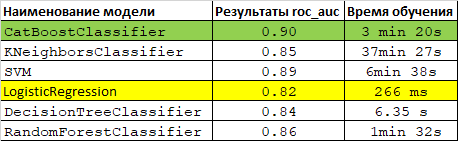
Результаты обучения и проверки моделей таковы. Как видно по времени быстрее всего обучилась модель логистической регресии, а лучший показатель roc_auc показала модель CatBoostClassifier  на ней и на логистической мы и проверим нашу тестовую выборку


__по результатам лучшая модель это катбуст. её и проверим на тесте.__
   


Проверим самую точную модель.

In [63]:
model = CatBoostClassifier(random_state=190922,
                           border_count=128,
                           learning_rate=0.1,
                           max_depth=3,
                           n_estimators=300)
model.fit(x,y)
probabilities_valid_s  = model.predict_proba(features_test_ohe)
probabilities_one_valid_s = probabilities_valid_s[:, 1]

fpr_s, tpr_s, threshold_s = metrics.roc_curve(target_test, probabilities_one_valid_s)
roc_auc_s = metrics.auc(fpr_s, tpr_s)    

pred_s=model.predict(features_test_ohe)



0:	learn: 0.6481987	total: 2.98ms	remaining: 892ms
1:	learn: 0.6174950	total: 5.93ms	remaining: 884ms
2:	learn: 0.5922072	total: 8.82ms	remaining: 873ms
3:	learn: 0.5737059	total: 11.7ms	remaining: 866ms
4:	learn: 0.5650805	total: 15ms	remaining: 888ms
5:	learn: 0.5529461	total: 17.8ms	remaining: 873ms
6:	learn: 0.5436016	total: 20.8ms	remaining: 872ms
7:	learn: 0.5321066	total: 23.8ms	remaining: 869ms
8:	learn: 0.5229278	total: 27.3ms	remaining: 881ms
9:	learn: 0.5173659	total: 30.9ms	remaining: 895ms
10:	learn: 0.5111458	total: 34ms	remaining: 893ms
11:	learn: 0.5069160	total: 37ms	remaining: 887ms
12:	learn: 0.5039768	total: 40ms	remaining: 883ms
13:	learn: 0.4985950	total: 43.1ms	remaining: 881ms
14:	learn: 0.4956091	total: 46.2ms	remaining: 878ms
15:	learn: 0.4939664	total: 49ms	remaining: 870ms
16:	learn: 0.4917547	total: 52ms	remaining: 866ms
17:	learn: 0.4875152	total: 55.2ms	remaining: 865ms
18:	learn: 0.4844178	total: 58.5ms	remaining: 865ms
19:	learn: 0.4831284	total: 61.2ms

C:\Users\Name\AppData\Local\Programs\Python\Python310\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


In [207]:
print('CatBoostClassifier (ROC AUC= %0.4f)' % metrics.auc(fpr_s, tpr_s),
      '(accuracy= %0.4f)' % accuracy_score(target_test, pred_s),'\n')

CatBoostClassifier (ROC AUC= 0.8067) (accuracy= 0.7600) 




<h2> Результат <a class="tocSkip"> </h2>
    
    
Лучший результат на тестовой выборке показали CatBoost и SVM около 0.90 
Апробировав на тестовой выборке CatBoost показал результат ROC AUC= 0.8067/
    



## Отчёт по решению

В основном утвержденного плана я и придерживался. 

1) На первом шаге я посмотрев что за таблицы, проверил необходимость их предобработки. Она потребовалась когда я соединил все 4 таблицы в одну - много пустых значений и дублирующихся колонок.

2) Шаг исследовательского анализа, после одной итерации ревьюер мне вернул и правильно сделал, ибо я не посмотрел распределение числовых признаков (а оно было не нормально). В дальнейшем я выкидвал ненужные числовой признак использую пирсона, что категорически нельзя делать при ненормальном распределении, но матрица фик мне помогла. В плане я убирал признаки __после__ разделения не выборки тут __до__.

3) Убрав ненужные признаки на всей выборке, после разделив её на тестовую и обучающую, я категоризировал именно категориальные признаки в обоих выюорках. Стандартизировав данные я принялся устранять дисбаланс( в плане я сначала устранял дисбаланс а потом стандартизировал)

Используя roc-auc протестировав на 6 моделях, я выбрал модель с лучшим показателем (оказался catboost) и далее на ней протестировал тестовые данные. Получил результат 0.806
Отошёл от плана и не проверил на адекватность, посчитав что и так слишком много всего понаписал, и по ощущениям ошибся и завис бы с кодом еще на день-два.


__Какие пункты плана были выполнены, а какие — нет (поясните почему)?__
Как я описал выше пунктам плана я и придерживался, что бросил или от чего отошел описал ниже.
* Я неправильно составил порядок плана, в следствии чего сам себя запутал, благо ревьюер на правильный путь меня навёл.

* Я не использовал модель  Naive Bayes, Тестируя её постоянно натыкался на ошибки, которые гуглом не смог решить. После того как время разбирания в модели пробило второй десяток часов я понял, что лучше я буду разбираться с ней в более спокойной обстановке нежел сейчас, когда горят сроки. Вспомнив что на курсе мы использовали катбуст решил использовать её, просто потому что с ней у мнея есть хоть какой-то опыт. По итогу она и лучший показатель и дала. Видимо решение свыше.
* Не проверил модель на адекватность при помощи DummyClassifier. Опять же решил пожертовать в угоду времени, хотя сейчас( с учётом новых советом) планирую на неделе проект доработать, чтобы не стыдно было на гитхаб выложить и яп не подвести.


__Какие трудности возникли и как вы их преодолели?__
Трудностей было много, все перечислять не буду, опишу только основные.

* Снала я использовал get_dummies, на каждой выборке отдельно, в следствии чего он на каждую делал не равное количество столбцов. Ревьюер посоветовал использовать onehot, там я столкнулся с проблемой категоризировать только категориальные признаки ибо по началу он числовые мне выбрасывал из выборки, что очень раздражало. В итоге stackoverflow навёл на мысль использовать make_column_transformer, пошаманив немного, всё получилось. 
* Также долго не получалось корректно использовать smote, из-за неправильно кодирования, о чем писал выше smote ломался, в итоге корректное кодирование проблему решило.
* Также была заноза с TotalCharges  со значениям ''. Никак не мог понять почему всё ломается. В итоге залез в слак увидел похожий вопрос, и понял что я не совсем внимательно изучил данные, изучив повторно более детально в дальнейшем с обработкой данных не столкнулся.

__Какие ключевые шаги в решении задачи выделили?__

* Предобработка и изучание данных. В одном проекте один ревьюер мне написал что если в выборке есть числовой признак его обязательно надо проверить на распределение. Я тогда дакнул и забыл и теперь мне это аукнулось.
* Грамтная оценка возможностей. Я переоценил себя, лучше бы я выбрал 2 модели не линейные и тюнил бы их до посинения. 
* Категоризация категориальных признаков. Раньше я просто использовал get dummies даже не вдаваясь в подробности как конкретно он что делает. Так делать нельзя. Надо всегда разбирать всё, что знать откуда может прилететь та или иная ошибка.

__Какая ваша итоговая модель и какое у неё качество?__
* Моя итоговая модель это СatBoostClassifier с (ROC AUC= 0.8067).